In [1]:
%load_ext autoreload
%autoreload 2

from typing import Literal, Union
from pathlib import Path
import csv
from datetime import datetime
import random


import pandas as pd
import dspy
from dspy.evaluate import Evaluate
from dspy.teleprompt import MIPROv2
from sklearn.model_selection import train_test_split

from programs import WrapperSpanishSPT, evaluate_answer
from custom_evaluation import custom_evaluate

In [2]:
lm = dspy.LM(
    "ollama_chat/deepseek-r1:14b",
    api_base="http://localhost:11434",
)
dspy.settings.configure(lm=lm)

In [3]:
lm("What is your name")

["<think>\n\n</think>\n\nGreetings! I'm DeepSeek-R1, an artificial intelligence assistant created by DeepSeek. I'm at your service and would be delighted to assist you with any inquiries or tasks you may have."]

In [4]:
data = pd.read_csv("dev_dwug_en_resampled.csv")
display(data.shape)

(5846, 8)

In [5]:
training_set = []

for _, row in data.iterrows():
    training_set.append(
        dspy.Example(
            sentence1=row["context_x"],
            sentence2=row["context_y"],
            target_word=row["lemma"],
            answer=int(row["judgment"]),
        ).with_inputs("sentence1", "sentence2", "target_word")
    )

In [6]:
classes_1_en = [item for item in training_set if item.answer == 1]
classes_2_en = [item for item in training_set if item.answer == 2]
classes_3_en = [item for item in training_set if item.answer == 3]
classes_4_en = [item for item in training_set if item.answer == 4]

print(len(classes_1_en))
print(len(classes_2_en))
print(len(classes_3_en))
print(len(classes_4_en))

classes_1_train, classes_1_dev = train_test_split(
    classes_1_en,
    test_size=0.2,
    random_state=42,
)
classes_1_train, classes_1_test = train_test_split(
    classes_1_train,
    test_size=0.2,
    random_state=42,
)

classes_2_train, classes_2_dev = train_test_split(
    classes_2_en,
    test_size=0.2,
    random_state=42,
)
classes_2_train, classes_2_test = train_test_split(
    classes_2_train,
    test_size=0.2,
    random_state=42,
)

classes_3_train, classes_3_dev = train_test_split(
    classes_3_en,
    test_size=0.2,
    random_state=42,
)
classes_3_train, classes_3_test = train_test_split(
    classes_3_train,
    test_size=0.2,
    random_state=42,
)

classes_4_train, classes_4_dev = train_test_split(
    classes_4_en,
    test_size=0.2,
    random_state=42,
)
classes_4_train, classes_4_test = train_test_split(
    classes_4_train,
    test_size=0.2,
    random_state=42,
)

print(len(classes_1_train), len(classes_1_dev), len(classes_1_test))
print(len(classes_2_train), len(classes_2_dev), len(classes_2_test))
print(len(classes_3_train), len(classes_3_dev), len(classes_3_test))
print(len(classes_4_train), len(classes_4_dev), len(classes_4_test))

641
1658
1472
2075
409 129 103
1060 332 266
941 295 236
1328 415 332


In [7]:
program_spt_prompt_es_assertions = WrapperSpanishSPT().activate_assertions()

In [8]:
custom_evaluate(
    random.choices(classes_1_test, k=100)
    + random.choices(classes_2_test, k=100)
    + random.choices(classes_3_test, k=100)
    + random.choices(classes_4_test, k=100),
    evaluate_answer,
    program_spt_prompt_es_assertions,
    debug=True,
)

Evaluating: 400 examples
Prediction:  3
Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  4
Prediction:  2
Prediction:  3


Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  1
Prediction:  4
Prediction:  4
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  1


Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  3
Prediction:  4
Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1


2025/04/18 19:37:39 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/18 19:37:39 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/18 19:37:39 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  0
Prediction:  2


Prediction:  1
Prediction:  4
Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1


2025/04/18 19:45:53 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/18 19:45:53 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/18 19:45:53 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/18 19:45:53 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  0
Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  2
Prediction:  3
Prediction:  1


Prediction:  3


2025/04/18 19:50:52 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/18 19:50:52 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


Prediction:  3
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  4
Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  3
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  4
Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  1
Prediction:  3


Prediction:  2
Prediction:  4
Prediction:  3


Prediction:  3
Prediction:  4


Prediction:  1


Prediction:  4
Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  4
Prediction:  1
Prediction:  3
Prediction:  4
Prediction:  3


Prediction:  1
Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  1


Prediction:  1
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  3


Prediction:  1
Prediction:  2
Prediction:  1


Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  2


Prediction:  3
Prediction:  1


Prediction:  2
Prediction:  2
Prediction:  1
Prediction:  2
Prediction:  1


Prediction:  3


Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  4


Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  4


Prediction:  3
Prediction:  3
Prediction:  4


Prediction:  4
Prediction:  1


Prediction:  3
Prediction:  4


Prediction:  1


Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  4


Prediction:  4
Prediction:  1


Prediction:  2
Prediction:  4


Prediction:  4
Prediction:  1


Prediction:  1
Prediction:  4
Prediction:  1


Prediction:  2
Prediction:  2
Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  3
Prediction:  4


Prediction:  1
Prediction:  2


Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  2
Prediction:  3
Prediction:  4
Prediction:  2


Prediction:  4
Prediction:  1


Prediction:  2
Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  4


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  4


Prediction:  3
Prediction:  1


Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  4
Prediction:  2
Prediction:  3
Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  3


Prediction:  3
Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  4
Prediction:  2


Prediction:  4


Prediction:  3
Prediction:  3
Prediction:  1
Prediction:  4


Prediction:  4
Prediction:  2
Prediction:  4
Prediction:  1
Prediction:  4
Prediction:  4
Prediction:  3


Prediction:  1


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  1
Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  2
Prediction:  4
Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  3
Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  4


Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  3


Prediction:  4
Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  3
Prediction:  2
Prediction:  1
Accurate examples: 139
Bad-formatted examples: 0
Accuracy: 34.75


In [9]:
start_time = datetime.now()

teleprompter = MIPROv2(
    metric=evaluate_answer,
    num_candidates=10,
    init_temperature=0.7,
    max_bootstrapped_demos=3,
    max_labeled_demos=4,
    verbose=False,
)

print("Optimizing program with MIPRO...")
optimized_program = teleprompter.compile(
    program_spt_prompt_es_assertions.deepcopy(),
    trainset=random.choices(classes_1_train, k=400)
    + random.choices(classes_2_train, k=400)
    + random.choices(classes_3_train, k=400)
    + random.choices(classes_4_train, k=400),
    valset=random.choices(classes_1_dev, k=100)
    + random.choices(classes_2_dev, k=100)
    + random.choices(classes_3_dev, k=100)
    + random.choices(classes_4_dev, k=100),
    num_trials=15,
    minibatch_size=25,
    minibatch_full_eval_steps=10,
    minibatch=True,
    requires_permission_to_run=False,
)

optimized_program.save(f"compile-models/sp/en_spt_mipro_optimized_prompt_es_deepseek-q4")

print(f"Elapsed time: {datetime.now() - start_time}")

2025/04/18 22:49:48 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==


2025/04/18 22:49:48 INFO dspy.teleprompt.mipro_optimizer_v2: These will be used as few-shot example candidates for our program and for creating instructions.



2025/04/18 22:49:48 INFO dspy.teleprompt.mipro_optimizer_v2: Bootstrapping N=10 sets of demonstrations...


Optimizing program with MIPRO...
Bootstrapping set 1/10
Bootstrapping set 2/10
Bootstrapping set 3/10


  0%|                                                                                                                | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                    | 1/1600 [01:49<48:36:16, 109.43s/it]

  0%|▏                                                                                                   | 2/1600 [03:42<49:26:51, 111.40s/it]

  0%|▏                                                                                                   | 3/1600 [05:20<46:49:11, 105.54s/it]

  0%|▎                                                                                                   | 4/1600 [07:06<46:54:00, 105.79s/it]

  0%|▎                                                                                                   | 4/1600 [07:06<47:19:12, 106.74s/it]

Bootstrapped 3 full traces after 4 examples for up to 1 rounds, amounting to 4 attempts.
Bootstrapping set 4/10


  0%|                                                                                                                | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                    | 1/1600 [01:49<48:42:39, 109.67s/it]

  0%|▏                                                                                                   | 2/1600 [03:28<45:53:56, 103.40s/it]

  0%|▏                                                                                                   | 3/1600 [05:09<45:18:41, 102.14s/it]

  0%|▎                                                                                                   | 4/1600 [06:53<45:40:02, 103.01s/it]

  0%|▎                                                                                                   | 5/1600 [08:35<45:30:20, 102.71s/it]

  0%|▍                                                                                                   | 6/1600 [10:18<45:28:15, 102.69s/it]

  0%|▍                                                                                                   | 7/1600 [11:54<44:25:09, 100.38s/it]

  0%|▌                                                                                                   | 8/1600 [13:42<45:31:57, 102.96s/it]

  1%|▌                                                                                                   | 9/1600 [15:36<46:58:57, 106.31s/it]

  1%|▌                                                                                                  | 10/1600 [17:17<46:19:13, 104.88s/it]

  1%|▋                                                                                                  | 11/1600 [19:03<46:22:06, 105.05s/it]

  1%|▋                                                                                                  | 12/1600 [20:47<46:14:54, 104.85s/it]

  1%|▋                                                                                                  | 12/1600 [20:47<45:52:02, 103.98s/it]

Bootstrapped 2 full traces after 12 examples for up to 1 rounds, amounting to 12 attempts.
Bootstrapping set 5/10


  0%|                                                                                                                | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                    | 1/1600 [01:51<49:35:58, 111.67s/it]

  0%|▏                                                                                                   | 2/1600 [03:37<48:01:34, 108.19s/it]

  0%|▏                                                                                                   | 3/1600 [05:23<47:39:08, 107.42s/it]

  0%|▎                                                                                                   | 4/1600 [07:07<46:53:28, 105.77s/it]

  0%|▎                                                                                                   | 5/1600 [08:42<45:14:27, 102.11s/it]

  0%|▍                                                                                                   | 6/1600 [10:29<45:50:18, 103.52s/it]

  0%|▍                                                                                                   | 7/1600 [12:16<46:18:38, 104.66s/it]

  0%|▌                                                                                                   | 8/1600 [13:55<45:28:56, 102.85s/it]

  0%|▌                                                                                                   | 8/1600 [13:55<46:09:31, 104.38s/it]

Bootstrapped 2 full traces after 8 examples for up to 1 rounds, amounting to 8 attempts.
Bootstrapping set 6/10


  0%|                                                                                                                | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                    | 1/1600 [01:46<47:06:20, 106.05s/it]

  0%|▏                                                                                                   | 2/1600 [03:29<46:29:39, 104.74s/it]

  0%|▏                                                                                                   | 3/1600 [05:07<45:05:16, 101.64s/it]

  0%|▏                                                                                                   | 3/1600 [05:07<45:31:04, 102.61s/it]

Bootstrapped 2 full traces after 3 examples for up to 1 rounds, amounting to 3 attempts.
Bootstrapping set 7/10


  0%|                                                                                                                | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                     | 1/1600 [01:39<44:15:46, 99.65s/it]

  0%|▏                                                                                                   | 2/1600 [03:25<45:44:20, 103.04s/it]

  0%|▏                                                                                                   | 3/1600 [05:01<44:26:26, 100.18s/it]

  0%|▎                                                                                                   | 4/1600 [06:43<44:37:12, 100.65s/it]

  0%|▎                                                                                                   | 5/1600 [08:23<44:32:05, 100.52s/it]

  0%|▍                                                                                                   | 6/1600 [10:15<46:11:25, 104.32s/it]

  0%|▍                                                                                                   | 6/1600 [10:15<45:23:55, 102.53s/it]

Bootstrapped 1 full traces after 6 examples for up to 1 rounds, amounting to 6 attempts.
Bootstrapping set 8/10


  0%|                                                                                                                | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                    | 1/1600 [01:46<47:05:19, 106.02s/it]

  0%|▏                                                                                                   | 2/1600 [03:28<46:13:59, 104.15s/it]

  0%|▏                                                                                                   | 3/1600 [05:14<46:30:02, 104.82s/it]

  0%|▎                                                                                                   | 4/1600 [06:49<44:43:24, 100.88s/it]

  0%|▎                                                                                                    | 5/1600 [08:27<44:14:30, 99.86s/it]

  0%|▍                                                                                                    | 6/1600 [09:58<42:53:04, 96.85s/it]

  0%|▍                                                                                                    | 6/1600 [09:58<44:09:31, 99.73s/it]

Bootstrapped 2 full traces after 6 examples for up to 1 rounds, amounting to 6 attempts.
Bootstrapping set 9/10


  0%|                                                                                                                | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                    | 1/1600 [01:46<47:10:15, 106.20s/it]

  0%|                                                                                                    | 1/1600 [01:46<47:10:16, 106.20s/it]

Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 10/10


  0%|                                                                                                                | 0/1600 [00:00<?, ?it/s]

  0%|                                                                                                    | 1/1600 [01:49<48:30:41, 109.22s/it]

  0%|                                                                                                    | 1/1600 [01:49<48:30:43, 109.22s/it]


2025/04/19 00:00:34 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==


2025/04/19 00:00:34 INFO dspy.teleprompt.mipro_optimizer_v2: We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.


Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.


2025/04/19 00:20:02 INFO dspy.teleprompt.mipro_optimizer_v2: 
Proposing instructions...



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: Proposed Instructions for Predictor 0:



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: 0: Eres una herramienta de anotación de datos textuales altamente entrenada, capaz de proporcionar respuestas
subjetivas. Evalúa la similitud semántica de la palabra objetivo en estas oraciones 1 y 2. Considera solo los objetos/conceptos
a los que se refieren las palabras: ¡Ignora cualquier etimología común y similitud metafórica! ¡Ignora mayúsculas!
¡Ignora número (gato/Gatos = significado idéntico)! Los homónimos (como murciélago el animal vs murciélago en béisbol)
se consideran no relacionados. De como salida una calificación numérica: 1 es no relacionado; 2 es lejanamente relacionado; 3 es
estrechamente relacionado; 4 es significado idéntico. Tu respuesta debe alinearse con el juicio sucinto de un humano.



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: 1: Eres un experto en semántica textual. Evalúa la similitud semántica del词 objetivo entre las dos oraciones en español, considerando solo los objetos o conceptos directamente referidos por el palabra. Ignora diferencias de género, número, casos, etimologías comunes o similitudes metafóricas. Si el target_word tiene múltiples significados (homónimos), trátalos como no relacionados. Proporciona una calificación numérica: 1 es "no relacionado", 2 es "leve relación", 3 es "relación cercana" y 4 es "significado idéntico". Tu respuesta debe alinear con el juicio de un humano.



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: 2: Analyze the target word's context in both sentences and determine the semantic similarity on a scale from 1 to 4. Assign 1 if unrelated, 2 for distant relation, 3 for close relation, and 4 for identical meaning.



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: 3: Evalúa la similitud semántica de la palabra objetivo en estas oraciones 1 y 2. Considera solo los objetos/conceptos a los que se refieren las palabras: ignora cualquier etimología común, similitudes metafóricas o usos figurados. También ignora mayúsculas y número (gato/Gatos = significado idéntico). Si el target word tiene diferentes significados en distintos contextos (por ejemplo, murciélago en el animal vs murciélago en béisbol), considera que son no relacionados. Proporciona una calificación numérica: 1 es "no relacionado", 2 es "lejanamente relacionado", 3 es "estrechamente relacionado" y 4 es "significado idéntico". La respuesta debe alinearse con el juicio de un humano.



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: 4: To evaluate the semantic proximity of a target word between two sentences, follow these steps:

1. Identify the specific object or concept the target word refers to in each sentence.
2. Compare these concepts directly, ignoring any metaphoric similarities or etymological connections.
3. Assign a score from 1 to 4 based on their relation:
   - 4: Identical meaning.
   - 3: Closely related but not identical.
   - 2: Distantly related.
   - 1: Unrelated.

Use this structured approach to assess the semantic proximity accurately.



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: 5: You are a highly trained text data annotation tool, capable of providing subjective responses. Evaluate the semantic similarity of the target word in sentences 1 and 2. Consider only the objects/concepts to which the words refer. Ignore any common etymology and metaphoric similarities! Ignore case sensitivity and number (e.g., gato/Gatos = identical meaning). Homonyms are considered unrelated if they refer to different things. Provide a numerical rating: 1 means not related; 2 means remotely related; 3 means closely related; 4 means identical meaning. Your response should align with the concise judgment of a human.



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: 6: 



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: 7: Eres una herramienta de anotación de datos textuales altamente entrenada, capaz de proporcionar respuestas subjetivas. Evalúa la similitud semántica de la palabra objetivo en estas oraciones 1 y 2. Considera solo los objetos/conceptos a los que se refieren las palabras: ¡Ignora cualquier etimología común y similitud metafórica! ¡Ignora mayúsculas! ¡Ignora número (gato/Gatos = significado idéntico)! Los homónimos (como murciélago el animal vs murciélago en béisbol) se consideran no relacionados. De como salida una calificación numérica: 1 es no relacionado; 2 es lejanamente relacionado; 3 esestrechamente relacionado; 4 es significado idéntico. Tu respuesta debe alinearse con el juicio sucinto de un humano.



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: 8: Eres un especialista en análisis semántico. Evalúa la proximidad semántica de una palabra dada en dos oraciones diferentes. Considera solo los conceptos a los que se refiere la palabra, ignora etimologías comunes y similitudes metafóricas. Si los significados son idénticos, marca con 4; si no tienen relación alguna,marca con 1. Proporciona una calificación numérica: 1 (no relacionado), 2 (lejanamente relacionado), 3 (estrechamente relacionado), 4 (significado idéntico).



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: 9: ...



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/19 01:13:04 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the default program...



  0%|                                                                                                                 | 0/400 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                 | 0/400 [01:50<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|▏                                                                    | 1/400 [01:50<12:11:38, 110.02s/it]

Average Metric: 1 / 2  (50.0):   0%|▏                                                                     | 1/400 [03:36<12:11:38, 110.02s/it]

Average Metric: 1 / 2  (50.0):   0%|▎                                                                     | 2/400 [03:36<11:57:24, 108.15s/it]

Average Metric: 1 / 3  (33.3):   0%|▎                                                                     | 2/400 [03:36<11:57:24, 108.15s/it]

Average Metric: 2 / 4  (50.0):   1%|▌                                                                     | 3/400 [05:22<11:55:36, 108.15s/it]

Average Metric: 2 / 4  (50.0):   1%|▋                                                                       | 4/400 [05:22<8:05:11, 73.51s/it]

Average Metric: 3 / 5  (60.0):   1%|▋                                                                       | 4/400 [06:59<8:05:11, 73.51s/it]

Average Metric: 3 / 5  (60.0):   1%|▉                                                                       | 5/400 [06:59<8:51:15, 80.70s/it]

Average Metric: 3 / 6  (50.0):   1%|▉                                                                       | 5/400 [08:37<8:51:15, 80.70s/it]

Average Metric: 3 / 6  (50.0):   2%|█                                                                       | 6/400 [08:37<9:23:55, 85.88s/it]

Average Metric: 4 / 7  (57.1):   2%|█                                                                       | 6/400 [10:20<9:23:55, 85.88s/it]

Average Metric: 4 / 7  (57.1):   2%|█▎                                                                      | 7/400 [10:20<9:57:02, 91.15s/it]

Average Metric: 5 / 8  (62.5):   2%|█▎                                                                      | 7/400 [12:03<9:57:02, 91.15s/it]

Average Metric: 5 / 8  (62.5):   2%|█▍                                                                     | 8/400 [12:03<10:19:26, 94.81s/it]

Average Metric: 6 / 9  (66.7):   2%|█▍                                                                     | 8/400 [13:40<10:19:26, 94.81s/it]

Average Metric: 6 / 9  (66.7):   2%|█▌                                                                     | 9/400 [13:40<10:21:56, 95.44s/it]

Average Metric: 7 / 10  (70.0):   2%|█▌                                                                    | 9/400 [15:19<10:21:56, 95.44s/it]

Average Metric: 7 / 10  (70.0):   2%|█▋                                                                   | 10/400 [15:19<10:26:42, 96.42s/it]

Average Metric: 8 / 11  (72.7):   2%|█▋                                                                   | 10/400 [17:01<10:26:42, 96.42s/it]

Average Metric: 8 / 11  (72.7):   3%|█▉                                                                   | 11/400 [17:01<10:36:18, 98.14s/it]

Average Metric: 9 / 12  (75.0):   3%|█▉                                                                   | 11/400 [18:37<10:36:18, 98.14s/it]

Average Metric: 9 / 12  (75.0):   3%|██                                                                   | 12/400 [18:37<10:31:26, 97.65s/it]

Average Metric: 10 / 13  (76.9):   3%|██                                                                  | 12/400 [20:18<10:31:26, 97.65s/it]

Average Metric: 10 / 13  (76.9):   3%|██▏                                                                 | 13/400 [20:18<10:35:15, 98.49s/it]

Average Metric: 11 / 14  (78.6):   3%|██▏                                                                 | 13/400 [20:18<10:35:15, 98.49s/it]

Average Metric: 12 / 15  (80.0):   4%|██▍                                                                 | 14/400 [21:52<10:33:37, 98.49s/it]

Average Metric: 12 / 15  (80.0):   4%|██▌                                                                  | 15/400 [21:52<7:59:54, 74.79s/it]

Average Metric: 13 / 16  (81.2):   4%|██▌                                                                  | 15/400 [23:28<7:59:54, 74.79s/it]

Average Metric: 13 / 16  (81.2):   4%|██▊                                                                  | 16/400 [23:28<8:32:51, 80.13s/it]

Average Metric: 14 / 17  (82.4):   4%|██▊                                                                  | 16/400 [25:11<8:32:51, 80.13s/it]

Average Metric: 14 / 17  (82.4):   4%|██▉                                                                  | 17/400 [25:11<9:08:53, 85.99s/it]

Average Metric: 15 / 18  (83.3):   4%|██▉                                                                  | 17/400 [25:11<9:08:53, 85.99s/it]

Average Metric: 15 / 19  (78.9):   4%|███                                                                  | 18/400 [26:50<9:07:27, 85.99s/it]

Average Metric: 15 / 19  (78.9):   5%|███▎                                                                 | 19/400 [26:50<7:27:27, 70.47s/it]

Average Metric: 16 / 20  (80.0):   5%|███▎                                                                 | 19/400 [28:31<7:27:27, 70.47s/it]

Average Metric: 16 / 20  (80.0):   5%|███▍                                                                 | 20/400 [28:31<8:11:43, 77.64s/it]

Average Metric: 17 / 21  (81.0):   5%|███▍                                                                 | 20/400 [28:31<8:11:43, 77.64s/it]

Average Metric: 18 / 22  (81.8):   5%|███▌                                                                 | 21/400 [30:11<8:10:26, 77.64s/it]

Average Metric: 18 / 22  (81.8):   6%|███▊                                                                 | 22/400 [30:11<6:58:53, 66.49s/it]

Average Metric: 18 / 23  (78.3):   6%|███▊                                                                 | 22/400 [31:50<6:58:53, 66.49s/it]

Average Metric: 18 / 23  (78.3):   6%|███▉                                                                 | 23/400 [31:50<7:43:39, 73.79s/it]

Average Metric: 19 / 24  (79.2):   6%|███▉                                                                 | 23/400 [33:24<7:43:39, 73.79s/it]

Average Metric: 19 / 24  (79.2):   6%|████▏                                                                | 24/400 [33:24<8:12:25, 78.58s/it]

Average Metric: 20 / 25  (80.0):   6%|████▏                                                                | 24/400 [35:16<8:12:25, 78.58s/it]

Average Metric: 20 / 25  (80.0):   6%|████▎                                                                | 25/400 [35:16<9:04:00, 87.04s/it]

Average Metric: 20 / 26  (76.9):   6%|████▎                                                                | 25/400 [36:55<9:04:00, 87.04s/it]

Average Metric: 20 / 26  (76.9):   6%|████▍                                                                | 26/400 [36:55<9:23:06, 90.34s/it]

Average Metric: 20 / 27  (74.1):   6%|████▍                                                                | 26/400 [38:33<9:23:06, 90.34s/it]

Average Metric: 20 / 27  (74.1):   7%|████▋                                                                | 27/400 [38:33<9:35:31, 92.58s/it]

Average Metric: 21 / 28  (75.0):   7%|████▋                                                                | 27/400 [40:14<9:35:31, 92.58s/it]

Average Metric: 21 / 28  (75.0):   7%|████▊                                                                | 28/400 [40:14<9:48:38, 94.94s/it]

Average Metric: 22 / 29  (75.9):   7%|████▊                                                                | 28/400 [41:49<9:48:38, 94.94s/it]

Average Metric: 22 / 29  (75.9):   7%|█████                                                                | 29/400 [41:49<9:46:19, 94.82s/it]

Average Metric: 23 / 30  (76.7):   7%|█████                                                                | 29/400 [41:49<9:46:19, 94.82s/it]

Average Metric: 23 / 31  (74.2):   8%|█████▏                                                               | 30/400 [43:33<9:44:45, 94.82s/it]

Average Metric: 23 / 31  (74.2):   8%|█████▎                                                               | 31/400 [43:33<7:44:22, 75.51s/it]

Average Metric: 24 / 32  (75.0):   8%|█████▎                                                               | 31/400 [45:09<7:44:22, 75.51s/it]

Average Metric: 24 / 32  (75.0):   8%|█████▌                                                               | 32/400 [45:09<8:13:29, 80.46s/it]

Average Metric: 25 / 33  (75.8):   8%|█████▌                                                               | 32/400 [45:09<8:13:29, 80.46s/it]

Average Metric: 25 / 34  (73.5):   8%|█████▋                                                               | 33/400 [46:51<8:12:08, 80.46s/it]

Average Metric: 25 / 34  (73.5):   8%|█████▊                                                               | 34/400 [46:51<6:57:54, 68.51s/it]

Average Metric: 25 / 35  (71.4):   8%|█████▊                                                               | 34/400 [48:28<6:57:54, 68.51s/it]

Average Metric: 25 / 35  (71.4):   9%|██████                                                               | 35/400 [48:28<7:36:09, 74.99s/it]

Average Metric: 26 / 36  (72.2):   9%|██████                                                               | 35/400 [50:16<7:36:09, 74.99s/it]

Average Metric: 26 / 36  (72.2):   9%|██████▏                                                              | 36/400 [50:16<8:23:17, 82.96s/it]

Average Metric: 26 / 37  (70.3):   9%|██████▏                                                              | 36/400 [51:50<8:23:17, 82.96s/it]

Average Metric: 26 / 37  (70.3):   9%|██████▍                                                              | 37/400 [51:50<8:39:07, 85.80s/it]

Average Metric: 26 / 38  (68.4):   9%|██████▍                                                              | 37/400 [51:50<8:39:07, 85.80s/it]

Average Metric: 26 / 39  (66.7):  10%|██████▌                                                              | 38/400 [53:34<8:37:41, 85.80s/it]

Average Metric: 26 / 39  (66.7):  10%|██████▋                                                              | 39/400 [53:34<7:09:58, 71.46s/it]

Average Metric: 26 / 40  (65.0):  10%|██████▋                                                              | 39/400 [55:17<7:09:58, 71.46s/it]

Average Metric: 26 / 40  (65.0):  10%|██████▉                                                              | 40/400 [55:17<7:52:23, 78.73s/it]

Average Metric: 27 / 41  (65.9):  10%|██████▉                                                              | 40/400 [57:06<7:52:23, 78.73s/it]

Average Metric: 27 / 41  (65.9):  10%|███████                                                              | 41/400 [57:06<8:36:33, 86.33s/it]

Average Metric: 27 / 42  (64.3):  10%|███████                                                              | 41/400 [58:50<8:36:33, 86.33s/it]

Average Metric: 27 / 42  (64.3):  10%|███████▏                                                             | 42/400 [58:50<9:03:06, 91.02s/it]

Average Metric: 27 / 43  (62.8):  10%|███████                                                            | 42/400 [1:00:36<9:03:06, 91.02s/it]

Average Metric: 27 / 43  (62.8):  11%|███████▏                                                           | 43/400 [1:00:36<9:25:30, 95.04s/it]

Average Metric: 27 / 44  (61.4):  11%|███████▏                                                           | 43/400 [1:00:36<9:25:30, 95.04s/it]

Average Metric: 28 / 45  (62.2):  11%|███████▎                                                           | 44/400 [1:00:36<9:23:55, 95.04s/it]

Average Metric: 29 / 46  (63.0):  11%|███████▌                                                           | 45/400 [1:02:16<9:22:20, 95.04s/it]

Average Metric: 29 / 46  (63.0):  12%|███████▋                                                           | 46/400 [1:02:16<6:04:07, 61.72s/it]

Average Metric: 30 / 47  (63.8):  12%|███████▋                                                           | 46/400 [1:03:58<6:04:07, 61.72s/it]

Average Metric: 30 / 47  (63.8):  12%|███████▊                                                           | 47/400 [1:03:58<6:51:51, 70.01s/it]

Average Metric: 30 / 48  (62.5):  12%|███████▊                                                           | 47/400 [1:05:33<6:51:51, 70.01s/it]

Average Metric: 30 / 48  (62.5):  12%|████████                                                           | 48/400 [1:05:33<7:24:38, 75.79s/it]

Average Metric: 31 / 49  (63.3):  12%|████████                                                           | 48/400 [1:05:33<7:24:38, 75.79s/it]

Average Metric: 31 / 50  (62.0):  12%|████████▏                                                          | 49/400 [1:05:33<7:23:22, 75.79s/it]

Average Metric: 32 / 51  (62.7):  12%|████████▍                                                          | 50/400 [1:07:20<7:22:06, 75.79s/it]

Average Metric: 32 / 51  (62.7):  13%|████████▌                                                          | 51/400 [1:07:20<5:25:55, 56.03s/it]

Average Metric: 33 / 52  (63.5):  13%|████████▌                                                          | 51/400 [1:07:20<5:25:55, 56.03s/it]

Average Metric: 33 / 53  (62.3):  13%|████████▋                                                          | 52/400 [1:09:05<5:24:59, 56.03s/it]

Average Metric: 33 / 53  (62.3):  13%|████████▉                                                          | 53/400 [1:09:05<5:17:16, 54.86s/it]

Average Metric: 34 / 54  (63.0):  13%|████████▉                                                          | 53/400 [1:09:05<5:17:16, 54.86s/it]

Average Metric: 35 / 55  (63.6):  14%|█████████                                                          | 54/400 [1:10:56<5:16:21, 54.86s/it]

Average Metric: 35 / 55  (63.6):  14%|█████████▏                                                         | 55/400 [1:10:56<5:16:13, 55.00s/it]

Average Metric: 36 / 56  (64.3):  14%|█████████▏                                                         | 55/400 [1:12:41<5:16:13, 55.00s/it]

Average Metric: 36 / 56  (64.3):  14%|█████████▍                                                         | 56/400 [1:12:41<6:08:12, 64.22s/it]

Average Metric: 37 / 57  (64.9):  14%|█████████▍                                                         | 56/400 [1:12:41<6:08:12, 64.22s/it]

Average Metric: 37 / 58  (63.8):  14%|█████████▌                                                         | 57/400 [1:14:26<6:07:07, 64.22s/it]

Average Metric: 37 / 58  (63.8):  14%|█████████▋                                                         | 58/400 [1:14:26<5:43:11, 60.21s/it]

Average Metric: 38 / 59  (64.4):  14%|█████████▋                                                         | 58/400 [1:16:09<5:43:11, 60.21s/it]

Average Metric: 38 / 59  (64.4):  15%|█████████▉                                                         | 59/400 [1:16:09<6:29:36, 68.55s/it]

Average Metric: 39 / 60  (65.0):  15%|█████████▉                                                         | 59/400 [1:16:09<6:29:36, 68.55s/it]

Average Metric: 40 / 61  (65.6):  15%|██████████                                                         | 60/400 [1:17:49<6:28:27, 68.55s/it]

Average Metric: 40 / 61  (65.6):  15%|██████████▏                                                        | 61/400 [1:17:49<5:49:33, 61.87s/it]

Average Metric: 41 / 62  (66.1):  15%|██████████▏                                                        | 61/400 [1:19:37<5:49:33, 61.87s/it]

Average Metric: 41 / 62  (66.1):  16%|██████████▍                                                        | 62/400 [1:19:37<6:41:31, 71.28s/it]

Average Metric: 42 / 63  (66.7):  16%|██████████▍                                                        | 62/400 [1:21:21<6:41:31, 71.28s/it]

Average Metric: 42 / 63  (66.7):  16%|██████████▌                                                        | 63/400 [1:21:21<7:22:35, 78.80s/it]

Average Metric: 43 / 64  (67.2):  16%|██████████▌                                                        | 63/400 [1:23:03<7:22:35, 78.80s/it]

Average Metric: 43 / 64  (67.2):  16%|██████████▋                                                        | 64/400 [1:23:03<7:52:42, 84.41s/it]

Average Metric: 44 / 65  (67.7):  16%|██████████▋                                                        | 64/400 [1:24:42<7:52:42, 84.41s/it]

Average Metric: 44 / 65  (67.7):  16%|██████████▉                                                        | 65/400 [1:24:42<8:12:32, 88.22s/it]

Average Metric: 45 / 66  (68.2):  16%|██████████▉                                                        | 65/400 [1:26:29<8:12:32, 88.22s/it]

Average Metric: 45 / 66  (68.2):  16%|███████████                                                        | 66/400 [1:26:29<8:39:14, 93.28s/it]

Average Metric: 46 / 67  (68.7):  16%|███████████                                                        | 66/400 [1:28:08<8:39:14, 93.28s/it]

Average Metric: 46 / 67  (68.7):  17%|███████████▏                                                       | 67/400 [1:28:08<8:46:03, 94.79s/it]

Average Metric: 47 / 68  (69.1):  17%|███████████▏                                                       | 67/400 [1:28:08<8:46:03, 94.79s/it]

Average Metric: 47 / 69  (68.1):  17%|███████████▍                                                       | 68/400 [1:29:56<8:44:29, 94.79s/it]

Average Metric: 47 / 69  (68.1):  17%|███████████▌                                                       | 69/400 [1:29:56<7:03:41, 76.80s/it]

Average Metric: 47 / 70  (67.1):  17%|███████████▌                                                       | 69/400 [1:31:37<7:03:41, 76.80s/it]

Average Metric: 47 / 70  (67.1):  18%|███████████▋                                                       | 70/400 [1:31:37<7:34:33, 82.65s/it]

Average Metric: 47 / 71  (66.2):  18%|███████████▋                                                       | 70/400 [1:33:23<7:34:33, 82.65s/it]

Average Metric: 47 / 71  (66.2):  18%|███████████▉                                                       | 71/400 [1:33:23<8:04:58, 88.44s/it]

Average Metric: 47 / 72  (65.3):  18%|███████████▉                                                       | 71/400 [1:35:09<8:04:58, 88.44s/it]

Average Metric: 47 / 72  (65.3):  18%|████████████                                                       | 72/400 [1:35:09<8:29:53, 93.27s/it]

Average Metric: 48 / 73  (65.8):  18%|████████████                                                       | 72/400 [1:36:58<8:29:53, 93.27s/it]

Average Metric: 48 / 73  (65.8):  18%|████████████▏                                                      | 73/400 [1:36:58<8:52:06, 97.64s/it]

Average Metric: 49 / 74  (66.2):  18%|████████████▏                                                      | 73/400 [1:38:43<8:52:06, 97.64s/it]

Average Metric: 49 / 74  (66.2):  18%|████████████▍                                                      | 74/400 [1:38:43<9:02:02, 99.76s/it]

Average Metric: 50 / 75  (66.7):  18%|████████████▍                                                      | 74/400 [1:38:43<9:02:02, 99.76s/it]

Average Metric: 51 / 76  (67.1):  19%|████████████▌                                                      | 75/400 [1:38:43<9:00:23, 99.76s/it]

Average Metric: 52 / 77  (67.5):  19%|████████████▋                                                      | 76/400 [1:40:27<8:58:43, 99.76s/it]

Average Metric: 52 / 77  (67.5):  19%|████████████▉                                                      | 77/400 [1:40:27<5:44:37, 64.02s/it]

Average Metric: 52 / 78  (66.7):  19%|████████████▉                                                      | 77/400 [1:42:08<5:44:37, 64.02s/it]

Average Metric: 52 / 78  (66.7):  20%|█████████████                                                      | 78/400 [1:42:08<6:25:00, 71.74s/it]

Average Metric: 52 / 79  (65.8):  20%|█████████████                                                      | 78/400 [1:42:08<6:25:00, 71.74s/it]

Average Metric: 53 / 80  (66.2):  20%|█████████████▏                                                     | 79/400 [1:43:57<6:23:48, 71.74s/it]

Average Metric: 53 / 80  (66.2):  20%|█████████████▍                                                     | 80/400 [1:43:57<5:48:07, 65.27s/it]

Average Metric: 54 / 81  (66.7):  20%|█████████████▍                                                     | 80/400 [1:45:38<5:48:07, 65.27s/it]

Average Metric: 54 / 81  (66.7):  20%|█████████████▌                                                     | 81/400 [1:45:38<6:26:44, 72.74s/it]

Average Metric: 55 / 82  (67.1):  20%|█████████████▌                                                     | 81/400 [1:45:38<6:26:44, 72.74s/it]

Average Metric: 55 / 83  (66.3):  20%|█████████████▋                                                     | 82/400 [1:47:17<6:25:32, 72.74s/it]

Average Metric: 55 / 83  (66.3):  21%|█████████████▉                                                     | 83/400 [1:47:17<5:38:47, 64.13s/it]

Average Metric: 55 / 84  (65.5):  21%|█████████████▉                                                     | 83/400 [1:49:12<5:38:47, 64.13s/it]

Average Metric: 55 / 84  (65.5):  21%|██████████████                                                     | 84/400 [1:49:12<6:33:42, 74.75s/it]

Average Metric: 56 / 85  (65.9):  21%|██████████████                                                     | 84/400 [1:51:11<6:33:42, 74.75s/it]

Average Metric: 56 / 85  (65.9):  21%|██████████████▏                                                    | 85/400 [1:51:11<7:26:00, 84.96s/it]

Average Metric: 57 / 86  (66.3):  21%|██████████████▏                                                    | 85/400 [1:51:11<7:26:00, 84.96s/it]

Average Metric: 58 / 87  (66.7):  22%|██████████████▍                                                    | 86/400 [1:52:54<7:24:36, 84.96s/it]

Average Metric: 58 / 87  (66.7):  22%|██████████████▌                                                    | 87/400 [1:52:54<6:14:26, 71.78s/it]

Average Metric: 59 / 88  (67.0):  22%|██████████████▌                                                    | 87/400 [1:52:54<6:14:26, 71.78s/it]

Average Metric: 59 / 89  (66.3):  22%|██████████████▋                                                    | 88/400 [1:52:54<6:13:14, 71.78s/it]

Average Metric: 60 / 90  (66.7):  22%|██████████████▉                                                    | 89/400 [1:54:46<6:12:02, 71.78s/it]

Average Metric: 60 / 90  (66.7):  22%|███████████████                                                    | 90/400 [1:54:46<4:48:26, 55.83s/it]

Average Metric: 61 / 91  (67.0):  22%|███████████████                                                    | 90/400 [1:56:28<4:48:26, 55.83s/it]

Average Metric: 61 / 91  (67.0):  23%|███████████████▏                                                   | 91/400 [1:56:28<5:30:23, 64.15s/it]

Average Metric: 61 / 92  (66.3):  23%|███████████████▏                                                   | 91/400 [1:56:28<5:30:23, 64.15s/it]

Average Metric: 61 / 93  (65.6):  23%|███████████████▍                                                   | 92/400 [1:56:28<5:29:18, 64.15s/it]

Average Metric: 62 / 94  (66.0):  23%|███████████████▌                                                   | 93/400 [1:56:28<5:28:14, 64.15s/it]

Average Metric: 63 / 95  (66.3):  24%|███████████████▋                                                   | 94/400 [1:56:28<5:27:10, 64.15s/it]

Average Metric: 64 / 96  (66.7):  24%|███████████████▉                                                   | 95/400 [1:56:28<5:26:06, 64.15s/it]

Average Metric: 65 / 97  (67.0):  24%|████████████████                                                   | 96/400 [1:58:19<5:25:02, 64.15s/it]

Average Metric: 65 / 97  (67.0):  24%|████████████████▏                                                  | 97/400 [1:58:19<3:04:14, 36.48s/it]

Average Metric: 66 / 98  (67.3):  24%|████████████████▏                                                  | 97/400 [1:58:19<3:04:14, 36.48s/it]

Average Metric: 67 / 99  (67.7):  24%|████████████████▍                                                  | 98/400 [1:59:57<3:03:37, 36.48s/it]

Average Metric: 67 / 99  (67.7):  25%|████████████████▌                                                  | 99/400 [1:59:57<3:16:57, 39.26s/it]

Average Metric: 68 / 100  (68.0):  25%|████████████████▎                                                 | 99/400 [2:01:41<3:16:57, 39.26s/it]

Average Metric: 68 / 100  (68.0):  25%|████████████████▎                                                | 100/400 [2:01:41<4:01:00, 48.20s/it]

Average Metric: 69 / 101  (68.3):  25%|████████████████▎                                                | 100/400 [2:03:27<4:01:00, 48.20s/it]

Average Metric: 69 / 101  (68.3):  25%|████████████████▍                                                | 101/400 [2:03:27<4:47:27, 57.68s/it]

Average Metric: 69 / 102  (67.6):  25%|████████████████▍                                                | 101/400 [2:05:16<4:47:27, 57.68s/it]

Average Metric: 69 / 102  (67.6):  26%|████████████████▌                                                | 102/400 [2:05:16<5:34:55, 67.43s/it]

Average Metric: 69 / 103  (67.0):  26%|████████████████▌                                                | 102/400 [2:07:05<5:34:55, 67.43s/it]

Average Metric: 69 / 103  (67.0):  26%|████████████████▋                                                | 103/400 [2:07:05<6:18:26, 76.45s/it]

Average Metric: 69 / 104  (66.3):  26%|████████████████▋                                                | 103/400 [2:08:53<6:18:26, 76.45s/it]

Average Metric: 69 / 104  (66.3):  26%|████████████████▉                                                | 104/400 [2:08:53<6:53:01, 83.72s/it]

Average Metric: 69 / 105  (65.7):  26%|████████████████▉                                                | 104/400 [2:10:39<6:53:01, 83.72s/it]

Average Metric: 69 / 105  (65.7):  26%|█████████████████                                                | 105/400 [2:10:39<7:19:58, 89.49s/it]

Average Metric: 69 / 106  (65.1):  26%|█████████████████                                                | 105/400 [2:12:17<7:19:58, 89.49s/it]

Average Metric: 69 / 106  (65.1):  26%|█████████████████▏                                               | 106/400 [2:12:17<7:28:44, 91.58s/it]

Average Metric: 70 / 107  (65.4):  26%|█████████████████▏                                               | 106/400 [2:13:54<7:28:44, 91.58s/it]

Average Metric: 70 / 107  (65.4):  27%|█████████████████▍                                               | 107/400 [2:13:54<7:35:12, 93.22s/it]

Average Metric: 70 / 108  (64.8):  27%|█████████████████▍                                               | 107/400 [2:15:38<7:35:12, 93.22s/it]

Average Metric: 70 / 108  (64.8):  27%|█████████████████▌                                               | 108/400 [2:15:38<7:47:28, 96.06s/it]

Average Metric: 70 / 109  (64.2):  27%|█████████████████▌                                               | 108/400 [2:17:30<7:47:28, 96.06s/it]

Average Metric: 70 / 109  (64.2):  27%|█████████████████▍                                              | 109/400 [2:17:30<8:08:05, 100.64s/it]

Average Metric: 70 / 110  (63.6):  27%|█████████████████▍                                              | 109/400 [2:19:07<8:08:05, 100.64s/it]

Average Metric: 70 / 110  (63.6):  28%|█████████████████▉                                               | 110/400 [2:19:07<8:02:20, 99.80s/it]

Average Metric: 70 / 111  (63.1):  28%|█████████████████▉                                               | 110/400 [2:20:58<8:02:20, 99.80s/it]

Average Metric: 70 / 111  (63.1):  28%|█████████████████▊                                              | 111/400 [2:20:58<8:15:44, 102.92s/it]

Average Metric: 71 / 112  (63.4):  28%|█████████████████▊                                              | 111/400 [2:22:35<8:15:44, 102.92s/it]

Average Metric: 71 / 112  (63.4):  28%|█████████████████▉                                              | 112/400 [2:22:35<8:06:02, 101.26s/it]

Average Metric: 71 / 113  (62.8):  28%|█████████████████▉                                              | 112/400 [2:22:35<8:06:02, 101.26s/it]

Average Metric: 71 / 114  (62.3):  28%|██████████████████                                              | 113/400 [2:24:20<8:04:20, 101.26s/it]

Average Metric: 71 / 114  (62.3):  28%|██████████████████▌                                              | 114/400 [2:24:20<6:16:25, 78.97s/it]

Average Metric: 71 / 115  (61.7):  28%|██████████████████▌                                              | 114/400 [2:26:04<6:16:25, 78.97s/it]

Average Metric: 71 / 115  (61.7):  29%|██████████████████▋                                              | 115/400 [2:26:04<6:43:59, 85.05s/it]

Average Metric: 72 / 116  (62.1):  29%|██████████████████▋                                              | 115/400 [2:26:04<6:43:59, 85.05s/it]

Average Metric: 73 / 117  (62.4):  29%|██████████████████▊                                              | 116/400 [2:27:49<6:42:34, 85.05s/it]

Average Metric: 73 / 117  (62.4):  29%|███████████████████                                              | 117/400 [2:27:49<5:37:31, 71.56s/it]

Average Metric: 74 / 118  (62.7):  29%|███████████████████                                              | 117/400 [2:29:38<5:37:31, 71.56s/it]

Average Metric: 74 / 118  (62.7):  30%|███████████████████▏                                             | 118/400 [2:29:38<6:16:52, 80.19s/it]

Average Metric: 74 / 119  (62.2):  30%|███████████████████▏                                             | 118/400 [2:31:22<6:16:52, 80.19s/it]

Average Metric: 74 / 119  (62.2):  30%|███████████████████▎                                             | 119/400 [2:31:22<6:42:40, 85.98s/it]

Average Metric: 74 / 120  (61.7):  30%|███████████████████▎                                             | 119/400 [2:33:02<6:42:40, 85.98s/it]

Average Metric: 74 / 120  (61.7):  30%|███████████████████▌                                             | 120/400 [2:33:02<6:58:39, 89.71s/it]

Average Metric: 74 / 121  (61.2):  30%|███████████████████▌                                             | 120/400 [2:34:45<6:58:39, 89.71s/it]

Average Metric: 74 / 121  (61.2):  30%|███████████████████▋                                             | 121/400 [2:34:45<7:13:34, 93.24s/it]

Average Metric: 74 / 122  (60.7):  30%|███████████████████▋                                             | 121/400 [2:36:45<7:13:34, 93.24s/it]

Average Metric: 74 / 122  (60.7):  30%|███████████████████▌                                            | 122/400 [2:36:45<7:46:18, 100.64s/it]

Average Metric: 75 / 123  (61.0):  30%|███████████████████▌                                            | 122/400 [2:38:29<7:46:18, 100.64s/it]

Average Metric: 75 / 123  (61.0):  31%|███████████████████▋                                            | 123/400 [2:38:29<7:49:31, 101.70s/it]

Average Metric: 75 / 124  (60.5):  31%|███████████████████▋                                            | 123/400 [2:40:17<7:49:31, 101.70s/it]

Average Metric: 75 / 124  (60.5):  31%|███████████████████▊                                            | 124/400 [2:40:17<7:55:35, 103.39s/it]

Average Metric: 75 / 125  (60.0):  31%|███████████████████▊                                            | 124/400 [2:42:01<7:55:35, 103.39s/it]

Average Metric: 75 / 125  (60.0):  31%|████████████████████                                            | 125/400 [2:42:01<7:54:47, 103.59s/it]

Average Metric: 75 / 126  (59.5):  31%|████████████████████                                            | 125/400 [2:42:01<7:54:47, 103.59s/it]

Average Metric: 75 / 127  (59.1):  32%|████████████████████▏                                           | 126/400 [2:43:53<7:53:03, 103.59s/it]

Average Metric: 75 / 127  (59.1):  32%|████████████████████▋                                            | 127/400 [2:43:53<6:13:19, 82.05s/it]

Average Metric: 75 / 128  (58.6):  32%|████████████████████▋                                            | 127/400 [2:43:53<6:13:19, 82.05s/it]

Average Metric: 75 / 129  (58.1):  32%|████████████████████▊                                            | 128/400 [2:45:46<6:11:57, 82.05s/it]

Average Metric: 75 / 129  (58.1):  32%|████████████████████▉                                            | 129/400 [2:45:46<5:24:31, 71.85s/it]

Average Metric: 75 / 130  (57.7):  32%|████████████████████▉                                            | 129/400 [2:47:20<5:24:31, 71.85s/it]

Average Metric: 75 / 130  (57.7):  32%|█████████████████████▏                                           | 130/400 [2:47:20<5:45:15, 76.72s/it]

Average Metric: 76 / 131  (58.0):  32%|█████████████████████▏                                           | 130/400 [2:49:10<5:45:15, 76.72s/it]

Average Metric: 76 / 131  (58.0):  33%|█████████████████████▎                                           | 131/400 [2:49:10<6:19:40, 84.69s/it]

Average Metric: 76 / 132  (57.6):  33%|█████████████████████▎                                           | 131/400 [2:50:59<6:19:40, 84.69s/it]

Average Metric: 76 / 132  (57.6):  33%|█████████████████████▍                                           | 132/400 [2:50:59<6:46:25, 90.99s/it]

Average Metric: 76 / 133  (57.1):  33%|█████████████████████▍                                           | 132/400 [2:52:46<6:46:25, 90.99s/it]

Average Metric: 76 / 133  (57.1):  33%|█████████████████████▌                                           | 133/400 [2:52:46<7:03:08, 95.09s/it]

Average Metric: 76 / 134  (56.7):  33%|█████████████████████▌                                           | 133/400 [2:54:36<7:03:08, 95.09s/it]

Average Metric: 76 / 134  (56.7):  34%|█████████████████████▊                                           | 134/400 [2:54:36<7:19:47, 99.20s/it]

Average Metric: 77 / 135  (57.0):  34%|█████████████████████▊                                           | 134/400 [2:56:29<7:19:47, 99.20s/it]

Average Metric: 77 / 135  (57.0):  34%|█████████████████████▌                                          | 135/400 [2:56:29<7:35:55, 103.23s/it]

Average Metric: 77 / 136  (56.6):  34%|█████████████████████▌                                          | 135/400 [2:56:29<7:35:55, 103.23s/it]

Average Metric: 77 / 137  (56.2):  34%|█████████████████████▊                                          | 136/400 [2:58:19<7:34:11, 103.23s/it]

Average Metric: 77 / 137  (56.2):  34%|██████████████████████▎                                          | 137/400 [2:58:19<5:58:00, 81.68s/it]

Average Metric: 77 / 138  (55.8):  34%|██████████████████████▎                                          | 137/400 [3:00:01<5:58:00, 81.68s/it]

Average Metric: 77 / 138  (55.8):  34%|██████████████████████▍                                          | 138/400 [3:00:01<6:18:24, 86.66s/it]

Average Metric: 77 / 139  (55.4):  34%|██████████████████████▍                                          | 138/400 [3:01:43<6:18:24, 86.66s/it]

Average Metric: 77 / 139  (55.4):  35%|██████████████████████▌                                          | 139/400 [3:01:43<6:34:15, 90.63s/it]

Average Metric: 77 / 140  (55.0):  35%|██████████████████████▌                                          | 139/400 [3:03:27<6:34:15, 90.63s/it]

Average Metric: 77 / 140  (55.0):  35%|██████████████████████▊                                          | 140/400 [3:03:27<6:47:56, 94.14s/it]

Average Metric: 78 / 141  (55.3):  35%|██████████████████████▊                                          | 140/400 [3:05:14<6:47:56, 94.14s/it]

Average Metric: 78 / 141  (55.3):  35%|██████████████████████▉                                          | 141/400 [3:05:14<7:01:46, 97.71s/it]

Average Metric: 78 / 142  (54.9):  35%|██████████████████████▉                                          | 141/400 [3:08:41<7:01:46, 97.71s/it]

Average Metric: 78 / 142  (54.9):  36%|██████████████████████▋                                         | 142/400 [3:08:41<9:13:19, 128.68s/it]

Average Metric: 78 / 143  (54.5):  36%|██████████████████████▋                                         | 142/400 [3:10:39<9:13:19, 128.68s/it]

Average Metric: 78 / 143  (54.5):  36%|██████████████████████▉                                         | 143/400 [3:10:39<8:58:11, 125.65s/it]

Average Metric: 79 / 144  (54.9):  36%|██████████████████████▉                                         | 143/400 [3:12:27<8:58:11, 125.65s/it]

Average Metric: 79 / 144  (54.9):  36%|███████████████████████                                         | 144/400 [3:12:27<8:34:23, 120.56s/it]

Average Metric: 79 / 145  (54.5):  36%|███████████████████████                                         | 144/400 [3:14:18<8:34:23, 120.56s/it]

Average Metric: 79 / 145  (54.5):  36%|███████████████████████▏                                        | 145/400 [3:14:18<8:19:58, 117.64s/it]

Average Metric: 80 / 146  (54.8):  36%|███████████████████████▏                                        | 145/400 [3:14:18<8:19:58, 117.64s/it]

Average Metric: 80 / 147  (54.4):  36%|███████████████████████▎                                        | 146/400 [3:16:04<8:18:01, 117.64s/it]

Average Metric: 80 / 147  (54.4):  37%|███████████████████████▉                                         | 147/400 [3:16:04<6:11:25, 88.08s/it]

Average Metric: 80 / 148  (54.1):  37%|███████████████████████▉                                         | 147/400 [3:17:53<6:11:25, 88.08s/it]

Average Metric: 80 / 148  (54.1):  37%|████████████████████████                                         | 148/400 [3:17:53<6:31:53, 93.31s/it]

Average Metric: 80 / 149  (53.7):  37%|████████████████████████                                         | 148/400 [3:19:44<6:31:53, 93.31s/it]

Average Metric: 80 / 149  (53.7):  37%|████████████████████████▏                                        | 149/400 [3:19:44<6:48:49, 97.73s/it]

Average Metric: 81 / 150  (54.0):  37%|████████████████████████▏                                        | 149/400 [3:21:24<6:48:49, 97.73s/it]

Average Metric: 81 / 150  (54.0):  38%|████████████████████████▍                                        | 150/400 [3:21:24<6:50:03, 98.41s/it]

Average Metric: 82 / 151  (54.3):  38%|████████████████████████▍                                        | 150/400 [3:23:05<6:50:03, 98.41s/it]

Average Metric: 82 / 151  (54.3):  38%|████████████████████████▌                                        | 151/400 [3:23:05<6:51:23, 99.13s/it]

Average Metric: 82 / 152  (53.9):  38%|████████████████████████▌                                        | 151/400 [3:23:05<6:51:23, 99.13s/it]

Average Metric: 82 / 153  (53.6):  38%|████████████████████████▋                                        | 152/400 [3:24:51<6:49:44, 99.13s/it]

Average Metric: 82 / 153  (53.6):  38%|████████████████████████▊                                        | 153/400 [3:24:51<5:24:27, 78.82s/it]

Average Metric: 82 / 154  (53.2):  38%|████████████████████████▊                                        | 153/400 [3:26:45<5:24:27, 78.82s/it]

Average Metric: 82 / 154  (53.2):  38%|█████████████████████████                                        | 154/400 [3:26:45<5:57:12, 87.13s/it]

Average Metric: 82 / 155  (52.9):  38%|█████████████████████████                                        | 154/400 [3:28:27<5:57:12, 87.13s/it]

Average Metric: 82 / 155  (52.9):  39%|█████████████████████████▏                                       | 155/400 [3:28:27<6:11:53, 91.08s/it]

Average Metric: 82 / 156  (52.6):  39%|█████████████████████████▏                                       | 155/400 [3:30:12<6:11:53, 91.08s/it]

Average Metric: 82 / 156  (52.6):  39%|█████████████████████████▎                                       | 156/400 [3:30:12<6:25:17, 94.74s/it]

Average Metric: 82 / 157  (52.2):  39%|█████████████████████████▎                                       | 156/400 [3:31:54<6:25:17, 94.74s/it]

Average Metric: 82 / 157  (52.2):  39%|█████████████████████████▌                                       | 157/400 [3:31:54<6:31:28, 96.66s/it]

Average Metric: 83 / 158  (52.5):  39%|█████████████████████████▌                                       | 157/400 [3:33:45<6:31:28, 96.66s/it]

Average Metric: 83 / 158  (52.5):  40%|█████████████████████████▎                                      | 158/400 [3:33:45<6:46:48, 100.86s/it]

Average Metric: 83 / 159  (52.2):  40%|█████████████████████████▎                                      | 158/400 [3:35:37<6:46:48, 100.86s/it]

Average Metric: 83 / 159  (52.2):  40%|█████████████████████████▍                                      | 159/400 [3:35:37<6:57:30, 103.94s/it]

Average Metric: 83 / 160  (51.9):  40%|█████████████████████████▍                                      | 159/400 [3:35:37<6:57:30, 103.94s/it]

Average Metric: 83 / 161  (51.6):  40%|█████████████████████████▌                                      | 160/400 [3:37:22<6:55:46, 103.94s/it]

Average Metric: 83 / 161  (51.6):  40%|██████████████████████████▏                                      | 161/400 [3:37:22<5:21:22, 80.68s/it]

Average Metric: 83 / 162  (51.2):  40%|██████████████████████████▏                                      | 161/400 [3:37:22<5:21:22, 80.68s/it]

Average Metric: 83 / 163  (50.9):  40%|██████████████████████████▎                                      | 162/400 [3:39:12<5:20:01, 80.68s/it]

Average Metric: 83 / 163  (50.9):  41%|██████████████████████████▍                                      | 163/400 [3:39:12<4:39:24, 70.73s/it]

Average Metric: 83 / 164  (50.6):  41%|██████████████████████████▍                                      | 163/400 [3:41:00<4:39:24, 70.73s/it]

Average Metric: 83 / 164  (50.6):  41%|██████████████████████████▋                                      | 164/400 [3:41:00<5:10:24, 78.92s/it]

Average Metric: 84 / 165  (50.9):  41%|██████████████████████████▋                                      | 164/400 [3:42:40<5:10:24, 78.92s/it]

Average Metric: 84 / 165  (50.9):  41%|██████████████████████████▊                                      | 165/400 [3:42:40<5:28:31, 83.88s/it]

Average Metric: 84 / 166  (50.6):  41%|██████████████████████████▊                                      | 165/400 [3:44:36<5:28:31, 83.88s/it]

Average Metric: 84 / 166  (50.6):  42%|██████████████████████████▉                                      | 166/400 [3:44:36<5:58:52, 92.02s/it]

Average Metric: 84 / 167  (50.3):  42%|██████████████████████████▉                                      | 166/400 [3:44:36<5:58:52, 92.02s/it]

Average Metric: 84 / 168  (50.0):  42%|███████████████████████████▏                                     | 167/400 [3:44:36<5:57:20, 92.02s/it]

Average Metric: 84 / 169  (49.7):  42%|███████████████████████████▎                                     | 168/400 [3:46:27<5:55:48, 92.02s/it]

Average Metric: 84 / 169  (49.7):  42%|███████████████████████████▍                                     | 169/400 [3:46:27<4:03:40, 63.29s/it]

Average Metric: 85 / 170  (50.0):  42%|███████████████████████████▍                                     | 169/400 [3:48:13<4:03:40, 63.29s/it]

Average Metric: 85 / 170  (50.0):  42%|███████████████████████████▋                                     | 170/400 [3:48:13<4:35:38, 71.90s/it]

Average Metric: 85 / 171  (49.7):  42%|███████████████████████████▋                                     | 170/400 [3:49:59<4:35:38, 71.90s/it]

Average Metric: 85 / 171  (49.7):  43%|███████████████████████████▊                                     | 171/400 [3:49:59<5:02:59, 79.39s/it]

Average Metric: 85 / 172  (49.4):  43%|███████████████████████████▊                                     | 171/400 [3:49:59<5:02:59, 79.39s/it]

Average Metric: 85 / 173  (49.1):  43%|███████████████████████████▉                                     | 172/400 [3:51:46<5:01:40, 79.39s/it]

Average Metric: 85 / 173  (49.1):  43%|████████████████████████████                                     | 173/400 [3:51:46<4:22:11, 69.30s/it]

Average Metric: 85 / 174  (48.9):  43%|████████████████████████████                                     | 173/400 [3:53:30<4:22:11, 69.30s/it]

Average Metric: 85 / 174  (48.9):  44%|████████████████████████████▎                                    | 174/400 [3:53:30<4:49:26, 76.84s/it]

Average Metric: 86 / 175  (49.1):  44%|████████████████████████████▎                                    | 174/400 [3:55:14<4:49:26, 76.84s/it]

Average Metric: 86 / 175  (49.1):  44%|████████████████████████████▍                                    | 175/400 [3:55:14<5:11:49, 83.15s/it]

Average Metric: 86 / 176  (48.9):  44%|████████████████████████████▍                                    | 175/400 [3:56:55<5:11:49, 83.15s/it]

Average Metric: 86 / 176  (48.9):  44%|████████████████████████████▌                                    | 176/400 [3:56:55<5:27:19, 87.68s/it]

Average Metric: 86 / 177  (48.6):  44%|████████████████████████████▌                                    | 176/400 [3:58:37<5:27:19, 87.68s/it]

Average Metric: 86 / 177  (48.6):  44%|████████████████████████████▊                                    | 177/400 [3:58:37<5:40:11, 91.53s/it]

Average Metric: 86 / 178  (48.3):  44%|████████████████████████████▊                                    | 177/400 [4:00:15<5:40:11, 91.53s/it]

Average Metric: 86 / 178  (48.3):  44%|████████████████████████████▉                                    | 178/400 [4:00:15<5:45:53, 93.48s/it]

Average Metric: 87 / 179  (48.6):  44%|████████████████████████████▉                                    | 178/400 [4:02:11<5:45:53, 93.48s/it]

Average Metric: 87 / 179  (48.6):  45%|█████████████████████████████                                    | 179/400 [4:02:11<6:07:21, 99.73s/it]

Average Metric: 87 / 180  (48.3):  45%|█████████████████████████████                                    | 179/400 [4:04:00<6:07:21, 99.73s/it]

Average Metric: 87 / 180  (48.3):  45%|████████████████████████████▊                                   | 180/400 [4:04:00<6:15:47, 102.49s/it]

Average Metric: 88 / 181  (48.6):  45%|████████████████████████████▊                                   | 180/400 [4:05:45<6:15:47, 102.49s/it]

Average Metric: 88 / 181  (48.6):  45%|████████████████████████████▉                                   | 181/400 [4:05:45<6:16:19, 103.10s/it]

Average Metric: 89 / 182  (48.9):  45%|████████████████████████████▉                                   | 181/400 [4:07:34<6:16:19, 103.10s/it]

Average Metric: 89 / 182  (48.9):  46%|█████████████████████████████                                   | 182/400 [4:07:34<6:20:41, 104.78s/it]

Average Metric: 90 / 183  (49.2):  46%|█████████████████████████████                                   | 182/400 [4:07:34<6:20:41, 104.78s/it]

Average Metric: 91 / 184  (49.5):  46%|█████████████████████████████▎                                  | 183/400 [4:09:23<6:18:57, 104.78s/it]

Average Metric: 91 / 184  (49.5):  46%|█████████████████████████████▉                                   | 184/400 [4:09:23<4:55:02, 81.96s/it]

Average Metric: 92 / 185  (49.7):  46%|█████████████████████████████▉                                   | 184/400 [4:11:09<4:55:02, 81.96s/it]

Average Metric: 92 / 185  (49.7):  46%|██████████████████████████████                                   | 185/400 [4:11:09<5:14:44, 87.83s/it]

Average Metric: 92 / 186  (49.5):  46%|██████████████████████████████                                   | 185/400 [4:11:09<5:14:44, 87.83s/it]

Average Metric: 92 / 187  (49.2):  46%|██████████████████████████████▏                                  | 186/400 [4:12:52<5:13:16, 87.83s/it]

Average Metric: 92 / 187  (49.2):  47%|██████████████████████████████▍                                  | 187/400 [4:12:52<4:18:38, 72.86s/it]

Average Metric: 92 / 188  (48.9):  47%|██████████████████████████████▍                                  | 187/400 [4:14:49<4:18:38, 72.86s/it]

Average Metric: 92 / 188  (48.9):  47%|██████████████████████████████▌                                  | 188/400 [4:14:49<4:52:25, 82.76s/it]

Average Metric: 93 / 189  (49.2):  47%|██████████████████████████████▌                                  | 188/400 [4:16:46<4:52:25, 82.76s/it]

Average Metric: 93 / 189  (49.2):  47%|██████████████████████████████▋                                  | 189/400 [4:16:46<5:20:39, 91.18s/it]

Average Metric: 94 / 190  (49.5):  47%|██████████████████████████████▋                                  | 189/400 [4:18:37<5:20:39, 91.18s/it]

Average Metric: 94 / 190  (49.5):  48%|██████████████████████████████▉                                  | 190/400 [4:18:37<5:37:25, 96.41s/it]

Average Metric: 94 / 191  (49.2):  48%|██████████████████████████████▉                                  | 190/400 [4:20:30<5:37:25, 96.41s/it]

Average Metric: 94 / 191  (49.2):  48%|██████████████████████████████▌                                 | 191/400 [4:20:30<5:51:18, 100.85s/it]

Average Metric: 95 / 192  (49.5):  48%|██████████████████████████████▌                                 | 191/400 [4:22:20<5:51:18, 100.85s/it]

Average Metric: 95 / 192  (49.5):  48%|██████████████████████████████▋                                 | 192/400 [4:22:20<5:58:15, 103.34s/it]

Average Metric: 95 / 193  (49.2):  48%|██████████████████████████████▋                                 | 192/400 [4:24:01<5:58:15, 103.34s/it]

Average Metric: 95 / 193  (49.2):  48%|██████████████████████████████▉                                 | 193/400 [4:24:01<5:54:22, 102.72s/it]

Average Metric: 95 / 194  (49.0):  48%|██████████████████████████████▉                                 | 193/400 [4:24:01<5:54:22, 102.72s/it]

Average Metric: 95 / 195  (48.7):  48%|███████████████████████████████                                 | 194/400 [4:25:51<5:52:40, 102.72s/it]

Average Metric: 95 / 195  (48.7):  49%|███████████████████████████████▋                                 | 195/400 [4:25:51<4:37:35, 81.25s/it]

Average Metric: 95 / 196  (48.5):  49%|███████████████████████████████▋                                 | 195/400 [4:27:38<4:37:35, 81.25s/it]

Average Metric: 95 / 196  (48.5):  49%|███████████████████████████████▊                                 | 196/400 [4:27:38<4:57:27, 87.49s/it]

Average Metric: 95 / 197  (48.2):  49%|███████████████████████████████▊                                 | 196/400 [4:29:30<4:57:27, 87.49s/it]

Average Metric: 95 / 197  (48.2):  49%|████████████████████████████████                                 | 197/400 [4:29:30<5:17:49, 93.94s/it]

Average Metric: 96 / 198  (48.5):  49%|████████████████████████████████                                 | 197/400 [4:31:12<5:17:49, 93.94s/it]

Average Metric: 96 / 198  (48.5):  50%|████████████████████████████████▏                                | 198/400 [4:31:12<5:23:47, 96.18s/it]

Average Metric: 96 / 199  (48.2):  50%|████████████████████████████████▏                                | 198/400 [4:32:50<5:23:47, 96.18s/it]

Average Metric: 96 / 199  (48.2):  50%|████████████████████████████████▎                                | 199/400 [4:32:50<5:23:37, 96.61s/it]

Average Metric: 96 / 200  (48.0):  50%|████████████████████████████████▎                                | 199/400 [4:34:41<5:23:37, 96.61s/it]

Average Metric: 96 / 200  (48.0):  50%|████████████████████████████████                                | 200/400 [4:34:41<5:35:25, 100.63s/it]

Average Metric: 96 / 201  (47.8):  50%|████████████████████████████████                                | 200/400 [4:36:27<5:35:25, 100.63s/it]

Average Metric: 96 / 201  (47.8):  50%|████████████████████████████████▏                               | 201/400 [4:36:27<5:39:23, 102.33s/it]

Average Metric: 97 / 202  (48.0):  50%|████████████████████████████████▏                               | 201/400 [4:38:10<5:39:23, 102.33s/it]

Average Metric: 97 / 202  (48.0):  50%|████████████████████████████████▎                               | 202/400 [4:38:10<5:38:29, 102.57s/it]

Average Metric: 97 / 203  (47.8):  50%|████████████████████████████████▎                               | 202/400 [4:39:59<5:38:29, 102.57s/it]

Average Metric: 97 / 203  (47.8):  51%|████████████████████████████████▍                               | 203/400 [4:39:59<5:42:28, 104.31s/it]

Average Metric: 98 / 204  (48.0):  51%|████████████████████████████████▍                               | 203/400 [4:39:59<5:42:28, 104.31s/it]

Average Metric: 98 / 205  (47.8):  51%|████████████████████████████████▋                               | 204/400 [4:42:00<5:40:43, 104.31s/it]

Average Metric: 98 / 205  (47.8):  51%|█████████████████████████████████▎                               | 205/400 [4:42:00<4:33:42, 84.22s/it]

Average Metric: 98 / 206  (47.6):  51%|█████████████████████████████████▎                               | 205/400 [4:43:49<4:33:42, 84.22s/it]

Average Metric: 98 / 206  (47.6):  52%|█████████████████████████████████▍                               | 206/400 [4:43:49<4:52:35, 90.49s/it]

Average Metric: 99 / 207  (47.8):  52%|█████████████████████████████████▍                               | 206/400 [4:45:41<4:52:35, 90.49s/it]

Average Metric: 99 / 207  (47.8):  52%|█████████████████████████████████▋                               | 207/400 [4:45:41<5:08:42, 95.97s/it]

Average Metric: 99 / 208  (47.6):  52%|█████████████████████████████████▋                               | 207/400 [4:47:32<5:08:42, 95.97s/it]

Average Metric: 99 / 208  (47.6):  52%|█████████████████████████████████▎                              | 208/400 [4:47:32<5:20:29, 100.15s/it]

Average Metric: 100 / 209  (47.8):  52%|████████████████████████████████▊                              | 208/400 [4:49:23<5:20:29, 100.15s/it]

Average Metric: 100 / 209  (47.8):  52%|████████████████████████████████▉                              | 209/400 [4:49:23<5:28:06, 103.07s/it]

Average Metric: 100 / 210  (47.6):  52%|████████████████████████████████▉                              | 209/400 [4:51:05<5:28:06, 103.07s/it]

Average Metric: 100 / 210  (47.6):  52%|█████████████████████████████████                              | 210/400 [4:51:05<5:25:09, 102.68s/it]

Average Metric: 101 / 211  (47.9):  52%|█████████████████████████████████                              | 210/400 [4:52:55<5:25:09, 102.68s/it]

Average Metric: 101 / 211  (47.9):  53%|█████████████████████████████████▏                             | 211/400 [4:52:55<5:30:34, 104.94s/it]

Average Metric: 101 / 212  (47.6):  53%|█████████████████████████████████▏                             | 211/400 [4:54:36<5:30:34, 104.94s/it]

Average Metric: 101 / 212  (47.6):  53%|█████████████████████████████████▍                             | 212/400 [4:54:36<5:24:47, 103.66s/it]

Average Metric: 101 / 213  (47.4):  53%|█████████████████████████████████▍                             | 212/400 [4:56:22<5:24:47, 103.66s/it]

Average Metric: 101 / 213  (47.4):  53%|█████████████████████████████████▌                             | 213/400 [4:56:22<5:25:37, 104.48s/it]

Average Metric: 101 / 214  (47.2):  53%|█████████████████████████████████▌                             | 213/400 [4:58:15<5:25:37, 104.48s/it]

Average Metric: 101 / 214  (47.2):  54%|█████████████████████████████████▋                             | 214/400 [4:58:15<5:31:54, 107.06s/it]

Average Metric: 101 / 215  (47.0):  54%|█████████████████████████████████▋                             | 214/400 [4:59:57<5:31:54, 107.06s/it]

Average Metric: 101 / 215  (47.0):  54%|█████████████████████████████████▊                             | 215/400 [4:59:57<5:25:28, 105.56s/it]

Average Metric: 101 / 216  (46.8):  54%|█████████████████████████████████▊                             | 215/400 [5:01:44<5:25:28, 105.56s/it]

Average Metric: 101 / 216  (46.8):  54%|██████████████████████████████████                             | 216/400 [5:01:44<5:24:58, 105.97s/it]

Average Metric: 102 / 217  (47.0):  54%|██████████████████████████████████                             | 216/400 [5:01:44<5:24:58, 105.97s/it]

Average Metric: 103 / 218  (47.2):  54%|██████████████████████████████████▏                            | 217/400 [5:03:29<5:23:12, 105.97s/it]

Average Metric: 103 / 218  (47.2):  55%|██████████████████████████████████▉                             | 218/400 [5:03:29<4:06:38, 81.31s/it]

Average Metric: 104 / 219  (47.5):  55%|██████████████████████████████████▉                             | 218/400 [5:05:15<4:06:38, 81.31s/it]

Average Metric: 104 / 219  (47.5):  55%|███████████████████████████████████                             | 219/400 [5:05:15<4:23:54, 87.48s/it]

Average Metric: 104 / 220  (47.3):  55%|███████████████████████████████████                             | 219/400 [5:07:07<4:23:54, 87.48s/it]

Average Metric: 104 / 220  (47.3):  55%|███████████████████████████████████▏                            | 220/400 [5:07:07<4:41:08, 93.71s/it]

Average Metric: 105 / 221  (47.5):  55%|███████████████████████████████████▏                            | 220/400 [5:07:07<4:41:08, 93.71s/it]

Average Metric: 105 / 222  (47.3):  55%|███████████████████████████████████▎                            | 221/400 [5:08:48<4:39:34, 93.71s/it]

Average Metric: 105 / 222  (47.3):  56%|███████████████████████████████████▌                            | 222/400 [5:08:48<3:43:42, 75.41s/it]

Average Metric: 105 / 223  (47.1):  56%|███████████████████████████████████▌                            | 222/400 [5:10:37<3:43:42, 75.41s/it]

Average Metric: 105 / 223  (47.1):  56%|███████████████████████████████████▋                            | 223/400 [5:10:37<4:05:07, 83.09s/it]

Average Metric: 105 / 224  (46.9):  56%|███████████████████████████████████▋                            | 223/400 [5:12:21<4:05:07, 83.09s/it]

Average Metric: 105 / 224  (46.9):  56%|███████████████████████████████████▊                            | 224/400 [5:12:21<4:19:42, 88.54s/it]

Average Metric: 105 / 225  (46.7):  56%|███████████████████████████████████▊                            | 224/400 [5:14:11<4:19:42, 88.54s/it]

Average Metric: 105 / 225  (46.7):  56%|████████████████████████████████████                            | 225/400 [5:14:11<4:34:30, 94.12s/it]

Average Metric: 105 / 226  (46.5):  56%|████████████████████████████████████                            | 225/400 [5:16:04<4:34:30, 94.12s/it]

Average Metric: 105 / 226  (46.5):  56%|████████████████████████████████████▏                           | 226/400 [5:16:04<4:47:44, 99.22s/it]

Average Metric: 105 / 227  (46.3):  56%|████████████████████████████████████▏                           | 226/400 [5:17:59<4:47:44, 99.22s/it]

Average Metric: 105 / 227  (46.3):  57%|███████████████████████████████████▊                           | 227/400 [5:17:59<4:58:32, 103.54s/it]

Average Metric: 105 / 228  (46.1):  57%|███████████████████████████████████▊                           | 227/400 [5:19:43<4:58:32, 103.54s/it]

Average Metric: 105 / 228  (46.1):  57%|███████████████████████████████████▉                           | 228/400 [5:19:43<4:57:49, 103.89s/it]

Average Metric: 105 / 229  (45.9):  57%|███████████████████████████████████▉                           | 228/400 [5:21:35<4:57:49, 103.89s/it]

Average Metric: 105 / 229  (45.9):  57%|████████████████████████████████████                           | 229/400 [5:21:35<5:02:14, 106.05s/it]

Average Metric: 106 / 230  (46.1):  57%|████████████████████████████████████                           | 229/400 [5:21:35<5:02:14, 106.05s/it]

Average Metric: 106 / 231  (45.9):  57%|████████████████████████████████████▏                          | 230/400 [5:23:26<5:00:28, 106.05s/it]

Average Metric: 106 / 231  (45.9):  58%|████████████████████████████████████▉                           | 231/400 [5:23:26<3:54:13, 83.15s/it]

Average Metric: 106 / 232  (45.7):  58%|████████████████████████████████████▉                           | 231/400 [5:25:25<3:54:13, 83.15s/it]

Average Metric: 106 / 232  (45.7):  58%|█████████████████████████████████████                           | 232/400 [5:25:25<4:17:49, 92.08s/it]

Average Metric: 106 / 233  (45.5):  58%|█████████████████████████████████████                           | 232/400 [5:27:14<4:17:49, 92.08s/it]

Average Metric: 106 / 233  (45.5):  58%|█████████████████████████████████████▎                          | 233/400 [5:27:14<4:27:57, 96.27s/it]

Average Metric: 106 / 234  (45.3):  58%|█████████████████████████████████████▎                          | 233/400 [5:29:02<4:27:57, 96.27s/it]

Average Metric: 106 / 234  (45.3):  58%|█████████████████████████████████████▍                          | 234/400 [5:29:02<4:35:18, 99.51s/it]

Average Metric: 106 / 235  (45.1):  58%|█████████████████████████████████████▍                          | 234/400 [5:30:53<4:35:18, 99.51s/it]

Average Metric: 106 / 235  (45.1):  59%|█████████████████████████████████████                          | 235/400 [5:30:53<4:42:16, 102.65s/it]

Average Metric: 106 / 236  (44.9):  59%|█████████████████████████████████████                          | 235/400 [5:32:36<4:42:16, 102.65s/it]

Average Metric: 106 / 236  (44.9):  59%|█████████████████████████████████████▏                         | 236/400 [5:32:36<4:40:59, 102.80s/it]

Average Metric: 106 / 237  (44.7):  59%|█████████████████████████████████████▏                         | 236/400 [5:34:24<4:40:59, 102.80s/it]

Average Metric: 106 / 237  (44.7):  59%|█████████████████████████████████████▎                         | 237/400 [5:34:24<4:43:12, 104.25s/it]

Average Metric: 107 / 238  (45.0):  59%|█████████████████████████████████████▎                         | 237/400 [5:36:19<4:43:12, 104.25s/it]

Average Metric: 107 / 238  (45.0):  60%|█████████████████████████████████████▍                         | 238/400 [5:36:19<4:49:50, 107.35s/it]

Average Metric: 107 / 239  (44.8):  60%|█████████████████████████████████████▍                         | 238/400 [5:38:06<4:49:50, 107.35s/it]

Average Metric: 107 / 239  (44.8):  60%|█████████████████████████████████████▋                         | 239/400 [5:38:06<4:47:54, 107.30s/it]

Average Metric: 108 / 240  (45.0):  60%|█████████████████████████████████████▋                         | 239/400 [5:40:00<4:47:54, 107.30s/it]

Average Metric: 108 / 240  (45.0):  60%|█████████████████████████████████████▊                         | 240/400 [5:40:00<4:51:45, 109.41s/it]

Average Metric: 108 / 241  (44.8):  60%|█████████████████████████████████████▊                         | 240/400 [5:41:43<4:51:45, 109.41s/it]

Average Metric: 108 / 241  (44.8):  60%|█████████████████████████████████████▉                         | 241/400 [5:41:43<4:44:25, 107.33s/it]

Average Metric: 108 / 242  (44.6):  60%|█████████████████████████████████████▉                         | 241/400 [5:43:30<4:44:25, 107.33s/it]

Average Metric: 108 / 242  (44.6):  60%|██████████████████████████████████████                         | 242/400 [5:43:30<4:42:29, 107.28s/it]

Average Metric: 109 / 243  (44.9):  60%|██████████████████████████████████████                         | 242/400 [5:45:12<4:42:29, 107.28s/it]

Average Metric: 109 / 243  (44.9):  61%|██████████████████████████████████████▎                        | 243/400 [5:45:12<4:37:11, 105.93s/it]

Average Metric: 109 / 244  (44.7):  61%|██████████████████████████████████████▎                        | 243/400 [5:46:55<4:37:11, 105.93s/it]

Average Metric: 109 / 244  (44.7):  61%|██████████████████████████████████████▍                        | 244/400 [5:46:55<4:32:31, 104.82s/it]

Average Metric: 109 / 245  (44.5):  61%|██████████████████████████████████████▍                        | 244/400 [5:48:46<4:32:31, 104.82s/it]

Average Metric: 109 / 245  (44.5):  61%|██████████████████████████████████████▌                        | 245/400 [5:48:46<4:35:32, 106.66s/it]

Average Metric: 109 / 246  (44.3):  61%|██████████████████████████████████████▌                        | 245/400 [5:50:25<4:35:32, 106.66s/it]

Average Metric: 109 / 246  (44.3):  62%|██████████████████████████████████████▋                        | 246/400 [5:50:25<4:27:51, 104.36s/it]

Average Metric: 109 / 247  (44.1):  62%|██████████████████████████████████████▋                        | 246/400 [5:50:25<4:27:51, 104.36s/it]

Average Metric: 109 / 248  (44.0):  62%|██████████████████████████████████████▉                        | 247/400 [5:52:14<4:26:07, 104.36s/it]

Average Metric: 109 / 248  (44.0):  62%|███████████████████████████████████████▋                        | 248/400 [5:52:14<3:26:34, 81.55s/it]

Average Metric: 109 / 249  (43.8):  62%|███████████████████████████████████████▋                        | 248/400 [5:53:50<3:26:34, 81.55s/it]

Average Metric: 109 / 249  (43.8):  62%|███████████████████████████████████████▊                        | 249/400 [5:53:50<3:33:57, 85.02s/it]

Average Metric: 109 / 250  (43.6):  62%|███████████████████████████████████████▊                        | 249/400 [5:55:47<3:33:57, 85.02s/it]

Average Metric: 109 / 250  (43.6):  62%|████████████████████████████████████████                        | 250/400 [5:55:47<3:53:09, 93.27s/it]

Average Metric: 109 / 251  (43.4):  62%|████████████████████████████████████████                        | 250/400 [5:57:32<3:53:09, 93.27s/it]

Average Metric: 109 / 251  (43.4):  63%|████████████████████████████████████████▏                       | 251/400 [5:57:32<3:59:40, 96.51s/it]

Average Metric: 110 / 252  (43.7):  63%|████████████████████████████████████████▏                       | 251/400 [5:59:20<3:59:40, 96.51s/it]

Average Metric: 110 / 252  (43.7):  63%|████████████████████████████████████████▎                       | 252/400 [5:59:20<4:05:54, 99.69s/it]

Average Metric: 110 / 253  (43.5):  63%|████████████████████████████████████████▎                       | 252/400 [5:59:20<4:05:54, 99.69s/it]

Average Metric: 110 / 254  (43.3):  63%|████████████████████████████████████████▍                       | 253/400 [6:01:10<4:04:14, 99.69s/it]

Average Metric: 110 / 254  (43.3):  64%|████████████████████████████████████████▋                       | 254/400 [6:01:10<3:14:14, 79.83s/it]

Average Metric: 110 / 255  (43.1):  64%|████████████████████████████████████████▋                       | 254/400 [6:02:54<3:14:14, 79.83s/it]

Average Metric: 110 / 255  (43.1):  64%|████████████████████████████████████████▊                       | 255/400 [6:02:54<3:27:27, 85.84s/it]

Average Metric: 110 / 256  (43.0):  64%|████████████████████████████████████████▊                       | 255/400 [6:04:40<3:27:27, 85.84s/it]

Average Metric: 110 / 256  (43.0):  64%|████████████████████████████████████████▉                       | 256/400 [6:04:40<3:38:05, 90.87s/it]

Average Metric: 111 / 257  (43.2):  64%|████████████████████████████████████████▉                       | 256/400 [6:06:25<3:38:05, 90.87s/it]

Average Metric: 111 / 257  (43.2):  64%|█████████████████████████████████████████                       | 257/400 [6:06:25<3:45:57, 94.81s/it]

Average Metric: 112 / 258  (43.4):  64%|█████████████████████████████████████████                       | 257/400 [6:08:13<3:45:57, 94.81s/it]

Average Metric: 112 / 258  (43.4):  64%|█████████████████████████████████████████▎                      | 258/400 [6:08:13<3:52:50, 98.39s/it]

Average Metric: 112 / 259  (43.2):  64%|█████████████████████████████████████████▎                      | 258/400 [6:09:57<3:52:50, 98.39s/it]

Average Metric: 112 / 259  (43.2):  65%|█████████████████████████████████████████▍                      | 259/400 [6:09:57<3:54:48, 99.92s/it]

Average Metric: 112 / 260  (43.1):  65%|█████████████████████████████████████████▍                      | 259/400 [6:11:35<3:54:48, 99.92s/it]

Average Metric: 112 / 260  (43.1):  65%|█████████████████████████████████████████▌                      | 260/400 [6:11:35<3:51:48, 99.35s/it]

Average Metric: 112 / 261  (42.9):  65%|█████████████████████████████████████████▌                      | 260/400 [6:13:17<3:51:48, 99.35s/it]

Average Metric: 112 / 261  (42.9):  65%|█████████████████████████████████████████                      | 261/400 [6:13:17<3:52:10, 100.22s/it]

Average Metric: 112 / 262  (42.7):  65%|█████████████████████████████████████████                      | 261/400 [6:15:04<3:52:10, 100.22s/it]

Average Metric: 112 / 262  (42.7):  66%|█████████████████████████████████████████▎                     | 262/400 [6:15:04<3:54:55, 102.14s/it]

Average Metric: 112 / 263  (42.6):  66%|█████████████████████████████████████████▎                     | 262/400 [6:16:48<3:54:55, 102.14s/it]

Average Metric: 112 / 263  (42.6):  66%|█████████████████████████████████████████▍                     | 263/400 [6:16:48<3:54:19, 102.63s/it]

Average Metric: 112 / 264  (42.4):  66%|█████████████████████████████████████████▍                     | 263/400 [6:18:48<3:54:19, 102.63s/it]

Average Metric: 112 / 264  (42.4):  66%|█████████████████████████████████████████▌                     | 264/400 [6:18:48<4:04:09, 107.72s/it]

Average Metric: 112 / 265  (42.3):  66%|█████████████████████████████████████████▌                     | 264/400 [6:20:32<4:04:09, 107.72s/it]

Average Metric: 112 / 265  (42.3):  66%|█████████████████████████████████████████▋                     | 265/400 [6:20:32<3:59:59, 106.66s/it]

Average Metric: 112 / 266  (42.1):  66%|█████████████████████████████████████████▋                     | 265/400 [6:22:14<3:59:59, 106.66s/it]

Average Metric: 112 / 266  (42.1):  66%|█████████████████████████████████████████▉                     | 266/400 [6:22:14<3:55:20, 105.37s/it]

Average Metric: 112 / 267  (41.9):  66%|█████████████████████████████████████████▉                     | 266/400 [6:22:14<3:55:20, 105.37s/it]

Average Metric: 113 / 268  (42.2):  67%|██████████████████████████████████████████                     | 267/400 [6:24:04<3:53:34, 105.37s/it]

Average Metric: 113 / 268  (42.2):  67%|██████████████████████████████████████████▉                     | 268/400 [6:24:04<3:00:49, 82.19s/it]

Average Metric: 113 / 269  (42.0):  67%|██████████████████████████████████████████▉                     | 268/400 [6:25:52<3:00:49, 82.19s/it]

Average Metric: 113 / 269  (42.0):  67%|███████████████████████████████████████████                     | 269/400 [6:25:52<3:13:27, 88.60s/it]

Average Metric: 113 / 270  (41.9):  67%|███████████████████████████████████████████                     | 269/400 [6:27:40<3:13:27, 88.60s/it]

Average Metric: 113 / 270  (41.9):  68%|███████████████████████████████████████████▏                    | 270/400 [6:27:40<3:22:39, 93.53s/it]

Average Metric: 113 / 271  (41.7):  68%|███████████████████████████████████████████▏                    | 270/400 [6:29:29<3:22:39, 93.53s/it]

Average Metric: 113 / 271  (41.7):  68%|███████████████████████████████████████████▎                    | 271/400 [6:29:29<3:30:04, 97.71s/it]

Average Metric: 113 / 272  (41.5):  68%|███████████████████████████████████████████▎                    | 271/400 [6:31:21<3:30:04, 97.71s/it]

Average Metric: 113 / 272  (41.5):  68%|██████████████████████████████████████████▊                    | 272/400 [6:31:21<3:37:08, 101.78s/it]

Average Metric: 113 / 273  (41.4):  68%|██████████████████████████████████████████▊                    | 272/400 [6:33:10<3:37:08, 101.78s/it]

Average Metric: 113 / 273  (41.4):  68%|██████████████████████████████████████████▉                    | 273/400 [6:33:10<3:39:49, 103.85s/it]

Average Metric: 113 / 274  (41.2):  68%|██████████████████████████████████████████▉                    | 273/400 [6:34:57<3:39:49, 103.85s/it]

Average Metric: 113 / 274  (41.2):  68%|███████████████████████████████████████████▏                   | 274/400 [6:34:57<3:39:58, 104.75s/it]

Average Metric: 114 / 275  (41.5):  68%|███████████████████████████████████████████▏                   | 274/400 [6:36:43<3:39:58, 104.75s/it]

Average Metric: 114 / 275  (41.5):  69%|███████████████████████████████████████████▎                   | 275/400 [6:36:43<3:39:22, 105.30s/it]

Average Metric: 114 / 276  (41.3):  69%|███████████████████████████████████████████▎                   | 275/400 [6:38:39<3:39:22, 105.30s/it]

Average Metric: 114 / 276  (41.3):  69%|███████████████████████████████████████████▍                   | 276/400 [6:38:39<3:43:40, 108.23s/it]

Average Metric: 114 / 277  (41.2):  69%|███████████████████████████████████████████▍                   | 276/400 [6:40:17<3:43:40, 108.23s/it]

Average Metric: 114 / 277  (41.2):  69%|███████████████████████████████████████████▋                   | 277/400 [6:40:17<3:35:55, 105.33s/it]

Average Metric: 114 / 278  (41.0):  69%|███████████████████████████████████████████▋                   | 277/400 [6:40:17<3:35:55, 105.33s/it]

Average Metric: 115 / 279  (41.2):  70%|███████████████████████████████████████████▊                   | 278/400 [6:40:17<3:34:10, 105.33s/it]

Average Metric: 115 / 280  (41.1):  70%|███████████████████████████████████████████▉                   | 279/400 [6:40:17<3:32:24, 105.33s/it]

Average Metric: 115 / 281  (40.9):  70%|████████████████████████████████████████████                   | 280/400 [6:40:17<3:30:39, 105.33s/it]

Average Metric: 115 / 282  (40.8):  70%|████████████████████████████████████████████▎                  | 281/400 [6:40:17<3:28:54, 105.33s/it]

Average Metric: 116 / 283  (41.0):  70%|████████████████████████████████████████████▍                  | 282/400 [6:42:08<3:27:09, 105.33s/it]

Average Metric: 116 / 283  (41.0):  71%|█████████████████████████████████████████████▎                  | 283/400 [6:42:08<1:23:57, 43.06s/it]

Average Metric: 116 / 284  (40.8):  71%|█████████████████████████████████████████████▎                  | 283/400 [6:44:07<1:23:57, 43.06s/it]

Average Metric: 116 / 284  (40.8):  71%|█████████████████████████████████████████████▍                  | 284/400 [6:44:07<1:44:41, 54.15s/it]

Average Metric: 116 / 285  (40.7):  71%|█████████████████████████████████████████████▍                  | 284/400 [6:45:50<1:44:41, 54.15s/it]

Average Metric: 116 / 285  (40.7):  71%|█████████████████████████████████████████████▌                  | 285/400 [6:45:50<1:59:39, 62.43s/it]

Average Metric: 116 / 286  (40.6):  71%|█████████████████████████████████████████████▌                  | 285/400 [6:47:33<1:59:39, 62.43s/it]

Average Metric: 116 / 286  (40.6):  72%|█████████████████████████████████████████████▊                  | 286/400 [6:47:33<2:14:10, 70.62s/it]

Average Metric: 116 / 287  (40.4):  72%|█████████████████████████████████████████████▊                  | 286/400 [6:49:21<2:14:10, 70.62s/it]

Average Metric: 116 / 287  (40.4):  72%|█████████████████████████████████████████████▉                  | 287/400 [6:49:21<2:28:24, 78.80s/it]

Average Metric: 116 / 288  (40.3):  72%|█████████████████████████████████████████████▉                  | 287/400 [6:51:10<2:28:24, 78.80s/it]

Average Metric: 116 / 288  (40.3):  72%|██████████████████████████████████████████████                  | 288/400 [6:51:10<2:40:34, 86.02s/it]

Average Metric: 116 / 289  (40.1):  72%|██████████████████████████████████████████████                  | 288/400 [6:52:53<2:40:34, 86.02s/it]

Average Metric: 116 / 289  (40.1):  72%|██████████████████████████████████████████████▏                 | 289/400 [6:52:53<2:46:59, 90.27s/it]

Average Metric: 116 / 290  (40.0):  72%|██████████████████████████████████████████████▏                 | 289/400 [6:54:44<2:46:59, 90.27s/it]

Average Metric: 116 / 290  (40.0):  72%|██████████████████████████████████████████████▍                 | 290/400 [6:54:44<2:55:42, 95.84s/it]

Average Metric: 116 / 291  (39.9):  72%|██████████████████████████████████████████████▍                 | 290/400 [6:54:44<2:55:42, 95.84s/it]

Average Metric: 116 / 292  (39.7):  73%|██████████████████████████████████████████████▌                 | 291/400 [6:54:44<2:54:06, 95.84s/it]

Average Metric: 117 / 293  (39.9):  73%|██████████████████████████████████████████████▋                 | 292/400 [6:56:34<2:52:30, 95.84s/it]

Average Metric: 117 / 293  (39.9):  73%|██████████████████████████████████████████████▉                 | 293/400 [6:56:34<1:54:35, 64.25s/it]

Average Metric: 118 / 294  (40.1):  73%|██████████████████████████████████████████████▉                 | 293/400 [6:58:21<1:54:35, 64.25s/it]

Average Metric: 118 / 294  (40.1):  74%|███████████████████████████████████████████████                 | 294/400 [6:58:21<2:08:55, 72.98s/it]

Average Metric: 118 / 295  (40.0):  74%|███████████████████████████████████████████████                 | 294/400 [7:00:08<2:08:55, 72.98s/it]

Average Metric: 118 / 295  (40.0):  74%|███████████████████████████████████████████████▏                | 295/400 [7:00:08<2:20:58, 80.56s/it]

Average Metric: 118 / 296  (39.9):  74%|███████████████████████████████████████████████▏                | 295/400 [7:02:04<2:20:58, 80.56s/it]

Average Metric: 118 / 296  (39.9):  74%|███████████████████████████████████████████████▎                | 296/400 [7:02:04<2:34:26, 89.10s/it]

Average Metric: 118 / 297  (39.7):  74%|███████████████████████████████████████████████▎                | 296/400 [7:03:50<2:34:26, 89.10s/it]

Average Metric: 118 / 297  (39.7):  74%|███████████████████████████████████████████████▌                | 297/400 [7:03:50<2:40:19, 93.40s/it]

Average Metric: 118 / 298  (39.6):  74%|███████████████████████████████████████████████▌                | 297/400 [7:05:30<2:40:19, 93.40s/it]

Average Metric: 118 / 298  (39.6):  74%|███████████████████████████████████████████████▋                | 298/400 [7:05:30<2:42:08, 95.38s/it]

Average Metric: 119 / 299  (39.8):  74%|███████████████████████████████████████████████▋                | 298/400 [7:07:35<2:42:08, 95.38s/it]

Average Metric: 119 / 299  (39.8):  75%|███████████████████████████████████████████████                | 299/400 [7:07:35<2:54:24, 103.61s/it]

Average Metric: 119 / 300  (39.7):  75%|███████████████████████████████████████████████                | 299/400 [7:07:35<2:54:24, 103.61s/it]

Average Metric: 119 / 301  (39.5):  75%|███████████████████████████████████████████████▎               | 300/400 [7:09:26<2:52:40, 103.61s/it]

Average Metric: 119 / 301  (39.5):  75%|████████████████████████████████████████████████▏               | 301/400 [7:09:26<2:15:51, 82.34s/it]

Average Metric: 119 / 302  (39.4):  75%|████████████████████████████████████████████████▏               | 301/400 [7:11:12<2:15:51, 82.34s/it]

Average Metric: 119 / 302  (39.4):  76%|████████████████████████████████████████████████▎               | 302/400 [7:11:12<2:23:28, 87.85s/it]

Average Metric: 120 / 303  (39.6):  76%|████████████████████████████████████████████████▎               | 302/400 [7:12:53<2:23:28, 87.85s/it]

Average Metric: 120 / 303  (39.6):  76%|████████████████████████████████████████████████▍               | 303/400 [7:12:53<2:27:35, 91.29s/it]

Average Metric: 121 / 304  (39.8):  76%|████████████████████████████████████████████████▍               | 303/400 [7:14:46<2:27:35, 91.29s/it]

Average Metric: 121 / 304  (39.8):  76%|████████████████████████████████████████████████▋               | 304/400 [7:14:46<2:35:18, 97.06s/it]

Average Metric: 121 / 305  (39.7):  76%|████████████████████████████████████████████████▋               | 304/400 [7:16:38<2:35:18, 97.06s/it]

Average Metric: 121 / 305  (39.7):  76%|████████████████████████████████████████████████               | 305/400 [7:16:38<2:40:25, 101.33s/it]

Average Metric: 121 / 306  (39.5):  76%|████████████████████████████████████████████████               | 305/400 [7:18:23<2:40:25, 101.33s/it]

Average Metric: 121 / 306  (39.5):  76%|████████████████████████████████████████████████▏              | 306/400 [7:18:23<2:40:03, 102.16s/it]

Average Metric: 121 / 307  (39.4):  76%|████████████████████████████████████████████████▏              | 306/400 [7:20:12<2:40:03, 102.16s/it]

Average Metric: 121 / 307  (39.4):  77%|████████████████████████████████████████████████▎              | 307/400 [7:20:12<2:41:43, 104.33s/it]

Average Metric: 122 / 308  (39.6):  77%|████████████████████████████████████████████████▎              | 307/400 [7:21:59<2:41:43, 104.33s/it]

Average Metric: 122 / 308  (39.6):  77%|████████████████████████████████████████████████▌              | 308/400 [7:21:59<2:40:48, 104.87s/it]

Average Metric: 123 / 309  (39.8):  77%|████████████████████████████████████████████████▌              | 308/400 [7:23:42<2:40:48, 104.87s/it]

Average Metric: 123 / 309  (39.8):  77%|████████████████████████████████████████████████▋              | 309/400 [7:23:42<2:38:28, 104.49s/it]

Average Metric: 124 / 310  (40.0):  77%|████████████████████████████████████████████████▋              | 309/400 [7:25:25<2:38:28, 104.49s/it]

Average Metric: 124 / 310  (40.0):  78%|████████████████████████████████████████████████▊              | 310/400 [7:25:25<2:35:56, 103.96s/it]

Average Metric: 124 / 311  (39.9):  78%|████████████████████████████████████████████████▊              | 310/400 [7:27:19<2:35:56, 103.96s/it]

Average Metric: 124 / 311  (39.9):  78%|████████████████████████████████████████████████▉              | 311/400 [7:27:19<2:38:46, 107.04s/it]

Average Metric: 125 / 312  (40.1):  78%|████████████████████████████████████████████████▉              | 311/400 [7:29:05<2:38:46, 107.04s/it]

Average Metric: 125 / 312  (40.1):  78%|█████████████████████████████████████████████████▏             | 312/400 [7:29:05<2:36:25, 106.65s/it]

Average Metric: 125 / 313  (39.9):  78%|█████████████████████████████████████████████████▏             | 312/400 [7:31:01<2:36:25, 106.65s/it]

Average Metric: 125 / 313  (39.9):  78%|█████████████████████████████████████████████████▎             | 313/400 [7:31:01<2:38:31, 109.33s/it]

Average Metric: 125 / 314  (39.8):  78%|█████████████████████████████████████████████████▎             | 313/400 [7:32:53<2:38:31, 109.33s/it]

Average Metric: 125 / 314  (39.8):  78%|█████████████████████████████████████████████████▍             | 314/400 [7:32:53<2:37:55, 110.18s/it]

Average Metric: 125 / 315  (39.7):  78%|█████████████████████████████████████████████████▍             | 314/400 [7:34:41<2:37:55, 110.18s/it]

Average Metric: 125 / 315  (39.7):  79%|█████████████████████████████████████████████████▌             | 315/400 [7:34:41<2:35:29, 109.76s/it]

Average Metric: 126 / 316  (39.9):  79%|█████████████████████████████████████████████████▌             | 315/400 [7:36:24<2:35:29, 109.76s/it]

Average Metric: 126 / 316  (39.9):  79%|█████████████████████████████████████████████████▊             | 316/400 [7:36:24<2:30:40, 107.62s/it]

Average Metric: 127 / 317  (40.1):  79%|█████████████████████████████████████████████████▊             | 316/400 [7:38:19<2:30:40, 107.62s/it]

Average Metric: 127 / 317  (40.1):  79%|█████████████████████████████████████████████████▉             | 317/400 [7:38:19<2:31:58, 109.86s/it]

Average Metric: 128 / 318  (40.3):  79%|█████████████████████████████████████████████████▉             | 317/400 [7:40:11<2:31:58, 109.86s/it]

Average Metric: 128 / 318  (40.3):  80%|██████████████████████████████████████████████████             | 318/400 [7:40:11<2:30:58, 110.47s/it]

Average Metric: 129 / 319  (40.4):  80%|██████████████████████████████████████████████████             | 318/400 [7:42:10<2:30:58, 110.47s/it]

Average Metric: 129 / 319  (40.4):  80%|██████████████████████████████████████████████████▏            | 319/400 [7:42:10<2:32:35, 113.04s/it]

Average Metric: 129 / 320  (40.3):  80%|██████████████████████████████████████████████████▏            | 319/400 [7:43:59<2:32:35, 113.04s/it]

Average Metric: 129 / 320  (40.3):  80%|██████████████████████████████████████████████████▍            | 320/400 [7:43:59<2:29:05, 111.81s/it]

Average Metric: 130 / 321  (40.5):  80%|██████████████████████████████████████████████████▍            | 320/400 [7:45:46<2:29:05, 111.81s/it]

Average Metric: 130 / 321  (40.5):  80%|██████████████████████████████████████████████████▌            | 321/400 [7:45:46<2:25:13, 110.30s/it]

Average Metric: 131 / 322  (40.7):  80%|██████████████████████████████████████████████████▌            | 321/400 [7:47:37<2:25:13, 110.30s/it]

Average Metric: 131 / 322  (40.7):  80%|██████████████████████████████████████████████████▋            | 322/400 [7:47:37<2:23:45, 110.59s/it]

Average Metric: 132 / 323  (40.9):  80%|██████████████████████████████████████████████████▋            | 322/400 [7:49:28<2:23:45, 110.59s/it]

Average Metric: 132 / 323  (40.9):  81%|██████████████████████████████████████████████████▊            | 323/400 [7:49:28<2:21:57, 110.62s/it]

Average Metric: 132 / 324  (40.7):  81%|██████████████████████████████████████████████████▊            | 323/400 [7:51:29<2:21:57, 110.62s/it]

Average Metric: 132 / 324  (40.7):  81%|███████████████████████████████████████████████████            | 324/400 [7:51:29<2:24:07, 113.78s/it]

Average Metric: 132 / 325  (40.6):  81%|███████████████████████████████████████████████████            | 324/400 [7:53:18<2:24:07, 113.78s/it]

Average Metric: 132 / 325  (40.6):  81%|███████████████████████████████████████████████████▏           | 325/400 [7:53:18<2:20:35, 112.48s/it]

Average Metric: 133 / 326  (40.8):  81%|███████████████████████████████████████████████████▏           | 325/400 [7:54:59<2:20:35, 112.48s/it]

Average Metric: 133 / 326  (40.8):  82%|███████████████████████████████████████████████████▎           | 326/400 [7:54:59<2:14:20, 108.93s/it]

Average Metric: 133 / 327  (40.7):  82%|███████████████████████████████████████████████████▎           | 326/400 [7:56:56<2:14:20, 108.93s/it]

Average Metric: 133 / 327  (40.7):  82%|███████████████████████████████████████████████████▌           | 327/400 [7:56:56<2:15:31, 111.39s/it]

Average Metric: 134 / 328  (40.9):  82%|███████████████████████████████████████████████████▌           | 327/400 [7:58:40<2:15:31, 111.39s/it]

Average Metric: 134 / 328  (40.9):  82%|███████████████████████████████████████████████████▋           | 328/400 [7:58:40<2:10:53, 109.08s/it]

Average Metric: 135 / 329  (41.0):  82%|███████████████████████████████████████████████████▋           | 328/400 [8:00:38<2:10:53, 109.08s/it]

Average Metric: 135 / 329  (41.0):  82%|███████████████████████████████████████████████████▊           | 329/400 [8:00:38<2:12:20, 111.84s/it]

Average Metric: 136 / 330  (41.2):  82%|███████████████████████████████████████████████████▊           | 329/400 [8:02:27<2:12:20, 111.84s/it]

Average Metric: 136 / 330  (41.2):  82%|███████████████████████████████████████████████████▉           | 330/400 [8:02:27<2:09:20, 110.86s/it]

Average Metric: 137 / 331  (41.4):  82%|███████████████████████████████████████████████████▉           | 330/400 [8:04:20<2:09:20, 110.86s/it]

Average Metric: 137 / 331  (41.4):  83%|████████████████████████████████████████████████████▏          | 331/400 [8:04:20<2:08:24, 111.66s/it]

Average Metric: 137 / 332  (41.3):  83%|████████████████████████████████████████████████████▏          | 331/400 [8:06:11<2:08:24, 111.66s/it]

Average Metric: 137 / 332  (41.3):  83%|████████████████████████████████████████████████████▎          | 332/400 [8:06:11<2:06:04, 111.24s/it]

Average Metric: 137 / 333  (41.1):  83%|████████████████████████████████████████████████████▎          | 332/400 [8:08:03<2:06:04, 111.24s/it]

Average Metric: 137 / 333  (41.1):  83%|████████████████████████████████████████████████████▍          | 333/400 [8:08:03<2:04:46, 111.74s/it]

Average Metric: 138 / 334  (41.3):  83%|████████████████████████████████████████████████████▍          | 333/400 [8:10:02<2:04:46, 111.74s/it]

Average Metric: 138 / 334  (41.3):  84%|████████████████████████████████████████████████████▌          | 334/400 [8:10:02<2:05:07, 113.75s/it]

Average Metric: 138 / 335  (41.2):  84%|████████████████████████████████████████████████████▌          | 334/400 [8:10:02<2:05:07, 113.75s/it]

Average Metric: 138 / 336  (41.1):  84%|████████████████████████████████████████████████████▊          | 335/400 [8:11:52<2:03:13, 113.75s/it]

Average Metric: 138 / 336  (41.1):  84%|█████████████████████████████████████████████████████▊          | 336/400 [8:11:52<1:32:20, 86.57s/it]

Average Metric: 138 / 337  (40.9):  84%|█████████████████████████████████████████████████████▊          | 336/400 [8:13:36<1:32:20, 86.57s/it]

Average Metric: 138 / 337  (40.9):  84%|█████████████████████████████████████████████████████▉          | 337/400 [8:13:36<1:35:30, 90.96s/it]

Average Metric: 138 / 338  (40.8):  84%|█████████████████████████████████████████████████████▉          | 337/400 [8:15:38<1:35:30, 90.96s/it]

Average Metric: 138 / 338  (40.8):  84%|██████████████████████████████████████████████████████          | 338/400 [8:15:38<1:42:18, 99.01s/it]

Average Metric: 138 / 339  (40.7):  84%|██████████████████████████████████████████████████████          | 338/400 [8:17:18<1:42:18, 99.01s/it]

Average Metric: 138 / 339  (40.7):  85%|██████████████████████████████████████████████████████▏         | 339/400 [8:17:18<1:41:05, 99.43s/it]

Average Metric: 138 / 340  (40.6):  85%|██████████████████████████████████████████████████████▏         | 339/400 [8:19:08<1:41:05, 99.43s/it]

Average Metric: 138 / 340  (40.6):  85%|█████████████████████████████████████████████████████▌         | 340/400 [8:19:08<1:42:18, 102.32s/it]

Average Metric: 139 / 341  (40.8):  85%|█████████████████████████████████████████████████████▌         | 340/400 [8:21:01<1:42:18, 102.32s/it]

Average Metric: 139 / 341  (40.8):  85%|█████████████████████████████████████████████████████▋         | 341/400 [8:21:01<1:43:33, 105.32s/it]

Average Metric: 140 / 342  (40.9):  85%|█████████████████████████████████████████████████████▋         | 341/400 [8:22:48<1:43:33, 105.32s/it]

Average Metric: 140 / 342  (40.9):  86%|█████████████████████████████████████████████████████▊         | 342/400 [8:22:48<1:42:16, 105.80s/it]

Average Metric: 141 / 343  (41.1):  86%|█████████████████████████████████████████████████████▊         | 342/400 [8:24:30<1:42:16, 105.80s/it]

Average Metric: 141 / 343  (41.1):  86%|██████████████████████████████████████████████████████         | 343/400 [8:24:30<1:39:38, 104.89s/it]

Average Metric: 142 / 344  (41.3):  86%|██████████████████████████████████████████████████████         | 343/400 [8:26:09<1:39:38, 104.89s/it]

Average Metric: 142 / 344  (41.3):  86%|██████████████████████████████████████████████████████▏        | 344/400 [8:26:09<1:36:07, 103.00s/it]

Average Metric: 142 / 345  (41.2):  86%|██████████████████████████████████████████████████████▏        | 344/400 [8:27:47<1:36:07, 103.00s/it]

Average Metric: 142 / 345  (41.2):  86%|██████████████████████████████████████████████████████▎        | 345/400 [8:27:47<1:32:59, 101.45s/it]

Average Metric: 142 / 346  (41.0):  86%|██████████████████████████████████████████████████████▎        | 345/400 [8:29:21<1:32:59, 101.45s/it]

Average Metric: 142 / 346  (41.0):  86%|███████████████████████████████████████████████████████▎        | 346/400 [8:29:21<1:29:22, 99.31s/it]

Average Metric: 143 / 347  (41.2):  86%|███████████████████████████████████████████████████████▎        | 346/400 [8:31:13<1:29:22, 99.31s/it]

Average Metric: 143 / 347  (41.2):  87%|██████████████████████████████████████████████████████▋        | 347/400 [8:31:13<1:30:57, 102.98s/it]

Average Metric: 143 / 348  (41.1):  87%|██████████████████████████████████████████████████████▋        | 347/400 [8:32:46<1:30:57, 102.98s/it]

Average Metric: 143 / 348  (41.1):  87%|██████████████████████████████████████████████████████▊        | 348/400 [8:32:46<1:26:52, 100.24s/it]

Average Metric: 143 / 349  (41.0):  87%|██████████████████████████████████████████████████████▊        | 348/400 [8:34:24<1:26:52, 100.24s/it]

Average Metric: 143 / 349  (41.0):  87%|███████████████████████████████████████████████████████▊        | 349/400 [8:34:24<1:24:33, 99.47s/it]

Average Metric: 143 / 350  (40.9):  87%|███████████████████████████████████████████████████████▊        | 349/400 [8:34:24<1:24:33, 99.47s/it]

Average Metric: 143 / 351  (40.7):  88%|████████████████████████████████████████████████████████        | 350/400 [8:36:14<1:22:53, 99.47s/it]

Average Metric: 143 / 351  (40.7):  88%|████████████████████████████████████████████████████████▏       | 351/400 [8:36:14<1:04:25, 78.89s/it]

Average Metric: 143 / 352  (40.6):  88%|████████████████████████████████████████████████████████▏       | 351/400 [8:38:07<1:04:25, 78.89s/it]

Average Metric: 143 / 352  (40.6):  88%|████████████████████████████████████████████████████████▎       | 352/400 [8:38:07<1:10:00, 87.50s/it]

Average Metric: 143 / 353  (40.5):  88%|████████████████████████████████████████████████████████▎       | 352/400 [8:39:42<1:10:00, 87.50s/it]

Average Metric: 143 / 353  (40.5):  88%|████████████████████████████████████████████████████████▍       | 353/400 [8:39:42<1:10:03, 89.43s/it]

Average Metric: 144 / 354  (40.7):  88%|████████████████████████████████████████████████████████▍       | 353/400 [8:41:29<1:10:03, 89.43s/it]

Average Metric: 144 / 354  (40.7):  88%|████████████████████████████████████████████████████████▋       | 354/400 [8:41:29<1:12:10, 94.15s/it]

Average Metric: 144 / 355  (40.6):  88%|████████████████████████████████████████████████████████▋       | 354/400 [8:41:29<1:12:10, 94.15s/it]

Average Metric: 145 / 356  (40.7):  89%|████████████████████████████████████████████████████████▊       | 355/400 [8:43:15<1:10:36, 94.15s/it]

Average Metric: 145 / 356  (40.7):  89%|██████████████████████████████████████████████████████████▋       | 356/400 [8:43:15<55:47, 76.08s/it]

Average Metric: 145 / 357  (40.6):  89%|██████████████████████████████████████████████████████████▋       | 356/400 [8:44:57<55:47, 76.08s/it]

Average Metric: 145 / 357  (40.6):  89%|██████████████████████████████████████████████████████████▉       | 357/400 [8:44:57<58:57, 82.28s/it]

Average Metric: 145 / 358  (40.5):  89%|██████████████████████████████████████████████████████████▉       | 357/400 [8:46:41<58:57, 82.28s/it]

Average Metric: 145 / 358  (40.5):  90%|█████████████████████████████████████████████████████████▎      | 358/400 [8:46:41<1:01:31, 87.90s/it]

Average Metric: 145 / 359  (40.4):  90%|█████████████████████████████████████████████████████████▎      | 358/400 [8:48:25<1:01:31, 87.90s/it]

Average Metric: 145 / 359  (40.4):  90%|█████████████████████████████████████████████████████████▍      | 359/400 [8:48:25<1:02:58, 92.16s/it]

Average Metric: 145 / 360  (40.3):  90%|█████████████████████████████████████████████████████████▍      | 359/400 [8:50:09<1:02:58, 92.16s/it]

Average Metric: 145 / 360  (40.3):  90%|█████████████████████████████████████████████████████████▌      | 360/400 [8:50:09<1:03:32, 95.31s/it]

Average Metric: 145 / 361  (40.2):  90%|█████████████████████████████████████████████████████████▌      | 360/400 [8:50:09<1:03:32, 95.31s/it]

Average Metric: 146 / 362  (40.3):  90%|█████████████████████████████████████████████████████████▊      | 361/400 [8:51:53<1:01:57, 95.31s/it]

Average Metric: 146 / 362  (40.3):  90%|███████████████████████████████████████████████████████████▋      | 362/400 [8:51:53<48:20, 76.34s/it]

Average Metric: 146 / 363  (40.2):  90%|███████████████████████████████████████████████████████████▋      | 362/400 [8:53:42<48:20, 76.34s/it]

Average Metric: 146 / 363  (40.2):  91%|███████████████████████████████████████████████████████████▉      | 363/400 [8:53:42<51:48, 84.02s/it]

Average Metric: 146 / 364  (40.1):  91%|███████████████████████████████████████████████████████████▉      | 363/400 [8:55:14<51:48, 84.02s/it]

Average Metric: 146 / 364  (40.1):  91%|████████████████████████████████████████████████████████████      | 364/400 [8:55:14<51:40, 86.13s/it]

Average Metric: 147 / 365  (40.3):  91%|████████████████████████████████████████████████████████████      | 364/400 [8:56:45<51:40, 86.13s/it]

Average Metric: 147 / 365  (40.3):  91%|████████████████████████████████████████████████████████████▏     | 365/400 [8:56:45<50:59, 87.41s/it]

Average Metric: 147 / 366  (40.2):  91%|████████████████████████████████████████████████████████████▏     | 365/400 [8:58:29<50:59, 87.41s/it]

Average Metric: 147 / 366  (40.2):  92%|████████████████████████████████████████████████████████████▍     | 366/400 [8:58:29<52:08, 92.02s/it]

Average Metric: 148 / 367  (40.3):  92%|████████████████████████████████████████████████████████████▍     | 366/400 [9:00:00<52:08, 92.02s/it]

Average Metric: 148 / 367  (40.3):  92%|████████████████████████████████████████████████████████████▌     | 367/400 [9:00:00<50:24, 91.67s/it]

Average Metric: 149 / 368  (40.5):  92%|████████████████████████████████████████████████████████████▌     | 367/400 [9:01:29<50:24, 91.67s/it]

Average Metric: 149 / 368  (40.5):  92%|████████████████████████████████████████████████████████████▋     | 368/400 [9:01:29<48:35, 91.10s/it]

Average Metric: 150 / 369  (40.7):  92%|████████████████████████████████████████████████████████████▋     | 368/400 [9:03:08<48:35, 91.10s/it]

Average Metric: 150 / 369  (40.7):  92%|████████████████████████████████████████████████████████████▉     | 369/400 [9:03:08<48:10, 93.24s/it]

Average Metric: 150 / 370  (40.5):  92%|████████████████████████████████████████████████████████████▉     | 369/400 [9:04:38<48:10, 93.24s/it]

Average Metric: 150 / 370  (40.5):  92%|█████████████████████████████████████████████████████████████     | 370/400 [9:04:38<46:09, 92.32s/it]

Average Metric: 151 / 371  (40.7):  92%|█████████████████████████████████████████████████████████████     | 370/400 [9:06:17<46:09, 92.32s/it]

Average Metric: 151 / 371  (40.7):  93%|█████████████████████████████████████████████████████████████▏    | 371/400 [9:06:17<45:33, 94.25s/it]

Average Metric: 151 / 372  (40.6):  93%|█████████████████████████████████████████████████████████████▏    | 371/400 [9:07:58<45:33, 94.25s/it]

Average Metric: 151 / 372  (40.6):  93%|█████████████████████████████████████████████████████████████▍    | 372/400 [9:07:58<45:00, 96.46s/it]

Average Metric: 152 / 373  (40.8):  93%|█████████████████████████████████████████████████████████████▍    | 372/400 [9:09:40<45:00, 96.46s/it]

Average Metric: 152 / 373  (40.8):  93%|█████████████████████████████████████████████████████████████▌    | 373/400 [9:09:40<44:05, 97.99s/it]

Average Metric: 153 / 374  (40.9):  93%|█████████████████████████████████████████████████████████████▌    | 373/400 [9:11:17<44:05, 97.99s/it]

Average Metric: 153 / 374  (40.9):  94%|█████████████████████████████████████████████████████████████▋    | 374/400 [9:11:17<42:16, 97.57s/it]

Average Metric: 154 / 375  (41.1):  94%|█████████████████████████████████████████████████████████████▋    | 374/400 [9:11:17<42:16, 97.57s/it]

Average Metric: 154 / 376  (41.0):  94%|█████████████████████████████████████████████████████████████▉    | 375/400 [9:12:56<40:39, 97.57s/it]

Average Metric: 154 / 376  (41.0):  94%|██████████████████████████████████████████████████████████████    | 376/400 [9:12:56<30:12, 75.50s/it]

Average Metric: 155 / 377  (41.1):  94%|██████████████████████████████████████████████████████████████    | 376/400 [9:14:26<30:12, 75.50s/it]

Average Metric: 155 / 377  (41.1):  94%|██████████████████████████████████████████████████████████████▏   | 377/400 [9:14:26<30:20, 79.15s/it]

Average Metric: 156 / 378  (41.3):  94%|██████████████████████████████████████████████████████████████▏   | 377/400 [9:15:59<30:20, 79.15s/it]

Average Metric: 156 / 378  (41.3):  94%|██████████████████████████████████████████████████████████████▎   | 378/400 [9:15:59<30:19, 82.72s/it]

Average Metric: 156 / 379  (41.2):  94%|██████████████████████████████████████████████████████████████▎   | 378/400 [9:17:46<30:19, 82.72s/it]

Average Metric: 156 / 379  (41.2):  95%|██████████████████████████████████████████████████████████████▌   | 379/400 [9:17:46<31:15, 89.33s/it]

Average Metric: 156 / 380  (41.1):  95%|██████████████████████████████████████████████████████████████▌   | 379/400 [9:19:27<31:15, 89.33s/it]

Average Metric: 156 / 380  (41.1):  95%|██████████████████████████████████████████████████████████████▋   | 380/400 [9:19:27<30:49, 92.48s/it]

Average Metric: 156 / 381  (40.9):  95%|██████████████████████████████████████████████████████████████▋   | 380/400 [9:20:56<30:49, 92.48s/it]

Average Metric: 156 / 381  (40.9):  95%|██████████████████████████████████████████████████████████████▊   | 381/400 [9:20:56<29:01, 91.67s/it]

Average Metric: 156 / 382  (40.8):  95%|██████████████████████████████████████████████████████████████▊   | 381/400 [9:22:38<29:01, 91.67s/it]

Average Metric: 156 / 382  (40.8):  96%|███████████████████████████████████████████████████████████████   | 382/400 [9:22:38<28:21, 94.54s/it]

Average Metric: 156 / 383  (40.7):  96%|███████████████████████████████████████████████████████████████   | 382/400 [9:24:12<28:21, 94.54s/it]

Average Metric: 156 / 383  (40.7):  96%|███████████████████████████████████████████████████████████████▏  | 383/400 [9:24:12<26:44, 94.41s/it]

Average Metric: 157 / 384  (40.9):  96%|███████████████████████████████████████████████████████████████▏  | 383/400 [9:25:46<26:44, 94.41s/it]

Average Metric: 157 / 384  (40.9):  96%|███████████████████████████████████████████████████████████████▎  | 384/400 [9:25:46<25:10, 94.39s/it]

Average Metric: 157 / 385  (40.8):  96%|███████████████████████████████████████████████████████████████▎  | 384/400 [9:27:20<25:10, 94.39s/it]

Average Metric: 157 / 385  (40.8):  96%|███████████████████████████████████████████████████████████████▌  | 385/400 [9:27:20<23:34, 94.30s/it]

Average Metric: 158 / 386  (40.9):  96%|███████████████████████████████████████████████████████████████▌  | 385/400 [9:28:51<23:34, 94.30s/it]

Average Metric: 158 / 386  (40.9):  96%|███████████████████████████████████████████████████████████████▋  | 386/400 [9:28:51<21:44, 93.21s/it]

Average Metric: 158 / 387  (40.8):  96%|███████████████████████████████████████████████████████████████▋  | 386/400 [9:30:31<21:44, 93.21s/it]

Average Metric: 158 / 387  (40.8):  97%|███████████████████████████████████████████████████████████████▊  | 387/400 [9:30:31<20:38, 95.23s/it]

Average Metric: 159 / 388  (41.0):  97%|███████████████████████████████████████████████████████████████▊  | 387/400 [9:31:59<20:38, 95.23s/it]

Average Metric: 159 / 388  (41.0):  97%|████████████████████████████████████████████████████████████████  | 388/400 [9:31:59<18:37, 93.15s/it]

Average Metric: 159 / 389  (40.9):  97%|████████████████████████████████████████████████████████████████  | 388/400 [9:33:28<18:37, 93.15s/it]

Average Metric: 159 / 389  (40.9):  97%|████████████████████████████████████████████████████████████████▏ | 389/400 [9:33:28<16:50, 91.84s/it]

Average Metric: 159 / 390  (40.8):  97%|████████████████████████████████████████████████████████████████▏ | 389/400 [9:35:11<16:50, 91.84s/it]

Average Metric: 159 / 390  (40.8):  98%|████████████████████████████████████████████████████████████████▎ | 390/400 [9:35:11<15:51, 95.15s/it]

Average Metric: 159 / 391  (40.7):  98%|████████████████████████████████████████████████████████████████▎ | 390/400 [9:36:48<15:51, 95.15s/it]

Average Metric: 159 / 391  (40.7):  98%|████████████████████████████████████████████████████████████████▌ | 391/400 [9:36:48<14:21, 95.68s/it]

Average Metric: 159 / 392  (40.6):  98%|████████████████████████████████████████████████████████████████▌ | 391/400 [9:38:20<14:21, 95.68s/it]

Average Metric: 159 / 392  (40.6):  98%|████████████████████████████████████████████████████████████████▋ | 392/400 [9:38:20<12:35, 94.49s/it]

Average Metric: 160 / 393  (40.7):  98%|████████████████████████████████████████████████████████████████▋ | 392/400 [9:40:06<12:35, 94.49s/it]

Average Metric: 160 / 393  (40.7):  98%|████████████████████████████████████████████████████████████████▊ | 393/400 [9:40:06<11:27, 98.19s/it]

Average Metric: 160 / 394  (40.6):  98%|████████████████████████████████████████████████████████████████▊ | 393/400 [9:41:42<11:27, 98.19s/it]

Average Metric: 160 / 394  (40.6):  98%|█████████████████████████████████████████████████████████████████ | 394/400 [9:41:42<09:44, 97.49s/it]

Average Metric: 160 / 395  (40.5):  98%|█████████████████████████████████████████████████████████████████ | 394/400 [9:43:33<09:44, 97.49s/it]

Average Metric: 160 / 395  (40.5):  99%|████████████████████████████████████████████████████████████████▏| 395/400 [9:43:33<08:26, 101.39s/it]

Average Metric: 160 / 396  (40.4):  99%|████████████████████████████████████████████████████████████████▏| 395/400 [9:43:33<08:26, 101.39s/it]

Average Metric: 161 / 397  (40.6):  99%|████████████████████████████████████████████████████████████████▎| 396/400 [9:43:33<06:45, 101.39s/it]

Average Metric: 162 / 398  (40.7):  99%|████████████████████████████████████████████████████████████████▌| 397/400 [9:45:06<05:04, 101.39s/it]

Average Metric: 162 / 398  (40.7): 100%|█████████████████████████████████████████████████████████████████▋| 398/400 [9:45:06<02:03, 61.77s/it]

Average Metric: 162 / 399  (40.6): 100%|█████████████████████████████████████████████████████████████████▋| 398/400 [9:45:06<02:03, 61.77s/it]

Average Metric: 162 / 400  (40.5): 100%|█████████████████████████████████████████████████████████████████▊| 399/400 [9:46:51<01:01, 61.77s/it]

Average Metric: 162 / 400  (40.5): 100%|██████████████████████████████████████████████████████████████████| 400/400 [9:46:51<00:00, 58.60s/it]

Average Metric: 162 / 400  (40.5): 100%|██████████████████████████████████████████████████████████████████| 400/400 [9:46:51<00:00, 88.03s/it]


2025/04/19 10:59:56 INFO dspy.evaluate.evaluate: Average Metric: 162 / 400 (40.5%)


2025/04/19 10:59:56 INFO dspy.teleprompt.mipro_optimizer_v2: Default program score: 40.5



2025/04/19 10:59:56 INFO dspy.teleprompt.mipro_optimizer_v2: ==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==


2025/04/19 10:59:56 INFO dspy.teleprompt.mipro_optimizer_v2: We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.



/home/fzamora/miniconda3/envs/ex/lib/python3.12/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
2025/04/19 10:59:56 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 1 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:43<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:43<41:13, 103.05s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:16<41:13, 103.05s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                      | 2/25 [03:16<37:20, 97.40s/it]

Average Metric: 0 / 3  (0.0):   8%|██████                                                                      | 2/25 [04:56<37:20, 97.40s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████                                                                   | 3/25 [04:56<36:09, 98.61s/it]

Average Metric: 1 / 4  (25.0):  12%|█████████                                                                  | 3/25 [06:33<36:09, 98.61s/it]

Average Metric: 1 / 4  (25.0):  16%|████████████                                                               | 4/25 [06:33<34:17, 97.98s/it]

Average Metric: 1 / 5  (20.0):  16%|████████████                                                               | 4/25 [09:54<34:17, 97.98s/it]

Average Metric: 1 / 5  (20.0):  20%|██████████████▊                                                           | 5/25 [09:54<44:59, 134.97s/it]

Average Metric: 2 / 6  (33.3):  20%|██████████████▊                                                           | 5/25 [11:44<44:59, 134.97s/it]

Average Metric: 2 / 6  (33.3):  24%|█████████████████▊                                                        | 6/25 [11:44<40:03, 126.52s/it]

Average Metric: 2 / 7  (28.6):  24%|█████████████████▊                                                        | 6/25 [13:14<40:03, 126.52s/it]

Average Metric: 2 / 7  (28.6):  28%|████████████████████▋                                                     | 7/25 [13:14<34:25, 114.73s/it]

Average Metric: 3 / 8  (37.5):  28%|████████████████████▋                                                     | 7/25 [13:14<34:25, 114.73s/it]

Average Metric: 3 / 9  (33.3):  32%|███████████████████████▋                                                  | 8/25 [14:50<32:30, 114.73s/it]

Average Metric: 3 / 9  (33.3):  36%|███████████████████████████                                                | 9/25 [14:50<22:00, 82.56s/it]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████▋                                               | 9/25 [16:34<22:00, 82.56s/it]

Average Metric: 3 / 10  (30.0):  40%|█████████████████████████████▏                                           | 10/25 [16:34<21:59, 87.96s/it]

Average Metric: 3 / 11  (27.3):  40%|█████████████████████████████▏                                           | 10/25 [18:06<21:59, 87.96s/it]

Average Metric: 3 / 11  (27.3):  44%|████████████████████████████████                                         | 11/25 [18:06<20:47, 89.14s/it]

Average Metric: 3 / 12  (25.0):  44%|████████████████████████████████                                         | 11/25 [21:33<20:47, 89.14s/it]

Average Metric: 3 / 12  (25.0):  48%|██████████████████████████████████▌                                     | 12/25 [21:33<26:19, 121.54s/it]

Average Metric: 3 / 13  (23.1):  48%|██████████████████████████████████▌                                     | 12/25 [23:14<26:19, 121.54s/it]

Average Metric: 3 / 13  (23.1):  52%|█████████████████████████████████████▍                                  | 13/25 [23:14<23:08, 115.73s/it]

Average Metric: 3 / 14  (21.4):  52%|█████████████████████████████████████▍                                  | 13/25 [25:02<23:08, 115.73s/it]

Average Metric: 3 / 14  (21.4):  56%|████████████████████████████████████████▎                               | 14/25 [25:02<20:48, 113.50s/it]

Average Metric: 3 / 15  (20.0):  56%|████████████████████████████████████████▎                               | 14/25 [26:42<20:48, 113.50s/it]

Average Metric: 3 / 15  (20.0):  60%|███████████████████████████████████████████▏                            | 15/25 [26:42<18:15, 109.56s/it]

Average Metric: 3 / 16  (18.8):  60%|███████████████████████████████████████████▏                            | 15/25 [28:19<18:15, 109.56s/it]

Average Metric: 3 / 16  (18.8):  64%|██████████████████████████████████████████████                          | 16/25 [28:19<15:53, 105.98s/it]

Average Metric: 4 / 17  (23.5):  64%|██████████████████████████████████████████████                          | 16/25 [29:58<15:53, 105.98s/it]

Average Metric: 4 / 17  (23.5):  68%|████████████████████████████████████████████████▉                       | 17/25 [29:58<13:52, 104.02s/it]

Average Metric: 5 / 18  (27.8):  68%|████████████████████████████████████████████████▉                       | 17/25 [31:45<13:52, 104.02s/it]

Average Metric: 5 / 18  (27.8):  72%|███████████████████████████████████████████████████▊                    | 18/25 [31:45<12:14, 104.92s/it]

Average Metric: 6 / 19  (31.6):  72%|███████████████████████████████████████████████████▊                    | 18/25 [33:25<12:14, 104.92s/it]

Average Metric: 6 / 19  (31.6):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [33:25<10:20, 103.47s/it]

Average Metric: 6 / 20  (30.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [34:57<10:20, 103.47s/it]

Average Metric: 6 / 20  (30.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [34:57<08:20, 100.04s/it]

Average Metric: 6 / 21  (28.6):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [38:00<08:20, 100.04s/it]

Average Metric: 6 / 21  (28.6):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [38:00<08:18, 124.66s/it]

Average Metric: 6 / 22  (27.3):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [39:40<08:18, 124.66s/it]

Average Metric: 6 / 22  (27.3):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [39:40<05:52, 117.48s/it]

Average Metric: 7 / 23  (30.4):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [41:22<05:52, 117.48s/it]

Average Metric: 7 / 23  (30.4):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [41:22<03:45, 112.75s/it]

Average Metric: 7 / 24  (29.2):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [44:17<03:45, 112.75s/it]

Average Metric: 7 / 24  (29.2):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [44:17<02:11, 131.35s/it]

Average Metric: 7 / 25  (28.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [46:03<02:11, 131.35s/it]

Average Metric: 7 / 25  (28.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [46:03<00:00, 123.69s/it]

Average Metric: 7 / 25  (28.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [46:03<00:00, 110.53s/it]


2025/04/19 11:45:59 INFO dspy.evaluate.evaluate: Average Metric: 7 / 25 (28.0%)


2025/04/19 11:45:59 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 28.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 2'].


2025/04/19 11:45:59 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0]


2025/04/19 11:45:59 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5]


2025/04/19 11:45:59 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/19 11:45:59 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 11:45:59 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 2 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [03:01<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▊                                                                    | 1/25 [03:01<1:12:36, 181.51s/it]

Average Metric: 2 / 2  (100.0):   4%|██▊                                                                    | 1/25 [04:35<1:12:36, 181.51s/it]

Average Metric: 2 / 2  (100.0):   8%|█████▊                                                                   | 2/25 [04:35<49:57, 130.31s/it]

Average Metric: 2 / 3  (66.7):   8%|█████▉                                                                    | 2/25 [07:38<49:57, 130.31s/it]

Average Metric: 2 / 3  (66.7):  12%|████████▉                                                                 | 3/25 [07:38<56:35, 154.33s/it]

Average Metric: 3 / 4  (75.0):  12%|████████▉                                                                 | 3/25 [09:18<56:35, 154.33s/it]

Average Metric: 3 / 4  (75.0):  16%|███████████▊                                                              | 4/25 [09:18<46:23, 132.56s/it]

Average Metric: 3 / 5  (60.0):  16%|███████████▊                                                              | 4/25 [12:22<46:23, 132.56s/it]

Average Metric: 3 / 5  (60.0):  20%|██████████████▊                                                           | 5/25 [12:22<50:27, 151.36s/it]

Average Metric: 4 / 6  (66.7):  20%|██████████████▊                                                           | 5/25 [14:11<50:27, 151.36s/it]

Average Metric: 4 / 6  (66.7):  24%|█████████████████▊                                                        | 6/25 [14:11<43:22, 136.99s/it]

Average Metric: 4 / 7  (57.1):  24%|█████████████████▊                                                        | 6/25 [15:45<43:22, 136.99s/it]

Average Metric: 4 / 7  (57.1):  28%|████████████████████▋                                                     | 7/25 [15:45<36:51, 122.86s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▋                                                     | 7/25 [17:20<36:51, 122.86s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████▋                                                  | 8/25 [17:20<32:19, 114.07s/it]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████▋                                                  | 8/25 [18:57<32:19, 114.07s/it]

Average Metric: 4 / 9  (44.4):  36%|██████████████████████████▋                                               | 9/25 [18:57<28:59, 108.69s/it]

Average Metric: 4 / 10  (40.0):  36%|██████████████████████████▎                                              | 9/25 [20:27<28:59, 108.69s/it]

Average Metric: 4 / 10  (40.0):  40%|████████████████████████████▊                                           | 10/25 [20:27<25:41, 102.77s/it]

Average Metric: 5 / 11  (45.5):  40%|████████████████████████████▊                                           | 10/25 [21:57<25:41, 102.77s/it]

Average Metric: 5 / 11  (45.5):  44%|████████████████████████████████                                         | 11/25 [21:57<23:04, 98.87s/it]

Average Metric: 5 / 12  (41.7):  44%|████████████████████████████████                                         | 11/25 [23:32<23:04, 98.87s/it]

Average Metric: 5 / 12  (41.7):  48%|███████████████████████████████████                                      | 12/25 [23:32<21:10, 97.70s/it]

Average Metric: 5 / 13  (38.5):  48%|███████████████████████████████████                                      | 12/25 [25:12<21:10, 97.70s/it]

Average Metric: 5 / 13  (38.5):  52%|█████████████████████████████████████▉                                   | 13/25 [25:12<19:40, 98.35s/it]

Average Metric: 5 / 14  (35.7):  52%|█████████████████████████████████████▉                                   | 13/25 [28:10<19:40, 98.35s/it]

Average Metric: 5 / 14  (35.7):  56%|████████████████████████████████████████▎                               | 14/25 [28:10<22:26, 122.42s/it]

Average Metric: 6 / 15  (40.0):  56%|████████████████████████████████████████▎                               | 14/25 [29:43<22:26, 122.42s/it]

Average Metric: 6 / 15  (40.0):  60%|███████████████████████████████████████████▏                            | 15/25 [29:43<18:57, 113.74s/it]

Average Metric: 6 / 16  (37.5):  60%|███████████████████████████████████████████▏                            | 15/25 [31:14<18:57, 113.74s/it]

Average Metric: 6 / 16  (37.5):  64%|██████████████████████████████████████████████                          | 16/25 [31:14<16:01, 106.78s/it]

Average Metric: 7 / 17  (41.2):  64%|██████████████████████████████████████████████                          | 16/25 [31:14<16:01, 106.78s/it]

Average Metric: 7 / 18  (38.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [34:13<14:14, 106.78s/it]

Average Metric: 7 / 18  (38.9):  72%|████████████████████████████████████████████████████▌                    | 18/25 [34:13<11:32, 98.88s/it]

Average Metric: 8 / 19  (42.1):  72%|████████████████████████████████████████████████████▌                    | 18/25 [35:58<11:32, 98.88s/it]

Average Metric: 8 / 19  (42.1):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [35:58<10:01, 100.27s/it]

Average Metric: 8 / 20  (40.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [37:27<10:01, 100.27s/it]

Average Metric: 8 / 20  (40.0):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [37:27<08:06, 97.38s/it]

Average Metric: 8 / 21  (38.1):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [39:10<08:06, 97.38s/it]

Average Metric: 8 / 21  (38.1):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [39:10<06:35, 98.80s/it]

Average Metric: 9 / 22  (40.9):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [40:47<06:35, 98.80s/it]

Average Metric: 9 / 22  (40.9):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [40:47<04:54, 98.28s/it]

Average Metric: 9 / 23  (39.1):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [42:15<04:54, 98.28s/it]

Average Metric: 9 / 23  (39.1):  92%|███████████████████████████████████████████████████████████████████▏     | 23/25 [42:15<03:11, 95.59s/it]

Average Metric: 9 / 24  (37.5):  92%|███████████████████████████████████████████████████████████████████▏     | 23/25 [43:48<03:11, 95.59s/it]

Average Metric: 9 / 24  (37.5):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [43:48<01:34, 94.68s/it]

Average Metric: 10 / 25  (40.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [45:24<01:34, 94.68s/it]

Average Metric: 10 / 25  (40.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [45:24<00:00, 95.11s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [45:24<00:00, 108.98s/it]


2025/04/19 12:31:23 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/19 12:31:23 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6', 'Predictor 0: Few-Shot Set 2'].


2025/04/19 12:31:23 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0]


2025/04/19 12:31:23 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5]


2025/04/19 12:31:23 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/19 12:31:23 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 12:31:23 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 3 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [01:41<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                      | 1/25 [01:41<40:31, 101.31s/it]

Average Metric: 2 / 2  (100.0):   4%|██▉                                                                      | 1/25 [03:13<40:31, 101.31s/it]

Average Metric: 2 / 2  (100.0):   8%|█████▉                                                                    | 2/25 [03:13<36:46, 95.94s/it]

Average Metric: 2 / 3  (66.7):   8%|██████                                                                     | 2/25 [04:57<36:46, 95.94s/it]

Average Metric: 2 / 3  (66.7):  12%|█████████                                                                  | 3/25 [04:57<36:27, 99.44s/it]

Average Metric: 3 / 4  (75.0):  12%|█████████                                                                  | 3/25 [06:25<36:27, 99.44s/it]

Average Metric: 3 / 4  (75.0):  16%|████████████                                                               | 4/25 [06:25<33:13, 94.93s/it]

Average Metric: 4 / 5  (80.0):  16%|████████████                                                               | 4/25 [08:04<33:13, 94.93s/it]

Average Metric: 4 / 5  (80.0):  20%|███████████████                                                            | 5/25 [08:04<32:07, 96.37s/it]

Average Metric: 4 / 6  (66.7):  20%|███████████████                                                            | 5/25 [09:35<32:07, 96.37s/it]

Average Metric: 4 / 6  (66.7):  24%|██████████████████                                                         | 6/25 [09:35<29:58, 94.66s/it]

Average Metric: 5 / 7  (71.4):  24%|██████████████████                                                         | 6/25 [11:06<29:58, 94.66s/it]

Average Metric: 5 / 7  (71.4):  28%|█████████████████████                                                      | 7/25 [11:06<28:06, 93.67s/it]

Average Metric: 6 / 8  (75.0):  28%|█████████████████████                                                      | 7/25 [12:49<28:06, 93.67s/it]

Average Metric: 6 / 8  (75.0):  32%|████████████████████████                                                   | 8/25 [12:49<27:17, 96.33s/it]

Average Metric: 6 / 9  (66.7):  32%|████████████████████████                                                   | 8/25 [14:24<27:17, 96.33s/it]

Average Metric: 6 / 9  (66.7):  36%|███████████████████████████                                                | 9/25 [14:24<25:36, 96.01s/it]

Average Metric: 6 / 10  (60.0):  36%|██████████████████████████▋                                               | 9/25 [15:59<25:36, 96.01s/it]

Average Metric: 6 / 10  (60.0):  40%|█████████████████████████████▏                                           | 10/25 [15:59<23:57, 95.86s/it]

Average Metric: 6 / 11  (54.5):  40%|█████████████████████████████▏                                           | 10/25 [17:34<23:57, 95.86s/it]

Average Metric: 6 / 11  (54.5):  44%|████████████████████████████████                                         | 11/25 [17:34<22:17, 95.54s/it]

Average Metric: 7 / 12  (58.3):  44%|████████████████████████████████                                         | 11/25 [19:14<22:17, 95.54s/it]

Average Metric: 7 / 12  (58.3):  48%|███████████████████████████████████                                      | 12/25 [19:14<20:57, 96.76s/it]

Average Metric: 7 / 13  (53.8):  48%|███████████████████████████████████                                      | 12/25 [20:40<20:57, 96.76s/it]

Average Metric: 7 / 13  (53.8):  52%|█████████████████████████████████████▉                                   | 13/25 [20:40<18:43, 93.59s/it]

Average Metric: 8 / 14  (57.1):  52%|█████████████████████████████████████▉                                   | 13/25 [22:12<18:43, 93.59s/it]

Average Metric: 8 / 14  (57.1):  56%|████████████████████████████████████████▉                                | 14/25 [22:12<17:03, 93.02s/it]

Average Metric: 8 / 15  (53.3):  56%|████████████████████████████████████████▉                                | 14/25 [23:42<17:03, 93.02s/it]

Average Metric: 8 / 15  (53.3):  60%|███████████████████████████████████████████▊                             | 15/25 [23:42<15:22, 92.24s/it]

Average Metric: 9 / 16  (56.2):  60%|███████████████████████████████████████████▊                             | 15/25 [25:12<15:22, 92.24s/it]

Average Metric: 9 / 16  (56.2):  64%|██████████████████████████████████████████████▋                          | 16/25 [25:12<13:42, 91.43s/it]

Average Metric: 9 / 17  (52.9):  64%|██████████████████████████████████████████████▋                          | 16/25 [26:47<13:42, 91.43s/it]

Average Metric: 9 / 17  (52.9):  68%|█████████████████████████████████████████████████▋                       | 17/25 [26:47<12:20, 92.60s/it]

Average Metric: 9 / 18  (50.0):  68%|█████████████████████████████████████████████████▋                       | 17/25 [28:16<12:20, 92.60s/it]

Average Metric: 9 / 18  (50.0):  72%|████████████████████████████████████████████████████▌                    | 18/25 [28:16<10:40, 91.55s/it]

Average Metric: 9 / 19  (47.4):  72%|████████████████████████████████████████████████████▌                    | 18/25 [29:50<10:40, 91.55s/it]

Average Metric: 9 / 19  (47.4):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [29:50<09:13, 92.31s/it]

Average Metric: 9 / 20  (45.0):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [31:29<09:13, 92.31s/it]

Average Metric: 9 / 20  (45.0):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [31:29<07:51, 94.28s/it]

Average Metric: 9 / 21  (42.9):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [32:58<07:51, 94.28s/it]

Average Metric: 9 / 21  (42.9):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [32:58<06:10, 92.57s/it]

Average Metric: 10 / 22  (45.5):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [34:28<06:10, 92.57s/it]

Average Metric: 10 / 22  (45.5):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [34:28<04:35, 91.95s/it]

Average Metric: 11 / 23  (47.8):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [36:06<04:35, 91.95s/it]

Average Metric: 11 / 23  (47.8):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [36:06<03:07, 93.66s/it]

Average Metric: 11 / 24  (45.8):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [37:46<03:07, 93.66s/it]

Average Metric: 11 / 24  (45.8):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [37:46<01:35, 95.47s/it]

Average Metric: 11 / 25  (44.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [39:19<01:35, 95.47s/it]

Average Metric: 11 / 25  (44.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [39:19<00:00, 94.87s/it]

Average Metric: 11 / 25  (44.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [39:19<00:00, 94.38s/it]


2025/04/19 13:10:43 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/19 13:10:43 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 8', 'Predictor 0: Few-Shot Set 6'].


2025/04/19 13:10:43 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0]


2025/04/19 13:10:43 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5]


2025/04/19 13:10:43 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/19 13:10:43 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 13:10:43 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 4 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [01:31<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                       | 1/25 [01:31<36:35, 91.48s/it]

Average Metric: 2 / 2  (100.0):   4%|██▉                                                                       | 1/25 [02:59<36:35, 91.48s/it]

Average Metric: 2 / 2  (100.0):   8%|█████▉                                                                    | 2/25 [02:59<34:22, 89.68s/it]

Average Metric: 2 / 3  (66.7):   8%|██████                                                                     | 2/25 [04:40<34:22, 89.68s/it]

Average Metric: 2 / 3  (66.7):  12%|█████████                                                                  | 3/25 [04:40<34:39, 94.52s/it]

Average Metric: 3 / 4  (75.0):  12%|█████████                                                                  | 3/25 [06:19<34:39, 94.52s/it]

Average Metric: 3 / 4  (75.0):  16%|████████████                                                               | 4/25 [06:19<33:40, 96.22s/it]

Average Metric: 3 / 5  (60.0):  16%|████████████                                                               | 4/25 [07:49<33:40, 96.22s/it]

Average Metric: 3 / 5  (60.0):  20%|███████████████                                                            | 5/25 [07:49<31:22, 94.11s/it]

Average Metric: 3 / 6  (50.0):  20%|███████████████                                                            | 5/25 [09:20<31:22, 94.11s/it]

Average Metric: 3 / 6  (50.0):  24%|██████████████████                                                         | 6/25 [09:20<29:28, 93.10s/it]

Average Metric: 4 / 7  (57.1):  24%|██████████████████                                                         | 6/25 [11:01<29:28, 93.10s/it]

Average Metric: 4 / 7  (57.1):  28%|█████████████████████                                                      | 7/25 [11:01<28:39, 95.52s/it]

Average Metric: 4 / 8  (50.0):  28%|█████████████████████                                                      | 7/25 [12:40<28:39, 95.52s/it]

Average Metric: 4 / 8  (50.0):  32%|████████████████████████                                                   | 8/25 [12:40<27:26, 96.83s/it]

Average Metric: 4 / 9  (44.4):  32%|████████████████████████                                                   | 8/25 [14:15<27:26, 96.83s/it]

Average Metric: 4 / 9  (44.4):  36%|███████████████████████████                                                | 9/25 [14:15<25:39, 96.24s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▋                                               | 9/25 [15:51<25:39, 96.24s/it]

Average Metric: 5 / 10  (50.0):  40%|█████████████████████████████▏                                           | 10/25 [15:51<24:01, 96.10s/it]

Average Metric: 5 / 11  (45.5):  40%|█████████████████████████████▏                                           | 10/25 [17:21<24:01, 96.10s/it]

Average Metric: 5 / 11  (45.5):  44%|████████████████████████████████                                         | 11/25 [17:21<22:00, 94.32s/it]

Average Metric: 6 / 12  (50.0):  44%|████████████████████████████████                                         | 11/25 [19:04<22:00, 94.32s/it]

Average Metric: 6 / 12  (50.0):  48%|███████████████████████████████████                                      | 12/25 [19:04<21:00, 96.95s/it]

Average Metric: 7 / 13  (53.8):  48%|███████████████████████████████████                                      | 12/25 [20:39<21:00, 96.95s/it]

Average Metric: 7 / 13  (53.8):  52%|█████████████████████████████████████▉                                   | 13/25 [20:39<19:16, 96.37s/it]

Average Metric: 8 / 14  (57.1):  52%|█████████████████████████████████████▉                                   | 13/25 [22:15<19:16, 96.37s/it]

Average Metric: 8 / 14  (57.1):  56%|████████████████████████████████████████▉                                | 14/25 [22:15<17:39, 96.35s/it]

Average Metric: 8 / 15  (53.3):  56%|████████████████████████████████████████▉                                | 14/25 [23:43<17:39, 96.35s/it]

Average Metric: 8 / 15  (53.3):  60%|███████████████████████████████████████████▊                             | 15/25 [23:43<15:37, 93.78s/it]

Average Metric: 9 / 16  (56.2):  60%|███████████████████████████████████████████▊                             | 15/25 [25:15<15:37, 93.78s/it]

Average Metric: 9 / 16  (56.2):  64%|██████████████████████████████████████████████▋                          | 16/25 [25:15<13:57, 93.09s/it]

Average Metric: 10 / 17  (58.8):  64%|██████████████████████████████████████████████                          | 16/25 [26:49<13:57, 93.09s/it]

Average Metric: 10 / 17  (58.8):  68%|████████████████████████████████████████████████▉                       | 17/25 [26:49<12:28, 93.53s/it]

Average Metric: 11 / 18  (61.1):  68%|████████████████████████████████████████████████▉                       | 17/25 [26:49<12:28, 93.53s/it]

Average Metric: 12 / 19  (63.2):  72%|███████████████████████████████████████████████████▊                    | 18/25 [28:19<10:54, 93.53s/it]

Average Metric: 12 / 19  (63.2):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [28:19<07:05, 70.97s/it]

Average Metric: 12 / 20  (60.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [30:05<07:05, 70.97s/it]

Average Metric: 12 / 20  (60.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [30:05<06:39, 79.83s/it]

Average Metric: 13 / 21  (61.9):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [31:36<06:39, 79.83s/it]

Average Metric: 13 / 21  (61.9):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [31:36<05:30, 82.62s/it]

Average Metric: 13 / 22  (59.1):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [33:11<05:30, 82.62s/it]

Average Metric: 13 / 22  (59.1):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [33:11<04:17, 85.99s/it]

Average Metric: 14 / 23  (60.9):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [34:47<04:17, 85.99s/it]

Average Metric: 14 / 23  (60.9):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [34:47<02:57, 88.77s/it]

Average Metric: 15 / 24  (62.5):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [36:19<02:57, 88.77s/it]

Average Metric: 15 / 24  (62.5):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [36:19<01:29, 89.73s/it]

Average Metric: 15 / 25  (60.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [37:56<01:29, 89.73s/it]

Average Metric: 15 / 25  (60.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [37:56<00:00, 91.79s/it]

Average Metric: 15 / 25  (60.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [37:56<00:00, 91.05s/it]


2025/04/19 13:48:39 INFO dspy.evaluate.evaluate: Average Metric: 15 / 25 (60.0%)


2025/04/19 13:48:39 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 60.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 4', 'Predictor 0: Few-Shot Set 5'].


2025/04/19 13:48:39 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0, 60.0]


2025/04/19 13:48:39 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5]


2025/04/19 13:48:39 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/19 13:48:39 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 13:48:39 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 5 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [01:29<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                       | 1/25 [01:29<35:58, 89.93s/it]

Average Metric: 1 / 2  (50.0):   4%|███                                                                        | 1/25 [03:08<35:58, 89.93s/it]

Average Metric: 1 / 2  (50.0):   8%|██████                                                                     | 2/25 [03:08<36:18, 94.73s/it]

Average Metric: 1 / 3  (33.3):   8%|██████                                                                     | 2/25 [04:40<36:18, 94.73s/it]

Average Metric: 1 / 3  (33.3):  12%|█████████                                                                  | 3/25 [04:40<34:21, 93.69s/it]

Average Metric: 2 / 4  (50.0):  12%|█████████                                                                  | 3/25 [06:11<34:21, 93.69s/it]

Average Metric: 2 / 4  (50.0):  16%|████████████                                                               | 4/25 [06:11<32:25, 92.65s/it]

Average Metric: 2 / 5  (40.0):  16%|████████████                                                               | 4/25 [07:47<32:25, 92.65s/it]

Average Metric: 2 / 5  (40.0):  20%|███████████████                                                            | 5/25 [07:47<31:17, 93.89s/it]

Average Metric: 2 / 6  (33.3):  20%|███████████████                                                            | 5/25 [09:18<31:17, 93.89s/it]

Average Metric: 2 / 6  (33.3):  24%|██████████████████                                                         | 6/25 [09:18<29:21, 92.70s/it]

Average Metric: 2 / 7  (28.6):  24%|██████████████████                                                         | 6/25 [10:54<29:21, 92.70s/it]

Average Metric: 2 / 7  (28.6):  28%|█████████████████████                                                      | 7/25 [10:54<28:08, 93.81s/it]

Average Metric: 2 / 8  (25.0):  28%|█████████████████████                                                      | 7/25 [12:26<28:08, 93.81s/it]

Average Metric: 2 / 8  (25.0):  32%|████████████████████████                                                   | 8/25 [12:26<26:25, 93.25s/it]

Average Metric: 3 / 9  (33.3):  32%|████████████████████████                                                   | 8/25 [13:56<26:25, 93.25s/it]

Average Metric: 3 / 9  (33.3):  36%|███████████████████████████                                                | 9/25 [13:56<24:36, 92.27s/it]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████▋                                               | 9/25 [15:30<24:36, 92.27s/it]

Average Metric: 3 / 10  (30.0):  40%|█████████████████████████████▏                                           | 10/25 [15:30<23:12, 92.83s/it]

Average Metric: 3 / 11  (27.3):  40%|█████████████████████████████▏                                           | 10/25 [17:03<23:12, 92.83s/it]

Average Metric: 3 / 11  (27.3):  44%|████████████████████████████████                                         | 11/25 [17:03<21:39, 92.79s/it]

Average Metric: 3 / 12  (25.0):  44%|████████████████████████████████                                         | 11/25 [18:42<21:39, 92.79s/it]

Average Metric: 3 / 12  (25.0):  48%|███████████████████████████████████                                      | 12/25 [18:42<20:31, 94.70s/it]

Average Metric: 4 / 13  (30.8):  48%|███████████████████████████████████                                      | 12/25 [20:16<20:31, 94.70s/it]

Average Metric: 4 / 13  (30.8):  52%|█████████████████████████████████████▉                                   | 13/25 [20:16<18:55, 94.60s/it]

Average Metric: 4 / 14  (28.6):  52%|█████████████████████████████████████▉                                   | 13/25 [21:57<18:55, 94.60s/it]

Average Metric: 4 / 14  (28.6):  56%|████████████████████████████████████████▉                                | 14/25 [21:57<17:42, 96.58s/it]

Average Metric: 5 / 15  (33.3):  56%|████████████████████████████████████████▉                                | 14/25 [23:31<17:42, 96.58s/it]

Average Metric: 5 / 15  (33.3):  60%|███████████████████████████████████████████▊                             | 15/25 [23:31<15:57, 95.72s/it]

Average Metric: 5 / 16  (31.2):  60%|███████████████████████████████████████████▊                             | 15/25 [25:07<15:57, 95.72s/it]

Average Metric: 5 / 16  (31.2):  64%|██████████████████████████████████████████████▋                          | 16/25 [25:07<14:22, 95.86s/it]

Average Metric: 5 / 17  (29.4):  64%|██████████████████████████████████████████████▋                          | 16/25 [26:41<14:22, 95.86s/it]

Average Metric: 5 / 17  (29.4):  68%|█████████████████████████████████████████████████▋                       | 17/25 [26:41<12:43, 95.40s/it]

Average Metric: 6 / 18  (33.3):  68%|█████████████████████████████████████████████████▋                       | 17/25 [28:05<12:43, 95.40s/it]

Average Metric: 6 / 18  (33.3):  72%|████████████████████████████████████████████████████▌                    | 18/25 [28:05<10:43, 91.87s/it]

Average Metric: 6 / 19  (31.6):  72%|████████████████████████████████████████████████████▌                    | 18/25 [29:39<10:43, 91.87s/it]

Average Metric: 6 / 19  (31.6):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [29:39<09:15, 92.60s/it]

Average Metric: 7 / 20  (35.0):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [31:18<09:15, 92.60s/it]

Average Metric: 7 / 20  (35.0):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [31:18<07:51, 94.29s/it]

Average Metric: 8 / 21  (38.1):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [32:49<07:51, 94.29s/it]

Average Metric: 8 / 21  (38.1):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [32:49<06:13, 93.43s/it]

Average Metric: 8 / 22  (36.4):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [34:25<06:13, 93.43s/it]

Average Metric: 8 / 22  (36.4):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [34:25<04:42, 94.20s/it]

Average Metric: 8 / 23  (34.8):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [35:49<04:42, 94.20s/it]

Average Metric: 8 / 23  (34.8):  92%|███████████████████████████████████████████████████████████████████▏     | 23/25 [35:49<03:02, 91.26s/it]

Average Metric: 8 / 24  (33.3):  92%|███████████████████████████████████████████████████████████████████▏     | 23/25 [37:25<03:02, 91.26s/it]

Average Metric: 8 / 24  (33.3):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [37:25<01:32, 92.70s/it]

Average Metric: 9 / 25  (36.0):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [38:59<01:32, 92.70s/it]

Average Metric: 9 / 25  (36.0): 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [38:59<00:00, 92.95s/it]

Average Metric: 9 / 25  (36.0): 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [38:59<00:00, 93.58s/it]


2025/04/19 14:27:39 INFO dspy.evaluate.evaluate: Average Metric: 9 / 25 (36.0%)


2025/04/19 14:27:39 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 36.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 3', 'Predictor 0: Few-Shot Set 8'].


2025/04/19 14:27:39 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0, 60.0, 36.0]


2025/04/19 14:27:39 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5]


2025/04/19 14:27:39 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/19 14:27:39 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 14:27:39 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 6 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:37<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                         | 1/25 [01:37<38:49, 97.06s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                         | 1/25 [03:07<38:49, 97.06s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                      | 2/25 [03:07<35:36, 92.88s/it]

Average Metric: 0 / 3  (0.0):   8%|██████                                                                      | 2/25 [04:51<35:36, 92.88s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████                                                                   | 3/25 [04:51<36:04, 98.39s/it]

Average Metric: 1 / 4  (25.0):  12%|█████████                                                                  | 3/25 [06:24<36:04, 98.39s/it]

Average Metric: 1 / 4  (25.0):  16%|████████████                                                               | 4/25 [06:24<33:34, 95.92s/it]

Average Metric: 1 / 5  (20.0):  16%|████████████                                                               | 4/25 [07:50<33:34, 95.92s/it]

Average Metric: 1 / 5  (20.0):  20%|███████████████                                                            | 5/25 [07:50<30:47, 92.38s/it]

Average Metric: 1 / 6  (16.7):  20%|███████████████                                                            | 5/25 [09:35<30:47, 92.38s/it]

Average Metric: 1 / 6  (16.7):  24%|██████████████████                                                         | 6/25 [09:35<30:40, 96.88s/it]

Average Metric: 1 / 7  (14.3):  24%|██████████████████                                                         | 6/25 [11:03<30:40, 96.88s/it]

Average Metric: 1 / 7  (14.3):  28%|█████████████████████                                                      | 7/25 [11:03<28:11, 93.98s/it]

Average Metric: 1 / 8  (12.5):  28%|█████████████████████                                                      | 7/25 [12:37<28:11, 93.98s/it]

Average Metric: 1 / 8  (12.5):  32%|████████████████████████                                                   | 8/25 [12:37<26:38, 94.03s/it]

Average Metric: 2 / 9  (22.2):  32%|████████████████████████                                                   | 8/25 [14:09<26:38, 94.03s/it]

Average Metric: 2 / 9  (22.2):  36%|███████████████████████████                                                | 9/25 [14:09<24:52, 93.27s/it]

Average Metric: 2 / 10  (20.0):  36%|██████████████████████████▋                                               | 9/25 [15:37<24:52, 93.27s/it]

Average Metric: 2 / 10  (20.0):  40%|█████████████████████████████▏                                           | 10/25 [15:37<22:53, 91.57s/it]

Average Metric: 2 / 11  (18.2):  40%|█████████████████████████████▏                                           | 10/25 [17:11<22:53, 91.57s/it]

Average Metric: 2 / 11  (18.2):  44%|████████████████████████████████                                         | 11/25 [17:11<21:31, 92.25s/it]

Average Metric: 2 / 12  (16.7):  44%|████████████████████████████████                                         | 11/25 [18:45<21:31, 92.25s/it]

Average Metric: 2 / 12  (16.7):  48%|███████████████████████████████████                                      | 12/25 [18:45<20:08, 92.95s/it]

Average Metric: 2 / 13  (15.4):  48%|███████████████████████████████████                                      | 12/25 [20:26<20:08, 92.95s/it]

Average Metric: 2 / 13  (15.4):  52%|█████████████████████████████████████▉                                   | 13/25 [20:26<19:02, 95.20s/it]

Average Metric: 2 / 14  (14.3):  52%|█████████████████████████████████████▉                                   | 13/25 [22:03<19:02, 95.20s/it]

Average Metric: 2 / 14  (14.3):  56%|████████████████████████████████████████▉                                | 14/25 [22:03<17:33, 95.78s/it]

Average Metric: 2 / 15  (13.3):  56%|████████████████████████████████████████▉                                | 14/25 [23:37<17:33, 95.78s/it]

Average Metric: 2 / 15  (13.3):  60%|███████████████████████████████████████████▊                             | 15/25 [23:37<15:52, 95.29s/it]

Average Metric: 2 / 16  (12.5):  60%|███████████████████████████████████████████▊                             | 15/25 [25:08<15:52, 95.29s/it]

Average Metric: 2 / 16  (12.5):  64%|██████████████████████████████████████████████▋                          | 16/25 [25:08<14:07, 94.19s/it]

Average Metric: 3 / 17  (17.6):  64%|██████████████████████████████████████████████▋                          | 16/25 [26:43<14:07, 94.19s/it]

Average Metric: 3 / 17  (17.6):  68%|█████████████████████████████████████████████████▋                       | 17/25 [26:43<12:34, 94.27s/it]

Average Metric: 4 / 18  (22.2):  68%|█████████████████████████████████████████████████▋                       | 17/25 [28:27<12:34, 94.27s/it]

Average Metric: 4 / 18  (22.2):  72%|████████████████████████████████████████████████████▌                    | 18/25 [28:27<11:19, 97.08s/it]

Average Metric: 4 / 19  (21.1):  72%|████████████████████████████████████████████████████▌                    | 18/25 [29:57<11:19, 97.08s/it]

Average Metric: 4 / 19  (21.1):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [29:57<09:30, 95.12s/it]

Average Metric: 4 / 20  (20.0):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [31:26<09:30, 95.12s/it]

Average Metric: 4 / 20  (20.0):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [31:26<07:45, 93.17s/it]

Average Metric: 5 / 21  (23.8):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [33:11<07:45, 93.17s/it]

Average Metric: 5 / 21  (23.8):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [33:11<06:27, 96.77s/it]

Average Metric: 5 / 22  (22.7):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [34:41<06:27, 96.77s/it]

Average Metric: 5 / 22  (22.7):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [34:41<04:43, 94.62s/it]

Average Metric: 6 / 23  (26.1):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [36:23<04:43, 94.62s/it]

Average Metric: 6 / 23  (26.1):  92%|███████████████████████████████████████████████████████████████████▏     | 23/25 [36:23<03:14, 97.03s/it]

Average Metric: 6 / 24  (25.0):  92%|███████████████████████████████████████████████████████████████████▏     | 23/25 [37:56<03:14, 97.03s/it]

Average Metric: 6 / 24  (25.0):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [37:56<01:35, 95.90s/it]

Average Metric: 6 / 25  (24.0):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [39:30<01:35, 95.90s/it]

Average Metric: 6 / 25  (24.0): 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [39:30<00:00, 95.14s/it]

Average Metric: 6 / 25  (24.0): 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [39:30<00:00, 94.81s/it]


2025/04/19 15:07:09 INFO dspy.evaluate.evaluate: Average Metric: 6 / 25 (24.0%)


2025/04/19 15:07:09 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 24.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 2', 'Predictor 0: Few-Shot Set 3'].


2025/04/19 15:07:09 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0, 60.0, 36.0, 24.0]


2025/04/19 15:07:09 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5]


2025/04/19 15:07:09 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/19 15:07:09 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 15:07:09 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 7 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:26<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                         | 1/25 [01:26<34:26, 86.09s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                         | 1/25 [02:54<34:26, 86.09s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                      | 2/25 [02:54<33:28, 87.33s/it]

Average Metric: 1 / 3  (33.3):   8%|██████                                                                     | 2/25 [05:59<33:28, 87.33s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [05:59<48:28, 132.18s/it]

Average Metric: 2 / 4  (50.0):  12%|████████▉                                                                 | 3/25 [07:46<48:28, 132.18s/it]

Average Metric: 2 / 4  (50.0):  16%|███████████▊                                                              | 4/25 [07:46<42:41, 121.99s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [07:46<42:41, 121.99s/it]

Average Metric: 2 / 6  (33.3):  20%|██████████████▊                                                           | 5/25 [09:15<40:39, 121.99s/it]

Average Metric: 2 / 6  (33.3):  24%|██████████████████                                                         | 6/25 [09:15<25:39, 81.02s/it]

Average Metric: 2 / 7  (28.6):  24%|██████████████████                                                         | 6/25 [09:15<25:39, 81.02s/it]

Average Metric: 2 / 8  (25.0):  28%|█████████████████████                                                      | 7/25 [10:50<24:18, 81.02s/it]

Average Metric: 2 / 8  (25.0):  32%|████████████████████████                                                   | 8/25 [10:50<18:52, 66.61s/it]

Average Metric: 2 / 9  (22.2):  32%|████████████████████████                                                   | 8/25 [12:15<18:52, 66.61s/it]

Average Metric: 2 / 9  (22.2):  36%|███████████████████████████                                                | 9/25 [12:15<18:52, 70.78s/it]

Average Metric: 2 / 10  (20.0):  36%|██████████████████████████▋                                               | 9/25 [12:15<18:52, 70.78s/it]

Average Metric: 3 / 11  (27.3):  40%|█████████████████████████████▏                                           | 10/25 [13:56<17:41, 70.78s/it]

Average Metric: 3 / 11  (27.3):  44%|████████████████████████████████                                         | 11/25 [13:56<14:38, 62.74s/it]

Average Metric: 4 / 12  (33.3):  44%|████████████████████████████████                                         | 11/25 [15:31<14:38, 62.74s/it]

Average Metric: 4 / 12  (33.3):  48%|███████████████████████████████████                                      | 12/25 [15:31<15:07, 69.80s/it]

Average Metric: 5 / 13  (38.5):  48%|███████████████████████████████████                                      | 12/25 [17:05<15:07, 69.80s/it]

Average Metric: 5 / 13  (38.5):  52%|█████████████████████████████████████▉                                   | 13/25 [17:05<15:09, 75.77s/it]

Average Metric: 5 / 14  (35.7):  52%|█████████████████████████████████████▉                                   | 13/25 [18:42<15:09, 75.77s/it]

Average Metric: 5 / 14  (35.7):  56%|████████████████████████████████████████▉                                | 14/25 [18:42<14:54, 81.28s/it]

Average Metric: 6 / 15  (40.0):  56%|████████████████████████████████████████▉                                | 14/25 [20:18<14:54, 81.28s/it]

Average Metric: 6 / 15  (40.0):  60%|███████████████████████████████████████████▊                             | 15/25 [20:18<14:11, 85.12s/it]

Average Metric: 7 / 16  (43.8):  60%|███████████████████████████████████████████▊                             | 15/25 [20:18<14:11, 85.12s/it]

Average Metric: 7 / 17  (41.2):  64%|██████████████████████████████████████████████▋                          | 16/25 [21:51<12:46, 85.12s/it]

Average Metric: 7 / 17  (41.2):  68%|█████████████████████████████████████████████████▋                       | 17/25 [21:51<09:07, 68.45s/it]

Average Metric: 8 / 18  (44.4):  68%|█████████████████████████████████████████████████▋                       | 17/25 [23:31<09:07, 68.45s/it]

Average Metric: 8 / 18  (44.4):  72%|████████████████████████████████████████████████████▌                    | 18/25 [23:31<08:50, 75.77s/it]

Average Metric: 8 / 19  (42.1):  72%|████████████████████████████████████████████████████▌                    | 18/25 [25:03<08:50, 75.77s/it]

Average Metric: 8 / 19  (42.1):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [25:03<07:59, 79.89s/it]

Average Metric: 9 / 20  (45.0):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [26:36<07:59, 79.89s/it]

Average Metric: 9 / 20  (45.0):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [26:36<06:56, 83.35s/it]

Average Metric: 9 / 21  (42.9):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [28:15<06:56, 83.35s/it]

Average Metric: 9 / 21  (42.9):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [28:15<05:50, 87.65s/it]

Average Metric: 10 / 22  (45.5):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [31:19<05:50, 87.65s/it]

Average Metric: 10 / 22  (45.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [31:19<05:44, 114.95s/it]

Average Metric: 11 / 23  (47.8):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [33:02<05:44, 114.95s/it]

Average Metric: 11 / 23  (47.8):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [33:02<03:42, 111.48s/it]

Average Metric: 11 / 24  (45.8):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [34:33<03:42, 111.48s/it]

Average Metric: 11 / 24  (45.8):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [34:33<01:45, 105.44s/it]

Average Metric: 11 / 25  (44.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [36:06<01:45, 105.44s/it]

Average Metric: 11 / 25  (44.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [36:06<00:00, 101.74s/it]

Average Metric: 11 / 25  (44.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [36:06<00:00, 86.64s/it]


2025/04/19 15:43:15 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/19 15:43:15 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 5'].


2025/04/19 15:43:15 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0, 60.0, 36.0, 24.0, 44.0]


2025/04/19 15:43:15 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5]


2025/04/19 15:43:15 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/19 15:43:15 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 15:43:15 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 8 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [01:27<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                       | 1/25 [01:27<34:57, 87.41s/it]

Average Metric: 1 / 2  (50.0):   4%|███                                                                        | 1/25 [02:58<34:57, 87.41s/it]

Average Metric: 1 / 2  (50.0):   8%|██████                                                                     | 2/25 [02:58<34:26, 89.84s/it]

Average Metric: 1 / 3  (33.3):   8%|██████                                                                     | 2/25 [04:25<34:26, 89.84s/it]

Average Metric: 1 / 3  (33.3):  12%|█████████                                                                  | 3/25 [04:25<32:27, 88.54s/it]

Average Metric: 1 / 4  (25.0):  12%|█████████                                                                  | 3/25 [06:03<32:27, 88.54s/it]

Average Metric: 1 / 4  (25.0):  16%|████████████                                                               | 4/25 [06:03<32:17, 92.25s/it]

Average Metric: 1 / 5  (20.0):  16%|████████████                                                               | 4/25 [07:33<32:17, 92.25s/it]

Average Metric: 1 / 5  (20.0):  20%|███████████████                                                            | 5/25 [07:33<30:25, 91.27s/it]

Average Metric: 1 / 6  (16.7):  20%|███████████████                                                            | 5/25 [09:04<30:25, 91.27s/it]

Average Metric: 1 / 6  (16.7):  24%|██████████████████                                                         | 6/25 [09:04<28:52, 91.17s/it]

Average Metric: 1 / 7  (14.3):  24%|██████████████████                                                         | 6/25 [10:32<28:52, 91.17s/it]

Average Metric: 1 / 7  (14.3):  28%|█████████████████████                                                      | 7/25 [10:32<27:01, 90.08s/it]

Average Metric: 1 / 8  (12.5):  28%|█████████████████████                                                      | 7/25 [12:10<27:01, 90.08s/it]

Average Metric: 1 / 8  (12.5):  32%|████████████████████████                                                   | 8/25 [12:10<26:18, 92.83s/it]

Average Metric: 1 / 9  (11.1):  32%|████████████████████████                                                   | 8/25 [13:52<26:18, 92.83s/it]

Average Metric: 1 / 9  (11.1):  36%|███████████████████████████                                                | 9/25 [13:52<25:30, 95.63s/it]

Average Metric: 2 / 10  (20.0):  36%|██████████████████████████▋                                               | 9/25 [15:27<25:30, 95.63s/it]

Average Metric: 2 / 10  (20.0):  40%|█████████████████████████████▏                                           | 10/25 [15:27<23:48, 95.24s/it]

Average Metric: 3 / 11  (27.3):  40%|█████████████████████████████▏                                           | 10/25 [17:05<23:48, 95.24s/it]

Average Metric: 3 / 11  (27.3):  44%|████████████████████████████████                                         | 11/25 [17:05<22:28, 96.33s/it]

Average Metric: 4 / 12  (33.3):  44%|████████████████████████████████                                         | 11/25 [18:40<22:28, 96.33s/it]

Average Metric: 4 / 12  (33.3):  48%|███████████████████████████████████                                      | 12/25 [18:40<20:45, 95.81s/it]

Average Metric: 5 / 13  (38.5):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [20:25<20:45, 95.81s/it]

Average Metric: 5 / 13  (38.5):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [20:25<19:43, 98.62s/it]

Average Metric: 5 / 14  (35.7):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [22:04<19:43, 98.62s/it]

Average Metric: 5 / 14  (35.7):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [22:04<18:06, 98.76s/it]

Average Metric: 6 / 15  (40.0):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [23:51<18:06, 98.76s/it]

Average Metric: 6 / 15  (40.0):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 15/25 [23:51<16:50, 101.08s/it]

Average Metric: 7 / 16  (43.8):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 15/25 [25:31<16:50, 101.08s/it]

Average Metric: 7 / 16  (43.8):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 16/25 [25:31<15:07, 100.83s/it]

Average Metric: 7 / 17  (41.2):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 16/25 [27:08<15:07, 100.83s/it]

Average Metric: 7 / 17  (41.2):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [27:08<13:16, 99.59s/it]

Average Metric: 7 / 18  (38.9):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [28:44<13:16, 99.59s/it]

Average Metric: 7 / 18  (38.9):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [28:44<11:29, 98.50s/it]

Average Metric: 8 / 19  (42.1):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [30:20<11:29, 98.50s/it]

Average Metric: 8 / 19  (42.1):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [30:20<09:47, 98.00s/it]

Average Metric: 9 / 20  (45.0):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [32:01<09:47, 98.00s/it]

Average Metric: 9 / 20  (45.0):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [32:01<08:13, 98.69s/it]

Average Metric: 9 / 21  (42.9):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [33:34<08:13, 98.69s/it]

Average Metric: 9 / 21  (42.9):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [33:34<06:28, 97.04s/it]

Average Metric: 9 / 22  (40.9):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [35:16<06:28, 97.04s/it]

Average Metric: 9 / 22  (40.9):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 22/25 [35:16<04:55, 98.52s/it]

Average Metric: 9 / 23  (39.1):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 22/25 [36:58<04:55, 98.52s/it]

Average Metric: 9 / 23  (39.1):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 23/25 [36:58<03:19, 99.73s/it]

Average Metric: 9 / 24  (37.5):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 23/25 [38:40<03:19, 99.73s/it]

Average Metric: 9 / 24  (37.5):  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [38:40<01:40, 100.40s/it]

Average Metric: 10 / 25  (40.0):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [40:18<01:40, 100.40s/it]

Average Metric: 10 / 25  (40.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [40:18<00:00, 99.53s/it]

Average Metric: 10 / 25  (40.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [40:18<00:00, 96.74s/it]


2025/04/19 16:23:33 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/19 16:23:33 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 7', 'Predictor 0: Few-Shot Set 4'].


2025/04/19 16:23:33 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0, 60.0, 36.0, 24.0, 44.0, 40.0]


2025/04/19 16:23:33 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5]


2025/04/19 16:23:33 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/19 16:23:33 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 16:23:33 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 9 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [01:41<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███████▍                                                                                                                                                                                   | 1/25 [01:41<40:47, 101.96s/it]

Average Metric: 0 / 2  (0.0):   4%|███████▍                                                                                                                                                                                   | 1/25 [03:22<40:47, 101.96s/it]

Average Metric: 0 / 2  (0.0):   8%|██████████████▉                                                                                                                                                                            | 2/25 [03:22<38:45, 101.10s/it]

Average Metric: 0 / 3  (0.0):   8%|██████████████▉                                                                                                                                                                            | 2/25 [05:00<38:45, 101.10s/it]

Average Metric: 0 / 3  (0.0):  12%|██████████████████████▌                                                                                                                                                                     | 3/25 [05:00<36:29, 99.51s/it]

Average Metric: 0 / 4  (0.0):  12%|██████████████████████▌                                                                                                                                                                     | 3/25 [06:38<36:29, 99.51s/it]

Average Metric: 0 / 4  (0.0):  16%|██████████████████████████████                                                                                                                                                              | 4/25 [06:38<34:40, 99.06s/it]

Average Metric: 1 / 5  (20.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [08:19<34:40, 99.06s/it]

Average Metric: 1 / 5  (20.0):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [08:19<33:13, 99.68s/it]

Average Metric: 2 / 6  (33.3):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [09:56<33:13, 99.68s/it]

Average Metric: 2 / 6  (33.3):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [09:56<31:16, 98.76s/it]

Average Metric: 2 / 7  (28.6):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [11:36<31:16, 98.76s/it]

Average Metric: 2 / 7  (28.6):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [11:36<29:49, 99.42s/it]

Average Metric: 2 / 8  (25.0):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [13:16<29:49, 99.42s/it]

Average Metric: 2 / 8  (25.0):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [13:16<28:10, 99.43s/it]

Average Metric: 2 / 9  (22.2):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [14:50<28:10, 99.43s/it]

Average Metric: 2 / 9  (22.2):  36%|███████████████████████████████████████████████████████████████████▎                                                                                                                       | 9/25 [14:50<26:05, 97.86s/it]

Average Metric: 2 / 10  (20.0):  36%|██████████████████████████████████████████████████████████████████▉                                                                                                                       | 9/25 [16:30<26:05, 97.86s/it]

Average Metric: 2 / 10  (20.0):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [16:30<24:34, 98.33s/it]

Average Metric: 2 / 11  (18.2):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [18:02<24:34, 98.33s/it]

Average Metric: 2 / 11  (18.2):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [18:02<22:31, 96.50s/it]

Average Metric: 2 / 12  (16.7):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [19:42<22:31, 96.50s/it]

Average Metric: 2 / 12  (16.7):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [19:42<21:08, 97.60s/it]

Average Metric: 3 / 13  (23.1):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [21:20<21:08, 97.60s/it]

Average Metric: 3 / 13  (23.1):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [21:20<19:31, 97.66s/it]

Average Metric: 4 / 14  (28.6):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [22:49<19:31, 97.66s/it]

Average Metric: 4 / 14  (28.6):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [22:49<17:24, 94.97s/it]

Average Metric: 4 / 15  (26.7):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [24:24<17:24, 94.97s/it]

Average Metric: 4 / 15  (26.7):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [24:24<15:50, 95.05s/it]

Average Metric: 5 / 16  (31.2):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [25:57<15:50, 95.05s/it]

Average Metric: 5 / 16  (31.2):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [25:57<14:10, 94.49s/it]

Average Metric: 6 / 17  (35.3):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [27:45<14:10, 94.49s/it]

Average Metric: 6 / 17  (35.3):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [27:45<13:06, 98.37s/it]

Average Metric: 7 / 18  (38.9):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [29:22<13:06, 98.37s/it]

Average Metric: 7 / 18  (38.9):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [29:22<11:25, 97.98s/it]

Average Metric: 8 / 19  (42.1):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [30:55<11:25, 97.98s/it]

Average Metric: 8 / 19  (42.1):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [30:55<09:40, 96.73s/it]

Average Metric: 9 / 20  (45.0):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [34:12<09:40, 96.73s/it]

Average Metric: 9 / 20  (45.0):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 20/25 [34:12<10:33, 126.79s/it]

Average Metric: 9 / 21  (42.9):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 20/25 [36:07<10:33, 126.79s/it]

Average Metric: 9 / 21  (42.9):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 21/25 [36:07<08:12, 123.09s/it]

Average Metric: 9 / 22  (40.9):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 21/25 [37:51<08:12, 123.09s/it]

Average Metric: 9 / 22  (40.9):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 22/25 [37:51<05:52, 117.51s/it]

Average Metric: 9 / 23  (39.1):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 22/25 [37:51<05:52, 117.51s/it]

Average Metric: 10 / 24  (41.7):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [39:24<03:55, 117.51s/it]

Average Metric: 10 / 24  (41.7):  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [39:24<01:24, 84.75s/it]

Average Metric: 10 / 25  (40.0):  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [41:00<01:24, 84.75s/it]

Average Metric: 10 / 25  (40.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [41:00<00:00, 87.41s/it]

Average Metric: 10 / 25  (40.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [41:00<00:00, 98.41s/it]


2025/04/19 17:04:34 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/19 17:04:34 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 0', 'Predictor 0: Few-Shot Set 7'].


2025/04/19 17:04:34 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0, 60.0, 36.0, 24.0, 44.0, 40.0, 40.0]


2025/04/19 17:04:34 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5]


2025/04/19 17:04:34 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/19 17:04:34 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 17:04:34 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 10 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [01:40<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███████▍                                                                                                                                                                                   | 1/25 [01:40<40:19, 100.81s/it]

Average Metric: 1 / 2  (50.0):   4%|███████▍                                                                                                                                                                                  | 1/25 [03:18<40:19, 100.81s/it]

Average Metric: 1 / 2  (50.0):   8%|██████████████▉                                                                                                                                                                            | 2/25 [03:18<37:59, 99.10s/it]

Average Metric: 1 / 3  (33.3):   8%|██████████████▉                                                                                                                                                                            | 2/25 [05:01<37:59, 99.10s/it]

Average Metric: 1 / 3  (33.3):  12%|██████████████████████▎                                                                                                                                                                   | 3/25 [05:01<37:00, 100.95s/it]

Average Metric: 1 / 4  (25.0):  12%|██████████████████████▎                                                                                                                                                                   | 3/25 [06:42<37:00, 100.95s/it]

Average Metric: 1 / 4  (25.0):  16%|█████████████████████████████▊                                                                                                                                                            | 4/25 [06:42<35:14, 100.69s/it]

Average Metric: 2 / 5  (40.0):  16%|█████████████████████████████▊                                                                                                                                                            | 4/25 [08:25<35:14, 100.69s/it]

Average Metric: 2 / 5  (40.0):  20%|█████████████████████████████████████▏                                                                                                                                                    | 5/25 [08:25<33:53, 101.69s/it]

Average Metric: 2 / 6  (33.3):  20%|█████████████████████████████████████▏                                                                                                                                                    | 5/25 [10:00<33:53, 101.69s/it]

Average Metric: 2 / 6  (33.3):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [10:00<31:25, 99.24s/it]

Average Metric: 2 / 7  (28.6):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [11:34<31:25, 99.24s/it]

Average Metric: 2 / 7  (28.6):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [11:34<29:16, 97.56s/it]

Average Metric: 3 / 8  (37.5):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [13:09<29:16, 97.56s/it]

Average Metric: 3 / 8  (37.5):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [13:09<27:24, 96.73s/it]

Average Metric: 3 / 9  (33.3):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [14:47<27:24, 96.73s/it]

Average Metric: 3 / 9  (33.3):  36%|███████████████████████████████████████████████████████████████████▎                                                                                                                       | 9/25 [14:47<25:53, 97.12s/it]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████████████████████████████████████████████▉                                                                                                                       | 9/25 [16:09<25:53, 97.12s/it]

Average Metric: 3 / 10  (30.0):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [16:09<23:09, 92.65s/it]

Average Metric: 4 / 11  (36.4):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [17:44<23:09, 92.65s/it]

Average Metric: 4 / 11  (36.4):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [17:44<21:46, 93.31s/it]

Average Metric: 5 / 12  (41.7):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [19:22<21:46, 93.31s/it]

Average Metric: 5 / 12  (41.7):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [19:22<20:30, 94.69s/it]

Average Metric: 5 / 13  (38.5):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [21:08<20:30, 94.69s/it]

Average Metric: 5 / 13  (38.5):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [21:08<19:36, 98.02s/it]

Average Metric: 6 / 14  (42.9):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [22:43<19:36, 98.02s/it]

Average Metric: 6 / 14  (42.9):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [22:43<17:49, 97.23s/it]

Average Metric: 6 / 15  (40.0):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [24:20<17:49, 97.23s/it]

Average Metric: 6 / 15  (40.0):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [24:20<16:12, 97.26s/it]

Average Metric: 7 / 16  (43.8):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [26:06<16:12, 97.26s/it]

Average Metric: 7 / 16  (43.8):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [26:06<14:58, 99.78s/it]

Average Metric: 8 / 17  (47.1):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [27:54<14:58, 99.78s/it]

Average Metric: 8 / 17  (47.1):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 17/25 [27:54<13:38, 102.36s/it]

Average Metric: 8 / 18  (44.4):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 17/25 [29:28<13:38, 102.36s/it]

Average Metric: 8 / 18  (44.4):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [29:28<11:38, 99.86s/it]

Average Metric: 8 / 19  (42.1):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [31:11<11:38, 99.86s/it]

Average Metric: 8 / 19  (42.1):  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 19/25 [31:11<10:04, 100.83s/it]

Average Metric: 8 / 20  (40.0):  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 19/25 [31:11<10:04, 100.83s/it]

Average Metric: 9 / 21  (42.9):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 20/25 [31:11<08:24, 100.83s/it]

Average Metric: 10 / 22  (45.5):  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 21/25 [31:11<06:43, 100.83s/it]

Average Metric: 11 / 23  (47.8):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 22/25 [33:01<05:02, 100.83s/it]

Average Metric: 11 / 23  (47.8):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [33:01<01:48, 54.35s/it]

Average Metric: 11 / 24  (45.8):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [34:41<01:48, 54.35s/it]

Average Metric: 11 / 24  (45.8):  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [34:41<01:02, 62.87s/it]

Average Metric: 12 / 25  (48.0):  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [36:22<01:02, 62.87s/it]

Average Metric: 12 / 25  (48.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [36:22<00:00, 70.71s/it]

Average Metric: 12 / 25  (48.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [36:22<00:00, 87.29s/it]


2025/04/19 17:40:56 INFO dspy.evaluate.evaluate: Average Metric: 12 / 25 (48.0%)


2025/04/19 17:40:56 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 48.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 7'].


2025/04/19 17:40:56 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0, 60.0, 36.0, 24.0, 44.0, 40.0, 40.0, 48.0]


2025/04/19 17:40:56 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5]


2025/04/19 17:40:56 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/19 17:40:56 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/19 17:40:56 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 1 =====


2025/04/19 17:40:56 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 60.0) from minibatch trials...


  0%|                                                                                                                                                                                                                                 | 0/400 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                   | 0/400 [01:47<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|▍                                                                                                                                                                                      | 1/400 [01:47<11:54:53, 107.50s/it]

Average Metric: 0 / 2  (0.0):   0%|▍                                                                                                                                                                                      | 1/400 [03:24<11:54:53, 107.50s/it]

Average Metric: 0 / 2  (0.0):   0%|▉                                                                                                                                                                                      | 2/400 [03:24<11:12:24, 101.37s/it]

Average Metric: 0 / 3  (0.0):   0%|▉                                                                                                                                                                                      | 2/400 [03:24<11:12:24, 101.37s/it]

Average Metric: 1 / 4  (25.0):   1%|█▎                                                                                                                                                                                    | 3/400 [04:59<11:10:43, 101.37s/it]

Average Metric: 1 / 4  (25.0):   1%|█▊                                                                                                                                                                                      | 4/400 [04:59<7:26:41, 67.68s/it]

Average Metric: 1 / 5  (20.0):   1%|█▊                                                                                                                                                                                      | 4/400 [06:33<7:26:41, 67.68s/it]

Average Metric: 1 / 5  (20.0):   1%|██▎                                                                                                                                                                                     | 5/400 [06:33<8:18:50, 75.77s/it]

Average Metric: 1 / 6  (16.7):   1%|██▎                                                                                                                                                                                     | 5/400 [08:14<8:18:50, 75.77s/it]

Average Metric: 1 / 6  (16.7):   2%|██▊                                                                                                                                                                                     | 6/400 [08:14<9:07:27, 83.37s/it]

Average Metric: 1 / 7  (14.3):   2%|██▊                                                                                                                                                                                     | 6/400 [08:14<9:07:27, 83.37s/it]

Average Metric: 2 / 8  (25.0):   2%|███▏                                                                                                                                                                                    | 7/400 [09:52<9:06:04, 83.37s/it]

Average Metric: 2 / 8  (25.0):   2%|███▋                                                                                                                                                                                    | 8/400 [09:52<7:20:13, 67.38s/it]

Average Metric: 2 / 9  (22.2):   2%|███▋                                                                                                                                                                                    | 8/400 [09:52<7:20:13, 67.38s/it]

Average Metric: 3 / 10  (30.0):   2%|████                                                                                                                                                                                   | 9/400 [11:33<7:19:05, 67.38s/it]

Average Metric: 3 / 10  (30.0):   2%|████▌                                                                                                                                                                                 | 10/400 [11:33<6:33:40, 60.56s/it]

Average Metric: 4 / 11  (36.4):   2%|████▌                                                                                                                                                                                 | 10/400 [13:12<6:33:40, 60.56s/it]

Average Metric: 4 / 11  (36.4):   3%|█████                                                                                                                                                                                 | 11/400 [13:12<7:28:21, 69.15s/it]

Average Metric: 5 / 12  (41.7):   3%|█████                                                                                                                                                                                 | 11/400 [15:05<7:28:21, 69.15s/it]

Average Metric: 5 / 12  (41.7):   3%|█████▍                                                                                                                                                                                | 12/400 [15:05<8:35:50, 79.77s/it]

Average Metric: 5 / 13  (38.5):   3%|█████▍                                                                                                                                                                                | 12/400 [16:38<8:35:50, 79.77s/it]

Average Metric: 5 / 13  (38.5):   3%|█████▉                                                                                                                                                                                | 13/400 [16:39<8:57:02, 83.26s/it]

Average Metric: 5 / 14  (35.7):   3%|█████▉                                                                                                                                                                                | 13/400 [16:39<8:57:02, 83.26s/it]

Average Metric: 6 / 15  (40.0):   4%|██████▎                                                                                                                                                                               | 14/400 [16:39<8:55:39, 83.26s/it]

Average Metric: 6 / 16  (37.5):   4%|██████▊                                                                                                                                                                               | 15/400 [18:27<8:54:15, 83.26s/it]

Average Metric: 6 / 16  (37.5):   4%|███████▎                                                                                                                                                                              | 16/400 [18:27<6:14:55, 58.58s/it]

Average Metric: 7 / 17  (41.2):   4%|███████▎                                                                                                                                                                              | 16/400 [20:00<6:14:55, 58.58s/it]

Average Metric: 7 / 17  (41.2):   4%|███████▋                                                                                                                                                                              | 17/400 [20:00<6:58:09, 65.51s/it]

Average Metric: 7 / 18  (38.9):   4%|███████▋                                                                                                                                                                              | 17/400 [20:00<6:58:09, 65.51s/it]

Average Metric: 8 / 19  (42.1):   4%|████████▏                                                                                                                                                                             | 18/400 [21:36<6:57:03, 65.51s/it]

Average Metric: 8 / 19  (42.1):   5%|████████▋                                                                                                                                                                             | 19/400 [21:36<6:15:43, 59.17s/it]

Average Metric: 8 / 20  (40.0):   5%|████████▋                                                                                                                                                                             | 19/400 [23:18<6:15:43, 59.17s/it]

Average Metric: 8 / 20  (40.0):   5%|█████████                                                                                                                                                                             | 20/400 [23:18<7:10:27, 67.97s/it]

Average Metric: 8 / 21  (38.1):   5%|█████████                                                                                                                                                                             | 20/400 [23:18<7:10:27, 67.97s/it]

Average Metric: 9 / 22  (40.9):   5%|█████████▌                                                                                                                                                                            | 21/400 [24:57<7:09:19, 67.97s/it]

Average Metric: 9 / 22  (40.9):   6%|██████████                                                                                                                                                                            | 22/400 [24:57<6:24:42, 61.06s/it]

Average Metric: 9 / 23  (39.1):   6%|██████████                                                                                                                                                                            | 22/400 [26:34<6:24:42, 61.06s/it]

Average Metric: 9 / 23  (39.1):   6%|██████████▍                                                                                                                                                                           | 23/400 [26:34<7:10:52, 68.57s/it]

Average Metric: 9 / 24  (37.5):   6%|██████████▍                                                                                                                                                                           | 23/400 [28:15<7:10:52, 68.57s/it]

Average Metric: 9 / 24  (37.5):   6%|██████████▉                                                                                                                                                                           | 24/400 [28:15<7:56:55, 76.10s/it]

Average Metric: 10 / 25  (40.0):   6%|██████████▊                                                                                                                                                                          | 24/400 [29:57<7:56:55, 76.10s/it]

Average Metric: 10 / 25  (40.0):   6%|███████████▎                                                                                                                                                                         | 25/400 [29:57<8:35:46, 82.53s/it]

Average Metric: 10 / 26  (38.5):   6%|███████████▎                                                                                                                                                                         | 25/400 [31:42<8:35:46, 82.53s/it]

Average Metric: 10 / 26  (38.5):   6%|███████████▊                                                                                                                                                                         | 26/400 [31:42<9:11:26, 88.47s/it]

Average Metric: 10 / 27  (37.0):   6%|███████████▊                                                                                                                                                                         | 26/400 [33:15<9:11:26, 88.47s/it]

Average Metric: 10 / 27  (37.0):   7%|████████████▏                                                                                                                                                                        | 27/400 [33:15<9:17:33, 89.69s/it]

Average Metric: 10 / 28  (35.7):   7%|████████████▏                                                                                                                                                                        | 27/400 [34:56<9:17:33, 89.69s/it]

Average Metric: 10 / 28  (35.7):   7%|████████████▋                                                                                                                                                                        | 28/400 [34:56<9:35:01, 92.75s/it]

Average Metric: 10 / 29  (34.5):   7%|████████████▋                                                                                                                                                                        | 28/400 [36:36<9:35:01, 92.75s/it]

Average Metric: 10 / 29  (34.5):   7%|█████████████                                                                                                                                                                        | 29/400 [36:36<9:45:34, 94.70s/it]

Average Metric: 10 / 30  (33.3):   7%|█████████████                                                                                                                                                                        | 29/400 [36:36<9:45:34, 94.70s/it]

Average Metric: 10 / 31  (32.3):   8%|█████████████▌                                                                                                                                                                       | 30/400 [38:12<9:43:59, 94.70s/it]

Average Metric: 10 / 31  (32.3):   8%|██████████████                                                                                                                                                                       | 31/400 [38:12<7:34:08, 73.84s/it]

Average Metric: 10 / 32  (31.2):   8%|██████████████                                                                                                                                                                       | 31/400 [39:57<7:34:08, 73.84s/it]

Average Metric: 10 / 32  (31.2):   8%|██████████████▍                                                                                                                                                                      | 32/400 [39:57<8:19:31, 81.44s/it]

Average Metric: 10 / 33  (30.3):   8%|██████████████▍                                                                                                                                                                      | 32/400 [39:57<8:19:31, 81.44s/it]

Average Metric: 10 / 34  (29.4):   8%|██████████████▉                                                                                                                                                                      | 33/400 [41:37<8:18:10, 81.44s/it]

Average Metric: 10 / 34  (29.4):   8%|███████████████▍                                                                                                                                                                     | 34/400 [41:37<6:58:23, 68.59s/it]

Average Metric: 10 / 35  (28.6):   8%|███████████████▍                                                                                                                                                                     | 34/400 [41:37<6:58:23, 68.59s/it]

Average Metric: 10 / 36  (27.8):   9%|███████████████▊                                                                                                                                                                     | 35/400 [43:18<6:57:14, 68.59s/it]

Average Metric: 10 / 36  (27.8):   9%|████████████████▎                                                                                                                                                                    | 36/400 [43:18<6:15:46, 61.94s/it]

Average Metric: 10 / 37  (27.0):   9%|████████████████▎                                                                                                                                                                    | 36/400 [44:59<6:15:46, 61.94s/it]

Average Metric: 10 / 37  (27.0):   9%|████████████████▋                                                                                                                                                                    | 37/400 [44:59<7:03:11, 69.95s/it]

Average Metric: 10 / 38  (26.3):   9%|████████████████▋                                                                                                                                                                    | 37/400 [44:59<7:03:11, 69.95s/it]

Average Metric: 10 / 39  (25.6):  10%|█████████████████▏                                                                                                                                                                   | 38/400 [46:43<7:02:01, 69.95s/it]

Average Metric: 10 / 39  (25.6):  10%|█████████████████▋                                                                                                                                                                   | 39/400 [46:43<6:20:59, 63.32s/it]

Average Metric: 11 / 40  (27.5):  10%|█████████████████▋                                                                                                                                                                   | 39/400 [48:14<6:20:59, 63.32s/it]

Average Metric: 11 / 40  (27.5):  10%|██████████████████                                                                                                                                                                   | 40/400 [48:14<6:55:07, 69.19s/it]

Average Metric: 11 / 41  (26.8):  10%|██████████████████                                                                                                                                                                   | 40/400 [49:55<6:55:07, 69.19s/it]

Average Metric: 11 / 41  (26.8):  10%|██████████████████▌                                                                                                                                                                  | 41/400 [49:55<7:37:25, 76.45s/it]

Average Metric: 11 / 42  (26.2):  10%|██████████████████▌                                                                                                                                                                  | 41/400 [51:30<7:37:25, 76.45s/it]

Average Metric: 11 / 42  (26.2):  10%|███████████████████                                                                                                                                                                  | 42/400 [51:30<8:04:09, 81.14s/it]

Average Metric: 11 / 43  (25.6):  10%|███████████████████                                                                                                                                                                  | 42/400 [53:19<8:04:09, 81.14s/it]

Average Metric: 11 / 43  (25.6):  11%|███████████████████▍                                                                                                                                                                 | 43/400 [53:19<8:44:55, 88.22s/it]

Average Metric: 11 / 44  (25.0):  11%|███████████████████▍                                                                                                                                                                 | 43/400 [53:19<8:44:55, 88.22s/it]

Average Metric: 11 / 45  (24.4):  11%|███████████████████▉                                                                                                                                                                 | 44/400 [53:19<8:43:27, 88.22s/it]

Average Metric: 12 / 46  (26.1):  11%|████████████████████▎                                                                                                                                                                | 45/400 [54:51<8:41:59, 88.22s/it]

Average Metric: 12 / 46  (26.1):  12%|████████████████████▊                                                                                                                                                                | 46/400 [54:51<5:40:56, 57.79s/it]

Average Metric: 12 / 47  (25.5):  12%|████████████████████▊                                                                                                                                                                | 46/400 [56:29<5:40:56, 57.79s/it]

Average Metric: 12 / 47  (25.5):  12%|█████████████████████▎                                                                                                                                                               | 47/400 [56:29<6:28:43, 66.07s/it]

Average Metric: 12 / 48  (25.0):  12%|█████████████████████▎                                                                                                                                                               | 47/400 [58:05<6:28:43, 66.07s/it]

Average Metric: 12 / 48  (25.0):  12%|█████████████████████▋                                                                                                                                                               | 48/400 [58:05<7:05:40, 72.56s/it]

Average Metric: 13 / 49  (26.5):  12%|█████████████████████▋                                                                                                                                                               | 48/400 [58:05<7:05:40, 72.56s/it]

Average Metric: 13 / 50  (26.0):  12%|██████████████████████▏                                                                                                                                                              | 49/400 [58:05<7:04:28, 72.56s/it]

Average Metric: 13 / 51  (25.5):  12%|██████████████████████▋                                                                                                                                                              | 50/400 [59:47<7:03:15, 72.56s/it]

Average Metric: 13 / 51  (25.5):  13%|███████████████████████                                                                                                                                                              | 51/400 [59:47<5:13:00, 53.81s/it]

Average Metric: 13 / 52  (25.0):  13%|███████████████████████                                                                                                                                                              | 51/400 [59:47<5:13:00, 53.81s/it]

Average Metric: 14 / 53  (26.4):  13%|███████████████████████▎                                                                                                                                                           | 52/400 [1:01:21<5:12:07, 53.81s/it]

Average Metric: 14 / 53  (26.4):  13%|███████████████████████▋                                                                                                                                                           | 53/400 [1:01:21<4:58:02, 51.53s/it]

Average Metric: 15 / 54  (27.8):  13%|███████████████████████▋                                                                                                                                                           | 53/400 [1:01:21<4:58:02, 51.53s/it]

Average Metric: 16 / 55  (29.1):  14%|████████████████████████▏                                                                                                                                                          | 54/400 [1:01:21<4:57:10, 51.53s/it]

Average Metric: 16 / 56  (28.6):  14%|████████████████████████▌                                                                                                                                                          | 55/400 [1:01:21<4:56:19, 51.53s/it]

Average Metric: 16 / 57  (28.1):  14%|█████████████████████████                                                                                                                                                          | 56/400 [1:01:21<4:55:27, 51.53s/it]

Average Metric: 17 / 58  (29.3):  14%|█████████████████████████▌                                                                                                                                                         | 57/400 [1:03:00<4:54:36, 51.53s/it]

Average Metric: 17 / 58  (29.3):  14%|█████████████████████████▉                                                                                                                                                         | 58/400 [1:03:00<3:17:47, 34.70s/it]

Average Metric: 17 / 59  (28.8):  14%|█████████████████████████▉                                                                                                                                                         | 58/400 [1:04:39<3:17:47, 34.70s/it]

Average Metric: 17 / 59  (28.8):  15%|██████████████████████████▍                                                                                                                                                        | 59/400 [1:04:39<4:05:15, 43.15s/it]

Average Metric: 17 / 60  (28.3):  15%|██████████████████████████▍                                                                                                                                                        | 59/400 [1:04:39<4:05:15, 43.15s/it]

Average Metric: 17 / 61  (27.9):  15%|██████████████████████████▊                                                                                                                                                        | 60/400 [1:06:14<4:04:32, 43.15s/it]

Average Metric: 17 / 61  (27.9):  15%|███████████████████████████▎                                                                                                                                                       | 61/400 [1:06:14<4:10:34, 44.35s/it]

Average Metric: 17 / 62  (27.4):  15%|███████████████████████████▎                                                                                                                                                       | 61/400 [1:07:51<4:10:34, 44.35s/it]

Average Metric: 17 / 62  (27.4):  16%|███████████████████████████▋                                                                                                                                                       | 62/400 [1:07:51<4:58:45, 53.03s/it]

Average Metric: 17 / 63  (27.0):  16%|███████████████████████████▋                                                                                                                                                       | 62/400 [1:09:28<4:58:45, 53.03s/it]

Average Metric: 17 / 63  (27.0):  16%|████████████████████████████▏                                                                                                                                                      | 63/400 [1:09:28<5:44:25, 61.32s/it]

Average Metric: 18 / 64  (28.1):  16%|████████████████████████████▏                                                                                                                                                      | 63/400 [1:11:18<5:44:25, 61.32s/it]

Average Metric: 18 / 64  (28.1):  16%|████████████████████████████▋                                                                                                                                                      | 64/400 [1:11:18<6:41:10, 71.64s/it]

Average Metric: 18 / 65  (27.7):  16%|████████████████████████████▋                                                                                                                                                      | 64/400 [1:12:56<6:41:10, 71.64s/it]

Average Metric: 18 / 65  (27.7):  16%|█████████████████████████████                                                                                                                                                      | 65/400 [1:12:56<7:14:18, 77.79s/it]

Average Metric: 19 / 66  (28.8):  16%|█████████████████████████████                                                                                                                                                      | 65/400 [1:14:36<7:14:18, 77.79s/it]

Average Metric: 19 / 66  (28.8):  16%|█████████████████████████████▌                                                                                                                                                     | 66/400 [1:14:36<7:43:51, 83.33s/it]

Average Metric: 20 / 67  (29.9):  16%|█████████████████████████████▌                                                                                                                                                     | 66/400 [1:14:36<7:43:51, 83.33s/it]

Average Metric: 21 / 68  (30.9):  17%|█████████████████████████████▉                                                                                                                                                     | 67/400 [1:14:36<7:42:27, 83.33s/it]

Average Metric: 21 / 69  (30.4):  17%|██████████████████████████████▍                                                                                                                                                    | 68/400 [1:16:13<7:41:04, 83.33s/it]

Average Metric: 21 / 69  (30.4):  17%|██████████████████████████████▉                                                                                                                                                    | 69/400 [1:16:13<5:14:54, 57.08s/it]

Average Metric: 22 / 70  (31.4):  17%|██████████████████████████████▉                                                                                                                                                    | 69/400 [1:17:45<5:14:54, 57.08s/it]

Average Metric: 22 / 70  (31.4):  18%|███████████████████████████████▎                                                                                                                                                   | 70/400 [1:17:45<5:50:52, 63.79s/it]

Average Metric: 22 / 71  (31.0):  18%|███████████████████████████████▎                                                                                                                                                   | 70/400 [1:17:45<5:50:52, 63.79s/it]

Average Metric: 22 / 72  (30.6):  18%|███████████████████████████████▊                                                                                                                                                   | 71/400 [1:19:34<5:49:48, 63.79s/it]

Average Metric: 22 / 72  (30.6):  18%|████████████████████████████████▏                                                                                                                                                  | 72/400 [1:19:34<5:30:36, 60.48s/it]

Average Metric: 22 / 73  (30.1):  18%|████████████████████████████████▏                                                                                                                                                  | 72/400 [1:19:34<5:30:36, 60.48s/it]

Average Metric: 23 / 74  (31.1):  18%|████████████████████████████████▋                                                                                                                                                  | 73/400 [1:21:14<5:29:35, 60.48s/it]

Average Metric: 23 / 74  (31.1):  18%|█████████████████████████████████                                                                                                                                                  | 74/400 [1:21:14<5:09:38, 56.99s/it]

Average Metric: 24 / 75  (32.0):  18%|█████████████████████████████████                                                                                                                                                  | 74/400 [1:21:14<5:09:38, 56.99s/it]

Average Metric: 24 / 76  (31.6):  19%|█████████████████████████████████▌                                                                                                                                                 | 75/400 [1:21:14<5:08:41, 56.99s/it]

Average Metric: 24 / 77  (31.2):  19%|██████████████████████████████████                                                                                                                                                 | 76/400 [1:22:48<5:07:44, 56.99s/it]

Average Metric: 24 / 77  (31.2):  19%|██████████████████████████████████▍                                                                                                                                                | 77/400 [1:22:48<4:08:09, 46.10s/it]

Average Metric: 25 / 78  (32.1):  19%|██████████████████████████████████▍                                                                                                                                                | 77/400 [1:24:26<4:08:09, 46.10s/it]

Average Metric: 25 / 78  (32.1):  20%|██████████████████████████████████▉                                                                                                                                                | 78/400 [1:24:26<4:54:21, 54.85s/it]

Average Metric: 25 / 79  (31.6):  20%|██████████████████████████████████▉                                                                                                                                                | 78/400 [1:24:26<4:54:21, 54.85s/it]

Average Metric: 25 / 80  (31.2):  20%|███████████████████████████████████▎                                                                                                                                               | 79/400 [1:26:06<4:53:26, 54.85s/it]

Average Metric: 25 / 80  (31.2):  20%|███████████████████████████████████▊                                                                                                                                               | 80/400 [1:26:06<4:43:57, 53.24s/it]

Average Metric: 25 / 81  (30.9):  20%|███████████████████████████████████▊                                                                                                                                               | 80/400 [1:27:41<4:43:57, 53.24s/it]

Average Metric: 25 / 81  (30.9):  20%|████████████████████████████████████▏                                                                                                                                              | 81/400 [1:27:41<5:24:49, 61.10s/it]

Average Metric: 25 / 82  (30.5):  20%|████████████████████████████████████▏                                                                                                                                              | 81/400 [1:27:41<5:24:49, 61.10s/it]

Average Metric: 26 / 83  (31.3):  20%|████████████████████████████████████▋                                                                                                                                              | 82/400 [1:27:41<5:23:48, 61.10s/it]

Average Metric: 27 / 84  (32.1):  21%|█████████████████████████████████████▏                                                                                                                                             | 83/400 [1:29:25<5:22:47, 61.10s/it]

Average Metric: 27 / 84  (32.1):  21%|█████████████████████████████████████▌                                                                                                                                             | 84/400 [1:29:25<4:20:01, 49.37s/it]

Average Metric: 27 / 85  (31.8):  21%|█████████████████████████████████████▌                                                                                                                                             | 84/400 [1:31:01<4:20:01, 49.37s/it]

Average Metric: 27 / 85  (31.8):  21%|██████████████████████████████████████                                                                                                                                             | 85/400 [1:31:01<5:01:30, 57.43s/it]

Average Metric: 27 / 86  (31.4):  21%|██████████████████████████████████████                                                                                                                                             | 85/400 [1:31:01<5:01:30, 57.43s/it]

Average Metric: 28 / 87  (32.2):  22%|██████████████████████████████████████▍                                                                                                                                            | 86/400 [1:32:29<5:00:32, 57.43s/it]

Average Metric: 28 / 87  (32.2):  22%|██████████████████████████████████████▉                                                                                                                                            | 87/400 [1:32:29<4:36:50, 53.07s/it]

Average Metric: 28 / 88  (31.8):  22%|██████████████████████████████████████▉                                                                                                                                            | 87/400 [1:32:29<4:36:50, 53.07s/it]

Average Metric: 28 / 89  (31.5):  22%|███████████████████████████████████████▍                                                                                                                                           | 88/400 [1:32:29<4:35:57, 53.07s/it]

Average Metric: 29 / 90  (32.2):  22%|███████████████████████████████████████▊                                                                                                                                           | 89/400 [1:34:07<4:35:04, 53.07s/it]

Average Metric: 29 / 90  (32.2):  22%|████████████████████████████████████████▎                                                                                                                                          | 90/400 [1:34:07<3:50:10, 44.55s/it]

Average Metric: 29 / 91  (31.9):  22%|████████████████████████████████████████▎                                                                                                                                          | 90/400 [1:35:49<3:50:10, 44.55s/it]

Average Metric: 29 / 91  (31.9):  23%|████████████████████████████████████████▋                                                                                                                                          | 91/400 [1:35:49<4:37:46, 53.94s/it]

Average Metric: 29 / 92  (31.5):  23%|████████████████████████████████████████▋                                                                                                                                          | 91/400 [1:35:49<4:37:46, 53.94s/it]

Average Metric: 29 / 93  (31.2):  23%|█████████████████████████████████████████▏                                                                                                                                         | 92/400 [1:35:49<4:36:52, 53.94s/it]

Average Metric: 29 / 94  (30.9):  23%|█████████████████████████████████████████▌                                                                                                                                         | 93/400 [1:35:49<4:35:58, 53.94s/it]

Average Metric: 29 / 95  (30.5):  24%|██████████████████████████████████████████                                                                                                                                         | 94/400 [1:35:49<4:35:04, 53.94s/it]

Average Metric: 29 / 96  (30.2):  24%|██████████████████████████████████████████▌                                                                                                                                        | 95/400 [1:35:49<4:34:10, 53.94s/it]

Average Metric: 29 / 97  (29.9):  24%|██████████████████████████████████████████▉                                                                                                                                        | 96/400 [1:37:30<4:33:17, 53.94s/it]

Average Metric: 29 / 97  (29.9):  24%|███████████████████████████████████████████▍                                                                                                                                       | 97/400 [1:37:30<2:42:33, 32.19s/it]

Average Metric: 30 / 98  (30.6):  24%|███████████████████████████████████████████▍                                                                                                                                       | 97/400 [1:37:30<2:42:33, 32.19s/it]

Average Metric: 31 / 99  (31.3):  24%|███████████████████████████████████████████▊                                                                                                                                       | 98/400 [1:39:01<2:42:01, 32.19s/it]

Average Metric: 31 / 99  (31.3):  25%|████████████████████████████████████████████▎                                                                                                                                      | 99/400 [1:39:01<2:56:26, 35.17s/it]

Average Metric: 31 / 100  (31.0):  25%|████████████████████████████████████████████                                                                                                                                      | 99/400 [1:40:35<2:56:26, 35.17s/it]

Average Metric: 31 / 100  (31.0):  25%|████████████████████████████████████████████▎                                                                                                                                    | 100/400 [1:40:35<3:35:21, 43.07s/it]

Average Metric: 31 / 101  (30.7):  25%|████████████████████████████████████████████▎                                                                                                                                    | 100/400 [1:42:15<3:35:21, 43.07s/it]

Average Metric: 31 / 101  (30.7):  25%|████████████████████████████████████████████▋                                                                                                                                    | 101/400 [1:42:15<4:20:38, 52.30s/it]

Average Metric: 31 / 102  (30.4):  25%|████████████████████████████████████████████▋                                                                                                                                    | 101/400 [1:43:53<4:20:38, 52.30s/it]

Average Metric: 31 / 102  (30.4):  26%|█████████████████████████████████████████████▏                                                                                                                                   | 102/400 [1:43:53<5:02:20, 60.87s/it]

Average Metric: 32 / 103  (31.1):  26%|█████████████████████████████████████████████▏                                                                                                                                   | 102/400 [1:45:40<5:02:20, 60.87s/it]

Average Metric: 32 / 103  (31.1):  26%|█████████████████████████████████████████████▌                                                                                                                                   | 103/400 [1:45:40<5:49:25, 70.59s/it]

Average Metric: 32 / 104  (30.8):  26%|█████████████████████████████████████████████▌                                                                                                                                   | 103/400 [1:47:11<5:49:25, 70.59s/it]

Average Metric: 32 / 104  (30.8):  26%|██████████████████████████████████████████████                                                                                                                                   | 104/400 [1:47:11<6:11:21, 75.28s/it]

Average Metric: 32 / 105  (30.5):  26%|██████████████████████████████████████████████                                                                                                                                   | 104/400 [1:48:59<6:11:21, 75.28s/it]

Average Metric: 32 / 105  (30.5):  26%|██████████████████████████████████████████████▍                                                                                                                                  | 105/400 [1:48:59<6:49:59, 83.39s/it]

Average Metric: 32 / 106  (30.2):  26%|██████████████████████████████████████████████▍                                                                                                                                  | 105/400 [1:50:31<6:49:59, 83.39s/it]

Average Metric: 32 / 106  (30.2):  26%|██████████████████████████████████████████████▉                                                                                                                                  | 106/400 [1:50:31<7:00:27, 85.81s/it]

Average Metric: 33 / 107  (30.8):  26%|██████████████████████████████████████████████▉                                                                                                                                  | 106/400 [1:50:31<7:00:27, 85.81s/it]

Average Metric: 33 / 108  (30.6):  27%|███████████████████████████████████████████████▎                                                                                                                                 | 107/400 [1:52:10<6:59:01, 85.81s/it]

Average Metric: 33 / 108  (30.6):  27%|███████████████████████████████████████████████▊                                                                                                                                 | 108/400 [1:52:10<5:41:51, 70.24s/it]

Average Metric: 33 / 109  (30.3):  27%|███████████████████████████████████████████████▊                                                                                                                                 | 108/400 [1:53:44<5:41:51, 70.24s/it]

Average Metric: 33 / 109  (30.3):  27%|████████████████████████████████████████████████▏                                                                                                                                | 109/400 [1:53:44<6:07:11, 75.71s/it]

Average Metric: 33 / 110  (30.0):  27%|████████████████████████████████████████████████▏                                                                                                                                | 109/400 [1:55:20<6:07:11, 75.71s/it]

Average Metric: 33 / 110  (30.0):  28%|████████████████████████████████████████████████▋                                                                                                                                | 110/400 [1:55:20<6:30:28, 80.79s/it]

Average Metric: 33 / 111  (29.7):  28%|████████████████████████████████████████████████▋                                                                                                                                | 110/400 [1:55:20<6:30:28, 80.79s/it]

Average Metric: 34 / 112  (30.4):  28%|█████████████████████████████████████████████████                                                                                                                                | 111/400 [1:57:00<6:29:07, 80.79s/it]

Average Metric: 34 / 112  (30.4):  28%|█████████████████████████████████████████████████▌                                                                                                                               | 112/400 [1:57:00<5:26:15, 67.97s/it]

Average Metric: 34 / 113  (30.1):  28%|█████████████████████████████████████████████████▌                                                                                                                               | 112/400 [1:57:00<5:26:15, 67.97s/it]

Average Metric: 34 / 114  (29.8):  28%|██████████████████████████████████████████████████                                                                                                                               | 113/400 [1:58:37<5:25:07, 67.97s/it]

Average Metric: 34 / 114  (29.8):  28%|██████████████████████████████████████████████████▍                                                                                                                              | 114/400 [1:58:37<4:48:52, 60.60s/it]

Average Metric: 34 / 115  (29.6):  28%|██████████████████████████████████████████████████▍                                                                                                                              | 114/400 [2:00:14<4:48:52, 60.60s/it]

Average Metric: 34 / 115  (29.6):  29%|██████████████████████████████████████████████████▉                                                                                                                              | 115/400 [2:00:14<5:24:45, 68.37s/it]

Average Metric: 35 / 116  (30.2):  29%|██████████████████████████████████████████████████▉                                                                                                                              | 115/400 [2:00:14<5:24:45, 68.37s/it]

Average Metric: 35 / 117  (29.9):  29%|███████████████████████████████████████████████████▎                                                                                                                             | 116/400 [2:01:59<5:23:37, 68.37s/it]

Average Metric: 35 / 117  (29.9):  29%|███████████████████████████████████████████████████▊                                                                                                                             | 117/400 [2:01:59<4:54:26, 62.42s/it]

Average Metric: 35 / 118  (29.7):  29%|███████████████████████████████████████████████████▊                                                                                                                             | 117/400 [2:01:59<4:54:26, 62.42s/it]

Average Metric: 35 / 119  (29.4):  30%|████████████████████████████████████████████████████▏                                                                                                                            | 118/400 [2:03:37<4:53:23, 62.42s/it]

Average Metric: 35 / 119  (29.4):  30%|████████████████████████████████████████████████████▋                                                                                                                            | 119/400 [2:03:37<4:30:30, 57.76s/it]

Average Metric: 35 / 120  (29.2):  30%|████████████████████████████████████████████████████▋                                                                                                                            | 119/400 [2:05:05<4:30:30, 57.76s/it]

Average Metric: 35 / 120  (29.2):  30%|█████████████████████████████████████████████████████                                                                                                                            | 120/400 [2:05:05<4:57:51, 63.83s/it]

Average Metric: 35 / 121  (28.9):  30%|█████████████████████████████████████████████████████                                                                                                                            | 120/400 [2:06:39<4:57:51, 63.83s/it]

Average Metric: 35 / 121  (28.9):  30%|█████████████████████████████████████████████████████▌                                                                                                                           | 121/400 [2:06:39<5:27:09, 70.36s/it]

Average Metric: 35 / 122  (28.7):  30%|█████████████████████████████████████████████████████▌                                                                                                                           | 121/400 [2:08:15<5:27:09, 70.36s/it]

Average Metric: 35 / 122  (28.7):  30%|█████████████████████████████████████████████████████▉                                                                                                                           | 122/400 [2:08:15<5:55:21, 76.70s/it]

Average Metric: 35 / 123  (28.5):  30%|█████████████████████████████████████████████████████▉                                                                                                                           | 122/400 [2:09:47<5:55:21, 76.70s/it]

Average Metric: 35 / 123  (28.5):  31%|██████████████████████████████████████████████████████▍                                                                                                                          | 123/400 [2:09:47<6:11:36, 80.49s/it]

Average Metric: 36 / 124  (29.0):  31%|██████████████████████████████████████████████████████▍                                                                                                                          | 123/400 [2:11:18<6:11:36, 80.49s/it]

Average Metric: 36 / 124  (29.0):  31%|██████████████████████████████████████████████████████▊                                                                                                                          | 124/400 [2:11:18<6:23:51, 83.45s/it]

Average Metric: 37 / 125  (29.6):  31%|██████████████████████████████████████████████████████▊                                                                                                                          | 124/400 [2:12:48<6:23:51, 83.45s/it]

Average Metric: 37 / 125  (29.6):  31%|███████████████████████████████████████████████████████▎                                                                                                                         | 125/400 [2:12:48<6:30:44, 85.25s/it]

Average Metric: 37 / 126  (29.4):  31%|███████████████████████████████████████████████████████▎                                                                                                                         | 125/400 [2:12:48<6:30:44, 85.25s/it]

Average Metric: 37 / 127  (29.1):  32%|███████████████████████████████████████████████████████▊                                                                                                                         | 126/400 [2:14:21<6:29:19, 85.25s/it]

Average Metric: 37 / 127  (29.1):  32%|████████████████████████████████████████████████████████▏                                                                                                                        | 127/400 [2:14:21<5:09:21, 67.99s/it]

Average Metric: 37 / 128  (28.9):  32%|████████████████████████████████████████████████████████▏                                                                                                                        | 127/400 [2:14:21<5:09:21, 67.99s/it]

Average Metric: 38 / 129  (29.5):  32%|████████████████████████████████████████████████████████▋                                                                                                                        | 128/400 [2:15:52<5:08:13, 67.99s/it]

Average Metric: 38 / 129  (29.5):  32%|█████████████████████████████████████████████████████████                                                                                                                        | 129/400 [2:15:52<4:28:06, 59.36s/it]

Average Metric: 39 / 130  (30.0):  32%|█████████████████████████████████████████████████████████                                                                                                                        | 129/400 [2:17:19<4:28:06, 59.36s/it]

Average Metric: 39 / 130  (30.0):  32%|█████████████████████████████████████████████████████████▌                                                                                                                       | 130/400 [2:17:19<4:54:05, 65.35s/it]

Average Metric: 40 / 131  (30.5):  32%|█████████████████████████████████████████████████████████▌                                                                                                                       | 130/400 [2:18:54<4:54:05, 65.35s/it]

Average Metric: 40 / 131  (30.5):  33%|█████████████████████████████████████████████████████████▉                                                                                                                       | 131/400 [2:18:54<5:24:17, 72.33s/it]

Average Metric: 41 / 132  (31.1):  33%|█████████████████████████████████████████████████████████▉                                                                                                                       | 131/400 [2:18:54<5:24:17, 72.33s/it]

Average Metric: 41 / 133  (30.8):  33%|██████████████████████████████████████████████████████████▍                                                                                                                      | 132/400 [2:20:29<5:23:05, 72.33s/it]

Average Metric: 41 / 133  (30.8):  33%|██████████████████████████████████████████████████████████▊                                                                                                                      | 133/400 [2:20:29<4:37:01, 62.25s/it]

Average Metric: 41 / 134  (30.6):  33%|██████████████████████████████████████████████████████████▊                                                                                                                      | 133/400 [2:20:29<4:37:01, 62.25s/it]

Average Metric: 42 / 135  (31.1):  34%|███████████████████████████████████████████████████████████▎                                                                                                                     | 134/400 [2:22:02<4:35:59, 62.25s/it]

Average Metric: 42 / 135  (31.1):  34%|███████████████████████████████████████████████████████████▋                                                                                                                     | 135/400 [2:22:02<4:09:27, 56.48s/it]

Average Metric: 43 / 136  (31.6):  34%|███████████████████████████████████████████████████████████▋                                                                                                                     | 135/400 [2:22:02<4:09:27, 56.48s/it]

Average Metric: 43 / 137  (31.4):  34%|████████████████████████████████████████████████████████████▏                                                                                                                    | 136/400 [2:23:40<4:08:30, 56.48s/it]

Average Metric: 43 / 137  (31.4):  34%|████████████████████████████████████████████████████████████▌                                                                                                                    | 137/400 [2:23:40<3:56:25, 53.94s/it]

Average Metric: 43 / 138  (31.2):  34%|████████████████████████████████████████████████████████████▌                                                                                                                    | 137/400 [2:25:15<3:56:25, 53.94s/it]

Average Metric: 43 / 138  (31.2):  34%|█████████████████████████████████████████████████████████████                                                                                                                    | 138/400 [2:25:15<4:30:40, 61.99s/it]

Average Metric: 43 / 139  (30.9):  34%|█████████████████████████████████████████████████████████████                                                                                                                    | 138/400 [2:26:47<4:30:40, 61.99s/it]

Average Metric: 43 / 139  (30.9):  35%|█████████████████████████████████████████████████████████████▌                                                                                                                   | 139/400 [2:26:47<4:59:00, 68.74s/it]

Average Metric: 43 / 140  (30.7):  35%|█████████████████████████████████████████████████████████████▌                                                                                                                   | 139/400 [2:28:28<4:59:00, 68.74s/it]

Average Metric: 43 / 140  (30.7):  35%|█████████████████████████████████████████████████████████████▉                                                                                                                   | 140/400 [2:28:28<5:31:11, 76.43s/it]

Average Metric: 43 / 141  (30.5):  35%|█████████████████████████████████████████████████████████████▉                                                                                                                   | 140/400 [2:29:59<5:31:11, 76.43s/it]

Average Metric: 43 / 141  (30.5):  35%|██████████████████████████████████████████████████████████████▍                                                                                                                  | 141/400 [2:29:59<5:45:04, 79.94s/it]

Average Metric: 44 / 142  (31.0):  35%|██████████████████████████████████████████████████████████████▍                                                                                                                  | 141/400 [2:31:36<5:45:04, 79.94s/it]

Average Metric: 44 / 142  (31.0):  36%|██████████████████████████████████████████████████████████████▊                                                                                                                  | 142/400 [2:31:36<6:03:30, 84.54s/it]

Average Metric: 44 / 143  (30.8):  36%|██████████████████████████████████████████████████████████████▊                                                                                                                  | 142/400 [2:33:07<6:03:30, 84.54s/it]

Average Metric: 44 / 143  (30.8):  36%|███████████████████████████████████████████████████████████████▎                                                                                                                 | 143/400 [2:33:07<6:10:04, 86.40s/it]

Average Metric: 45 / 144  (31.2):  36%|███████████████████████████████████████████████████████████████▎                                                                                                                 | 143/400 [2:34:41<6:10:04, 86.40s/it]

Average Metric: 45 / 144  (31.2):  36%|███████████████████████████████████████████████████████████████▋                                                                                                                 | 144/400 [2:34:41<6:17:32, 88.49s/it]

Average Metric: 46 / 145  (31.7):  36%|███████████████████████████████████████████████████████████████▋                                                                                                                 | 144/400 [2:34:41<6:17:32, 88.49s/it]

Average Metric: 46 / 146  (31.5):  36%|████████████████████████████████████████████████████████████████▏                                                                                                                | 145/400 [2:34:41<6:16:03, 88.49s/it]

Average Metric: 47 / 147  (32.0):  36%|████████████████████████████████████████████████████████████████▌                                                                                                                | 146/400 [2:36:12<6:14:35, 88.49s/it]

Average Metric: 47 / 147  (32.0):  37%|█████████████████████████████████████████████████████████████████                                                                                                                | 147/400 [2:36:12<3:58:59, 56.68s/it]

Average Metric: 47 / 148  (31.8):  37%|█████████████████████████████████████████████████████████████████                                                                                                                | 147/400 [2:37:50<3:58:59, 56.68s/it]

Average Metric: 47 / 148  (31.8):  37%|█████████████████████████████████████████████████████████████████▍                                                                                                               | 148/400 [2:37:50<4:33:55, 65.22s/it]

Average Metric: 48 / 149  (32.2):  37%|█████████████████████████████████████████████████████████████████▍                                                                                                               | 148/400 [2:37:50<4:33:55, 65.22s/it]

Average Metric: 49 / 150  (32.7):  37%|█████████████████████████████████████████████████████████████████▉                                                                                                               | 149/400 [2:39:27<4:32:50, 65.22s/it]

Average Metric: 49 / 150  (32.7):  38%|██████████████████████████████████████████████████████████████████▍                                                                                                              | 150/400 [2:39:27<4:05:30, 58.92s/it]

Average Metric: 50 / 151  (33.1):  38%|██████████████████████████████████████████████████████████████████▍                                                                                                              | 150/400 [2:39:27<4:05:30, 58.92s/it]

Average Metric: 50 / 152  (32.9):  38%|██████████████████████████████████████████████████████████████████▊                                                                                                              | 151/400 [2:39:27<4:04:31, 58.92s/it]

Average Metric: 50 / 153  (32.7):  38%|███████████████████████████████████████████████████████████████████▎                                                                                                             | 152/400 [2:40:56<4:03:32, 58.92s/it]

Average Metric: 50 / 153  (32.7):  38%|███████████████████████████████████████████████████████████████████▋                                                                                                             | 153/400 [2:40:56<3:09:32, 46.04s/it]

Average Metric: 50 / 154  (32.5):  38%|███████████████████████████████████████████████████████████████████▋                                                                                                             | 153/400 [2:42:30<3:09:32, 46.04s/it]

Average Metric: 50 / 154  (32.5):  38%|████████████████████████████████████████████████████████████████████▏                                                                                                            | 154/400 [2:42:30<3:42:59, 54.39s/it]

Average Metric: 50 / 155  (32.3):  38%|████████████████████████████████████████████████████████████████████▏                                                                                                            | 154/400 [2:43:55<3:42:59, 54.39s/it]

Average Metric: 50 / 155  (32.3):  39%|████████████████████████████████████████████████████████████████████▌                                                                                                            | 155/400 [2:43:55<4:06:43, 60.42s/it]

Average Metric: 50 / 156  (32.1):  39%|████████████████████████████████████████████████████████████████████▌                                                                                                            | 155/400 [2:45:39<4:06:43, 60.42s/it]

Average Metric: 50 / 156  (32.1):  39%|█████████████████████████████████████████████████████████████████████                                                                                                            | 156/400 [2:45:39<4:44:57, 70.07s/it]

Average Metric: 50 / 157  (31.8):  39%|█████████████████████████████████████████████████████████████████████                                                                                                            | 156/400 [2:47:15<4:44:57, 70.07s/it]

Average Metric: 50 / 157  (31.8):  39%|█████████████████████████████████████████████████████████████████████▍                                                                                                           | 157/400 [2:47:15<5:09:15, 76.36s/it]

Average Metric: 50 / 158  (31.6):  39%|█████████████████████████████████████████████████████████████████████▍                                                                                                           | 157/400 [2:48:49<5:09:15, 76.36s/it]

Average Metric: 50 / 158  (31.6):  40%|█████████████████████████████████████████████████████████████████████▉                                                                                                           | 158/400 [2:48:49<5:26:22, 80.92s/it]

Average Metric: 50 / 159  (31.4):  40%|█████████████████████████████████████████████████████████████████████▉                                                                                                           | 158/400 [2:50:26<5:26:22, 80.92s/it]

Average Metric: 50 / 159  (31.4):  40%|██████████████████████████████████████████████████████████████████████▎                                                                                                          | 159/400 [2:50:26<5:41:43, 85.08s/it]

Average Metric: 51 / 160  (31.9):  40%|██████████████████████████████████████████████████████████████████████▎                                                                                                          | 159/400 [2:50:26<5:41:43, 85.08s/it]

Average Metric: 51 / 161  (31.7):  40%|██████████████████████████████████████████████████████████████████████▊                                                                                                          | 160/400 [2:50:26<5:40:18, 85.08s/it]

Average Metric: 51 / 162  (31.5):  40%|███████████████████████████████████████████████████████████████████████▏                                                                                                         | 161/400 [2:50:26<5:38:53, 85.08s/it]

Average Metric: 52 / 163  (31.9):  40%|███████████████████████████████████████████████████████████████████████▋                                                                                                         | 162/400 [2:52:03<5:37:28, 85.08s/it]

Average Metric: 52 / 163  (31.9):  41%|████████████████████████████████████████████████████████████████████████▏                                                                                                        | 163/400 [2:52:03<3:11:19, 48.44s/it]

Average Metric: 53 / 164  (32.3):  41%|████████████████████████████████████████████████████████████████████████▏                                                                                                        | 163/400 [2:52:03<3:11:19, 48.44s/it]

Average Metric: 54 / 165  (32.7):  41%|████████████████████████████████████████████████████████████████████████▌                                                                                                        | 164/400 [2:53:37<3:10:31, 48.44s/it]

Average Metric: 54 / 165  (32.7):  41%|█████████████████████████████████████████████████████████████████████████                                                                                                        | 165/400 [2:53:37<3:07:42, 47.93s/it]

Average Metric: 54 / 166  (32.5):  41%|█████████████████████████████████████████████████████████████████████████                                                                                                        | 165/400 [2:55:10<3:07:42, 47.93s/it]

Average Metric: 54 / 166  (32.5):  42%|█████████████████████████████████████████████████████████████████████████▍                                                                                                       | 166/400 [2:55:10<3:38:03, 55.91s/it]

Average Metric: 54 / 167  (32.3):  42%|█████████████████████████████████████████████████████████████████████████▍                                                                                                       | 166/400 [2:55:10<3:38:03, 55.91s/it]

Average Metric: 54 / 168  (32.1):  42%|█████████████████████████████████████████████████████████████████████████▉                                                                                                       | 167/400 [2:55:10<3:37:07, 55.91s/it]

Average Metric: 54 / 169  (32.0):  42%|██████████████████████████████████████████████████████████████████████████▎                                                                                                      | 168/400 [2:56:41<3:36:12, 55.91s/it]

Average Metric: 54 / 169  (32.0):  42%|██████████████████████████████████████████████████████████████████████████▊                                                                                                      | 169/400 [2:56:41<2:52:53, 44.91s/it]

Average Metric: 55 / 170  (32.4):  42%|██████████████████████████████████████████████████████████████████████████▊                                                                                                      | 169/400 [2:58:17<2:52:53, 44.91s/it]

Average Metric: 55 / 170  (32.4):  42%|███████████████████████████████████████████████████████████████████████████▏                                                                                                     | 170/400 [2:58:17<3:25:37, 53.64s/it]

Average Metric: 56 / 171  (32.7):  42%|███████████████████████████████████████████████████████████████████████████▏                                                                                                     | 170/400 [2:59:57<3:25:37, 53.64s/it]

Average Metric: 56 / 171  (32.7):  43%|███████████████████████████████████████████████████████████████████████████▋                                                                                                     | 171/400 [2:59:57<3:59:16, 62.69s/it]

Average Metric: 56 / 172  (32.6):  43%|███████████████████████████████████████████████████████████████████████████▋                                                                                                     | 171/400 [2:59:57<3:59:16, 62.69s/it]

Average Metric: 56 / 173  (32.4):  43%|████████████████████████████████████████████████████████████████████████████                                                                                                     | 172/400 [3:01:31<3:58:14, 62.69s/it]

Average Metric: 56 / 173  (32.4):  43%|████████████████████████████████████████████████████████████████████████████▌                                                                                                    | 173/400 [3:01:31<3:35:40, 57.01s/it]

Average Metric: 56 / 174  (32.2):  43%|████████████████████████████████████████████████████████████████████████████▌                                                                                                    | 173/400 [3:03:00<3:35:40, 57.01s/it]

Average Metric: 56 / 174  (32.2):  44%|████████████████████████████████████████████████████████████████████████████▉                                                                                                    | 174/400 [3:03:00<3:59:21, 63.55s/it]

Average Metric: 57 / 175  (32.6):  44%|████████████████████████████████████████████████████████████████████████████▉                                                                                                    | 174/400 [3:04:32<3:59:21, 63.55s/it]

Average Metric: 57 / 175  (32.6):  44%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                   | 175/400 [3:04:32<4:22:34, 70.02s/it]

Average Metric: 57 / 176  (32.4):  44%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                   | 175/400 [3:06:11<4:22:34, 70.02s/it]

Average Metric: 57 / 176  (32.4):  44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                   | 176/400 [3:06:11<4:47:51, 77.11s/it]

Average Metric: 57 / 177  (32.2):  44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                   | 176/400 [3:07:38<4:47:51, 77.11s/it]

Average Metric: 57 / 177  (32.2):  44%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                  | 177/400 [3:07:38<4:56:16, 79.72s/it]

Average Metric: 58 / 178  (32.6):  44%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                  | 177/400 [3:09:12<4:56:16, 79.72s/it]

Average Metric: 58 / 178  (32.6):  44%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                  | 178/400 [3:09:12<5:09:14, 83.58s/it]

Average Metric: 58 / 179  (32.4):  44%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                  | 178/400 [3:10:43<5:09:14, 83.58s/it]

Average Metric: 58 / 179  (32.4):  45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                 | 179/400 [3:10:43<5:14:57, 85.51s/it]

Average Metric: 58 / 180  (32.2):  45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                 | 179/400 [3:12:15<5:14:57, 85.51s/it]

Average Metric: 58 / 180  (32.2):  45%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                 | 180/400 [3:12:15<5:20:44, 87.47s/it]

Average Metric: 58 / 181  (32.0):  45%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                 | 180/400 [3:13:47<5:20:44, 87.47s/it]

Average Metric: 58 / 181  (32.0):  45%|████████████████████████████████████████████████████████████████████████████████                                                                                                 | 181/400 [3:13:47<5:23:14, 88.56s/it]

Average Metric: 58 / 182  (31.9):  45%|████████████████████████████████████████████████████████████████████████████████                                                                                                 | 181/400 [3:15:15<5:23:14, 88.56s/it]

Average Metric: 58 / 182  (31.9):  46%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                | 182/400 [3:15:15<5:21:42, 88.54s/it]

Average Metric: 58 / 183  (31.7):  46%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                | 182/400 [3:15:15<5:21:42, 88.54s/it]

Average Metric: 58 / 184  (31.5):  46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                | 183/400 [3:16:56<5:20:14, 88.54s/it]

Average Metric: 58 / 184  (31.5):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                               | 184/400 [3:16:56<4:16:25, 71.23s/it]

Average Metric: 58 / 185  (31.4):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                               | 184/400 [3:18:27<4:16:25, 71.23s/it]

Average Metric: 58 / 185  (31.4):  46%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 185/400 [3:18:27<4:32:04, 75.93s/it]

Average Metric: 59 / 186  (31.7):  46%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 185/400 [3:18:27<4:32:04, 75.93s/it]

Average Metric: 60 / 187  (32.1):  46%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 186/400 [3:19:58<4:30:48, 75.93s/it]

Average Metric: 60 / 187  (32.1):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 187/400 [3:19:58<3:45:39, 63.57s/it]

Average Metric: 60 / 188  (31.9):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 187/400 [3:21:30<3:45:39, 63.57s/it]

Average Metric: 60 / 188  (31.9):  47%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                             | 188/400 [3:21:30<4:07:27, 70.04s/it]

Average Metric: 61 / 189  (32.3):  47%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                             | 188/400 [3:23:03<4:07:27, 70.04s/it]

Average Metric: 61 / 189  (32.3):  47%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 189/400 [3:23:03<4:26:10, 75.69s/it]

Average Metric: 61 / 190  (32.1):  47%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 189/400 [3:24:32<4:26:10, 75.69s/it]

Average Metric: 61 / 190  (32.1):  48%|████████████████████████████████████████████████████████████████████████████████████                                                                                             | 190/400 [3:24:32<4:36:52, 79.11s/it]

Average Metric: 62 / 191  (32.5):  48%|████████████████████████████████████████████████████████████████████████████████████                                                                                             | 190/400 [3:26:07<4:36:52, 79.11s/it]

Average Metric: 62 / 191  (32.5):  48%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 191/400 [3:26:07<4:50:00, 83.26s/it]

Average Metric: 63 / 192  (32.8):  48%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 191/400 [3:27:44<4:50:00, 83.26s/it]

Average Metric: 63 / 192  (32.8):  48%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                            | 192/400 [3:27:44<5:02:02, 87.13s/it]

Average Metric: 63 / 193  (32.6):  48%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                            | 192/400 [3:29:17<5:02:02, 87.13s/it]

Average Metric: 63 / 193  (32.6):  48%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 193/400 [3:29:17<5:06:23, 88.81s/it]

Average Metric: 64 / 194  (33.0):  48%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 193/400 [3:29:17<5:06:23, 88.81s/it]

Average Metric: 65 / 195  (33.3):  48%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                           | 194/400 [3:30:47<5:04:54, 88.81s/it]

Average Metric: 65 / 195  (33.3):  49%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 195/400 [3:30:47<3:56:24, 69.19s/it]

Average Metric: 65 / 196  (33.2):  49%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 195/400 [3:32:22<3:56:24, 69.19s/it]

Average Metric: 65 / 196  (33.2):  49%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 196/400 [3:32:22<4:16:25, 75.42s/it]

Average Metric: 66 / 197  (33.5):  49%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 196/400 [3:34:01<4:16:25, 75.42s/it]

Average Metric: 66 / 197  (33.5):  49%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 197/400 [3:34:01<4:35:56, 81.56s/it]

Average Metric: 66 / 198  (33.3):  49%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 197/400 [3:35:35<4:35:56, 81.56s/it]

Average Metric: 66 / 198  (33.3):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 198/400 [3:35:35<4:45:51, 84.91s/it]

Average Metric: 67 / 199  (33.7):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 198/400 [3:37:12<4:45:51, 84.91s/it]

Average Metric: 67 / 199  (33.7):  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 199/400 [3:37:12<4:55:37, 88.25s/it]

Average Metric: 67 / 200  (33.5):  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 199/400 [3:38:46<4:55:37, 88.25s/it]

Average Metric: 67 / 200  (33.5):  50%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 200/400 [3:38:46<4:59:50, 89.95s/it]

Average Metric: 68 / 201  (33.8):  50%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 200/400 [3:38:46<4:59:50, 89.95s/it]

Average Metric: 68 / 202  (33.7):  50%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                        | 201/400 [3:38:46<4:58:20, 89.95s/it]

Average Metric: 68 / 203  (33.5):  50%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 202/400 [3:40:19<4:56:50, 89.95s/it]

Average Metric: 68 / 203  (33.5):  51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                       | 203/400 [3:40:19<3:08:45, 57.49s/it]

Average Metric: 68 / 204  (33.3):  51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                       | 203/400 [3:40:19<3:08:45, 57.49s/it]

Average Metric: 69 / 205  (33.7):  51%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 204/400 [3:41:50<3:07:47, 57.49s/it]

Average Metric: 69 / 205  (33.7):  51%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 205/400 [3:41:50<2:53:15, 53.31s/it]

Average Metric: 70 / 206  (34.0):  51%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 205/400 [3:43:25<2:53:15, 53.31s/it]

Average Metric: 70 / 206  (34.0):  52%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 206/400 [3:43:25<3:19:20, 61.65s/it]

Average Metric: 71 / 207  (34.3):  52%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 206/400 [3:43:25<3:19:20, 61.65s/it]

Average Metric: 72 / 208  (34.6):  52%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 207/400 [3:44:58<3:18:18, 61.65s/it]

Average Metric: 72 / 208  (34.6):  52%|████████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 208/400 [3:44:58<2:59:30, 56.10s/it]

Average Metric: 72 / 209  (34.4):  52%|████████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 208/400 [3:46:26<2:59:30, 56.10s/it]

Average Metric: 72 / 209  (34.4):  52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 209/400 [3:46:26<3:19:17, 62.61s/it]

Average Metric: 72 / 210  (34.3):  52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 209/400 [3:47:57<3:19:17, 62.61s/it]

Average Metric: 72 / 210  (34.3):  52%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 210/400 [3:47:57<3:38:36, 69.04s/it]

Average Metric: 72 / 211  (34.1):  52%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 210/400 [3:49:35<3:38:36, 69.04s/it]

Average Metric: 72 / 211  (34.1):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 211/400 [3:49:35<4:00:04, 76.21s/it]

Average Metric: 73 / 212  (34.4):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 211/400 [3:51:16<4:00:04, 76.21s/it]

Average Metric: 73 / 212  (34.4):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 212/400 [3:51:16<4:18:29, 82.50s/it]

Average Metric: 73 / 213  (34.3):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 212/400 [3:52:48<4:18:29, 82.50s/it]

Average Metric: 73 / 213  (34.3):  53%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 213/400 [3:52:48<4:25:52, 85.31s/it]

Average Metric: 74 / 214  (34.6):  53%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 213/400 [3:54:22<4:25:52, 85.31s/it]

Average Metric: 74 / 214  (34.6):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 214/400 [3:54:22<4:31:58, 87.73s/it]

Average Metric: 74 / 215  (34.4):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 214/400 [3:55:55<4:31:58, 87.73s/it]

Average Metric: 74 / 215  (34.4):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 215/400 [3:55:55<4:34:41, 89.09s/it]

Average Metric: 74 / 216  (34.3):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 215/400 [3:57:37<4:34:41, 89.09s/it]

Average Metric: 74 / 216  (34.3):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 216/400 [3:57:37<4:44:34, 92.80s/it]

Average Metric: 75 / 217  (34.6):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 216/400 [3:57:37<4:44:34, 92.80s/it]

Average Metric: 75 / 218  (34.4):  54%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 217/400 [3:59:12<4:43:02, 92.80s/it]

Average Metric: 75 / 218  (34.4):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 218/400 [3:59:12<3:39:09, 72.25s/it]

Average Metric: 76 / 219  (34.7):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 218/400 [4:00:52<3:39:09, 72.25s/it]

Average Metric: 76 / 219  (34.7):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 219/400 [4:00:52<3:59:01, 79.24s/it]

Average Metric: 77 / 220  (35.0):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 219/400 [4:02:26<3:59:01, 79.24s/it]

Average Metric: 77 / 220  (35.0):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 220/400 [4:02:26<4:08:48, 82.94s/it]

Average Metric: 77 / 221  (34.8):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 220/400 [4:02:26<4:08:48, 82.94s/it]

Average Metric: 77 / 222  (34.7):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 221/400 [4:04:04<4:07:25, 82.94s/it]

Average Metric: 77 / 222  (34.7):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 222/400 [4:04:04<3:23:31, 68.60s/it]

Average Metric: 77 / 223  (34.5):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 222/400 [4:05:42<3:23:31, 68.60s/it]

Average Metric: 77 / 223  (34.5):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 223/400 [4:05:42<3:42:10, 75.32s/it]

Average Metric: 78 / 224  (34.8):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 223/400 [4:05:42<3:42:10, 75.32s/it]

Average Metric: 78 / 225  (34.7):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 224/400 [4:07:22<3:40:55, 75.32s/it]

Average Metric: 78 / 225  (34.7):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 225/400 [4:07:22<3:10:05, 65.17s/it]

Average Metric: 78 / 226  (34.5):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 225/400 [4:07:22<3:10:05, 65.17s/it]

Average Metric: 78 / 227  (34.4):  56%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 226/400 [4:08:53<3:09:00, 65.17s/it]

Average Metric: 78 / 227  (34.4):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 227/400 [4:08:53<2:47:36, 58.13s/it]

Average Metric: 78 / 228  (34.2):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 227/400 [4:10:29<2:47:36, 58.13s/it]

Average Metric: 78 / 228  (34.2):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 228/400 [4:10:29<3:08:50, 65.87s/it]

Average Metric: 78 / 229  (34.1):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 228/400 [4:12:05<3:08:50, 65.87s/it]

Average Metric: 78 / 229  (34.1):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 229/400 [4:12:05<3:27:02, 72.65s/it]

Average Metric: 78 / 230  (33.9):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 229/400 [4:12:05<3:27:02, 72.65s/it]

Average Metric: 78 / 231  (33.8):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 230/400 [4:12:05<3:25:49, 72.65s/it]

Average Metric: 79 / 232  (34.1):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 231/400 [4:13:40<3:24:37, 72.65s/it]

Average Metric: 79 / 232  (34.1):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 232/400 [4:13:40<2:27:03, 52.52s/it]

Average Metric: 80 / 233  (34.3):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 232/400 [4:15:12<2:27:03, 52.52s/it]

Average Metric: 80 / 233  (34.3):  58%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 233/400 [4:15:12<2:47:06, 60.04s/it]

Average Metric: 80 / 234  (34.2):  58%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 233/400 [4:16:49<2:47:06, 60.04s/it]

Average Metric: 80 / 234  (34.2):  58%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 234/400 [4:16:49<3:07:38, 67.82s/it]

Average Metric: 81 / 235  (34.5):  58%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 234/400 [4:18:22<3:07:38, 67.82s/it]

Average Metric: 81 / 235  (34.5):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 235/400 [4:18:22<3:22:55, 73.79s/it]

Average Metric: 82 / 236  (34.7):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 235/400 [4:19:59<3:22:55, 73.79s/it]

Average Metric: 82 / 236  (34.7):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 236/400 [4:19:59<3:37:42, 79.65s/it]

Average Metric: 82 / 237  (34.6):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 236/400 [4:21:38<3:37:42, 79.65s/it]

Average Metric: 82 / 237  (34.6):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 237/400 [4:21:38<3:49:52, 84.62s/it]

Average Metric: 83 / 238  (34.9):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 237/400 [4:23:15<3:49:52, 84.62s/it]

Average Metric: 83 / 238  (34.9):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 238/400 [4:23:15<3:57:40, 88.03s/it]

Average Metric: 83 / 239  (34.7):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 238/400 [4:24:48<3:57:40, 88.03s/it]

Average Metric: 83 / 239  (34.7):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 239/400 [4:24:48<4:00:21, 89.58s/it]

Average Metric: 83 / 240  (34.6):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 239/400 [4:26:32<4:00:21, 89.58s/it]

Average Metric: 83 / 240  (34.6):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 240/400 [4:26:32<4:09:43, 93.65s/it]

Average Metric: 83 / 241  (34.4):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 240/400 [4:28:03<4:09:43, 93.65s/it]

Average Metric: 83 / 241  (34.4):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 241/400 [4:28:03<4:05:44, 92.73s/it]

Average Metric: 83 / 242  (34.3):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 241/400 [4:29:38<4:05:44, 92.73s/it]

Average Metric: 83 / 242  (34.3):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 242/400 [4:29:38<4:06:08, 93.47s/it]

Average Metric: 83 / 243  (34.2):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 242/400 [4:31:16<4:06:08, 93.47s/it]

Average Metric: 83 / 243  (34.2):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 243/400 [4:31:16<4:08:07, 94.83s/it]

Average Metric: 83 / 244  (34.0):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 243/400 [4:32:50<4:08:07, 94.83s/it]

Average Metric: 83 / 244  (34.0):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 244/400 [4:32:50<4:06:16, 94.72s/it]

Average Metric: 83 / 245  (33.9):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 244/400 [4:34:25<4:06:16, 94.72s/it]

Average Metric: 83 / 245  (33.9):  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 245/400 [4:34:25<4:04:46, 94.75s/it]

Average Metric: 84 / 246  (34.1):  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 245/400 [4:35:56<4:04:46, 94.75s/it]

Average Metric: 84 / 246  (34.1):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 246/400 [4:35:56<4:00:09, 93.57s/it]

Average Metric: 84 / 247  (34.0):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 246/400 [4:35:56<4:00:09, 93.57s/it]

Average Metric: 84 / 248  (33.9):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 247/400 [4:37:31<3:58:36, 93.57s/it]

Average Metric: 84 / 248  (33.9):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 248/400 [4:37:31<3:03:12, 72.32s/it]

Average Metric: 85 / 249  (34.1):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 248/400 [4:37:31<3:03:12, 72.32s/it]

Average Metric: 85 / 250  (34.0):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 249/400 [4:39:09<3:01:59, 72.32s/it]

Average Metric: 85 / 250  (34.0):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 250/400 [4:39:09<2:37:43, 63.09s/it]

Average Metric: 86 / 251  (34.3):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 250/400 [4:40:42<2:37:43, 63.09s/it]

Average Metric: 86 / 251  (34.3):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 251/400 [4:40:42<2:53:14, 69.76s/it]

Average Metric: 86 / 252  (34.1):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 251/400 [4:42:17<2:53:14, 69.76s/it]

Average Metric: 86 / 252  (34.1):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 252/400 [4:42:17<3:06:39, 75.67s/it]

Average Metric: 87 / 253  (34.4):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 252/400 [4:42:17<3:06:39, 75.67s/it]

Average Metric: 87 / 254  (34.3):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 253/400 [4:42:17<3:05:23, 75.67s/it]

Average Metric: 88 / 255  (34.5):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 254/400 [4:43:51<3:04:07, 75.67s/it]

Average Metric: 88 / 255  (34.5):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 255/400 [4:43:51<2:08:53, 53.34s/it]

Average Metric: 89 / 256  (34.8):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 255/400 [4:45:23<2:08:53, 53.34s/it]

Average Metric: 89 / 256  (34.8):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 256/400 [4:45:23<2:25:41, 60.70s/it]

Average Metric: 89 / 257  (34.6):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 256/400 [4:47:04<2:25:41, 60.70s/it]

Average Metric: 89 / 257  (34.6):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 257/400 [4:47:04<2:45:53, 69.61s/it]

Average Metric: 90 / 258  (34.9):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 257/400 [4:47:04<2:45:53, 69.61s/it]

Average Metric: 91 / 259  (35.1):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 258/400 [4:48:39<2:44:44, 69.61s/it]

Average Metric: 91 / 259  (35.1):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 259/400 [4:48:39<2:23:31, 61.07s/it]

Average Metric: 92 / 260  (35.4):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 259/400 [4:50:17<2:23:31, 61.07s/it]

Average Metric: 92 / 260  (35.4):  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 260/400 [4:50:17<2:40:51, 68.94s/it]

Average Metric: 92 / 261  (35.2):  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 260/400 [4:51:46<2:40:51, 68.94s/it]

Average Metric: 92 / 261  (35.2):  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 261/400 [4:51:46<2:50:39, 73.67s/it]

Average Metric: 93 / 262  (35.5):  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 261/400 [4:53:21<2:50:39, 73.67s/it]

Average Metric: 93 / 262  (35.5):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 262/400 [4:53:21<3:02:07, 79.18s/it]

Average Metric: 93 / 263  (35.4):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 262/400 [4:55:01<3:02:07, 79.18s/it]

Average Metric: 93 / 263  (35.4):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 263/400 [4:55:01<3:13:15, 84.64s/it]

Average Metric: 93 / 264  (35.2):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 263/400 [4:55:01<3:13:15, 84.64s/it]

Average Metric: 93 / 265  (35.1):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 264/400 [4:55:01<3:11:50, 84.64s/it]

Average Metric: 94 / 266  (35.3):  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 265/400 [4:55:01<3:10:26, 84.64s/it]

Average Metric: 94 / 267  (35.2):  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 266/400 [4:55:01<3:09:01, 84.64s/it]

Average Metric: 94 / 268  (35.1):  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 267/400 [4:55:01<3:07:36, 84.64s/it]

Average Metric: 94 / 269  (34.9):  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 268/400 [4:56:44<3:06:12, 84.64s/it]

Average Metric: 94 / 269  (34.9):  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 269/400 [4:56:44<1:22:30, 37.79s/it]

Average Metric: 94 / 270  (34.8):  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 269/400 [4:58:19<1:22:30, 37.79s/it]

Average Metric: 94 / 270  (34.8):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 270/400 [4:58:19<1:39:36, 45.97s/it]

Average Metric: 94 / 271  (34.7):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 270/400 [5:00:01<1:39:36, 45.97s/it]

Average Metric: 94 / 271  (34.7):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 271/400 [5:00:01<1:59:09, 55.42s/it]

Average Metric: 95 / 272  (34.9):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 271/400 [5:01:37<1:59:09, 55.42s/it]

Average Metric: 95 / 272  (34.9):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 272/400 [5:01:37<2:14:53, 63.23s/it]

Average Metric: 95 / 273  (34.8):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 272/400 [5:03:15<2:14:53, 63.23s/it]

Average Metric: 95 / 273  (34.8):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 273/400 [5:03:15<2:29:48, 70.78s/it]

Average Metric: 96 / 274  (35.0):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 273/400 [5:04:55<2:29:48, 70.78s/it]

Average Metric: 96 / 274  (35.0):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 274/400 [5:04:55<2:43:03, 77.65s/it]

Average Metric: 96 / 275  (34.9):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 274/400 [5:06:32<2:43:03, 77.65s/it]

Average Metric: 96 / 275  (34.9):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 275/400 [5:06:32<2:52:05, 82.61s/it]

Average Metric: 96 / 276  (34.8):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 275/400 [5:08:13<2:52:05, 82.61s/it]

Average Metric: 96 / 276  (34.8):  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 276/400 [5:08:13<3:00:25, 87.30s/it]

Average Metric: 97 / 277  (35.0):  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 276/400 [5:09:44<3:00:25, 87.30s/it]

Average Metric: 97 / 277  (35.0):  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 277/400 [5:09:44<3:01:33, 88.57s/it]

Average Metric: 97 / 278  (34.9):  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 277/400 [5:09:44<3:01:33, 88.57s/it]

Average Metric: 97 / 279  (34.8):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 278/400 [5:09:44<3:00:05, 88.57s/it]

Average Metric: 98 / 280  (35.0):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 279/400 [5:09:44<2:58:36, 88.57s/it]

Average Metric: 98 / 281  (34.9):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 280/400 [5:09:44<2:57:08, 88.57s/it]

Average Metric: 99 / 282  (35.1):  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 281/400 [5:09:44<2:55:39, 88.57s/it]

Average Metric: 100 / 283  (35.3):  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 282/400 [5:11:27<2:54:11, 88.57s/it]

Average Metric: 100 / 283  (35.3):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 283/400 [5:11:27<1:14:58, 38.45s/it]

Average Metric: 101 / 284  (35.6):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 283/400 [5:13:10<1:14:58, 38.45s/it]

Average Metric: 101 / 284  (35.6):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 284/400 [5:13:10<1:32:04, 47.63s/it]

Average Metric: 101 / 285  (35.4):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 284/400 [5:14:40<1:32:04, 47.63s/it]

Average Metric: 101 / 285  (35.4):  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 285/400 [5:14:40<1:45:06, 54.84s/it]

Average Metric: 101 / 286  (35.3):  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 285/400 [5:16:18<1:45:06, 54.84s/it]

Average Metric: 101 / 286  (35.3):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 286/400 [5:16:18<2:00:19, 63.33s/it]

Average Metric: 101 / 287  (35.2):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 286/400 [5:17:52<2:00:19, 63.33s/it]

Average Metric: 101 / 287  (35.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 287/400 [5:17:52<2:11:31, 69.84s/it]

Average Metric: 101 / 288  (35.1):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 287/400 [5:17:52<2:11:31, 69.84s/it]

Average Metric: 101 / 289  (34.9):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 288/400 [5:17:52<2:10:21, 69.84s/it]

Average Metric: 101 / 290  (34.8):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 289/400 [5:19:17<2:09:11, 69.84s/it]

Average Metric: 101 / 290  (34.8):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 290/400 [5:19:17<1:31:30, 49.91s/it]

Average Metric: 101 / 291  (34.7):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 290/400 [5:19:17<1:31:30, 49.91s/it]

Average Metric: 101 / 292  (34.6):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 291/400 [5:19:17<1:30:40, 49.91s/it]

Average Metric: 102 / 293  (34.8):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 292/400 [5:20:55<1:29:50, 49.91s/it]

Average Metric: 102 / 293  (34.8):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 293/400 [5:20:55<1:16:23, 42.84s/it]

Average Metric: 103 / 294  (35.0):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 293/400 [5:20:55<1:16:23, 42.84s/it]

Average Metric: 104 / 295  (35.3):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 294/400 [5:22:34<1:15:40, 42.84s/it]

Average Metric: 104 / 295  (35.3):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 295/400 [5:22:34<1:18:10, 44.67s/it]

Average Metric: 104 / 296  (35.1):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 295/400 [5:24:10<1:18:10, 44.67s/it]

Average Metric: 104 / 296  (35.1):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 296/400 [5:24:10<1:32:25, 53.32s/it]

Average Metric: 105 / 297  (35.4):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 296/400 [5:25:47<1:32:25, 53.32s/it]

Average Metric: 105 / 297  (35.4):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 297/400 [5:25:47<1:45:42, 61.58s/it]

Average Metric: 105 / 298  (35.2):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 297/400 [5:27:22<1:45:42, 61.58s/it]

Average Metric: 105 / 298  (35.2):  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 298/400 [5:27:22<1:57:10, 68.92s/it]

Average Metric: 105 / 299  (35.1):  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 298/400 [5:28:59<1:57:10, 68.92s/it]

Average Metric: 105 / 299  (35.1):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 299/400 [5:28:59<2:07:00, 75.45s/it]

Average Metric: 106 / 300  (35.3):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 299/400 [5:28:59<2:07:00, 75.45s/it]

Average Metric: 107 / 301  (35.5):  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 300/400 [5:28:59<2:05:44, 75.45s/it]

Average Metric: 107 / 302  (35.4):  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 301/400 [5:30:32<2:04:29, 75.45s/it]

Average Metric: 107 / 302  (35.4):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 302/400 [5:30:32<1:26:46, 53.13s/it]

Average Metric: 108 / 303  (35.6):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 302/400 [5:33:43<1:26:46, 53.13s/it]

Average Metric: 108 / 303  (35.6):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 303/400 [5:33:43<2:08:54, 79.73s/it]

Average Metric: 109 / 304  (35.9):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 303/400 [5:35:25<2:08:54, 79.73s/it]

Average Metric: 109 / 304  (35.9):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 304/400 [5:35:25<2:15:08, 84.46s/it]

Average Metric: 109 / 305  (35.7):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 304/400 [5:37:01<2:15:08, 84.46s/it]

Average Metric: 109 / 305  (35.7):  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 305/400 [5:37:01<2:18:03, 87.19s/it]

Average Metric: 109 / 306  (35.6):  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 305/400 [5:38:34<2:18:03, 87.19s/it]

Average Metric: 109 / 306  (35.6):  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 306/400 [5:38:34<2:19:11, 88.85s/it]

Average Metric: 110 / 307  (35.8):  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 306/400 [5:41:41<2:19:11, 88.85s/it]

Average Metric: 110 / 307  (35.8):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 307/400 [5:41:41<2:57:53, 114.77s/it]

Average Metric: 111 / 308  (36.0):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 307/400 [5:43:29<2:57:53, 114.77s/it]

Average Metric: 111 / 308  (36.0):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 308/400 [5:43:29<2:53:10, 112.95s/it]

Average Metric: 112 / 309  (36.2):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 308/400 [5:43:29<2:53:10, 112.95s/it]

Average Metric: 113 / 310  (36.5):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 309/400 [5:45:04<2:51:18, 112.95s/it]

Average Metric: 113 / 310  (36.5):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 310/400 [5:45:04<2:06:04, 84.05s/it]

Average Metric: 113 / 311  (36.3):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 310/400 [5:46:34<2:06:04, 84.05s/it]

Average Metric: 113 / 311  (36.3):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 311/400 [5:46:34<2:06:48, 85.48s/it]

Average Metric: 113 / 312  (36.2):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 311/400 [5:48:12<2:06:48, 85.48s/it]

Average Metric: 113 / 312  (36.2):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 312/400 [5:48:12<2:10:19, 88.86s/it]

Average Metric: 114 / 313  (36.4):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 312/400 [5:49:43<2:10:19, 88.86s/it]

Average Metric: 114 / 313  (36.4):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 313/400 [5:49:43<2:09:27, 89.28s/it]

Average Metric: 114 / 314  (36.3):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 313/400 [5:51:14<2:09:27, 89.28s/it]

Average Metric: 114 / 314  (36.3):  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 314/400 [5:51:14<2:08:34, 89.70s/it]

Average Metric: 115 / 315  (36.5):  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 314/400 [5:52:49<2:08:34, 89.70s/it]

Average Metric: 115 / 315  (36.5):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 315/400 [5:52:49<2:09:29, 91.40s/it]

Average Metric: 115 / 316  (36.4):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 315/400 [5:52:49<2:09:29, 91.40s/it]

Average Metric: 116 / 317  (36.6):  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 316/400 [5:54:17<2:07:57, 91.40s/it]

Average Metric: 116 / 317  (36.6):  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 317/400 [5:54:17<1:37:05, 70.19s/it]

Average Metric: 117 / 318  (36.8):  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 317/400 [5:55:49<1:37:05, 70.19s/it]

Average Metric: 117 / 318  (36.8):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 318/400 [5:55:49<1:42:55, 75.32s/it]

Average Metric: 118 / 319  (37.0):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 318/400 [5:57:25<1:42:55, 75.32s/it]

Average Metric: 118 / 319  (37.0):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 319/400 [5:57:25<1:48:55, 80.69s/it]

Average Metric: 118 / 320  (36.9):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 319/400 [5:59:06<1:48:55, 80.69s/it]

Average Metric: 118 / 320  (36.9):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 320/400 [5:59:06<1:54:52, 86.16s/it]

Average Metric: 118 / 321  (36.8):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 320/400 [6:00:42<1:54:52, 86.16s/it]

Average Metric: 118 / 321  (36.8):  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 321/400 [6:00:42<1:56:56, 88.82s/it]

Average Metric: 118 / 322  (36.6):  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 321/400 [6:02:27<1:56:56, 88.82s/it]

Average Metric: 118 / 322  (36.6):  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 322/400 [6:02:27<2:01:32, 93.49s/it]

Average Metric: 119 / 323  (36.8):  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 322/400 [6:03:59<2:01:32, 93.49s/it]

Average Metric: 119 / 323  (36.8):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 323/400 [6:03:59<1:59:14, 92.91s/it]

Average Metric: 119 / 324  (36.7):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 323/400 [6:05:30<1:59:14, 92.91s/it]

Average Metric: 119 / 324  (36.7):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 324/400 [6:05:30<1:57:08, 92.48s/it]

Average Metric: 119 / 325  (36.6):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 324/400 [6:07:04<1:57:08, 92.48s/it]

Average Metric: 119 / 325  (36.6):  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 325/400 [6:07:04<1:56:18, 93.04s/it]

Average Metric: 120 / 326  (36.8):  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 325/400 [6:08:36<1:56:18, 93.04s/it]

Average Metric: 120 / 326  (36.8):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 326/400 [6:08:36<1:54:13, 92.62s/it]

Average Metric: 120 / 327  (36.7):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 326/400 [6:10:09<1:54:13, 92.62s/it]

Average Metric: 120 / 327  (36.7):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 327/400 [6:10:09<1:52:46, 92.69s/it]

Average Metric: 120 / 328  (36.6):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 327/400 [6:11:49<1:52:46, 92.69s/it]

Average Metric: 120 / 328  (36.6):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 328/400 [6:11:49<1:53:58, 94.98s/it]

Average Metric: 121 / 329  (36.8):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 328/400 [6:13:23<1:53:58, 94.98s/it]

Average Metric: 121 / 329  (36.8):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 329/400 [6:13:23<1:52:00, 94.65s/it]

Average Metric: 122 / 330  (37.0):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 329/400 [6:15:00<1:52:00, 94.65s/it]

Average Metric: 122 / 330  (37.0):  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 330/400 [6:15:00<1:51:14, 95.35s/it]

Average Metric: 123 / 331  (37.2):  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 330/400 [6:16:37<1:51:14, 95.35s/it]

Average Metric: 123 / 331  (37.2):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 331/400 [6:16:37<1:50:10, 95.80s/it]

Average Metric: 124 / 332  (37.3):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 331/400 [6:18:08<1:50:10, 95.80s/it]

Average Metric: 124 / 332  (37.3):  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 332/400 [6:18:08<1:47:06, 94.51s/it]

Average Metric: 125 / 333  (37.5):  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 332/400 [6:19:44<1:47:06, 94.51s/it]

Average Metric: 125 / 333  (37.5):  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 333/400 [6:19:44<1:45:56, 94.87s/it]

Average Metric: 125 / 334  (37.4):  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 333/400 [6:21:15<1:45:56, 94.87s/it]

Average Metric: 125 / 334  (37.4):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 334/400 [6:21:15<1:42:59, 93.62s/it]

Average Metric: 125 / 335  (37.3):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 334/400 [6:21:15<1:42:59, 93.62s/it]

Average Metric: 125 / 336  (37.2):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 335/400 [6:22:51<1:41:25, 93.62s/it]

Average Metric: 125 / 336  (37.2):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 336/400 [6:22:51<1:17:31, 72.67s/it]

Average Metric: 125 / 337  (37.1):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 336/400 [6:24:28<1:17:31, 72.67s/it]

Average Metric: 125 / 337  (37.1):  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 337/400 [6:24:28<1:22:34, 78.64s/it]

Average Metric: 126 / 338  (37.3):  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 337/400 [6:26:03<1:22:34, 78.64s/it]

Average Metric: 126 / 338  (37.3):  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 338/400 [6:26:03<1:25:34, 82.82s/it]

Average Metric: 126 / 339  (37.2):  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 338/400 [6:27:37<1:25:34, 82.82s/it]

Average Metric: 126 / 339  (37.2):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 339/400 [6:27:37<1:27:27, 86.02s/it]

Average Metric: 126 / 340  (37.1):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 339/400 [6:29:14<1:27:27, 86.02s/it]

Average Metric: 126 / 340  (37.1):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 340/400 [6:29:14<1:29:05, 89.09s/it]

Average Metric: 127 / 341  (37.2):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 340/400 [6:30:49<1:29:05, 89.09s/it]

Average Metric: 127 / 341  (37.2):  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 341/400 [6:30:49<1:29:11, 90.70s/it]

Average Metric: 128 / 342  (37.4):  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 341/400 [6:33:53<1:29:11, 90.70s/it]

Average Metric: 128 / 342  (37.4):  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 342/400 [6:33:53<1:53:53, 117.81s/it]

Average Metric: 128 / 343  (37.3):  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 342/400 [6:35:42<1:53:53, 117.81s/it]

Average Metric: 128 / 343  (37.3):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 343/400 [6:35:42<1:49:27, 115.21s/it]

Average Metric: 129 / 344  (37.5):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 343/400 [6:35:42<1:49:27, 115.21s/it]

Average Metric: 129 / 345  (37.4):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 344/400 [6:37:13<1:47:31, 115.21s/it]

Average Metric: 129 / 345  (37.4):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 345/400 [6:37:13<1:16:30, 83.46s/it]

Average Metric: 129 / 346  (37.3):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 345/400 [6:38:50<1:16:30, 83.46s/it]

Average Metric: 129 / 346  (37.3):  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 346/400 [6:38:50<1:17:58, 86.64s/it]

Average Metric: 130 / 347  (37.5):  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 346/400 [6:40:25<1:17:58, 86.64s/it]

Average Metric: 130 / 347  (37.5):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 347/400 [6:40:25<1:18:32, 88.91s/it]

Average Metric: 130 / 348  (37.4):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 347/400 [6:41:59<1:18:32, 88.91s/it]

Average Metric: 130 / 348  (37.4):  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 348/400 [6:41:59<1:18:22, 90.43s/it]

Average Metric: 130 / 349  (37.2):  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 348/400 [6:43:35<1:18:22, 90.43s/it]

Average Metric: 130 / 349  (37.2):  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 349/400 [6:43:35<1:18:02, 91.81s/it]

Average Metric: 131 / 350  (37.4):  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 349/400 [6:43:35<1:18:02, 91.81s/it]

Average Metric: 131 / 351  (37.3):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 350/400 [6:45:08<1:16:30, 91.81s/it]

Average Metric: 131 / 351  (37.3):  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 351/400 [6:45:08<58:34, 71.73s/it]

Average Metric: 131 / 352  (37.2):  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 351/400 [6:46:42<58:34, 71.73s/it]

Average Metric: 131 / 352  (37.2):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 352/400 [6:46:42<1:01:38, 77.06s/it]

Average Metric: 131 / 353  (37.1):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 352/400 [6:48:16<1:01:38, 77.06s/it]

Average Metric: 131 / 353  (37.1):  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 353/400 [6:48:16<1:03:44, 81.36s/it]

Average Metric: 132 / 354  (37.3):  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 353/400 [6:50:02<1:03:44, 81.36s/it]

Average Metric: 132 / 354  (37.3):  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 354/400 [6:50:02<1:07:28, 88.00s/it]

Average Metric: 132 / 355  (37.2):  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 354/400 [6:50:02<1:07:28, 88.00s/it]

Average Metric: 133 / 356  (37.4):  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 355/400 [6:50:02<1:06:00, 88.00s/it]

Average Metric: 134 / 357  (37.5):  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 356/400 [6:51:33<1:04:32, 88.00s/it]

Average Metric: 134 / 357  (37.5):  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 357/400 [6:51:33<41:04, 57.31s/it]

Average Metric: 135 / 358  (37.7):  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 357/400 [6:53:10<41:04, 57.31s/it]

Average Metric: 135 / 358  (37.7):  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 358/400 [6:53:10<45:39, 65.23s/it]

Average Metric: 136 / 359  (37.9):  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 358/400 [6:53:10<45:39, 65.23s/it]

Average Metric: 137 / 360  (38.1):  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 359/400 [6:54:47<44:34, 65.23s/it]

Average Metric: 137 / 360  (38.1):  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 360/400 [6:54:47<39:27, 59.18s/it]

Average Metric: 137 / 361  (38.0):  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 360/400 [6:54:47<39:27, 59.18s/it]

Average Metric: 138 / 362  (38.1):  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 361/400 [6:56:24<38:28, 59.18s/it]

Average Metric: 138 / 362  (38.1):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 362/400 [6:56:24<35:04, 55.38s/it]

Average Metric: 138 / 363  (38.0):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 362/400 [6:57:57<35:04, 55.38s/it]

Average Metric: 138 / 363  (38.0):  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 363/400 [6:57:57<38:43, 62.80s/it]

Average Metric: 138 / 364  (37.9):  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 363/400 [6:59:30<38:43, 62.80s/it]

Average Metric: 138 / 364  (37.9):  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 364/400 [6:59:30<41:43, 69.53s/it]

Average Metric: 139 / 365  (38.1):  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 364/400 [6:59:30<41:43, 69.53s/it]

Average Metric: 140 / 366  (38.3):  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 365/400 [7:01:04<40:33, 69.53s/it]

Average Metric: 140 / 366  (38.3):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 366/400 [7:01:04<34:26, 60.78s/it]

Average Metric: 141 / 367  (38.4):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 366/400 [7:01:04<34:26, 60.78s/it]

Average Metric: 141 / 368  (38.3):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 367/400 [7:02:41<33:25, 60.78s/it]

Average Metric: 141 / 368  (38.3):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 368/400 [7:02:41<30:09, 56.53s/it]

Average Metric: 141 / 369  (38.2):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 368/400 [7:04:22<30:09, 56.53s/it]

Average Metric: 141 / 369  (38.2):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 369/400 [7:04:22<33:49, 65.45s/it]

Average Metric: 142 / 370  (38.4):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 369/400 [7:05:56<33:49, 65.45s/it]

Average Metric: 142 / 370  (38.4):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 370/400 [7:05:56<35:52, 71.77s/it]

Average Metric: 143 / 371  (38.5):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 370/400 [7:07:33<35:52, 71.77s/it]

Average Metric: 143 / 371  (38.5):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 371/400 [7:07:33<37:43, 78.05s/it]

Average Metric: 143 / 372  (38.4):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 371/400 [7:09:06<37:43, 78.05s/it]

Average Metric: 143 / 372  (38.4):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 372/400 [7:09:06<38:14, 81.94s/it]

Average Metric: 144 / 373  (38.6):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 372/400 [7:10:46<38:14, 81.94s/it]

Average Metric: 144 / 373  (38.6):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 373/400 [7:10:46<38:57, 86.59s/it]

Average Metric: 144 / 374  (38.5):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 373/400 [7:12:18<38:57, 86.59s/it]

Average Metric: 144 / 374  (38.5):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 374/400 [7:12:18<38:12, 88.18s/it]

Average Metric: 145 / 375  (38.7):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 374/400 [7:12:18<38:12, 88.18s/it]

Average Metric: 145 / 376  (38.6):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 375/400 [7:12:18<36:44, 88.18s/it]

Average Metric: 146 / 377  (38.7):  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 376/400 [7:13:54<35:16, 88.18s/it]

Average Metric: 146 / 377  (38.7):  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 377/400 [7:13:54<22:08, 57.74s/it]

Average Metric: 147 / 378  (38.9):  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 377/400 [7:15:35<22:08, 57.74s/it]

Average Metric: 147 / 378  (38.9):  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 378/400 [7:15:35<24:26, 66.65s/it]

Average Metric: 148 / 379  (39.1):  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 378/400 [7:17:07<24:26, 66.65s/it]

Average Metric: 148 / 379  (39.1):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 379/400 [7:17:07<25:18, 72.30s/it]

Average Metric: 148 / 380  (38.9):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 379/400 [7:18:41<25:18, 72.30s/it]

Average Metric: 148 / 380  (38.9):  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 380/400 [7:18:41<25:54, 77.72s/it]

Average Metric: 148 / 381  (38.8):  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 380/400 [7:20:19<25:54, 77.72s/it]

Average Metric: 148 / 381  (38.8):  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 381/400 [7:20:19<26:13, 82.81s/it]

Average Metric: 149 / 382  (39.0):  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 381/400 [7:22:04<26:13, 82.81s/it]

Average Metric: 149 / 382  (39.0):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 382/400 [7:22:04<26:37, 88.75s/it]

Average Metric: 149 / 383  (38.9):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 382/400 [7:23:32<26:37, 88.75s/it]

Average Metric: 149 / 383  (38.9):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 383/400 [7:23:32<25:07, 88.70s/it]

Average Metric: 150 / 384  (39.1):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 383/400 [7:25:11<25:07, 88.70s/it]

Average Metric: 150 / 384  (39.1):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 384/400 [7:25:11<24:27, 91.73s/it]

Average Metric: 151 / 385  (39.2):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 384/400 [7:26:43<24:27, 91.73s/it]

Average Metric: 151 / 385  (39.2):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 385/400 [7:26:43<22:54, 91.62s/it]

Average Metric: 151 / 386  (39.1):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 385/400 [7:28:17<22:54, 91.62s/it]

Average Metric: 151 / 386  (39.1):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 386/400 [7:28:17<21:31, 92.25s/it]

Average Metric: 152 / 387  (39.3):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 386/400 [7:29:51<21:31, 92.25s/it]

Average Metric: 152 / 387  (39.3):  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 387/400 [7:29:51<20:07, 92.92s/it]

Average Metric: 152 / 388  (39.2):  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 387/400 [7:31:27<20:07, 92.92s/it]

Average Metric: 152 / 388  (39.2):  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 388/400 [7:31:27<18:44, 93.74s/it]

Average Metric: 152 / 389  (39.1):  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 388/400 [7:33:00<18:44, 93.74s/it]

Average Metric: 152 / 389  (39.1):  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 389/400 [7:33:00<17:08, 93.52s/it]

Average Metric: 152 / 390  (39.0):  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 389/400 [7:34:38<17:08, 93.52s/it]

Average Metric: 152 / 390  (39.0):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 390/400 [7:34:38<15:49, 95.00s/it]

Average Metric: 152 / 391  (38.9):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 390/400 [7:36:18<15:49, 95.00s/it]

Average Metric: 152 / 391  (38.9):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 391/400 [7:36:18<14:28, 96.52s/it]

Average Metric: 153 / 392  (39.0):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 391/400 [7:37:51<14:28, 96.52s/it]

Average Metric: 153 / 392  (39.0):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 392/400 [7:37:51<12:43, 95.42s/it]

Average Metric: 153 / 393  (38.9):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 392/400 [7:39:24<12:43, 95.42s/it]

Average Metric: 153 / 393  (38.9):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 393/400 [7:39:24<11:02, 94.63s/it]

Average Metric: 153 / 394  (38.8):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 393/400 [7:40:57<11:02, 94.63s/it]

Average Metric: 153 / 394  (38.8):  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 394/400 [7:40:57<09:24, 94.05s/it]

Average Metric: 154 / 395  (39.0):  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 394/400 [7:42:39<09:24, 94.05s/it]

Average Metric: 154 / 395  (39.0):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 395/400 [7:42:39<08:01, 96.38s/it]

Average Metric: 155 / 396  (39.1):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 395/400 [7:42:39<08:01, 96.38s/it]

Average Metric: 155 / 397  (39.0):  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 396/400 [7:42:39<06:25, 96.38s/it]

Average Metric: 156 / 398  (39.2):  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 397/400 [7:44:06<04:49, 96.38s/it]

Average Metric: 156 / 398  (39.2): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 398/400 [7:44:06<01:57, 58.65s/it]

Average Metric: 157 / 399  (39.3): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 398/400 [7:44:06<01:57, 58.65s/it]

Average Metric: 157 / 400  (39.2): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 399/400 [7:45:41<00:58, 58.65s/it]

Average Metric: 157 / 400  (39.2): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [7:45:41<00:00, 54.78s/it]

Average Metric: 157 / 400  (39.2): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [7:45:41<00:00, 69.85s/it]


2025/04/20 01:26:38 INFO dspy.evaluate.evaluate: Average Metric: 157 / 400 (39.2%)


2025/04/20 01:26:38 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5, 39.25]


2025/04/20 01:26:38 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/20 01:26:38 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/04/20 01:26:38 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/20 01:26:38 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 11 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 2  (0.0):   4%|███████▍                                                                                                                                                                                  | 1/25 [00:00<00:00, 1648.06it/s]

Average Metric: 1 / 3  (33.3):   8%|██████████████▊                                                                                                                                                                          | 2/25 [00:00<00:00, 1197.52it/s]

Average Metric: 2 / 4  (50.0):  12%|██████████████████████▎                                                                                                                                                                   | 3/25 [00:00<00:00, 983.19it/s]

Average Metric: 3 / 5  (60.0):  16%|█████████████████████████████▌                                                                                                                                                           | 4/25 [00:00<00:00, 1070.66it/s]

Average Metric: 3 / 6  (50.0):  20%|█████████████████████████████████████▏                                                                                                                                                    | 5/25 [00:00<00:00, 955.64it/s]

Average Metric: 4 / 7  (57.1):  24%|████████████████████████████████████████████▋                                                                                                                                             | 6/25 [00:00<00:00, 650.30it/s]

Average Metric: 4 / 8  (50.0):  28%|████████████████████████████████████████████████████                                                                                                                                      | 7/25 [00:00<00:00, 596.37it/s]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████████████████████████████████████████▌                                                                                                                              | 8/25 [00:00<00:00, 576.75it/s]

Average Metric: 4 / 10  (40.0):  36%|██████████████████████████████████████████████████████████████████▌                                                                                                                      | 9/25 [00:00<00:00, 530.43it/s]

Average Metric: 4 / 11  (36.4):  40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 10/25 [00:00<00:00, 578.36it/s]

Average Metric: 5 / 12  (41.7):  44%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 11/25 [00:00<00:00, 562.31it/s]

Average Metric: 5 / 13  (38.5):  48%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                               | 12/25 [00:00<00:00, 569.23it/s]

Average Metric: 6 / 14  (42.9):  52%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 13/25 [00:00<00:00, 608.37it/s]

Average Metric: 7 / 15  (46.7):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 14/25 [00:00<00:00, 649.14it/s]

Average Metric: 7 / 16  (43.8):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 15/25 [00:00<00:00, 690.13it/s]

Average Metric: 7 / 17  (41.2):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 16/25 [00:00<00:00, 730.78it/s]

Average Metric: 7 / 18  (38.9):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 17/25 [00:00<00:00, 770.99it/s]

Average Metric: 8 / 19  (42.1):  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 18/25 [00:00<00:00, 810.67it/s]

Average Metric: 8 / 20  (40.0):  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 19/25 [00:00<00:00, 845.99it/s]

Average Metric: 9 / 21  (42.9):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 20/25 [00:00<00:00, 883.68it/s]

Average Metric: 10 / 22  (45.5):  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 21/25 [00:00<00:00, 921.76it/s]

Average Metric: 10 / 23  (43.5):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 22/25 [00:00<00:00, 959.51it/s]

Average Metric: 11 / 24  (45.8):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [00:00<00:00, 996.99it/s]

Average Metric: 11 / 25  (44.0):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [00:00<00:00, 1033.79it/s]

Average Metric: 11 / 25  (44.0): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1069.31it/s]


2025/04/20 01:26:38 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/20 01:26:38 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 4', 'Predictor 0: Few-Shot Set 5'].


2025/04/20 01:26:38 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0, 60.0, 36.0, 24.0, 44.0, 40.0, 40.0, 48.0, 44.0]


2025/04/20 01:26:38 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5, 39.25]


2025/04/20 01:26:38 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/20 01:26:38 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 01:26:38 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 12 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                                                                                                                                  | 0/25 [01:29<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|███████▍                                                                                                                                                                                  | 1/25 [01:29<35:47, 89.49s/it]

Average Metric: 1 / 2  (50.0):   4%|███████▍                                                                                                                                                                                   | 1/25 [03:01<35:47, 89.49s/it]

Average Metric: 1 / 2  (50.0):   8%|██████████████▉                                                                                                                                                                            | 2/25 [03:01<34:53, 91.01s/it]

Average Metric: 1 / 3  (33.3):   8%|██████████████▉                                                                                                                                                                            | 2/25 [04:38<34:53, 91.01s/it]

Average Metric: 1 / 3  (33.3):  12%|██████████████████████▍                                                                                                                                                                    | 3/25 [04:38<34:23, 93.81s/it]

Average Metric: 1 / 4  (25.0):  12%|██████████████████████▍                                                                                                                                                                    | 3/25 [04:38<34:23, 93.81s/it]

Average Metric: 1 / 5  (20.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [06:07<32:49, 93.81s/it]

Average Metric: 1 / 5  (20.0):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [06:07<21:56, 65.83s/it]

Average Metric: 1 / 6  (16.7):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [06:07<21:56, 65.83s/it]

Average Metric: 2 / 7  (28.6):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [06:07<20:50, 65.83s/it]

Average Metric: 2 / 8  (25.0):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [07:40<19:44, 65.83s/it]

Average Metric: 2 / 8  (25.0):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [07:40<13:14, 46.74s/it]

Average Metric: 2 / 9  (22.2):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [09:16<13:14, 46.74s/it]

Average Metric: 2 / 9  (22.2):  36%|███████████████████████████████████████████████████████████████████▎                                                                                                                       | 9/25 [09:16<15:10, 56.92s/it]

Average Metric: 2 / 10  (20.0):  36%|██████████████████████████████████████████████████████████████████▉                                                                                                                       | 9/25 [09:16<15:10, 56.92s/it]

Average Metric: 2 / 11  (18.2):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [10:55<14:13, 56.92s/it]

Average Metric: 2 / 11  (18.2):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [10:55<12:37, 54.14s/it]

Average Metric: 3 / 12  (25.0):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [12:27<12:37, 54.14s/it]

Average Metric: 3 / 12  (25.0):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [12:27<13:26, 62.04s/it]

Average Metric: 4 / 13  (30.8):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [13:59<13:26, 62.04s/it]

Average Metric: 4 / 13  (30.8):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [13:59<13:48, 69.00s/it]

Average Metric: 4 / 14  (28.6):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [13:59<13:48, 69.00s/it]

Average Metric: 5 / 15  (33.3):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [15:29<12:39, 69.00s/it]

Average Metric: 5 / 15  (33.3):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [15:29<09:54, 59.45s/it]

Average Metric: 5 / 16  (31.2):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [17:01<09:54, 59.45s/it]

Average Metric: 5 / 16  (31.2):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [17:01<10:00, 66.69s/it]

Average Metric: 6 / 17  (35.3):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [18:34<10:00, 66.69s/it]

Average Metric: 6 / 17  (35.3):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [18:34<09:43, 72.93s/it]

Average Metric: 6 / 18  (33.3):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [18:34<09:43, 72.93s/it]

Average Metric: 7 / 19  (36.8):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [18:34<08:30, 72.93s/it]

Average Metric: 7 / 20  (35.0):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [20:09<07:17, 72.93s/it]

Average Metric: 7 / 20  (35.0):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [20:09<04:20, 52.09s/it]

Average Metric: 7 / 21  (33.3):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [21:39<04:20, 52.09s/it]

Average Metric: 7 / 21  (33.3):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [21:39<03:57, 59.39s/it]

Average Metric: 7 / 22  (31.8):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [21:39<03:57, 59.39s/it]

Average Metric: 8 / 23  (34.8):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 22/25 [23:11<02:58, 59.39s/it]

Average Metric: 8 / 23  (34.8):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 23/25 [23:11<01:49, 54.72s/it]

Average Metric: 8 / 24  (33.3):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 23/25 [24:46<01:49, 54.72s/it]

Average Metric: 8 / 24  (33.3):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 24/25 [24:46<01:02, 62.93s/it]

Average Metric: 8 / 25  (32.0):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 24/25 [26:20<01:02, 62.93s/it]

Average Metric: 8 / 25  (32.0): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [26:20<00:00, 69.82s/it]

Average Metric: 8 / 25  (32.0): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [26:20<00:00, 63.22s/it]


2025/04/20 01:52:59 INFO dspy.evaluate.evaluate: Average Metric: 8 / 25 (32.0%)


2025/04/20 01:52:59 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 32.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 7'].


2025/04/20 01:52:59 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0, 60.0, 36.0, 24.0, 44.0, 40.0, 40.0, 48.0, 44.0, 32.0]


2025/04/20 01:52:59 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5, 39.25]


2025/04/20 01:52:59 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/20 01:52:59 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 01:52:59 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 13 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [01:29<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███████▌                                                                                                                                                                                    | 1/25 [01:29<35:38, 89.12s/it]

Average Metric: 0 / 2  (0.0):   4%|███████▌                                                                                                                                                                                    | 1/25 [02:59<35:38, 89.12s/it]

Average Metric: 0 / 2  (0.0):   8%|███████████████                                                                                                                                                                             | 2/25 [02:59<34:33, 90.14s/it]

Average Metric: 1 / 3  (33.3):   8%|██████████████▉                                                                                                                                                                            | 2/25 [02:59<34:33, 90.14s/it]

Average Metric: 1 / 4  (25.0):  12%|██████████████████████▍                                                                                                                                                                    | 3/25 [04:28<33:02, 90.14s/it]

Average Metric: 1 / 4  (25.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [04:28<21:32, 61.53s/it]

Average Metric: 1 / 5  (20.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [04:28<21:32, 61.53s/it]

Average Metric: 1 / 6  (16.7):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [06:05<20:30, 61.53s/it]

Average Metric: 1 / 6  (16.7):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [06:05<17:30, 55.27s/it]

Average Metric: 1 / 7  (14.3):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [07:40<17:30, 55.27s/it]

Average Metric: 1 / 7  (14.3):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [07:40<19:33, 65.20s/it]

Average Metric: 1 / 8  (12.5):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [09:16<19:33, 65.20s/it]

Average Metric: 1 / 8  (12.5):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [09:16<20:47, 73.40s/it]

Average Metric: 1 / 9  (11.1):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [10:47<20:47, 73.40s/it]

Average Metric: 1 / 9  (11.1):  36%|███████████████████████████████████████████████████████████████████▎                                                                                                                       | 9/25 [10:47<20:50, 78.16s/it]

Average Metric: 1 / 10  (10.0):  36%|██████████████████████████████████████████████████████████████████▉                                                                                                                       | 9/25 [10:47<20:50, 78.16s/it]

Average Metric: 1 / 11  (9.1):  40%|██████████████████████████████████████████████████████████████████████████▍                                                                                                               | 10/25 [10:47<19:32, 78.16s/it]

Average Metric: 2 / 12  (16.7):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [10:47<18:14, 78.16s/it]

Average Metric: 3 / 13  (23.1):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [12:27<16:56, 78.16s/it]

Average Metric: 3 / 13  (23.1):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [12:27<09:09, 45.77s/it]

Average Metric: 3 / 14  (21.4):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [14:10<09:09, 45.77s/it]

Average Metric: 3 / 14  (21.4):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [14:10<10:15, 56.00s/it]

Average Metric: 4 / 15  (26.7):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [15:43<10:15, 56.00s/it]

Average Metric: 4 / 15  (26.7):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [15:43<10:36, 63.61s/it]

Average Metric: 4 / 16  (25.0):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [15:43<10:36, 63.61s/it]

Average Metric: 4 / 17  (23.5):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [17:10<09:32, 63.61s/it]

Average Metric: 4 / 17  (23.5):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [17:10<07:29, 56.13s/it]

Average Metric: 4 / 18  (22.2):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [18:46<07:29, 56.13s/it]

Average Metric: 4 / 18  (22.2):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [18:46<07:31, 64.51s/it]

Average Metric: 4 / 19  (21.1):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [20:26<07:31, 64.51s/it]

Average Metric: 4 / 19  (21.1):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [20:26<07:15, 72.59s/it]

Average Metric: 5 / 20  (25.0):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [20:26<07:15, 72.59s/it]

Average Metric: 5 / 21  (23.8):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [20:26<06:02, 72.59s/it]

Average Metric: 6 / 22  (27.3):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [22:01<04:50, 72.59s/it]

Average Metric: 6 / 22  (27.3):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 22/25 [22:01<02:36, 52.29s/it]

Average Metric: 6 / 23  (26.1):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 22/25 [22:01<02:36, 52.29s/it]

Average Metric: 7 / 24  (29.2):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 23/25 [23:33<01:44, 52.29s/it]

Average Metric: 7 / 24  (29.2):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 24/25 [23:33<00:50, 50.21s/it]

Average Metric: 8 / 25  (32.0):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 24/25 [25:03<00:50, 50.21s/it]

Average Metric: 8 / 25  (32.0): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [25:03<00:00, 57.70s/it]

Average Metric: 8 / 25  (32.0): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [25:03<00:00, 60.14s/it]


2025/04/20 02:18:02 INFO dspy.evaluate.evaluate: Average Metric: 8 / 25 (32.0%)


2025/04/20 02:18:02 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 32.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 4', 'Predictor 0: Few-Shot Set 7'].


2025/04/20 02:18:02 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0, 60.0, 36.0, 24.0, 44.0, 40.0, 40.0, 48.0, 44.0, 32.0, 32.0]


2025/04/20 02:18:02 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5, 39.25]


2025/04/20 02:18:02 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/20 02:18:02 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 02:18:02 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 14 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [01:35<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███████▌                                                                                                                                                                                    | 1/25 [01:35<38:06, 95.26s/it]

Average Metric: 0 / 2  (0.0):   4%|███████▌                                                                                                                                                                                    | 1/25 [03:10<38:06, 95.26s/it]

Average Metric: 0 / 2  (0.0):   8%|███████████████                                                                                                                                                                             | 2/25 [03:10<36:28, 95.16s/it]

Average Metric: 0 / 3  (0.0):   8%|███████████████                                                                                                                                                                             | 2/25 [04:42<36:28, 95.16s/it]

Average Metric: 0 / 3  (0.0):  12%|██████████████████████▌                                                                                                                                                                     | 3/25 [04:42<34:24, 93.85s/it]

Average Metric: 1 / 4  (25.0):  12%|██████████████████████▍                                                                                                                                                                    | 3/25 [06:14<34:24, 93.85s/it]

Average Metric: 1 / 4  (25.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [06:14<32:31, 92.91s/it]

Average Metric: 2 / 5  (40.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [07:46<32:31, 92.91s/it]

Average Metric: 2 / 5  (40.0):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [07:46<30:56, 92.84s/it]

Average Metric: 2 / 6  (33.3):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [09:22<30:56, 92.84s/it]

Average Metric: 2 / 6  (33.3):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [09:22<29:42, 93.80s/it]

Average Metric: 2 / 7  (28.6):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [10:53<29:42, 93.80s/it]

Average Metric: 2 / 7  (28.6):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [10:53<27:52, 92.91s/it]

Average Metric: 2 / 8  (25.0):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [12:27<27:52, 92.91s/it]

Average Metric: 2 / 8  (25.0):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [12:27<26:26, 93.32s/it]

Average Metric: 3 / 9  (33.3):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [13:57<26:26, 93.32s/it]

Average Metric: 3 / 9  (33.3):  36%|███████████████████████████████████████████████████████████████████▎                                                                                                                       | 9/25 [13:57<24:35, 92.24s/it]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████████████████████████████████████████████▉                                                                                                                       | 9/25 [15:26<24:35, 92.24s/it]

Average Metric: 3 / 10  (30.0):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [15:26<22:49, 91.28s/it]

Average Metric: 4 / 11  (36.4):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [16:55<22:49, 91.28s/it]

Average Metric: 4 / 11  (36.4):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [16:55<21:06, 90.49s/it]

Average Metric: 4 / 12  (33.3):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [18:36<21:06, 90.49s/it]

Average Metric: 4 / 12  (33.3):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [18:36<20:17, 93.68s/it]

Average Metric: 4 / 13  (30.8):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [20:05<20:17, 93.68s/it]

Average Metric: 4 / 13  (30.8):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [20:05<18:25, 92.13s/it]

Average Metric: 4 / 14  (28.6):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [21:46<18:25, 92.13s/it]

Average Metric: 4 / 14  (28.6):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [21:46<17:23, 94.90s/it]

Average Metric: 4 / 15  (26.7):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [23:19<17:23, 94.90s/it]

Average Metric: 4 / 15  (26.7):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [23:19<15:43, 94.31s/it]

Average Metric: 4 / 16  (25.0):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [24:50<15:43, 94.31s/it]

Average Metric: 4 / 16  (25.0):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [24:50<14:01, 93.54s/it]

Average Metric: 4 / 17  (23.5):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [26:19<14:01, 93.54s/it]

Average Metric: 4 / 17  (23.5):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [26:19<12:16, 92.01s/it]

Average Metric: 4 / 18  (22.2):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [27:54<12:16, 92.01s/it]

Average Metric: 4 / 18  (22.2):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [27:54<10:51, 93.01s/it]

Average Metric: 5 / 19  (26.3):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [29:31<10:51, 93.01s/it]

Average Metric: 5 / 19  (26.3):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [29:31<09:24, 94.04s/it]

Average Metric: 6 / 20  (30.0):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [31:07<09:24, 94.04s/it]

Average Metric: 6 / 20  (30.0):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [31:07<07:52, 94.60s/it]

Average Metric: 6 / 21  (28.6):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [32:47<07:52, 94.60s/it]

Average Metric: 6 / 21  (28.6):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [32:47<06:25, 96.34s/it]

Average Metric: 6 / 22  (27.3):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [34:22<06:25, 96.34s/it]

Average Metric: 6 / 22  (27.3):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 22/25 [34:22<04:48, 96.06s/it]

Average Metric: 7 / 23  (30.4):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 22/25 [36:01<04:48, 96.06s/it]

Average Metric: 7 / 23  (30.4):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 23/25 [36:01<03:13, 96.87s/it]

Average Metric: 7 / 24  (29.2):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 23/25 [37:34<03:13, 96.87s/it]

Average Metric: 7 / 24  (29.2):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 24/25 [37:34<01:35, 95.63s/it]

Average Metric: 7 / 25  (28.0):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 24/25 [39:08<01:35, 95.63s/it]

Average Metric: 7 / 25  (28.0): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [39:08<00:00, 95.06s/it]

Average Metric: 7 / 25  (28.0): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [39:08<00:00, 93.93s/it]


2025/04/20 02:57:10 INFO dspy.evaluate.evaluate: Average Metric: 7 / 25 (28.0%)


2025/04/20 02:57:10 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 28.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 4', 'Predictor 0: Few-Shot Set 1'].


2025/04/20 02:57:10 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0, 60.0, 36.0, 24.0, 44.0, 40.0, 40.0, 48.0, 44.0, 32.0, 32.0, 28.0]


2025/04/20 02:57:10 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5, 39.25]


2025/04/20 02:57:10 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/20 02:57:10 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 02:57:10 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 15 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [01:27<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███████▌                                                                                                                                                                                    | 1/25 [01:27<34:53, 87.22s/it]

Average Metric: 0 / 2  (0.0):   4%|███████▌                                                                                                                                                                                    | 1/25 [03:04<34:53, 87.22s/it]

Average Metric: 0 / 2  (0.0):   8%|███████████████                                                                                                                                                                             | 2/25 [03:04<35:41, 93.12s/it]

Average Metric: 0 / 3  (0.0):   8%|███████████████                                                                                                                                                                             | 2/25 [04:33<35:41, 93.12s/it]

Average Metric: 0 / 3  (0.0):  12%|██████████████████████▌                                                                                                                                                                     | 3/25 [04:33<33:31, 91.45s/it]

Average Metric: 1 / 4  (25.0):  12%|██████████████████████▍                                                                                                                                                                    | 3/25 [06:09<33:31, 91.45s/it]

Average Metric: 1 / 4  (25.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [06:09<32:35, 93.10s/it]

Average Metric: 2 / 5  (40.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [07:40<32:35, 93.10s/it]

Average Metric: 2 / 5  (40.0):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [07:40<30:47, 92.38s/it]

Average Metric: 2 / 6  (33.3):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [09:12<30:47, 92.38s/it]

Average Metric: 2 / 6  (33.3):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [09:12<29:14, 92.35s/it]

Average Metric: 3 / 7  (42.9):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [10:44<29:14, 92.35s/it]

Average Metric: 3 / 7  (42.9):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [10:44<27:35, 91.96s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [12:21<27:35, 91.96s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [12:21<26:34, 93.81s/it]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [13:55<26:34, 93.81s/it]

Average Metric: 4 / 9  (44.4):  36%|███████████████████████████████████████████████████████████████████▎                                                                                                                       | 9/25 [13:55<24:57, 93.62s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████████████████████████████████████████████▉                                                                                                                       | 9/25 [15:30<24:57, 93.62s/it]

Average Metric: 5 / 10  (50.0):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [15:30<23:30, 94.02s/it]

Average Metric: 5 / 11  (45.5):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [17:00<23:30, 94.02s/it]

Average Metric: 5 / 11  (45.5):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [17:00<21:39, 92.83s/it]

Average Metric: 5 / 12  (41.7):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [18:42<21:39, 92.83s/it]

Average Metric: 5 / 12  (41.7):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [18:42<20:44, 95.74s/it]

Average Metric: 5 / 13  (38.5):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [20:12<20:44, 95.74s/it]

Average Metric: 5 / 13  (38.5):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [20:12<18:47, 93.97s/it]

Average Metric: 5 / 14  (35.7):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [21:53<18:47, 93.97s/it]

Average Metric: 5 / 14  (35.7):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [21:53<17:36, 96.04s/it]

Average Metric: 6 / 15  (40.0):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [23:27<17:36, 96.04s/it]

Average Metric: 6 / 15  (40.0):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [23:27<15:53, 95.35s/it]

Average Metric: 7 / 16  (43.8):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [25:09<15:53, 95.35s/it]

Average Metric: 7 / 16  (43.8):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [25:09<14:38, 97.59s/it]

Average Metric: 7 / 17  (41.2):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [26:43<14:38, 97.59s/it]

Average Metric: 7 / 17  (41.2):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [26:43<12:52, 96.54s/it]

Average Metric: 8 / 18  (44.4):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [28:18<12:52, 96.54s/it]

Average Metric: 8 / 18  (44.4):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [28:18<11:12, 96.05s/it]

Average Metric: 9 / 19  (47.4):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [29:53<11:12, 96.05s/it]

Average Metric: 9 / 19  (47.4):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [29:53<09:33, 95.55s/it]

Average Metric: 9 / 20  (45.0):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [31:32<09:33, 95.55s/it]

Average Metric: 9 / 20  (45.0):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [31:32<08:03, 96.65s/it]

Average Metric: 9 / 21  (42.9):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [33:03<08:03, 96.65s/it]

Average Metric: 9 / 21  (42.9):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [33:03<06:20, 95.02s/it]

Average Metric: 9 / 22  (40.9):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [34:37<06:20, 95.02s/it]

Average Metric: 9 / 22  (40.9):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 22/25 [34:37<04:43, 94.54s/it]

Average Metric: 10 / 23  (43.5):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 22/25 [37:39<04:43, 94.54s/it]

Average Metric: 10 / 23  (43.5):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [37:39<04:01, 120.92s/it]

Average Metric: 10 / 24  (41.7):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [39:22<04:01, 120.92s/it]

Average Metric: 10 / 24  (41.7):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [39:22<01:55, 115.46s/it]

Average Metric: 10 / 25  (40.0):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [40:58<01:55, 115.46s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [40:58<00:00, 109.64s/it]

Average Metric: 10 / 25  (40.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [40:58<00:00, 98.33s/it]


2025/04/20 03:38:08 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/20 03:38:08 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 5', 'Predictor 0: Few-Shot Set 9'].


2025/04/20 03:38:08 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [28.0, 40.0, 44.0, 60.0, 36.0, 24.0, 44.0, 40.0, 40.0, 48.0, 44.0, 32.0, 32.0, 28.0, 40.0]


2025/04/20 03:38:08 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5, 39.25]


2025/04/20 03:38:08 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/20 03:38:08 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 03:38:08 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 2 =====


2025/04/20 03:38:08 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 44.0) from minibatch trials...


  0%|                                                                                                                                                                                                                                 | 0/400 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                   | 0/400 [01:41<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|▍                                                                                                                                                                                      | 1/400 [01:41<11:13:19, 101.25s/it]

Average Metric: 0 / 2  (0.0):   0%|▍                                                                                                                                                                                      | 1/400 [03:23<11:13:19, 101.25s/it]

Average Metric: 0 / 2  (0.0):   0%|▉                                                                                                                                                                                      | 2/400 [03:23<11:17:09, 102.08s/it]

Average Metric: 0 / 3  (0.0):   0%|▉                                                                                                                                                                                      | 2/400 [03:23<11:17:09, 102.08s/it]

Average Metric: 1 / 4  (25.0):   1%|█▎                                                                                                                                                                                    | 3/400 [05:02<11:15:27, 102.08s/it]

Average Metric: 1 / 4  (25.0):   1%|█▊                                                                                                                                                                                      | 4/400 [05:02<7:35:06, 68.96s/it]

Average Metric: 1 / 5  (20.0):   1%|█▊                                                                                                                                                                                      | 4/400 [06:33<7:35:06, 68.96s/it]

Average Metric: 1 / 5  (20.0):   1%|██▎                                                                                                                                                                                     | 5/400 [06:33<8:18:50, 75.77s/it]

Average Metric: 2 / 6  (33.3):   1%|██▎                                                                                                                                                                                     | 5/400 [08:16<8:18:50, 75.77s/it]

Average Metric: 2 / 6  (33.3):   2%|██▊                                                                                                                                                                                     | 6/400 [08:16<9:11:39, 84.01s/it]

Average Metric: 2 / 7  (28.6):   2%|██▊                                                                                                                                                                                     | 6/400 [08:16<9:11:39, 84.01s/it]

Average Metric: 2 / 8  (25.0):   2%|███▏                                                                                                                                                                                    | 7/400 [09:50<9:10:15, 84.01s/it]

Average Metric: 2 / 8  (25.0):   2%|███▋                                                                                                                                                                                    | 8/400 [09:50<7:16:06, 66.75s/it]

Average Metric: 2 / 9  (22.2):   2%|███▋                                                                                                                                                                                    | 8/400 [11:21<7:16:06, 66.75s/it]

Average Metric: 2 / 9  (22.2):   2%|████▏                                                                                                                                                                                   | 9/400 [11:21<7:55:24, 72.95s/it]

Average Metric: 3 / 10  (30.0):   2%|████                                                                                                                                                                                   | 9/400 [12:52<7:55:24, 72.95s/it]

Average Metric: 3 / 10  (30.0):   2%|████▌                                                                                                                                                                                 | 10/400 [12:52<8:23:54, 77.52s/it]

Average Metric: 4 / 11  (36.4):   2%|████▌                                                                                                                                                                                 | 10/400 [14:19<8:23:54, 77.52s/it]

Average Metric: 4 / 11  (36.4):   3%|█████                                                                                                                                                                                 | 11/400 [14:19<8:40:30, 80.28s/it]

Average Metric: 4 / 12  (33.3):   3%|█████                                                                                                                                                                                 | 11/400 [15:56<8:40:30, 80.28s/it]

Average Metric: 4 / 12  (33.3):   3%|█████▍                                                                                                                                                                                | 12/400 [15:56<9:09:37, 84.99s/it]

Average Metric: 5 / 13  (38.5):   3%|█████▍                                                                                                                                                                                | 12/400 [17:27<9:09:37, 84.99s/it]

Average Metric: 5 / 13  (38.5):   3%|█████▉                                                                                                                                                                                | 13/400 [17:27<9:19:51, 86.80s/it]

Average Metric: 5 / 14  (35.7):   3%|█████▉                                                                                                                                                                                | 13/400 [17:27<9:19:51, 86.80s/it]

Average Metric: 6 / 15  (40.0):   4%|██████▎                                                                                                                                                                               | 14/400 [19:00<9:18:24, 86.80s/it]

Average Metric: 6 / 15  (40.0):   4%|██████▊                                                                                                                                                                               | 15/400 [19:00<7:19:31, 68.50s/it]

Average Metric: 6 / 16  (37.5):   4%|██████▊                                                                                                                                                                               | 15/400 [20:34<7:19:31, 68.50s/it]

Average Metric: 6 / 16  (37.5):   4%|███████▎                                                                                                                                                                              | 16/400 [20:34<7:58:56, 74.83s/it]

Average Metric: 7 / 17  (41.2):   4%|███████▎                                                                                                                                                                              | 16/400 [22:07<7:58:56, 74.83s/it]

Average Metric: 7 / 17  (41.2):   4%|███████▋                                                                                                                                                                              | 17/400 [22:07<8:27:24, 79.49s/it]

Average Metric: 7 / 18  (38.9):   4%|███████▋                                                                                                                                                                              | 17/400 [22:07<8:27:24, 79.49s/it]

Average Metric: 8 / 19  (42.1):   4%|████████▏                                                                                                                                                                             | 18/400 [23:46<8:26:04, 79.49s/it]

Average Metric: 8 / 19  (42.1):   5%|████████▋                                                                                                                                                                             | 19/400 [23:46<7:03:10, 66.64s/it]

Average Metric: 9 / 20  (45.0):   5%|████████▋                                                                                                                                                                             | 19/400 [25:17<7:03:10, 66.64s/it]

Average Metric: 9 / 20  (45.0):   5%|█████████                                                                                                                                                                             | 20/400 [25:17<7:38:57, 72.47s/it]

Average Metric: 9 / 21  (42.9):   5%|█████████                                                                                                                                                                             | 20/400 [25:17<7:38:57, 72.47s/it]

Average Metric: 10 / 22  (45.5):   5%|█████████▌                                                                                                                                                                           | 21/400 [26:47<7:37:44, 72.47s/it]

Average Metric: 10 / 22  (45.5):   6%|█████████▉                                                                                                                                                                           | 22/400 [26:47<6:26:45, 61.39s/it]

Average Metric: 11 / 23  (47.8):   6%|█████████▉                                                                                                                                                                           | 22/400 [28:25<6:26:45, 61.39s/it]

Average Metric: 11 / 23  (47.8):   6%|██████████▍                                                                                                                                                                          | 23/400 [28:25<7:16:52, 69.53s/it]

Average Metric: 12 / 24  (50.0):   6%|██████████▍                                                                                                                                                                          | 23/400 [30:02<7:16:52, 69.53s/it]

Average Metric: 12 / 24  (50.0):   6%|██████████▊                                                                                                                                                                          | 24/400 [30:02<7:57:21, 76.18s/it]

Average Metric: 13 / 25  (52.0):   6%|██████████▊                                                                                                                                                                          | 24/400 [31:37<7:57:21, 76.18s/it]

Average Metric: 13 / 25  (52.0):   6%|███████████▎                                                                                                                                                                         | 25/400 [31:37<8:26:38, 81.06s/it]

Average Metric: 13 / 26  (50.0):   6%|███████████▎                                                                                                                                                                         | 25/400 [33:10<8:26:38, 81.06s/it]

Average Metric: 13 / 26  (50.0):   6%|███████████▊                                                                                                                                                                         | 26/400 [33:10<8:45:27, 84.30s/it]

Average Metric: 13 / 27  (48.1):   6%|███████████▊                                                                                                                                                                         | 26/400 [34:43<8:45:27, 84.30s/it]

Average Metric: 13 / 27  (48.1):   7%|████████████▏                                                                                                                                                                        | 27/400 [34:43<8:59:14, 86.74s/it]

Average Metric: 14 / 28  (50.0):   7%|████████████▏                                                                                                                                                                        | 27/400 [36:17<8:59:14, 86.74s/it]

Average Metric: 14 / 28  (50.0):   7%|████████████▋                                                                                                                                                                        | 28/400 [36:17<9:09:58, 88.71s/it]

Average Metric: 14 / 29  (48.3):   7%|████████████▋                                                                                                                                                                        | 28/400 [37:44<9:09:58, 88.71s/it]

Average Metric: 14 / 29  (48.3):   7%|█████████████                                                                                                                                                                        | 29/400 [37:44<9:05:52, 88.28s/it]

Average Metric: 14 / 30  (46.7):   7%|█████████████                                                                                                                                                                        | 29/400 [37:44<9:05:52, 88.28s/it]

Average Metric: 14 / 31  (45.2):   8%|█████████████▌                                                                                                                                                                       | 30/400 [39:20<9:04:23, 88.28s/it]

Average Metric: 14 / 31  (45.2):   8%|██████████████                                                                                                                                                                       | 31/400 [39:20<7:09:57, 69.91s/it]

Average Metric: 15 / 32  (46.9):   8%|██████████████                                                                                                                                                                       | 31/400 [39:20<7:09:57, 69.91s/it]

Average Metric: 15 / 33  (45.5):   8%|██████████████▍                                                                                                                                                                      | 32/400 [39:20<7:08:47, 69.91s/it]

Average Metric: 16 / 34  (47.1):   8%|██████████████▉                                                                                                                                                                      | 33/400 [40:51<7:07:37, 69.91s/it]

Average Metric: 16 / 34  (47.1):   8%|███████████████▍                                                                                                                                                                     | 34/400 [40:51<5:08:37, 50.60s/it]

Average Metric: 16 / 35  (45.7):   8%|███████████████▍                                                                                                                                                                     | 34/400 [42:21<5:08:37, 50.60s/it]

Average Metric: 16 / 35  (45.7):   9%|███████████████▊                                                                                                                                                                     | 35/400 [42:21<5:52:29, 57.94s/it]

Average Metric: 17 / 36  (47.2):   9%|███████████████▊                                                                                                                                                                     | 35/400 [43:51<5:52:29, 57.94s/it]

Average Metric: 17 / 36  (47.2):   9%|████████████████▎                                                                                                                                                                    | 36/400 [43:51<6:32:49, 64.75s/it]

Average Metric: 17 / 37  (45.9):   9%|████████████████▎                                                                                                                                                                    | 36/400 [45:18<6:32:49, 64.75s/it]

Average Metric: 17 / 37  (45.9):   9%|████████████████▋                                                                                                                                                                    | 37/400 [45:18<7:03:09, 69.94s/it]

Average Metric: 17 / 38  (44.7):   9%|████████████████▋                                                                                                                                                                    | 37/400 [45:18<7:03:09, 69.94s/it]

Average Metric: 17 / 39  (43.6):  10%|█████████████████▏                                                                                                                                                                   | 38/400 [46:45<7:01:59, 69.94s/it]

Average Metric: 17 / 39  (43.6):  10%|█████████████████▋                                                                                                                                                                   | 39/400 [46:45<5:57:10, 59.36s/it]

Average Metric: 18 / 40  (45.0):  10%|█████████████████▋                                                                                                                                                                   | 39/400 [48:15<5:57:10, 59.36s/it]

Average Metric: 18 / 40  (45.0):  10%|██████████████████                                                                                                                                                                   | 40/400 [48:15<6:37:29, 66.25s/it]

Average Metric: 19 / 41  (46.3):  10%|██████████████████                                                                                                                                                                   | 40/400 [49:41<6:37:29, 66.25s/it]

Average Metric: 19 / 41  (46.3):  10%|██████████████████▌                                                                                                                                                                  | 41/400 [49:41<7:04:29, 70.95s/it]

Average Metric: 20 / 42  (47.6):  10%|██████████████████▌                                                                                                                                                                  | 41/400 [49:41<7:04:29, 70.95s/it]

Average Metric: 20 / 43  (46.5):  10%|███████████████████                                                                                                                                                                  | 42/400 [51:16<7:03:18, 70.95s/it]

Average Metric: 20 / 43  (46.5):  11%|███████████████████▍                                                                                                                                                                 | 43/400 [51:16<6:06:08, 61.54s/it]

Average Metric: 20 / 44  (45.5):  11%|███████████████████▍                                                                                                                                                                 | 43/400 [51:16<6:06:08, 61.54s/it]

Average Metric: 21 / 45  (46.7):  11%|███████████████████▉                                                                                                                                                                 | 44/400 [51:16<6:05:06, 61.54s/it]

Average Metric: 22 / 46  (47.8):  11%|████████████████████▎                                                                                                                                                                | 45/400 [51:16<6:04:05, 61.54s/it]

Average Metric: 22 / 47  (46.8):  12%|████████████████████▊                                                                                                                                                                | 46/400 [52:43<6:03:03, 61.54s/it]

Average Metric: 22 / 47  (46.8):  12%|█████████████████████▎                                                                                                                                                               | 47/400 [52:43<3:55:22, 40.01s/it]

Average Metric: 23 / 48  (47.9):  12%|█████████████████████▎                                                                                                                                                               | 47/400 [54:07<3:55:22, 40.01s/it]

Average Metric: 23 / 48  (47.9):  12%|█████████████████████▋                                                                                                                                                               | 48/400 [54:07<4:36:54, 47.20s/it]

Average Metric: 24 / 49  (49.0):  12%|█████████████████████▋                                                                                                                                                               | 48/400 [54:07<4:36:54, 47.20s/it]

Average Metric: 24 / 50  (48.0):  12%|██████████████████████▏                                                                                                                                                              | 49/400 [54:07<4:36:07, 47.20s/it]

Average Metric: 25 / 51  (49.0):  12%|██████████████████████▋                                                                                                                                                              | 50/400 [55:32<4:35:20, 47.20s/it]

Average Metric: 25 / 51  (49.0):  13%|███████████████████████                                                                                                                                                              | 51/400 [55:32<3:49:38, 39.48s/it]

Average Metric: 26 / 52  (50.0):  13%|███████████████████████                                                                                                                                                              | 51/400 [55:32<3:49:38, 39.48s/it]

Average Metric: 26 / 53  (49.1):  13%|███████████████████████▌                                                                                                                                                             | 52/400 [57:06<3:48:58, 39.48s/it]

Average Metric: 26 / 53  (49.1):  13%|███████████████████████▉                                                                                                                                                             | 53/400 [57:06<4:00:05, 41.52s/it]

Average Metric: 27 / 54  (50.0):  13%|███████████████████████▉                                                                                                                                                             | 53/400 [57:06<4:00:05, 41.52s/it]

Average Metric: 28 / 55  (50.9):  14%|████████████████████████▍                                                                                                                                                            | 54/400 [58:41<3:59:24, 41.52s/it]

Average Metric: 28 / 55  (50.9):  14%|████████████████████████▉                                                                                                                                                            | 55/400 [58:41<4:08:48, 43.27s/it]

Average Metric: 28 / 56  (50.0):  14%|████████████████████████▌                                                                                                                                                          | 55/400 [1:00:11<4:08:48, 43.27s/it]

Average Metric: 28 / 56  (50.0):  14%|█████████████████████████                                                                                                                                                          | 56/400 [1:00:11<4:53:14, 51.15s/it]

Average Metric: 28 / 57  (49.1):  14%|█████████████████████████                                                                                                                                                          | 56/400 [1:00:11<4:53:14, 51.15s/it]

Average Metric: 29 / 58  (50.0):  14%|█████████████████████████▌                                                                                                                                                         | 57/400 [1:01:36<4:52:23, 51.15s/it]

Average Metric: 29 / 58  (50.0):  14%|█████████████████████████▉                                                                                                                                                         | 58/400 [1:01:36<4:36:02, 48.43s/it]

Average Metric: 29 / 59  (49.2):  14%|█████████████████████████▉                                                                                                                                                         | 58/400 [1:03:08<4:36:02, 48.43s/it]

Average Metric: 29 / 59  (49.2):  15%|██████████████████████████▍                                                                                                                                                        | 59/400 [1:03:08<5:21:20, 56.54s/it]

Average Metric: 29 / 60  (48.3):  15%|██████████████████████████▍                                                                                                                                                        | 59/400 [1:03:08<5:21:20, 56.54s/it]

Average Metric: 29 / 61  (47.5):  15%|██████████████████████████▊                                                                                                                                                        | 60/400 [1:04:44<5:20:23, 56.54s/it]

Average Metric: 29 / 61  (47.5):  15%|███████████████████████████▎                                                                                                                                                       | 61/400 [1:04:44<5:02:49, 53.60s/it]

Average Metric: 30 / 62  (48.4):  15%|███████████████████████████▎                                                                                                                                                       | 61/400 [1:06:14<5:02:49, 53.60s/it]

Average Metric: 30 / 62  (48.4):  16%|███████████████████████████▋                                                                                                                                                       | 62/400 [1:06:14<5:43:15, 60.93s/it]

Average Metric: 30 / 63  (47.6):  16%|███████████████████████████▋                                                                                                                                                       | 62/400 [1:07:38<5:43:15, 60.93s/it]

Average Metric: 30 / 63  (47.6):  16%|████████████████████████████▏                                                                                                                                                      | 63/400 [1:07:38<6:10:46, 66.01s/it]

Average Metric: 30 / 64  (46.9):  16%|████████████████████████████▏                                                                                                                                                      | 63/400 [1:09:09<6:10:46, 66.01s/it]

Average Metric: 30 / 64  (46.9):  16%|████████████████████████████▋                                                                                                                                                      | 64/400 [1:09:09<6:43:26, 72.04s/it]

Average Metric: 31 / 65  (47.7):  16%|████████████████████████████▋                                                                                                                                                      | 64/400 [1:10:36<6:43:26, 72.04s/it]

Average Metric: 31 / 65  (47.7):  16%|█████████████████████████████                                                                                                                                                      | 65/400 [1:10:36<7:03:45, 75.90s/it]

Average Metric: 32 / 66  (48.5):  16%|█████████████████████████████                                                                                                                                                      | 65/400 [1:12:05<7:03:45, 75.90s/it]

Average Metric: 32 / 66  (48.5):  16%|█████████████████████████████▌                                                                                                                                                     | 66/400 [1:12:05<7:21:42, 79.35s/it]

Average Metric: 33 / 67  (49.3):  16%|█████████████████████████████▌                                                                                                                                                     | 66/400 [1:13:36<7:21:42, 79.35s/it]

Average Metric: 33 / 67  (49.3):  17%|█████████████████████████████▉                                                                                                                                                     | 67/400 [1:13:36<7:38:10, 82.56s/it]

Average Metric: 34 / 68  (50.0):  17%|█████████████████████████████▉                                                                                                                                                     | 67/400 [1:13:36<7:38:10, 82.56s/it]

Average Metric: 34 / 69  (49.3):  17%|██████████████████████████████▍                                                                                                                                                    | 68/400 [1:15:04<7:36:48, 82.56s/it]

Average Metric: 34 / 69  (49.3):  17%|██████████████████████████████▉                                                                                                                                                    | 69/400 [1:15:04<6:01:13, 65.48s/it]

Average Metric: 34 / 70  (48.6):  17%|██████████████████████████████▉                                                                                                                                                    | 69/400 [1:16:36<6:01:13, 65.48s/it]

Average Metric: 34 / 70  (48.6):  18%|███████████████████████████████▎                                                                                                                                                   | 70/400 [1:16:36<6:35:57, 71.99s/it]

Average Metric: 34 / 71  (47.9):  18%|███████████████████████████████▎                                                                                                                                                   | 70/400 [1:18:01<6:35:57, 71.99s/it]

Average Metric: 34 / 71  (47.9):  18%|███████████████████████████████▊                                                                                                                                                   | 71/400 [1:18:01<6:52:42, 75.27s/it]

Average Metric: 35 / 72  (48.6):  18%|███████████████████████████████▊                                                                                                                                                   | 71/400 [1:19:30<6:52:42, 75.27s/it]

Average Metric: 35 / 72  (48.6):  18%|████████████████████████████████▏                                                                                                                                                  | 72/400 [1:19:30<7:11:31, 78.94s/it]

Average Metric: 35 / 73  (47.9):  18%|████████████████████████████████▏                                                                                                                                                  | 72/400 [1:21:03<7:11:31, 78.94s/it]

Average Metric: 35 / 73  (47.9):  18%|████████████████████████████████▋                                                                                                                                                  | 73/400 [1:21:03<7:31:40, 82.88s/it]

Average Metric: 36 / 74  (48.6):  18%|████████████████████████████████▋                                                                                                                                                  | 73/400 [1:21:03<7:31:40, 82.88s/it]

Average Metric: 37 / 75  (49.3):  18%|█████████████████████████████████                                                                                                                                                  | 74/400 [1:21:03<7:30:17, 82.88s/it]

Average Metric: 37 / 76  (48.7):  19%|█████████████████████████████████▌                                                                                                                                                 | 75/400 [1:21:03<7:28:55, 82.88s/it]

Average Metric: 38 / 77  (49.4):  19%|██████████████████████████████████                                                                                                                                                 | 76/400 [1:22:32<7:27:32, 82.88s/it]

Average Metric: 38 / 77  (49.4):  19%|██████████████████████████████████▍                                                                                                                                                | 77/400 [1:22:32<4:06:14, 45.74s/it]

Average Metric: 39 / 78  (50.0):  19%|██████████████████████████████████▍                                                                                                                                                | 77/400 [1:24:01<4:06:14, 45.74s/it]

Average Metric: 39 / 78  (50.0):  20%|██████████████████████████████████▉                                                                                                                                                | 78/400 [1:24:01<4:47:21, 53.54s/it]

Average Metric: 39 / 79  (49.4):  20%|██████████████████████████████████▉                                                                                                                                                | 78/400 [1:24:01<4:47:21, 53.54s/it]

Average Metric: 39 / 80  (48.8):  20%|███████████████████████████████████▎                                                                                                                                               | 79/400 [1:25:32<4:46:27, 53.54s/it]

Average Metric: 39 / 80  (48.8):  20%|███████████████████████████████████▊                                                                                                                                               | 80/400 [1:25:32<4:30:45, 50.77s/it]

Average Metric: 40 / 81  (49.4):  20%|███████████████████████████████████▊                                                                                                                                               | 80/400 [1:26:54<4:30:45, 50.77s/it]

Average Metric: 40 / 81  (49.4):  20%|████████████████████████████████████▏                                                                                                                                              | 81/400 [1:26:54<5:02:40, 56.93s/it]

Average Metric: 40 / 82  (48.8):  20%|████████████████████████████████████▏                                                                                                                                              | 81/400 [1:26:54<5:02:40, 56.93s/it]

Average Metric: 41 / 83  (49.4):  20%|████████████████████████████████████▋                                                                                                                                              | 82/400 [1:26:54<5:01:43, 56.93s/it]

Average Metric: 42 / 84  (50.0):  21%|█████████████████████████████████████▏                                                                                                                                             | 83/400 [1:28:24<5:00:46, 56.93s/it]

Average Metric: 42 / 84  (50.0):  21%|█████████████████████████████████████▌                                                                                                                                             | 84/400 [1:28:24<3:55:00, 44.62s/it]

Average Metric: 43 / 85  (50.6):  21%|█████████████████████████████████████▌                                                                                                                                             | 84/400 [1:29:52<3:55:00, 44.62s/it]

Average Metric: 43 / 85  (50.6):  21%|██████████████████████████████████████                                                                                                                                             | 85/400 [1:29:52<4:34:40, 52.32s/it]

Average Metric: 44 / 86  (51.2):  21%|██████████████████████████████████████                                                                                                                                             | 85/400 [1:29:52<4:34:40, 52.32s/it]

Average Metric: 45 / 87  (51.7):  22%|██████████████████████████████████████▍                                                                                                                                            | 86/400 [1:31:24<4:33:48, 52.32s/it]

Average Metric: 45 / 87  (51.7):  22%|██████████████████████████████████████▉                                                                                                                                            | 87/400 [1:31:24<4:22:01, 50.23s/it]

Average Metric: 45 / 88  (51.1):  22%|██████████████████████████████████████▉                                                                                                                                            | 87/400 [1:32:49<4:22:01, 50.23s/it]

Average Metric: 45 / 88  (51.1):  22%|███████████████████████████████████████▍                                                                                                                                           | 88/400 [1:32:49<4:56:11, 56.96s/it]

Average Metric: 45 / 89  (50.6):  22%|███████████████████████████████████████▍                                                                                                                                           | 88/400 [1:32:49<4:56:11, 56.96s/it]

Average Metric: 46 / 90  (51.1):  22%|███████████████████████████████████████▊                                                                                                                                           | 89/400 [1:32:49<4:55:14, 56.96s/it]

Average Metric: 47 / 91  (51.6):  22%|████████████████████████████████████████▎                                                                                                                                          | 90/400 [1:34:16<4:54:17, 56.96s/it]

Average Metric: 47 / 91  (51.6):  23%|████████████████████████████████████████▋                                                                                                                                          | 91/400 [1:34:16<3:48:13, 44.32s/it]

Average Metric: 47 / 92  (51.1):  23%|████████████████████████████████████████▋                                                                                                                                          | 91/400 [1:34:16<3:48:13, 44.32s/it]

Average Metric: 47 / 93  (50.5):  23%|█████████████████████████████████████████▏                                                                                                                                         | 92/400 [1:34:16<3:47:29, 44.32s/it]

Average Metric: 47 / 94  (50.0):  23%|█████████████████████████████████████████▌                                                                                                                                         | 93/400 [1:34:16<3:46:45, 44.32s/it]

Average Metric: 47 / 95  (49.5):  24%|██████████████████████████████████████████                                                                                                                                         | 94/400 [1:34:16<3:46:00, 44.32s/it]

Average Metric: 47 / 96  (49.0):  24%|██████████████████████████████████████████▌                                                                                                                                        | 95/400 [1:34:16<3:45:16, 44.32s/it]

Average Metric: 48 / 97  (49.5):  24%|██████████████████████████████████████████▉                                                                                                                                        | 96/400 [1:35:50<3:44:32, 44.32s/it]

Average Metric: 48 / 97  (49.5):  24%|███████████████████████████████████████████▍                                                                                                                                       | 97/400 [1:35:50<2:21:49, 28.08s/it]

Average Metric: 49 / 98  (50.0):  24%|███████████████████████████████████████████▍                                                                                                                                       | 97/400 [1:35:50<2:21:49, 28.08s/it]

Average Metric: 50 / 99  (50.5):  24%|███████████████████████████████████████████▊                                                                                                                                       | 98/400 [1:37:17<2:21:21, 28.08s/it]

Average Metric: 50 / 99  (50.5):  25%|████████████████████████████████████████████▎                                                                                                                                      | 99/400 [1:37:17<2:37:26, 31.38s/it]

Average Metric: 51 / 100  (51.0):  25%|████████████████████████████████████████████                                                                                                                                      | 99/400 [1:38:42<2:37:26, 31.38s/it]

Average Metric: 51 / 100  (51.0):  25%|████████████████████████████████████████████▎                                                                                                                                    | 100/400 [1:38:42<3:11:52, 38.37s/it]

Average Metric: 51 / 101  (50.5):  25%|████████████████████████████████████████████▎                                                                                                                                    | 100/400 [1:40:12<3:11:52, 38.37s/it]

Average Metric: 51 / 101  (50.5):  25%|████████████████████████████████████████████▋                                                                                                                                    | 101/400 [1:40:12<3:52:13, 46.60s/it]

Average Metric: 51 / 102  (50.0):  25%|████████████████████████████████████████████▋                                                                                                                                    | 101/400 [1:41:47<3:52:13, 46.60s/it]

Average Metric: 51 / 102  (50.0):  26%|█████████████████████████████████████████████▏                                                                                                                                   | 102/400 [1:41:47<4:35:24, 55.45s/it]

Average Metric: 51 / 103  (49.5):  26%|█████████████████████████████████████████████▏                                                                                                                                   | 102/400 [1:43:19<4:35:24, 55.45s/it]

Average Metric: 51 / 103  (49.5):  26%|█████████████████████████████████████████████▌                                                                                                                                   | 103/400 [1:43:19<5:12:36, 63.15s/it]

Average Metric: 52 / 104  (50.0):  26%|█████████████████████████████████████████████▌                                                                                                                                   | 103/400 [1:44:55<5:12:36, 63.15s/it]

Average Metric: 52 / 104  (50.0):  26%|██████████████████████████████████████████████                                                                                                                                   | 104/400 [1:44:55<5:48:39, 70.67s/it]

Average Metric: 52 / 105  (49.5):  26%|██████████████████████████████████████████████                                                                                                                                   | 104/400 [1:46:26<5:48:39, 70.67s/it]

Average Metric: 52 / 105  (49.5):  26%|██████████████████████████████████████████████▍                                                                                                                                  | 105/400 [1:46:26<6:12:22, 75.74s/it]

Average Metric: 53 / 106  (50.0):  26%|██████████████████████████████████████████████▍                                                                                                                                  | 105/400 [1:48:02<6:12:22, 75.74s/it]

Average Metric: 53 / 106  (50.0):  26%|██████████████████████████████████████████████▉                                                                                                                                  | 106/400 [1:48:02<6:37:02, 81.03s/it]

Average Metric: 54 / 107  (50.5):  26%|██████████████████████████████████████████████▉                                                                                                                                  | 106/400 [1:49:31<6:37:02, 81.03s/it]

Average Metric: 54 / 107  (50.5):  27%|███████████████████████████████████████████████▎                                                                                                                                 | 107/400 [1:49:31<6:46:18, 83.20s/it]

Average Metric: 54 / 108  (50.0):  27%|███████████████████████████████████████████████▎                                                                                                                                 | 107/400 [1:50:57<6:46:18, 83.20s/it]

Average Metric: 54 / 108  (50.0):  27%|███████████████████████████████████████████████▊                                                                                                                                 | 108/400 [1:50:57<6:48:25, 83.92s/it]

Average Metric: 54 / 109  (49.5):  27%|███████████████████████████████████████████████▊                                                                                                                                 | 108/400 [1:52:28<6:48:25, 83.92s/it]

Average Metric: 54 / 109  (49.5):  27%|████████████████████████████████████████████████▏                                                                                                                                | 109/400 [1:52:28<6:57:00, 85.98s/it]

Average Metric: 54 / 110  (49.1):  27%|████████████████████████████████████████████████▏                                                                                                                                | 109/400 [1:53:55<6:57:00, 85.98s/it]

Average Metric: 54 / 110  (49.1):  28%|████████████████████████████████████████████████▋                                                                                                                                | 110/400 [1:53:55<6:57:07, 86.30s/it]

Average Metric: 54 / 111  (48.6):  28%|████████████████████████████████████████████████▋                                                                                                                                | 110/400 [1:55:37<6:57:07, 86.30s/it]

Average Metric: 54 / 111  (48.6):  28%|█████████████████████████████████████████████████                                                                                                                                | 111/400 [1:55:37<7:17:39, 90.86s/it]

Average Metric: 55 / 112  (49.1):  28%|█████████████████████████████████████████████████                                                                                                                                | 111/400 [1:57:04<7:17:39, 90.86s/it]

Average Metric: 55 / 112  (49.1):  28%|█████████████████████████████████████████████████▌                                                                                                                               | 112/400 [1:57:04<7:09:59, 89.58s/it]

Average Metric: 55 / 113  (48.7):  28%|█████████████████████████████████████████████████▌                                                                                                                               | 112/400 [1:57:04<7:09:59, 89.58s/it]

Average Metric: 55 / 114  (48.2):  28%|██████████████████████████████████████████████████                                                                                                                               | 113/400 [1:58:30<7:08:30, 89.58s/it]

Average Metric: 55 / 114  (48.2):  28%|██████████████████████████████████████████████████▍                                                                                                                              | 114/400 [1:58:30<5:25:58, 68.39s/it]

Average Metric: 56 / 115  (48.7):  28%|██████████████████████████████████████████████████▍                                                                                                                              | 114/400 [1:59:57<5:25:58, 68.39s/it]

Average Metric: 56 / 115  (48.7):  29%|██████████████████████████████████████████████████▉                                                                                                                              | 115/400 [1:59:57<5:46:47, 73.01s/it]

Average Metric: 57 / 116  (49.1):  29%|██████████████████████████████████████████████████▉                                                                                                                              | 115/400 [1:59:57<5:46:47, 73.01s/it]

Average Metric: 57 / 117  (48.7):  29%|███████████████████████████████████████████████████▎                                                                                                                             | 116/400 [2:01:23<5:45:34, 73.01s/it]

Average Metric: 57 / 117  (48.7):  29%|███████████████████████████████████████████████████▊                                                                                                                             | 117/400 [2:01:23<4:45:57, 60.63s/it]

Average Metric: 58 / 118  (49.2):  29%|███████████████████████████████████████████████████▊                                                                                                                             | 117/400 [2:02:51<4:45:57, 60.63s/it]

Average Metric: 58 / 118  (49.2):  30%|████████████████████████████████████████████████████▏                                                                                                                            | 118/400 [2:02:51<5:13:53, 66.79s/it]

Average Metric: 58 / 119  (48.7):  30%|████████████████████████████████████████████████████▏                                                                                                                            | 118/400 [2:04:26<5:13:53, 66.79s/it]

Average Metric: 58 / 119  (48.7):  30%|████████████████████████████████████████████████████▋                                                                                                                            | 119/400 [2:04:26<5:45:05, 73.69s/it]

Average Metric: 58 / 120  (48.3):  30%|████████████████████████████████████████████████████▋                                                                                                                            | 119/400 [2:05:50<5:45:05, 73.69s/it]

Average Metric: 58 / 120  (48.3):  30%|█████████████████████████████████████████████████████                                                                                                                            | 120/400 [2:05:50<5:56:34, 76.41s/it]

Average Metric: 59 / 121  (48.8):  30%|█████████████████████████████████████████████████████                                                                                                                            | 120/400 [2:07:26<5:56:34, 76.41s/it]

Average Metric: 59 / 121  (48.8):  30%|█████████████████████████████████████████████████████▌                                                                                                                           | 121/400 [2:07:26<6:20:24, 81.81s/it]

Average Metric: 59 / 122  (48.4):  30%|█████████████████████████████████████████████████████▌                                                                                                                           | 121/400 [2:08:49<6:20:24, 81.81s/it]

Average Metric: 59 / 122  (48.4):  30%|█████████████████████████████████████████████████████▉                                                                                                                           | 122/400 [2:08:49<6:20:23, 82.10s/it]

Average Metric: 60 / 123  (48.8):  30%|█████████████████████████████████████████████████████▉                                                                                                                           | 122/400 [2:10:17<6:20:23, 82.10s/it]

Average Metric: 60 / 123  (48.8):  31%|██████████████████████████████████████████████████████▍                                                                                                                          | 123/400 [2:10:17<6:26:16, 83.67s/it]

Average Metric: 60 / 124  (48.4):  31%|██████████████████████████████████████████████████████▍                                                                                                                          | 123/400 [2:11:42<6:26:16, 83.67s/it]

Average Metric: 60 / 124  (48.4):  31%|██████████████████████████████████████████████████████▊                                                                                                                          | 124/400 [2:11:42<6:27:06, 84.15s/it]

Average Metric: 60 / 125  (48.0):  31%|██████████████████████████████████████████████████████▊                                                                                                                          | 124/400 [2:13:08<6:27:06, 84.15s/it]

Average Metric: 60 / 125  (48.0):  31%|███████████████████████████████████████████████████████▎                                                                                                                         | 125/400 [2:13:08<6:28:07, 84.68s/it]

Average Metric: 60 / 126  (47.6):  31%|███████████████████████████████████████████████████████▎                                                                                                                         | 125/400 [2:13:08<6:28:07, 84.68s/it]

Average Metric: 60 / 127  (47.2):  32%|███████████████████████████████████████████████████████▊                                                                                                                         | 126/400 [2:14:31<6:26:43, 84.68s/it]

Average Metric: 60 / 127  (47.2):  32%|████████████████████████████████████████████████████████▏                                                                                                                        | 127/400 [2:14:31<4:55:20, 64.91s/it]

Average Metric: 61 / 128  (47.7):  32%|████████████████████████████████████████████████████████▏                                                                                                                        | 127/400 [2:14:31<4:55:20, 64.91s/it]

Average Metric: 62 / 129  (48.1):  32%|████████████████████████████████████████████████████████▋                                                                                                                        | 128/400 [2:15:55<4:54:15, 64.91s/it]

Average Metric: 62 / 129  (48.1):  32%|█████████████████████████████████████████████████████████                                                                                                                        | 129/400 [2:15:55<4:12:22, 55.88s/it]

Average Metric: 62 / 130  (47.7):  32%|█████████████████████████████████████████████████████████                                                                                                                        | 129/400 [2:17:31<4:12:22, 55.88s/it]

Average Metric: 62 / 130  (47.7):  32%|█████████████████████████████████████████████████████████▌                                                                                                                       | 130/400 [2:17:31<4:51:43, 64.83s/it]

Average Metric: 62 / 131  (47.3):  32%|█████████████████████████████████████████████████████████▌                                                                                                                       | 130/400 [2:18:52<4:51:43, 64.83s/it]

Average Metric: 62 / 131  (47.3):  33%|█████████████████████████████████████████████████████████▉                                                                                                                       | 131/400 [2:18:52<5:07:45, 68.64s/it]

Average Metric: 62 / 132  (47.0):  33%|█████████████████████████████████████████████████████████▉                                                                                                                       | 131/400 [2:20:16<5:07:45, 68.64s/it]

Average Metric: 62 / 132  (47.0):  33%|██████████████████████████████████████████████████████████▍                                                                                                                      | 132/400 [2:20:16<5:23:49, 72.50s/it]

Average Metric: 62 / 133  (46.6):  33%|██████████████████████████████████████████████████████████▍                                                                                                                      | 132/400 [2:21:37<5:23:49, 72.50s/it]

Average Metric: 62 / 133  (46.6):  33%|██████████████████████████████████████████████████████████▊                                                                                                                      | 133/400 [2:21:37<5:32:41, 74.76s/it]

Average Metric: 62 / 134  (46.3):  33%|██████████████████████████████████████████████████████████▊                                                                                                                      | 133/400 [2:22:59<5:32:41, 74.76s/it]

Average Metric: 62 / 134  (46.3):  34%|███████████████████████████████████████████████████████████▎                                                                                                                     | 134/400 [2:22:59<5:40:39, 76.84s/it]

Average Metric: 62 / 135  (45.9):  34%|███████████████████████████████████████████████████████████▎                                                                                                                     | 134/400 [2:24:21<5:40:39, 76.84s/it]

Average Metric: 62 / 135  (45.9):  34%|███████████████████████████████████████████████████████████▋                                                                                                                     | 135/400 [2:24:21<5:46:07, 78.37s/it]

Average Metric: 62 / 136  (45.6):  34%|███████████████████████████████████████████████████████████▋                                                                                                                     | 135/400 [2:24:21<5:46:07, 78.37s/it]

Average Metric: 63 / 137  (46.0):  34%|████████████████████████████████████████████████████████████▏                                                                                                                    | 136/400 [2:25:48<5:44:48, 78.37s/it]

Average Metric: 63 / 137  (46.0):  34%|████████████████████████████████████████████████████████████▌                                                                                                                    | 137/400 [2:25:48<4:35:00, 62.74s/it]

Average Metric: 63 / 138  (45.7):  34%|████████████████████████████████████████████████████████████▌                                                                                                                    | 137/400 [2:27:17<4:35:00, 62.74s/it]

Average Metric: 63 / 138  (45.7):  34%|█████████████████████████████████████████████████████████████                                                                                                                    | 138/400 [2:27:17<5:01:16, 68.99s/it]

Average Metric: 63 / 139  (45.3):  34%|█████████████████████████████████████████████████████████████                                                                                                                    | 138/400 [2:28:48<5:01:16, 68.99s/it]

Average Metric: 63 / 139  (45.3):  35%|█████████████████████████████████████████████████████████████▌                                                                                                                   | 139/400 [2:28:48<5:24:22, 74.57s/it]

Average Metric: 63 / 140  (45.0):  35%|█████████████████████████████████████████████████████████████▌                                                                                                                   | 139/400 [2:28:48<5:24:22, 74.57s/it]

Average Metric: 63 / 141  (44.7):  35%|█████████████████████████████████████████████████████████████▉                                                                                                                   | 140/400 [2:30:14<5:23:07, 74.57s/it]

Average Metric: 63 / 141  (44.7):  35%|██████████████████████████████████████████████████████████████▍                                                                                                                  | 141/400 [2:30:14<4:24:15, 61.22s/it]

Average Metric: 63 / 142  (44.4):  35%|██████████████████████████████████████████████████████████████▍                                                                                                                  | 141/400 [2:31:43<4:24:15, 61.22s/it]

Average Metric: 63 / 142  (44.4):  36%|██████████████████████████████████████████████████████████████▊                                                                                                                  | 142/400 [2:31:43<4:51:44, 67.85s/it]

Average Metric: 63 / 143  (44.1):  36%|██████████████████████████████████████████████████████████████▊                                                                                                                  | 142/400 [2:33:10<4:51:44, 67.85s/it]

Average Metric: 63 / 143  (44.1):  36%|███████████████████████████████████████████████████████████████▎                                                                                                                 | 143/400 [2:33:10<5:10:29, 72.49s/it]

Average Metric: 63 / 144  (43.8):  36%|███████████████████████████████████████████████████████████████▎                                                                                                                 | 143/400 [2:34:37<5:10:29, 72.49s/it]

Average Metric: 63 / 144  (43.8):  36%|███████████████████████████████████████████████████████████████▋                                                                                                                 | 144/400 [2:34:37<5:26:16, 76.47s/it]

Average Metric: 63 / 145  (43.4):  36%|███████████████████████████████████████████████████████████████▋                                                                                                                 | 144/400 [2:36:01<5:26:16, 76.47s/it]

Average Metric: 63 / 145  (43.4):  36%|████████████████████████████████████████████████████████████████▏                                                                                                                | 145/400 [2:36:01<5:32:36, 78.26s/it]

Average Metric: 64 / 146  (43.8):  36%|████████████████████████████████████████████████████████████████▏                                                                                                                | 145/400 [2:36:01<5:32:36, 78.26s/it]

Average Metric: 64 / 147  (43.5):  36%|████████████████████████████████████████████████████████████████▌                                                                                                                | 146/400 [2:37:23<5:31:18, 78.26s/it]

Average Metric: 64 / 147  (43.5):  37%|█████████████████████████████████████████████████████████████████                                                                                                                | 147/400 [2:37:23<4:21:37, 62.05s/it]

Average Metric: 64 / 148  (43.2):  37%|█████████████████████████████████████████████████████████████████                                                                                                                | 147/400 [2:38:46<4:21:37, 62.05s/it]

Average Metric: 64 / 148  (43.2):  37%|█████████████████████████████████████████████████████████████████▍                                                                                                               | 148/400 [2:38:46<4:41:25, 67.01s/it]

Average Metric: 64 / 149  (43.0):  37%|█████████████████████████████████████████████████████████████████▍                                                                                                               | 148/400 [2:40:09<4:41:25, 67.01s/it]

Average Metric: 64 / 149  (43.0):  37%|█████████████████████████████████████████████████████████████████▉                                                                                                               | 149/400 [2:40:09<4:57:54, 71.21s/it]

Average Metric: 64 / 150  (42.7):  37%|█████████████████████████████████████████████████████████████████▉                                                                                                               | 149/400 [2:41:28<4:57:54, 71.21s/it]

Average Metric: 64 / 150  (42.7):  38%|██████████████████████████████████████████████████████████████████▍                                                                                                              | 150/400 [2:41:28<5:04:42, 73.13s/it]

Average Metric: 65 / 151  (43.0):  38%|██████████████████████████████████████████████████████████████████▍                                                                                                              | 150/400 [2:42:54<5:04:42, 73.13s/it]

Average Metric: 65 / 151  (43.0):  38%|██████████████████████████████████████████████████████████████████▊                                                                                                              | 151/400 [2:42:54<5:18:53, 76.84s/it]

Average Metric: 65 / 152  (42.8):  38%|██████████████████████████████████████████████████████████████████▊                                                                                                              | 151/400 [2:42:54<5:18:53, 76.84s/it]

Average Metric: 65 / 153  (42.5):  38%|███████████████████████████████████████████████████████████████████▎                                                                                                             | 152/400 [2:44:20<5:17:36, 76.84s/it]

Average Metric: 65 / 153  (42.5):  38%|███████████████████████████████████████████████████████████████████▋                                                                                                             | 153/400 [2:44:20<4:14:14, 61.76s/it]

Average Metric: 66 / 154  (42.9):  38%|███████████████████████████████████████████████████████████████████▋                                                                                                             | 153/400 [2:45:43<4:14:14, 61.76s/it]

Average Metric: 66 / 154  (42.9):  38%|████████████████████████████████████████████████████████████████████▏                                                                                                            | 154/400 [2:45:43<4:34:18, 66.90s/it]

Average Metric: 66 / 155  (42.6):  38%|████████████████████████████████████████████████████████████████████▏                                                                                                            | 154/400 [2:47:06<4:34:18, 66.90s/it]

Average Metric: 66 / 155  (42.6):  39%|████████████████████████████████████████████████████████████████████▌                                                                                                            | 155/400 [2:47:06<4:49:47, 70.97s/it]

Average Metric: 66 / 156  (42.3):  39%|████████████████████████████████████████████████████████████████████▌                                                                                                            | 155/400 [2:48:34<4:49:47, 70.97s/it]

Average Metric: 66 / 156  (42.3):  39%|█████████████████████████████████████████████████████████████████████                                                                                                            | 156/400 [2:48:34<5:07:46, 75.68s/it]

Average Metric: 66 / 157  (42.0):  39%|█████████████████████████████████████████████████████████████████████                                                                                                            | 156/400 [2:48:34<5:07:46, 75.68s/it]

Average Metric: 66 / 158  (41.8):  39%|█████████████████████████████████████████████████████████████████████▍                                                                                                           | 157/400 [2:49:56<5:06:31, 75.68s/it]

Average Metric: 66 / 158  (41.8):  40%|█████████████████████████████████████████████████████████████████████▉                                                                                                           | 158/400 [2:49:56<4:04:18, 60.57s/it]

Average Metric: 66 / 159  (41.5):  40%|█████████████████████████████████████████████████████████████████████▉                                                                                                           | 158/400 [2:51:26<4:04:18, 60.57s/it]

Average Metric: 66 / 159  (41.5):  40%|██████████████████████████████████████████████████████████████████████▎                                                                                                          | 159/400 [2:51:26<4:31:10, 67.51s/it]

Average Metric: 66 / 160  (41.2):  40%|██████████████████████████████████████████████████████████████████████▎                                                                                                          | 159/400 [2:51:26<4:31:10, 67.51s/it]

Average Metric: 66 / 161  (41.0):  40%|██████████████████████████████████████████████████████████████████████▊                                                                                                          | 160/400 [2:52:51<4:30:02, 67.51s/it]

Average Metric: 66 / 161  (41.0):  40%|███████████████████████████████████████████████████████████████████████▏                                                                                                         | 161/400 [2:52:51<3:48:43, 57.42s/it]

Average Metric: 66 / 162  (40.7):  40%|███████████████████████████████████████████████████████████████████████▏                                                                                                         | 161/400 [2:52:51<3:48:43, 57.42s/it]

Average Metric: 66 / 163  (40.5):  40%|███████████████████████████████████████████████████████████████████████▋                                                                                                         | 162/400 [2:54:18<3:47:45, 57.42s/it]

Average Metric: 66 / 163  (40.5):  41%|████████████████████████████████████████████████████████████████████████▏                                                                                                        | 163/400 [2:54:18<3:26:54, 52.38s/it]

Average Metric: 66 / 164  (40.2):  41%|████████████████████████████████████████████████████████████████████████▏                                                                                                        | 163/400 [2:55:47<3:26:54, 52.38s/it]

Average Metric: 66 / 164  (40.2):  41%|████████████████████████████████████████████████████████████████████████▌                                                                                                        | 164/400 [2:55:47<3:55:35, 59.90s/it]

Average Metric: 66 / 165  (40.0):  41%|████████████████████████████████████████████████████████████████████████▌                                                                                                        | 164/400 [2:57:14<3:55:35, 59.90s/it]

Average Metric: 66 / 165  (40.0):  41%|█████████████████████████████████████████████████████████████████████████                                                                                                        | 165/400 [2:57:14<4:19:14, 66.19s/it]

Average Metric: 67 / 166  (40.4):  41%|█████████████████████████████████████████████████████████████████████████                                                                                                        | 165/400 [2:58:31<4:19:14, 66.19s/it]

Average Metric: 67 / 166  (40.4):  42%|█████████████████████████████████████████████████████████████████████████▍                                                                                                       | 166/400 [2:58:31<4:28:44, 68.91s/it]

Average Metric: 67 / 167  (40.1):  42%|█████████████████████████████████████████████████████████████████████████▍                                                                                                       | 166/400 [2:58:31<4:28:44, 68.91s/it]

Average Metric: 67 / 168  (39.9):  42%|█████████████████████████████████████████████████████████████████████████▉                                                                                                       | 167/400 [2:58:31<4:27:35, 68.91s/it]

Average Metric: 67 / 169  (39.6):  42%|██████████████████████████████████████████████████████████████████████████▎                                                                                                      | 168/400 [2:59:56<4:26:26, 68.91s/it]

Average Metric: 67 / 169  (39.6):  42%|██████████████████████████████████████████████████████████████████████████▊                                                                                                      | 169/400 [2:59:56<3:05:03, 48.07s/it]

Average Metric: 67 / 170  (39.4):  42%|██████████████████████████████████████████████████████████████████████████▊                                                                                                      | 169/400 [3:01:20<3:05:03, 48.07s/it]

Average Metric: 67 / 170  (39.4):  42%|███████████████████████████████████████████████████████████████████████████▏                                                                                                     | 170/400 [3:01:20<3:31:09, 55.08s/it]

Average Metric: 67 / 171  (39.2):  42%|███████████████████████████████████████████████████████████████████████████▏                                                                                                     | 170/400 [3:02:41<3:31:09, 55.08s/it]

Average Metric: 67 / 171  (39.2):  43%|███████████████████████████████████████████████████████████████████████████▋                                                                                                     | 171/400 [3:02:41<3:51:23, 60.62s/it]

Average Metric: 67 / 172  (39.0):  43%|███████████████████████████████████████████████████████████████████████████▋                                                                                                     | 171/400 [3:02:41<3:51:23, 60.62s/it]

Average Metric: 68 / 173  (39.3):  43%|████████████████████████████████████████████████████████████████████████████                                                                                                     | 172/400 [3:04:09<3:50:22, 60.62s/it]

Average Metric: 68 / 173  (39.3):  43%|████████████████████████████████████████████████████████████████████████████▌                                                                                                    | 173/400 [3:04:09<3:25:40, 54.36s/it]

Average Metric: 68 / 174  (39.1):  43%|████████████████████████████████████████████████████████████████████████████▌                                                                                                    | 173/400 [3:05:32<3:25:40, 54.36s/it]

Average Metric: 68 / 174  (39.1):  44%|████████████████████████████████████████████████████████████████████████████▉                                                                                                    | 174/400 [3:05:32<3:47:53, 60.50s/it]

Average Metric: 68 / 175  (38.9):  44%|████████████████████████████████████████████████████████████████████████████▉                                                                                                    | 174/400 [3:06:58<3:47:53, 60.50s/it]

Average Metric: 68 / 175  (38.9):  44%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                   | 175/400 [3:06:58<4:09:38, 66.57s/it]

Average Metric: 68 / 176  (38.6):  44%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                   | 175/400 [3:08:22<4:09:38, 66.57s/it]

Average Metric: 68 / 176  (38.6):  44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                   | 176/400 [3:08:22<4:24:36, 70.88s/it]

Average Metric: 68 / 177  (38.4):  44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                   | 176/400 [3:09:43<4:24:36, 70.88s/it]

Average Metric: 68 / 177  (38.4):  44%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                  | 177/400 [3:09:43<4:32:57, 73.44s/it]

Average Metric: 68 / 178  (38.2):  44%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                  | 177/400 [3:11:06<4:32:57, 73.44s/it]

Average Metric: 68 / 178  (38.2):  44%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                  | 178/400 [3:11:06<4:41:41, 76.13s/it]

Average Metric: 68 / 179  (38.0):  44%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                  | 178/400 [3:12:26<4:41:41, 76.13s/it]

Average Metric: 68 / 179  (38.0):  45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                 | 179/400 [3:12:26<4:44:23, 77.21s/it]

Average Metric: 68 / 180  (37.8):  45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                 | 179/400 [3:13:48<4:44:23, 77.21s/it]

Average Metric: 68 / 180  (37.8):  45%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                 | 180/400 [3:13:48<4:48:08, 78.58s/it]

Average Metric: 68 / 181  (37.6):  45%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                 | 180/400 [3:15:09<4:48:08, 78.58s/it]

Average Metric: 68 / 181  (37.6):  45%|████████████████████████████████████████████████████████████████████████████████                                                                                                 | 181/400 [3:15:09<4:49:23, 79.29s/it]

Average Metric: 68 / 182  (37.4):  45%|████████████████████████████████████████████████████████████████████████████████                                                                                                 | 181/400 [3:16:38<4:49:23, 79.29s/it]

Average Metric: 68 / 182  (37.4):  46%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                | 182/400 [3:16:38<4:58:57, 82.28s/it]

Average Metric: 68 / 183  (37.2):  46%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                | 182/400 [3:16:38<4:58:57, 82.28s/it]

Average Metric: 69 / 184  (37.5):  46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                | 183/400 [3:18:03<4:57:34, 82.28s/it]

Average Metric: 69 / 184  (37.5):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                               | 184/400 [3:18:03<3:50:56, 64.15s/it]

Average Metric: 70 / 185  (37.8):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                               | 184/400 [3:18:03<3:50:56, 64.15s/it]

Average Metric: 70 / 186  (37.6):  46%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 185/400 [3:18:03<3:49:51, 64.15s/it]

Average Metric: 71 / 187  (38.0):  46%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 186/400 [3:19:28<3:48:47, 64.15s/it]

Average Metric: 71 / 187  (38.0):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 187/400 [3:19:28<2:44:58, 46.47s/it]

Average Metric: 71 / 188  (37.8):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 187/400 [3:19:28<2:44:58, 46.47s/it]

Average Metric: 72 / 189  (38.1):  47%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                             | 188/400 [3:20:57<2:44:11, 46.47s/it]

Average Metric: 72 / 189  (38.1):  47%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 189/400 [3:20:57<2:40:46, 45.72s/it]

Average Metric: 73 / 190  (38.4):  47%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 189/400 [3:22:17<2:40:46, 45.72s/it]

Average Metric: 73 / 190  (38.4):  48%|████████████████████████████████████████████████████████████████████████████████████                                                                                             | 190/400 [3:22:17<3:02:39, 52.19s/it]

Average Metric: 74 / 191  (38.7):  48%|████████████████████████████████████████████████████████████████████████████████████                                                                                             | 190/400 [3:23:40<3:02:39, 52.19s/it]

Average Metric: 74 / 191  (38.7):  48%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 191/400 [3:23:40<3:24:02, 58.58s/it]

Average Metric: 75 / 192  (39.1):  48%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 191/400 [3:25:00<3:24:02, 58.58s/it]

Average Metric: 75 / 192  (39.1):  48%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                            | 192/400 [3:25:00<3:40:00, 63.46s/it]

Average Metric: 75 / 193  (38.9):  48%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                            | 192/400 [3:26:28<3:40:00, 63.46s/it]

Average Metric: 75 / 193  (38.9):  48%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 193/400 [3:26:28<4:00:39, 69.76s/it]

Average Metric: 75 / 194  (38.7):  48%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 193/400 [3:26:28<4:00:39, 69.76s/it]

Average Metric: 75 / 195  (38.5):  48%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                           | 194/400 [3:26:28<3:59:29, 69.76s/it]

Average Metric: 75 / 196  (38.3):  49%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 195/400 [3:27:49<3:58:20, 69.76s/it]

Average Metric: 75 / 196  (38.3):  49%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 196/400 [3:27:49<2:41:50, 47.60s/it]

Average Metric: 75 / 197  (38.1):  49%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 196/400 [3:29:15<2:41:50, 47.60s/it]

Average Metric: 75 / 197  (38.1):  49%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 197/400 [3:29:15<3:06:35, 55.15s/it]

Average Metric: 75 / 198  (37.9):  49%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 197/400 [3:30:36<3:06:35, 55.15s/it]

Average Metric: 75 / 198  (37.9):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 198/400 [3:30:36<3:24:57, 60.88s/it]

Average Metric: 75 / 199  (37.7):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 198/400 [3:32:03<3:24:57, 60.88s/it]

Average Metric: 75 / 199  (37.7):  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 199/400 [3:32:03<3:45:17, 67.25s/it]

Average Metric: 75 / 200  (37.5):  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 199/400 [3:33:27<3:45:17, 67.25s/it]

Average Metric: 75 / 200  (37.5):  50%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 200/400 [3:33:27<3:58:07, 71.44s/it]

Average Metric: 76 / 201  (37.8):  50%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 200/400 [3:34:54<3:58:07, 71.44s/it]

Average Metric: 76 / 201  (37.8):  50%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                        | 201/400 [3:34:54<4:10:13, 75.45s/it]

Average Metric: 77 / 202  (38.1):  50%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                        | 201/400 [3:36:14<4:10:13, 75.45s/it]

Average Metric: 77 / 202  (38.1):  50%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 202/400 [3:36:14<4:13:55, 76.95s/it]

Average Metric: 77 / 203  (37.9):  50%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 202/400 [3:36:14<4:13:55, 76.95s/it]

Average Metric: 78 / 204  (38.2):  51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                       | 203/400 [3:36:14<4:12:38, 76.95s/it]

Average Metric: 78 / 205  (38.0):  51%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 204/400 [3:36:14<4:11:22, 76.95s/it]

Average Metric: 78 / 206  (37.9):  51%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 205/400 [3:37:34<4:10:05, 76.95s/it]

Average Metric: 78 / 206  (37.9):  52%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 206/400 [3:37:34<2:16:04, 42.08s/it]

Average Metric: 79 / 207  (38.2):  52%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 206/400 [3:39:03<2:16:04, 42.08s/it]

Average Metric: 79 / 207  (38.2):  52%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 207/400 [3:39:03<2:42:17, 50.45s/it]

Average Metric: 80 / 208  (38.5):  52%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 207/400 [3:40:26<2:42:17, 50.45s/it]

Average Metric: 80 / 208  (38.5):  52%|████████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 208/400 [3:40:26<3:02:52, 57.15s/it]

Average Metric: 81 / 209  (38.8):  52%|████████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 208/400 [3:41:50<3:02:52, 57.15s/it]

Average Metric: 81 / 209  (38.8):  52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 209/400 [3:41:50<3:20:38, 63.03s/it]

Average Metric: 82 / 210  (39.0):  52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 209/400 [3:43:11<3:20:38, 63.03s/it]

Average Metric: 82 / 210  (39.0):  52%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 210/400 [3:43:11<3:34:03, 67.60s/it]

Average Metric: 82 / 211  (38.9):  52%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 210/400 [3:44:40<3:34:03, 67.60s/it]

Average Metric: 82 / 211  (38.9):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 211/400 [3:44:40<3:49:46, 72.94s/it]

Average Metric: 82 / 212  (38.7):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 211/400 [3:46:06<3:49:46, 72.94s/it]

Average Metric: 82 / 212  (38.7):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 212/400 [3:46:06<3:59:39, 76.49s/it]

Average Metric: 83 / 213  (39.0):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 212/400 [3:47:28<3:59:39, 76.49s/it]

Average Metric: 83 / 213  (39.0):  53%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 213/400 [3:47:28<4:03:24, 78.10s/it]

Average Metric: 84 / 214  (39.3):  53%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 213/400 [3:48:51<4:03:24, 78.10s/it]

Average Metric: 84 / 214  (39.3):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 214/400 [3:48:51<4:06:48, 79.61s/it]

Average Metric: 84 / 215  (39.1):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 214/400 [3:50:22<4:06:48, 79.61s/it]

Average Metric: 84 / 215  (39.1):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 215/400 [3:50:22<4:15:40, 82.92s/it]

Average Metric: 84 / 216  (38.9):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 215/400 [3:51:44<4:15:40, 82.92s/it]

Average Metric: 84 / 216  (38.9):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 216/400 [3:51:44<4:12:49, 82.45s/it]

Average Metric: 85 / 217  (39.2):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 216/400 [3:51:44<4:12:49, 82.45s/it]

Average Metric: 85 / 218  (39.0):  54%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 217/400 [3:53:07<4:11:27, 82.45s/it]

Average Metric: 85 / 218  (39.0):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 218/400 [3:53:07<3:13:49, 63.90s/it]

Average Metric: 86 / 219  (39.3):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 218/400 [3:53:07<3:13:49, 63.90s/it]

Average Metric: 87 / 220  (39.5):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 219/400 [3:54:37<3:12:45, 63.90s/it]

Average Metric: 87 / 220  (39.5):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 220/400 [3:54:37<2:49:04, 56.36s/it]

Average Metric: 88 / 221  (39.8):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 220/400 [3:54:37<2:49:04, 56.36s/it]

Average Metric: 88 / 222  (39.6):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 221/400 [3:56:01<2:48:08, 56.36s/it]

Average Metric: 88 / 222  (39.6):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 222/400 [3:56:01<2:32:04, 51.26s/it]

Average Metric: 88 / 223  (39.5):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 222/400 [3:57:25<2:32:04, 51.26s/it]

Average Metric: 88 / 223  (39.5):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 223/400 [3:57:25<2:50:49, 57.91s/it]

Average Metric: 88 / 224  (39.3):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 223/400 [3:58:54<2:50:49, 57.91s/it]

Average Metric: 88 / 224  (39.3):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 224/400 [3:58:54<3:10:22, 64.90s/it]

Average Metric: 89 / 225  (39.6):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 224/400 [4:00:22<3:10:22, 64.90s/it]

Average Metric: 89 / 225  (39.6):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 225/400 [4:00:22<3:25:49, 70.57s/it]

Average Metric: 90 / 226  (39.8):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 225/400 [4:01:43<3:25:49, 70.57s/it]

Average Metric: 90 / 226  (39.8):  56%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 226/400 [4:01:43<3:32:22, 73.23s/it]

Average Metric: 90 / 227  (39.6):  56%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 226/400 [4:03:05<3:32:22, 73.23s/it]

Average Metric: 90 / 227  (39.6):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 227/400 [4:03:05<3:38:06, 75.65s/it]

Average Metric: 90 / 228  (39.5):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 227/400 [4:04:31<3:38:06, 75.65s/it]

Average Metric: 90 / 228  (39.5):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 228/400 [4:04:31<3:44:54, 78.46s/it]

Average Metric: 91 / 229  (39.7):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 228/400 [4:05:55<3:44:54, 78.46s/it]

Average Metric: 91 / 229  (39.7):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 229/400 [4:05:55<3:48:06, 80.04s/it]

Average Metric: 91 / 230  (39.6):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 229/400 [4:05:55<3:48:06, 80.04s/it]

Average Metric: 91 / 231  (39.4):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 230/400 [4:07:19<3:46:46, 80.04s/it]

Average Metric: 91 / 231  (39.4):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 231/400 [4:07:19<2:57:39, 63.07s/it]

Average Metric: 92 / 232  (39.7):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 231/400 [4:08:43<2:57:39, 63.07s/it]

Average Metric: 92 / 232  (39.7):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 232/400 [4:08:43<3:10:50, 68.16s/it]

Average Metric: 92 / 233  (39.5):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 232/400 [4:10:07<3:10:50, 68.16s/it]

Average Metric: 92 / 233  (39.5):  58%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 233/400 [4:10:07<3:21:17, 72.32s/it]

Average Metric: 92 / 234  (39.3):  58%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 233/400 [4:10:07<3:21:17, 72.32s/it]

Average Metric: 93 / 235  (39.6):  58%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 234/400 [4:11:33<3:20:04, 72.32s/it]

Average Metric: 93 / 235  (39.6):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 235/400 [4:11:33<2:44:26, 59.80s/it]

Average Metric: 94 / 236  (39.8):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 235/400 [4:12:58<2:44:26, 59.80s/it]

Average Metric: 94 / 236  (39.8):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 236/400 [4:12:58<2:59:51, 65.80s/it]

Average Metric: 94 / 237  (39.7):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 236/400 [4:14:27<2:59:51, 65.80s/it]

Average Metric: 94 / 237  (39.7):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 237/400 [4:14:27<3:14:25, 71.57s/it]

Average Metric: 95 / 238  (39.9):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 237/400 [4:15:47<3:14:25, 71.57s/it]

Average Metric: 95 / 238  (39.9):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 238/400 [4:15:47<3:18:48, 73.63s/it]

Average Metric: 96 / 239  (40.2):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 238/400 [4:17:09<3:18:48, 73.63s/it]

Average Metric: 96 / 239  (40.2):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 239/400 [4:17:09<3:23:50, 75.97s/it]

Average Metric: 97 / 240  (40.4):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 239/400 [4:18:35<3:23:50, 75.97s/it]

Average Metric: 97 / 240  (40.4):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 240/400 [4:18:35<3:29:46, 78.67s/it]

Average Metric: 97 / 241  (40.2):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 240/400 [4:20:00<3:29:46, 78.67s/it]

Average Metric: 97 / 241  (40.2):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 241/400 [4:20:00<3:33:49, 80.69s/it]

Average Metric: 97 / 242  (40.1):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 241/400 [4:21:21<3:33:49, 80.69s/it]

Average Metric: 97 / 242  (40.1):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 242/400 [4:21:21<3:32:34, 80.73s/it]

Average Metric: 98 / 243  (40.3):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 242/400 [4:22:51<3:32:34, 80.73s/it]

Average Metric: 98 / 243  (40.3):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 243/400 [4:22:51<3:38:18, 83.43s/it]

Average Metric: 99 / 244  (40.6):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 243/400 [4:22:51<3:38:18, 83.43s/it]

Average Metric: 99 / 245  (40.4):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 244/400 [4:24:19<3:36:55, 83.43s/it]

Average Metric: 99 / 245  (40.4):  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 245/400 [4:24:19<2:48:58, 65.41s/it]

Average Metric: 100 / 246  (40.7):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 245/400 [4:25:41<2:48:58, 65.41s/it]

Average Metric: 100 / 246  (40.7):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 246/400 [4:25:41<2:58:42, 69.63s/it]

Average Metric: 100 / 247  (40.5):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 246/400 [4:25:41<2:58:42, 69.63s/it]

Average Metric: 101 / 248  (40.7):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 247/400 [4:27:15<2:57:33, 69.63s/it]

Average Metric: 101 / 248  (40.7):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 248/400 [4:27:15<2:32:16, 60.11s/it]

Average Metric: 102 / 249  (41.0):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 248/400 [4:28:41<2:32:16, 60.11s/it]

Average Metric: 102 / 249  (41.0):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 249/400 [4:28:41<2:46:20, 66.10s/it]

Average Metric: 103 / 250  (41.2):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 249/400 [4:30:07<2:46:20, 66.10s/it]

Average Metric: 103 / 250  (41.2):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 250/400 [4:30:07<2:57:33, 71.03s/it]

Average Metric: 103 / 251  (41.0):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 250/400 [4:31:30<2:57:33, 71.03s/it]

Average Metric: 103 / 251  (41.0):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 251/400 [4:31:30<3:03:45, 74.00s/it]

Average Metric: 104 / 252  (41.3):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 251/400 [4:32:56<3:03:45, 74.00s/it]

Average Metric: 104 / 252  (41.3):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 252/400 [4:32:56<3:10:46, 77.34s/it]

Average Metric: 105 / 253  (41.5):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 252/400 [4:32:56<3:10:46, 77.34s/it]

Average Metric: 106 / 254  (41.7):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 253/400 [4:34:19<3:09:29, 77.34s/it]

Average Metric: 106 / 254  (41.7):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 254/400 [4:34:19<2:30:25, 61.82s/it]

Average Metric: 107 / 255  (42.0):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 254/400 [4:35:44<2:30:25, 61.82s/it]

Average Metric: 107 / 255  (42.0):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 255/400 [4:35:44<2:42:27, 67.23s/it]

Average Metric: 108 / 256  (42.2):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 255/400 [4:37:10<2:42:27, 67.23s/it]

Average Metric: 108 / 256  (42.2):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 256/400 [4:37:10<2:52:55, 72.06s/it]

Average Metric: 108 / 257  (42.0):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 256/400 [4:38:36<2:52:55, 72.06s/it]

Average Metric: 108 / 257  (42.0):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 257/400 [4:38:36<3:00:29, 75.73s/it]

Average Metric: 108 / 258  (41.9):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 257/400 [4:39:58<3:00:29, 75.73s/it]

Average Metric: 108 / 258  (41.9):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 258/400 [4:39:58<3:03:09, 77.39s/it]

Average Metric: 108 / 259  (41.7):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 258/400 [4:41:17<3:03:09, 77.39s/it]

Average Metric: 108 / 259  (41.7):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 259/400 [4:41:17<3:03:03, 77.90s/it]

Average Metric: 108 / 260  (41.5):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 259/400 [4:42:46<3:03:03, 77.90s/it]

Average Metric: 108 / 260  (41.5):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 260/400 [4:42:46<3:09:20, 81.14s/it]

Average Metric: 109 / 261  (41.8):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 260/400 [4:44:10<3:09:20, 81.14s/it]

Average Metric: 109 / 261  (41.8):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 261/400 [4:44:10<3:09:57, 81.99s/it]

Average Metric: 110 / 262  (42.0):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 261/400 [4:46:53<3:09:57, 81.99s/it]

Average Metric: 110 / 262  (42.0):  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 262/400 [4:46:53<4:03:17, 105.78s/it]

Average Metric: 111 / 263  (42.2):  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 262/400 [4:48:26<4:03:17, 105.78s/it]

Average Metric: 111 / 263  (42.2):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 263/400 [4:48:26<3:52:26, 101.80s/it]

Average Metric: 112 / 264  (42.4):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 263/400 [4:49:46<3:52:26, 101.80s/it]

Average Metric: 112 / 264  (42.4):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 264/400 [4:49:46<3:36:25, 95.48s/it]

Average Metric: 113 / 265  (42.6):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 264/400 [4:51:09<3:36:25, 95.48s/it]

Average Metric: 113 / 265  (42.6):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 265/400 [4:51:09<3:26:25, 91.74s/it]

Average Metric: 113 / 266  (42.5):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 265/400 [4:52:37<3:26:25, 91.74s/it]

Average Metric: 113 / 266  (42.5):  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 266/400 [4:52:37<3:22:02, 90.47s/it]

Average Metric: 114 / 267  (42.7):  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 266/400 [4:52:37<3:22:02, 90.47s/it]

Average Metric: 114 / 268  (42.5):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 267/400 [4:54:01<3:20:32, 90.47s/it]

Average Metric: 114 / 268  (42.5):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 268/400 [4:54:01<2:30:14, 68.29s/it]

Average Metric: 114 / 269  (42.4):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 268/400 [4:55:32<2:30:14, 68.29s/it]

Average Metric: 114 / 269  (42.4):  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 269/400 [4:55:32<2:41:15, 73.86s/it]

Average Metric: 114 / 270  (42.2):  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 269/400 [4:56:54<2:41:15, 73.86s/it]

Average Metric: 114 / 270  (42.2):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 270/400 [4:56:54<2:44:20, 75.85s/it]

Average Metric: 114 / 271  (42.1):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 270/400 [4:58:20<2:44:20, 75.85s/it]

Average Metric: 114 / 271  (42.1):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 271/400 [4:58:20<2:49:21, 78.77s/it]

Average Metric: 115 / 272  (42.3):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 271/400 [4:59:47<2:49:21, 78.77s/it]

Average Metric: 115 / 272  (42.3):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 272/400 [4:59:47<2:52:52, 81.03s/it]

Average Metric: 115 / 273  (42.1):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 272/400 [5:01:11<2:52:52, 81.03s/it]

Average Metric: 115 / 273  (42.1):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 273/400 [5:01:11<2:53:22, 81.91s/it]

Average Metric: 116 / 274  (42.3):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 273/400 [5:02:33<2:53:22, 81.91s/it]

Average Metric: 116 / 274  (42.3):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 274/400 [5:02:33<2:51:43, 81.78s/it]

Average Metric: 117 / 275  (42.5):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 274/400 [5:03:54<2:51:43, 81.78s/it]

Average Metric: 117 / 275  (42.5):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 275/400 [5:03:54<2:49:57, 81.58s/it]

Average Metric: 118 / 276  (42.8):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 275/400 [5:05:23<2:49:57, 81.58s/it]

Average Metric: 118 / 276  (42.8):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 276/400 [5:05:23<2:53:13, 83.82s/it]

Average Metric: 118 / 277  (42.6):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 276/400 [5:06:48<2:53:13, 83.82s/it]

Average Metric: 118 / 277  (42.6):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 277/400 [5:06:48<2:52:41, 84.24s/it]

Average Metric: 119 / 278  (42.8):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 277/400 [5:06:48<2:52:41, 84.24s/it]

Average Metric: 119 / 279  (42.7):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 278/400 [5:06:48<2:51:16, 84.24s/it]

Average Metric: 119 / 280  (42.5):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 279/400 [5:06:48<2:49:52, 84.24s/it]

Average Metric: 119 / 281  (42.3):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 280/400 [5:06:48<2:48:28, 84.24s/it]

Average Metric: 119 / 282  (42.2):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 281/400 [5:06:48<2:47:04, 84.24s/it]

Average Metric: 120 / 283  (42.4):  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 282/400 [5:08:18<2:45:40, 84.24s/it]

Average Metric: 120 / 283  (42.4):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 283/400 [5:08:18<1:07:28, 34.60s/it]

Average Metric: 121 / 284  (42.6):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 283/400 [5:09:38<1:07:28, 34.60s/it]

Average Metric: 121 / 284  (42.6):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 284/400 [5:09:38<1:19:37, 41.18s/it]

Average Metric: 122 / 285  (42.8):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 284/400 [5:09:38<1:19:37, 41.18s/it]

Average Metric: 123 / 286  (43.0):  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 285/400 [5:11:02<1:18:56, 41.18s/it]

Average Metric: 123 / 286  (43.0):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 286/400 [5:11:02<1:18:37, 41.38s/it]

Average Metric: 124 / 287  (43.2):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 286/400 [5:11:02<1:18:37, 41.38s/it]

Average Metric: 125 / 288  (43.4):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 287/400 [5:12:28<1:17:56, 41.38s/it]

Average Metric: 125 / 288  (43.4):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 288/400 [5:12:28<1:18:03, 41.81s/it]

Average Metric: 125 / 289  (43.3):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 288/400 [5:13:52<1:18:03, 41.81s/it]

Average Metric: 125 / 289  (43.3):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 289/400 [5:13:52<1:31:07, 49.26s/it]

Average Metric: 125 / 290  (43.1):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 289/400 [5:15:22<1:31:07, 49.26s/it]

Average Metric: 125 / 290  (43.1):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 290/400 [5:15:22<1:45:08, 57.35s/it]

Average Metric: 125 / 291  (43.0):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 290/400 [5:15:22<1:45:08, 57.35s/it]

Average Metric: 126 / 292  (43.2):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 291/400 [5:15:22<1:44:11, 57.35s/it]

Average Metric: 127 / 293  (43.3):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 292/400 [5:16:42<1:43:14, 57.35s/it]

Average Metric: 127 / 293  (43.3):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 293/400 [5:16:42<1:17:10, 43.27s/it]

Average Metric: 128 / 294  (43.5):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 293/400 [5:18:04<1:17:10, 43.27s/it]

Average Metric: 128 / 294  (43.5):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 294/400 [5:18:04<1:28:45, 50.24s/it]

Average Metric: 129 / 295  (43.7):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 294/400 [5:19:35<1:28:45, 50.24s/it]

Average Metric: 129 / 295  (43.7):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 295/400 [5:19:35<1:42:17, 58.45s/it]

Average Metric: 129 / 296  (43.6):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 295/400 [5:21:07<1:42:17, 58.45s/it]

Average Metric: 129 / 296  (43.6):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 296/400 [5:21:07<1:54:39, 66.15s/it]

Average Metric: 129 / 297  (43.4):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 296/400 [5:22:25<1:54:39, 66.15s/it]

Average Metric: 129 / 297  (43.4):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 297/400 [5:22:25<1:58:19, 68.92s/it]

Average Metric: 129 / 298  (43.3):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 297/400 [5:23:47<1:58:19, 68.92s/it]

Average Metric: 129 / 298  (43.3):  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 298/400 [5:23:47<2:03:01, 72.36s/it]

Average Metric: 130 / 299  (43.5):  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 298/400 [5:25:11<2:03:01, 72.36s/it]

Average Metric: 130 / 299  (43.5):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 299/400 [5:25:11<2:07:02, 75.47s/it]

Average Metric: 130 / 300  (43.3):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 299/400 [5:25:11<2:07:02, 75.47s/it]

Average Metric: 130 / 301  (43.2):  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 300/400 [5:25:11<2:05:47, 75.47s/it]

Average Metric: 130 / 302  (43.0):  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 301/400 [5:26:37<2:04:31, 75.47s/it]

Average Metric: 130 / 302  (43.0):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 302/400 [5:26:37<1:22:21, 50.42s/it]

Average Metric: 131 / 303  (43.2):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 302/400 [5:28:09<1:22:21, 50.42s/it]

Average Metric: 131 / 303  (43.2):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 303/400 [5:28:09<1:35:06, 58.83s/it]

Average Metric: 131 / 304  (43.1):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 303/400 [5:29:29<1:35:06, 58.83s/it]

Average Metric: 131 / 304  (43.1):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 304/400 [5:29:29<1:41:39, 63.54s/it]

Average Metric: 131 / 305  (43.0):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 304/400 [5:30:50<1:41:39, 63.54s/it]

Average Metric: 131 / 305  (43.0):  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 305/400 [5:30:50<1:47:38, 67.99s/it]

Average Metric: 131 / 306  (42.8):  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 305/400 [5:32:17<1:47:38, 67.99s/it]

Average Metric: 131 / 306  (42.8):  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 306/400 [5:32:17<1:53:59, 72.76s/it]

Average Metric: 131 / 307  (42.7):  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 306/400 [5:33:45<1:53:59, 72.76s/it]

Average Metric: 131 / 307  (42.7):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 307/400 [5:33:45<1:59:02, 76.80s/it]

Average Metric: 131 / 308  (42.5):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 307/400 [5:35:04<1:59:02, 76.80s/it]

Average Metric: 131 / 308  (42.5):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 308/400 [5:35:04<1:58:50, 77.51s/it]

Average Metric: 131 / 309  (42.4):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 308/400 [5:36:35<1:58:50, 77.51s/it]

Average Metric: 131 / 309  (42.4):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 309/400 [5:36:35<2:03:15, 81.27s/it]

Average Metric: 131 / 310  (42.3):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 309/400 [5:37:57<2:03:15, 81.27s/it]

Average Metric: 131 / 310  (42.3):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 310/400 [5:37:57<2:02:14, 81.49s/it]

Average Metric: 131 / 311  (42.1):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 310/400 [5:39:32<2:02:14, 81.49s/it]

Average Metric: 131 / 311  (42.1):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 311/400 [5:39:32<2:06:46, 85.46s/it]

Average Metric: 131 / 312  (42.0):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 311/400 [5:39:32<2:06:46, 85.46s/it]

Average Metric: 131 / 313  (41.9):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 312/400 [5:40:54<2:05:20, 85.46s/it]

Average Metric: 131 / 313  (41.9):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 313/400 [5:40:54<1:34:32, 65.20s/it]

Average Metric: 131 / 314  (41.7):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 313/400 [5:42:18<1:34:32, 65.20s/it]

Average Metric: 131 / 314  (41.7):  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 314/400 [5:42:18<1:40:08, 69.87s/it]

Average Metric: 132 / 315  (41.9):  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 314/400 [5:43:45<1:40:08, 69.87s/it]

Average Metric: 132 / 315  (41.9):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 315/400 [5:43:45<1:45:23, 74.39s/it]

Average Metric: 132 / 316  (41.8):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 315/400 [5:43:45<1:45:23, 74.39s/it]

Average Metric: 132 / 317  (41.6):  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 316/400 [5:45:11<1:44:09, 74.39s/it]

Average Metric: 132 / 317  (41.6):  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 317/400 [5:45:11<1:24:26, 61.04s/it]

Average Metric: 133 / 318  (41.8):  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 317/400 [5:46:40<1:24:26, 61.04s/it]

Average Metric: 133 / 318  (41.8):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 318/400 [5:46:40<1:32:20, 67.56s/it]

Average Metric: 133 / 319  (41.7):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 318/400 [5:46:40<1:32:20, 67.56s/it]

Average Metric: 133 / 320  (41.6):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 319/400 [5:48:10<1:31:12, 67.56s/it]

Average Metric: 133 / 320  (41.6):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 320/400 [5:48:10<1:18:02, 58.53s/it]

Average Metric: 133 / 321  (41.4):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 320/400 [5:49:33<1:18:02, 58.53s/it]

Average Metric: 133 / 321  (41.4):  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 321/400 [5:49:33<1:24:03, 63.85s/it]

Average Metric: 133 / 322  (41.3):  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 321/400 [5:50:58<1:24:03, 63.85s/it]

Average Metric: 133 / 322  (41.3):  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 322/400 [5:50:58<1:29:50, 69.11s/it]

Average Metric: 134 / 323  (41.5):  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 322/400 [5:52:23<1:29:50, 69.11s/it]

Average Metric: 134 / 323  (41.5):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 323/400 [5:52:23<1:33:55, 73.19s/it]

Average Metric: 134 / 324  (41.4):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 323/400 [5:53:51<1:33:55, 73.19s/it]

Average Metric: 134 / 324  (41.4):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 324/400 [5:53:51<1:37:43, 77.15s/it]

Average Metric: 134 / 325  (41.2):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 324/400 [5:55:16<1:37:43, 77.15s/it]

Average Metric: 134 / 325  (41.2):  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 325/400 [5:55:16<1:38:53, 79.12s/it]

Average Metric: 134 / 326  (41.1):  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 325/400 [5:56:45<1:38:53, 79.12s/it]

Average Metric: 134 / 326  (41.1):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 326/400 [5:56:45<1:41:04, 81.95s/it]

Average Metric: 134 / 327  (41.0):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 326/400 [5:58:15<1:41:04, 81.95s/it]

Average Metric: 134 / 327  (41.0):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 327/400 [5:58:15<1:42:45, 84.46s/it]

Average Metric: 134 / 328  (40.9):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 327/400 [5:59:37<1:42:45, 84.46s/it]

Average Metric: 134 / 328  (40.9):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 328/400 [5:59:37<1:40:29, 83.74s/it]

Average Metric: 135 / 329  (41.0):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 328/400 [5:59:37<1:40:29, 83.74s/it]

Average Metric: 135 / 330  (40.9):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 329/400 [6:01:00<1:39:05, 83.74s/it]

Average Metric: 135 / 330  (40.9):  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 330/400 [6:01:00<1:15:13, 64.48s/it]

Average Metric: 135 / 331  (40.8):  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 330/400 [6:02:26<1:15:13, 64.48s/it]

Average Metric: 135 / 331  (40.8):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 331/400 [6:02:26<1:20:15, 69.80s/it]

Average Metric: 135 / 332  (40.7):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 331/400 [6:03:45<1:20:15, 69.80s/it]

Average Metric: 135 / 332  (40.7):  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 332/400 [6:03:45<1:21:47, 72.17s/it]

Average Metric: 135 / 333  (40.5):  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 332/400 [6:05:07<1:21:47, 72.17s/it]

Average Metric: 135 / 333  (40.5):  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 333/400 [6:05:07<1:23:28, 74.76s/it]

Average Metric: 135 / 334  (40.4):  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 333/400 [6:05:07<1:23:28, 74.76s/it]

Average Metric: 135 / 335  (40.3):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 334/400 [6:05:07<1:22:14, 74.76s/it]

Average Metric: 135 / 336  (40.2):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 335/400 [6:06:24<1:20:59, 74.76s/it]

Average Metric: 135 / 336  (40.2):  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 336/400 [6:06:24<51:40, 48.44s/it]

Average Metric: 135 / 337  (40.1):  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 336/400 [6:07:43<51:40, 48.44s/it]

Average Metric: 135 / 337  (40.1):  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 337/400 [6:07:43<57:18, 54.57s/it]

Average Metric: 135 / 338  (39.9):  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 337/400 [6:09:04<57:18, 54.57s/it]

Average Metric: 135 / 338  (39.9):  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 338/400 [6:09:04<1:02:37, 60.61s/it]

Average Metric: 135 / 339  (39.8):  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 338/400 [6:10:26<1:02:37, 60.61s/it]

Average Metric: 135 / 339  (39.8):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 339/400 [6:10:26<1:06:46, 65.68s/it]

Average Metric: 135 / 340  (39.7):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 339/400 [6:11:55<1:06:46, 65.68s/it]

Average Metric: 135 / 340  (39.7):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 340/400 [6:11:55<1:11:41, 71.69s/it]

Average Metric: 135 / 341  (39.6):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 340/400 [6:13:25<1:11:41, 71.69s/it]

Average Metric: 135 / 341  (39.6):  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 341/400 [6:13:25<1:15:25, 76.71s/it]

Average Metric: 136 / 342  (39.8):  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 341/400 [6:14:49<1:15:25, 76.71s/it]

Average Metric: 136 / 342  (39.8):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 342/400 [6:14:49<1:16:01, 78.64s/it]

Average Metric: 136 / 343  (39.7):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 342/400 [6:17:32<1:16:01, 78.64s/it]

Average Metric: 136 / 343  (39.7):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 343/400 [6:17:32<1:37:40, 102.82s/it]

Average Metric: 137 / 344  (39.8):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 343/400 [6:18:57<1:37:40, 102.82s/it]

Average Metric: 137 / 344  (39.8):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 344/400 [6:18:57<1:31:02, 97.54s/it]

Average Metric: 137 / 345  (39.7):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 344/400 [6:20:22<1:31:02, 97.54s/it]

Average Metric: 137 / 345  (39.7):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 345/400 [6:20:22<1:26:13, 94.06s/it]

Average Metric: 137 / 346  (39.6):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 345/400 [6:21:49<1:26:13, 94.06s/it]

Average Metric: 137 / 346  (39.6):  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 346/400 [6:21:49<1:22:37, 91.80s/it]

Average Metric: 138 / 347  (39.8):  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 346/400 [6:23:12<1:22:37, 91.80s/it]

Average Metric: 138 / 347  (39.8):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 347/400 [6:23:12<1:18:45, 89.16s/it]

Average Metric: 138 / 348  (39.7):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 347/400 [6:24:38<1:18:45, 89.16s/it]

Average Metric: 138 / 348  (39.7):  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 348/400 [6:24:38<1:16:30, 88.28s/it]

Average Metric: 138 / 349  (39.5):  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 348/400 [6:26:00<1:16:30, 88.28s/it]

Average Metric: 138 / 349  (39.5):  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 349/400 [6:26:00<1:13:26, 86.40s/it]

Average Metric: 138 / 350  (39.4):  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 349/400 [6:26:00<1:13:26, 86.40s/it]

Average Metric: 138 / 351  (39.3):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 350/400 [6:27:29<1:12:00, 86.40s/it]

Average Metric: 138 / 351  (39.3):  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 351/400 [6:27:29<54:56, 67.27s/it]

Average Metric: 138 / 352  (39.2):  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 351/400 [6:28:54<54:56, 67.27s/it]

Average Metric: 138 / 352  (39.2):  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 352/400 [6:28:54<57:17, 71.61s/it]

Average Metric: 138 / 353  (39.1):  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 352/400 [6:30:21<57:17, 71.61s/it]

Average Metric: 138 / 353  (39.1):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 353/400 [6:30:21<59:15, 75.64s/it]

Average Metric: 139 / 354  (39.3):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 353/400 [6:31:49<59:15, 75.64s/it]

Average Metric: 139 / 354  (39.3):  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 354/400 [6:31:49<1:00:30, 78.92s/it]

Average Metric: 139 / 355  (39.2):  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 354/400 [6:31:49<1:00:30, 78.92s/it]

Average Metric: 140 / 356  (39.3):  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 355/400 [6:33:15<59:11, 78.92s/it]

Average Metric: 140 / 356  (39.3):  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 356/400 [6:33:15<46:23, 63.26s/it]

Average Metric: 140 / 357  (39.2):  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 356/400 [6:34:36<46:23, 63.26s/it]

Average Metric: 140 / 357  (39.2):  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 357/400 [6:34:36<48:19, 67.43s/it]

Average Metric: 140 / 358  (39.1):  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 357/400 [6:35:58<48:19, 67.43s/it]

Average Metric: 140 / 358  (39.1):  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 358/400 [6:35:58<49:51, 71.22s/it]

Average Metric: 140 / 359  (39.0):  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 358/400 [6:37:20<49:51, 71.22s/it]

Average Metric: 140 / 359  (39.0):  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 359/400 [6:37:20<50:36, 74.06s/it]

Average Metric: 140 / 360  (38.9):  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 359/400 [6:38:56<50:36, 74.06s/it]

Average Metric: 140 / 360  (38.9):  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 360/400 [6:38:56<53:15, 79.88s/it]

Average Metric: 140 / 361  (38.8):  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 360/400 [6:38:56<53:15, 79.88s/it]

Average Metric: 140 / 362  (38.7):  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 361/400 [6:40:21<51:55, 79.88s/it]

Average Metric: 140 / 362  (38.7):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 362/400 [6:40:21<40:14, 63.55s/it]

Average Metric: 140 / 363  (38.6):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 362/400 [6:40:21<40:14, 63.55s/it]

Average Metric: 140 / 364  (38.5):  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 363/400 [6:41:46<39:11, 63.55s/it]

Average Metric: 140 / 364  (38.5):  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 364/400 [6:41:46<33:13, 55.39s/it]

Average Metric: 140 / 365  (38.4):  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 364/400 [6:43:05<33:13, 55.39s/it]

Average Metric: 140 / 365  (38.4):  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 365/400 [6:43:05<35:20, 60.59s/it]

Average Metric: 140 / 366  (38.3):  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 365/400 [6:44:35<35:20, 60.59s/it]

Average Metric: 140 / 366  (38.3):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 366/400 [6:44:35<38:17, 67.56s/it]

Average Metric: 140 / 367  (38.1):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 366/400 [6:45:59<38:17, 67.56s/it]

Average Metric: 140 / 367  (38.1):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 367/400 [6:45:59<39:24, 71.65s/it]

Average Metric: 140 / 368  (38.0):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 367/400 [6:47:27<39:24, 71.65s/it]

Average Metric: 140 / 368  (38.0):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 368/400 [6:47:27<40:27, 75.86s/it]

Average Metric: 140 / 369  (37.9):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 368/400 [6:48:49<40:27, 75.86s/it]

Average Metric: 140 / 369  (37.9):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 369/400 [6:48:49<40:03, 77.53s/it]

Average Metric: 140 / 370  (37.8):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 369/400 [6:50:25<40:03, 77.53s/it]

Average Metric: 140 / 370  (37.8):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 370/400 [6:50:25<41:20, 82.70s/it]

Average Metric: 141 / 371  (38.0):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 370/400 [6:51:50<41:20, 82.70s/it]

Average Metric: 141 / 371  (38.0):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 371/400 [6:51:50<40:21, 83.50s/it]

Average Metric: 141 / 372  (37.9):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 371/400 [6:53:13<40:21, 83.50s/it]

Average Metric: 141 / 372  (37.9):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 372/400 [6:53:13<38:50, 83.22s/it]

Average Metric: 141 / 373  (37.8):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 372/400 [6:54:39<38:50, 83.22s/it]

Average Metric: 141 / 373  (37.8):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 373/400 [6:54:39<37:52, 84.17s/it]

Average Metric: 141 / 374  (37.7):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 373/400 [6:56:03<37:52, 84.17s/it]

Average Metric: 141 / 374  (37.7):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 374/400 [6:56:03<36:26, 84.09s/it]

Average Metric: 141 / 375  (37.6):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 374/400 [6:56:03<36:26, 84.09s/it]

Average Metric: 141 / 376  (37.5):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 375/400 [6:57:31<35:02, 84.09s/it]

Average Metric: 141 / 376  (37.5):  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 376/400 [6:57:31<26:17, 65.73s/it]

Average Metric: 141 / 377  (37.4):  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 376/400 [6:58:56<26:17, 65.73s/it]

Average Metric: 141 / 377  (37.4):  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 377/400 [6:58:56<27:02, 70.55s/it]

Average Metric: 141 / 378  (37.3):  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 377/400 [7:00:21<27:02, 70.55s/it]

Average Metric: 141 / 378  (37.3):  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 378/400 [7:00:21<27:11, 74.16s/it]

Average Metric: 141 / 379  (37.2):  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 378/400 [7:01:45<27:11, 74.16s/it]

Average Metric: 141 / 379  (37.2):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 379/400 [7:01:45<26:52, 76.78s/it]

Average Metric: 141 / 380  (37.1):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 379/400 [7:03:18<26:52, 76.78s/it]

Average Metric: 141 / 380  (37.1):  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 380/400 [7:03:18<27:08, 81.45s/it]

Average Metric: 141 / 381  (37.0):  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 380/400 [7:04:42<27:08, 81.45s/it]

Average Metric: 141 / 381  (37.0):  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 381/400 [7:04:42<25:58, 82.04s/it]

Average Metric: 142 / 382  (37.2):  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 381/400 [7:06:04<25:58, 82.04s/it]

Average Metric: 142 / 382  (37.2):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 382/400 [7:06:04<24:41, 82.29s/it]

Average Metric: 142 / 383  (37.1):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 382/400 [7:07:29<24:41, 82.29s/it]

Average Metric: 142 / 383  (37.1):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 383/400 [7:07:29<23:29, 82.92s/it]

Average Metric: 142 / 384  (37.0):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 383/400 [7:09:05<23:29, 82.92s/it]

Average Metric: 142 / 384  (37.0):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 384/400 [7:09:05<23:07, 86.74s/it]

Average Metric: 143 / 385  (37.1):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 384/400 [7:10:28<23:07, 86.74s/it]

Average Metric: 143 / 385  (37.1):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 385/400 [7:10:28<21:26, 85.74s/it]

Average Metric: 143 / 386  (37.0):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 385/400 [7:11:53<21:26, 85.74s/it]

Average Metric: 143 / 386  (37.0):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 386/400 [7:11:53<19:56, 85.45s/it]

Average Metric: 143 / 387  (37.0):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 386/400 [7:14:40<19:56, 85.45s/it]

Average Metric: 143 / 387  (37.0):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 387/400 [7:14:40<23:47, 109.77s/it]

Average Metric: 143 / 388  (36.9):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 387/400 [7:16:11<23:47, 109.77s/it]

Average Metric: 143 / 388  (36.9):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 388/400 [7:16:11<20:50, 104.23s/it]

Average Metric: 143 / 389  (36.8):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 388/400 [7:17:31<20:50, 104.23s/it]

Average Metric: 143 / 389  (36.8):  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 389/400 [7:17:31<17:45, 96.83s/it]

Average Metric: 144 / 390  (36.9):  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 389/400 [7:18:55<17:45, 96.83s/it]

Average Metric: 144 / 390  (36.9):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 390/400 [7:18:55<15:30, 93.08s/it]

Average Metric: 144 / 391  (36.8):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 390/400 [7:20:19<15:30, 93.08s/it]

Average Metric: 144 / 391  (36.8):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 391/400 [7:20:19<13:34, 90.48s/it]

Average Metric: 145 / 392  (37.0):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 391/400 [7:21:45<13:34, 90.48s/it]

Average Metric: 145 / 392  (37.0):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 392/400 [7:21:45<11:52, 89.07s/it]

Average Metric: 145 / 393  (36.9):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 392/400 [7:23:10<11:52, 89.07s/it]

Average Metric: 145 / 393  (36.9):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 393/400 [7:23:10<10:14, 87.80s/it]

Average Metric: 145 / 394  (36.8):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 393/400 [7:24:36<10:14, 87.80s/it]

Average Metric: 145 / 394  (36.8):  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 394/400 [7:24:36<08:43, 87.19s/it]

Average Metric: 145 / 395  (36.7):  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 394/400 [7:25:58<08:43, 87.19s/it]

Average Metric: 145 / 395  (36.7):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 395/400 [7:25:58<07:08, 85.69s/it]

Average Metric: 145 / 396  (36.6):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 395/400 [7:25:58<07:08, 85.69s/it]

Average Metric: 145 / 397  (36.5):  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 396/400 [7:25:58<05:42, 85.69s/it]

Average Metric: 146 / 398  (36.7):  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 397/400 [7:27:20<04:17, 85.69s/it]

Average Metric: 146 / 398  (36.7): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 398/400 [7:27:20<01:45, 52.91s/it]

Average Metric: 146 / 399  (36.6): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 398/400 [7:27:20<01:45, 52.91s/it]

Average Metric: 146 / 400  (36.5): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 399/400 [7:28:45<00:52, 52.91s/it]

Average Metric: 146 / 400  (36.5): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [7:28:45<00:00, 49.18s/it]

Average Metric: 146 / 400  (36.5): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [7:28:45<00:00, 67.31s/it]


2025/04/20 11:06:53 INFO dspy.evaluate.evaluate: Average Metric: 146 / 400 (36.5%)


2025/04/20 11:06:53 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [40.5, 39.25, 36.5]


2025/04/20 11:06:53 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.5


2025/04/20 11:06:53 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/04/20 11:06:53 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/20 11:06:53 INFO dspy.teleprompt.mipro_optimizer_v2: Returning best identified program with score 40.5!


Elapsed time: 1 day, 12:17:05.958315


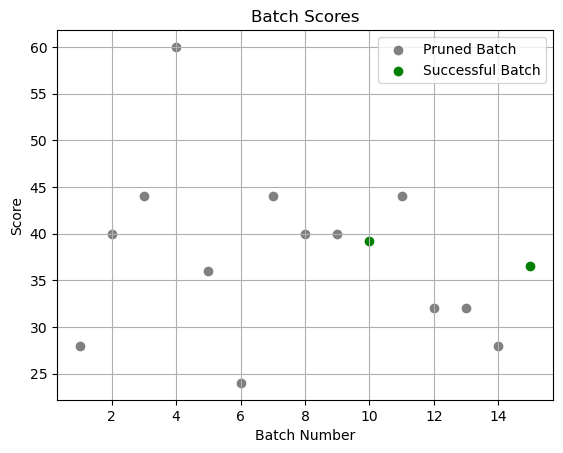

In [10]:
import matplotlib.pyplot as plt


trial_logs = optimized_program.trial_logs

trial_numbers = list(trial_logs.keys())
scores = [trial_logs[trial]["score"] for trial in trial_numbers]

full_eval = [trial_logs[trial]["full_eval"] for trial in trial_numbers]

for trial_number, score, pruned in zip(trial_numbers, scores, full_eval):
    if pruned is False:
        plt.scatter(
            trial_number,
            score,
            color="grey",
            label=(
                "Pruned Batch"
                if "Pruned Batch" not in plt.gca().get_legend_handles_labels()[1]
                else ""
            ),
        )
    else:
        plt.scatter(
            trial_number,
            score,
            color="green",
            label=(
                "Successful Batch"
                if "Successful Batch" not in plt.gca().get_legend_handles_labels()[1]
                else ""
            ),
        )

plt.xlabel("Batch Number")
plt.ylabel("Score")
plt.title("Batch Scores")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
best_score = 0
best_program_so_far = None


def get_signature(predictor):
    if hasattr(predictor, "extended_signature"):
        return predictor.extended_signature
    elif hasattr(predictor, "signature"):
        return predictor.signature


# print(f"Baseline program | Score: {best_score}:")
# for i, predictor in enumerate(WrapperEnglishSPT().predictors()):
#     print(f"Prompt {i+1} Instruction: {get_signature(predictor).instructions}")
# print()

print("----------------")

for trial_num in optimized_program.trial_logs:
    program_score = optimized_program.trial_logs[trial_num]["score"]
    program_pruned = optimized_program.trial_logs[trial_num]["full_eval"]
    # if (
    #     program_score > best_score
    #     and program_pruned is True
    #     # and optimized_program.trial_logs[trial_num]["full_eval"]
    # ):
    if program_pruned is True:
        best_score = program_score
        best_program_so_far = optimized_program.trial_logs[trial_num]["program"]
    # if trial_num % 5 == 0:
    #     print(f"Best program after {trial_num} batches | Score: {best_score}:")
    #     for i, predictor in enumerate(best_program_so_far.predictors()):
    #         print(f"Prompt {i+1} Instruction: {get_signature(predictor).instructions}")
    #     print()
    
        # print(f"Best program with best score: {best_score}")
        for i, predictor in enumerate(best_program_so_far.predictors()):
            print(f"Prompt {trial_num} Instruction: {get_signature(predictor).instructions}")
            print(best_score)
        print()

----------------
Prompt 10 Instruction: ...
39.25

Prompt 15 Instruction: You are a highly trained text data annotation tool, capable of providing subjective responses. Evaluate the semantic similarity of the target word in sentences 1 and 2. Consider only the objects/concepts to which the words refer. Ignore any common etymology and metaphoric similarities! Ignore case sensitivity and number (e.g., gato/Gatos = identical meaning). Homonyms are considered unrelated if they refer to different things. Provide a numerical rating: 1 means not related; 2 means remotely related; 3 means closely related; 4 means identical meaning. Your response should align with the concise judgment of a human.
36.5



In [12]:
program_spt_prompt_es_assertions.load(
    "compile-models/sp/en_spt_mipro_optimized_prompt_es_deepseek-q4"
)

In [13]:
custom_evaluate(
    random.choices(classes_1_test, k=100)
    + random.choices(classes_2_test, k=100)
    + random.choices(classes_3_test, k=100)
    + random.choices(classes_4_test, k=100),
    evaluate_answer,
    program_spt_prompt_es_assertions,
    debug=True,
)

2025/04/20 11:06:54 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/20 11:06:54 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/20 11:06:54 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


Evaluating: 400 examples
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  0
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  3


2025/04/20 11:08:11 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


Prediction:  1
Prediction:  1
Prediction:  4


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  3
Prediction:  1
Prediction:  4
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  2
Prediction:  1


Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1


2025/04/20 11:16:22 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  1
Prediction:  3
Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  4
Prediction:  2


Prediction:  3
Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  3


Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1


2025/04/20 11:53:11 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/20 11:53:11 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  3
Prediction:  1


Prediction:  1
Prediction:  2


Prediction:  2


Prediction:  1
Prediction:  1
Prediction:  2


2025/04/20 11:59:56 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/20 11:59:56 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/20 11:59:56 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  0
Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  2
Prediction:  2


Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  4
Prediction:  4


Prediction:  2


Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  2


2025/04/20 12:06:59 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/20 12:06:59 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/20 12:06:59 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  2
Prediction:  0
Prediction:  4
Prediction:  3


Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  2
Prediction:  4
Prediction:  2
Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  4
Prediction:  4
Prediction:  1
Prediction:  4
Prediction:  4


Prediction:  1
Prediction:  2


2025/04/20 12:18:01 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/20 12:18:01 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/20 12:18:01 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/20 12:18:01 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/20 12:18:01 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


2025/04/20 12:18:01 INFO dspy.primitives.assertions: SuggestionFailed: La salida deberia ser 1 o 2 o 3 o 4. Por favor, revise en consecuencia.


Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  4
Prediction:  2
Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  4
Prediction:  2
Prediction:  0
Prediction:  2
Prediction:  4
Prediction:  3
Prediction:  2
Prediction:  0
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  4
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  4
Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  4


Prediction:  3


Prediction:  3
Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  2
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  2
Prediction:  4
Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  2


Prediction:  2
Prediction:  1
Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  1


Prediction:  4


Prediction:  4
Prediction:  1
Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  2
Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  3
Prediction:  2
Prediction:  1
Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  3
Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  1
Prediction:  3
Prediction:  4
Prediction:  1


Prediction:  2
Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  2
Prediction:  3
Prediction:  1


Prediction:  3
Prediction:  2
Prediction:  3
Prediction:  4


Prediction:  3
Prediction:  3
Prediction:  4


Prediction:  4
Prediction:  1
Accurate examples: 145
Bad-formatted examples: 0
Accuracy: 36.25
